In [1]:
%load_ext autoreload
%autoreload 2

from typing import Literal, Union
from pathlib import Path
import csv
from datetime import datetime
import random


import pandas as pd
import dspy
from dspy.evaluate import Evaluate
from dspy.teleprompt import MIPROv2
from sklearn.model_selection import train_test_split

from programs import WrapperSpanishSPT, evaluate_answer
from custom_evaluation import custom_evaluate

In [2]:
lm = dspy.LM(
    "ollama_chat/llama3.3",
    api_base="http://localhost:11434",
)
dspy.settings.configure(lm=lm)

In [3]:
lm("what is your name?")

['I\'m an artificial intelligence model known as Llama. Llama stands for "Large Language Model Meta AI."']

In [4]:
data = pd.read_csv("dev_dwug_es.csv")
display(data.shape)

(8704, 8)

In [5]:
training_set = []

for _, row in data.iterrows():
    training_set.append(
        dspy.Example(
            sentence1=row["context_x"],
            sentence2=row["context_y"],
            target_word=row["lemma"],
            answer=int(row["judgment"]),
        ).with_inputs("sentence1", "sentence2", "target_word")
    )

In [6]:
classes_1_es = [item for item in training_set if item.answer == 1]
classes_2_es = [item for item in training_set if item.answer == 2]
classes_3_es = [item for item in training_set if item.answer == 3]
classes_4_es = [item for item in training_set if item.answer == 4]

print(len(classes_1_es))
print(len(classes_2_es))
print(len(classes_3_es))
print(len(classes_4_es))

classes_1_train, classes_1_dev = train_test_split(
    classes_1_es,
    test_size=0.2,
    random_state=42,
)

classes_1_train, classes_1_test = train_test_split(
    classes_1_train, test_size=0.2, random_state=42
)


classes_2_train, classes_2_dev = train_test_split(
    classes_2_es,
    test_size=0.2,
    random_state=42,
)
classes_2_train, classes_2_test = train_test_split(
    classes_2_train, test_size=0.2, random_state=42
)


classes_3_train, classes_3_dev = train_test_split(
    classes_3_es,
    test_size=0.2,
    random_state=42,
)
classes_3_train, classes_3_test = train_test_split(
    classes_3_train, test_size=0.2, random_state=42
)


classes_4_train, classes_4_dev = train_test_split(
    classes_4_es,
    test_size=0.2,
    random_state=42,
)
classes_4_train, classes_4_test = train_test_split(
    classes_4_train,
    test_size=0.2,
    random_state=42,
)

print(len(classes_1_train), len(classes_1_dev), len(classes_1_test))
print(len(classes_2_train), len(classes_2_dev), len(classes_2_test))
print(len(classes_3_train), len(classes_3_dev), len(classes_3_test))
print(len(classes_4_train), len(classes_4_dev), len(classes_4_test))

1406
1522
2343
3433
899 282 225
973 305 244
1499 469 375
2196 687 550


In [7]:
program_spt_prompt_es_assertions = WrapperSpanishSPT().activate_assertions()

In [8]:
custom_evaluate(
    random.choices(classes_1_test, k=225)
    + random.choices(classes_2_test, k=225)
    + random.choices(classes_3_test, k=225)
    + random.choices(classes_4_test, k=225),
    evaluate_answer,
    program_spt_prompt_es_assertions,
    debug=True,
)

Evaluating: 900 examples


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  1
Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  1
Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  1
Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  3
Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  1
Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  4
Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  3
Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  3
Prediction:  2


Prediction:  1


Prediction:  3
Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  4
Prediction:  3


Prediction:  3
Prediction:  1
Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  1
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  1


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  1
Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  1
Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3
Prediction:  4


Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  3
Prediction:  3
Prediction:  2
Prediction:  3
Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  3
Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  4
Prediction:  3
Prediction:  3
Prediction:  1
Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  3
Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  4
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  3
Prediction:  2
Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  3
Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  3
Prediction:  2
Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3
Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  4
Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  2
Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  3


Prediction:  3


Prediction:  4
Prediction:  3


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  3


Prediction:  3
Accurate examples: 290
Bad-formatted examples: 0
Accuracy: 32.22222222222222


In [9]:
%reload_ext autoreload

start_time = datetime.now()

teleprompter = MIPROv2(
    metric=evaluate_answer,
    task_model=lm,
    num_candidates=10,
    init_temperature=0.7,
    max_bootstrapped_demos=3,
    max_labeled_demos=4,
    verbose=False,
)

print("Optimizing program with MIPRO...")
optimized_program = teleprompter.compile(
    program_spt_prompt_es_assertions.deepcopy(),
    trainset=random.choices(classes_1_train, k=500)
    + random.choices(classes_2_train, k=500)
    + random.choices(classes_3_train, k=500)
    + random.choices(classes_4_train, k=500),
    valset=random.choices(classes_1_dev, k=200)
    + random.choices(classes_2_dev, k=200)
    + random.choices(classes_3_dev, k=200)
    + random.choices(classes_4_dev, k=200),
    num_trials=15,
    minibatch_size=25,
    minibatch_full_eval_steps=10,
    minibatch=True,
    requires_permission_to_run=False,
)

optimized_program.save(f"compile-models/sp/es_spt_mipro_optimized_prompt_es_llama3-3-q4")

print(f"Elapsed time: {datetime.now() - start_time}")

2025/04/18 06:38:44 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==


2025/04/18 06:38:44 INFO dspy.teleprompt.mipro_optimizer_v2: These will be used as few-shot example candidates for our program and for creating instructions.



2025/04/18 06:38:44 INFO dspy.teleprompt.mipro_optimizer_v2: Bootstrapping N=10 sets of demonstrations...


Optimizing program with MIPRO...
Bootstrapping set 1/10
Bootstrapping set 2/10
Bootstrapping set 3/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/2000 [01:34<52:14:26, 94.08s/it]

  0%|                                                                                                       | 2/2000 [03:02<50:23:22, 90.79s/it]

  0%|▏                                                                                                      | 3/2000 [04:21<47:21:08, 85.36s/it]

  0%|▏                                                                                                      | 4/2000 [06:01<50:27:56, 91.02s/it]

  0%|▎                                                                                                      | 5/2000 [07:28<49:38:45, 89.59s/it]

  0%|▎                                                                                                      | 6/2000 [09:06<51:20:54, 92.71s/it]

  0%|▎                                                                                                      | 7/2000 [10:33<50:14:31, 90.75s/it]

  0%|▍                                                                                                      | 8/2000 [12:10<51:20:24, 92.78s/it]

  0%|▍                                                                                                      | 9/2000 [13:45<51:34:28, 93.25s/it]

  0%|▌                                                                                                     | 10/2000 [15:22<52:10:29, 94.39s/it]

  1%|▌                                                                                                     | 11/2000 [16:51<51:21:59, 92.97s/it]

  1%|▌                                                                                                     | 12/2000 [18:28<51:58:12, 94.11s/it]

  1%|▋                                                                                                     | 13/2000 [20:11<53:28:56, 96.90s/it]

  1%|▋                                                                                                     | 14/2000 [21:52<54:03:11, 97.98s/it]

  1%|▊                                                                                                     | 15/2000 [23:28<53:47:06, 97.54s/it]

  1%|▊                                                                                                     | 16/2000 [25:00<52:51:18, 95.91s/it]

  1%|▊                                                                                                     | 17/2000 [26:43<53:54:27, 97.87s/it]

  1%|▉                                                                                                     | 18/2000 [28:10<52:02:29, 94.53s/it]

  1%|▉                                                                                                     | 19/2000 [29:37<50:48:19, 92.33s/it]

  1%|█                                                                                                    | 20/2000 [31:36<55:08:58, 100.27s/it]

  1%|█                                                                                                     | 21/2000 [33:11<54:21:49, 98.89s/it]

  1%|█                                                                                                     | 22/2000 [34:47<53:52:00, 98.04s/it]

  1%|█▏                                                                                                    | 23/2000 [36:32<54:52:38, 99.93s/it]

  1%|█▏                                                                                                    | 24/2000 [38:05<53:41:21, 97.81s/it]

  1%|█▎                                                                                                   | 25/2000 [39:50<54:52:13, 100.02s/it]

  1%|█▎                                                                                                    | 26/2000 [41:27<54:26:33, 99.29s/it]

  1%|█▍                                                                                                    | 27/2000 [42:55<52:31:31, 95.84s/it]

  1%|█▍                                                                                                    | 28/2000 [44:30<52:23:04, 95.63s/it]

  1%|█▍                                                                                                    | 28/2000 [44:30<52:14:56, 95.38s/it]

Bootstrapped 3 full traces after 28 examples for up to 1 rounds, amounting to 28 attempts.
Bootstrapping set 4/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/2000 [01:33<51:47:42, 93.28s/it]

  0%|                                                                                                       | 1/2000 [01:33<51:47:44, 93.28s/it]

Bootstrapped 1 full traces after 1 examples for up to 1 rounds, amounting to 1 attempts.
Bootstrapping set 5/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                      | 1/2000 [01:41<56:06:11, 101.04s/it]

  0%|                                                                                                      | 2/2000 [03:35<60:23:57, 108.83s/it]

  0%|▏                                                                                                     | 3/2000 [05:07<56:06:56, 101.16s/it]

  0%|▏                                                                                                     | 3/2000 [05:07<56:49:55, 102.45s/it]

Bootstrapped 1 full traces after 3 examples for up to 1 rounds, amounting to 3 attempts.
Bootstrapping set 6/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/2000 [01:39<55:03:59, 99.17s/it]

  0%|                                                                                                       | 2/2000 [03:10<52:36:31, 94.79s/it]

  0%|▏                                                                                                      | 3/2000 [04:51<53:57:07, 97.26s/it]

  0%|▏                                                                                                      | 4/2000 [06:33<55:04:39, 99.34s/it]

  0%|▏                                                                                                      | 4/2000 [06:33<54:33:35, 98.40s/it]

Bootstrapped 2 full traces after 4 examples for up to 1 rounds, amounting to 4 attempts.
Bootstrapping set 7/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                       | 1/2000 [01:39<55:16:28, 99.54s/it]

  0%|                                                                                                       | 2/2000 [03:18<55:00:18, 99.11s/it]

  0%|▏                                                                                                     | 3/2000 [05:17<59:56:01, 108.04s/it]

  0%|▏                                                                                                     | 4/2000 [07:00<58:48:23, 106.06s/it]

  0%|▎                                                                                                      | 6/2000 [08:50<43:48:06, 79.08s/it]

  0%|▎                                                                                                      | 7/2000 [10:36<47:51:03, 86.43s/it]

  0%|▍                                                                                                      | 8/2000 [12:28<51:53:17, 93.77s/it]

  0%|▍                                                                                                      | 9/2000 [14:04<52:07:03, 94.24s/it]

  0%|▌                                                                                                     | 10/2000 [15:48<53:46:10, 97.27s/it]

  1%|▌                                                                                                     | 11/2000 [17:30<54:30:15, 98.65s/it]

  1%|▌                                                                                                     | 12/2000 [19:10<54:40:05, 99.00s/it]

  1%|▌                                                                                                     | 12/2000 [19:10<52:56:49, 95.88s/it]

Bootstrapped 3 full traces after 12 examples for up to 1 rounds, amounting to 12 attempts.
Bootstrapping set 8/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                      | 1/2000 [01:45<58:42:17, 105.72s/it]

  0%|                                                                                                      | 2/2000 [03:36<60:20:00, 108.71s/it]

  0%|▏                                                                                                      | 3/2000 [05:03<54:50:34, 98.87s/it]

  0%|▏                                                                                                     | 4/2000 [07:00<58:44:09, 105.94s/it]

  0%|▎                                                                                                     | 5/2000 [08:53<60:06:53, 108.48s/it]

  0%|▎                                                                                                     | 6/2000 [10:46<60:55:05, 109.98s/it]

  0%|▎                                                                                                     | 7/2000 [12:29<59:33:57, 107.60s/it]

  0%|▎                                                                                                     | 7/2000 [12:29<59:14:16, 107.00s/it]

Bootstrapped 1 full traces after 7 examples for up to 1 rounds, amounting to 7 attempts.
Bootstrapping set 9/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                      | 1/2000 [01:52<62:34:39, 112.70s/it]

  0%|                                                                                                      | 2/2000 [03:36<59:40:21, 107.52s/it]

  0%|▏                                                                                                     | 3/2000 [05:39<63:32:28, 114.55s/it]

  0%|▏                                                                                                     | 3/2000 [05:39<62:46:33, 113.17s/it]

Bootstrapped 3 full traces after 3 examples for up to 1 rounds, amounting to 3 attempts.
Bootstrapping set 10/10


  0%|                                                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                      | 1/2000 [01:44<58:01:34, 104.50s/it]

  0%|                                                                                                      | 2/2000 [04:17<73:41:11, 132.77s/it]

  0%|▏                                                                                                     | 3/2000 [06:17<70:32:30, 127.17s/it]

  0%|▏                                                                                                     | 3/2000 [06:17<69:48:46, 125.85s/it]


2025/04/18 08:20:06 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==


2025/04/18 08:20:06 INFO dspy.teleprompt.mipro_optimizer_v2: We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.


Bootstrapped 1 full traces after 3 examples for up to 1 rounds, amounting to 3 attempts.


2025/04/18 08:53:22 INFO dspy.teleprompt.mipro_optimizer_v2: 
Proposing instructions...



2025/04/18 09:44:30 INFO dspy.teleprompt.mipro_optimizer_v2: Proposed Instructions for Predictor 0:



2025/04/18 09:44:30 INFO dspy.teleprompt.mipro_optimizer_v2: 0: Eres una herramienta de anotación de datos textuales altamente entrenada, capaz de proporcionar respuestas
subjetivas. Evalúa la similitud semántica de la palabra objetivo en estas oraciones 1 y 2. Considera solo los objetos/conceptos
a los que se refieren las palabras: ¡Ignora cualquier etimología común y similitud metafórica! ¡Ignora mayúsculas!
¡Ignora número (gato/Gatos = significado idéntico)! Los homónimos (como murciélago el animal vs murciélago en béisbol)
se consideran no relacionados. De como salida una calificación numérica: 1 es no relacionado; 2 es lejanamente relacionado; 3 es
estrechamente relacionado; 4 es significado idéntico. Tu respuesta debe alinearse con el juicio sucinto de un humano.



2025/04/18 09:44:30 INFO dspy.teleprompt.mipro_optimizer_v2: 1: Eres un evaluador de similitud semántica altamente capacitado. Evalúa la similitud semántica entre la palabra objetivo en las oraciones 1 y 2. Considera solo los objetos o conceptos a los que se refieren las palabras, ignorando cualquier etimología común, similitud metafórica, mayúsculas, números (gato/Gatos = significado idéntico) y homónimos (como murciélago el animal vs murciélago en béisbol). Proporciona una calificación numérica como respuesta: 1 para no relacionado, 2 para lejanamente relacionado, 3 para estrechamente relacionado y 4 para significado idéntico. Asegúrate de que tu respuesta se alinee con el juicio sucinto de un humano.



2025/04/18 09:44:30 INFO dspy.teleprompt.mipro_optimizer_v2: 2: Imagine que estás en una misión crítica para evaluar la similitud semántica de palabras objetivo en pares de oraciones. Tu tarea es crucial para el éxito de un proyecto de inteligencia artificial que busca mejorar la comprensión del lenguaje natural. Debes analizar cuidadosamente cada par de oraciones y asignar una calificación numérica que refleje la similitud semántica de la palabra objetivo: 1 si no están relacionados, 2 si están lejanamente relacionados, 3 si están estrechamente relacionados, y 4 si tienen un significado idéntico. Ignora cualquier etimología común, similitud metafórica, mayúsculas y números (considera "gato" y "gatos" como tener el mismo significado). Los homónimos, como "murciélago" el animal y "murciélago" en béisbol, se consideran no relacionados. Tu capacidad para proporcionar calificaciones precisas es fundamental para el avance de este proyecto.



2025/04/18 09:44:30 INFO dspy.teleprompt.mipro_optimizer_v2: 3: Para evaluar la similitud semántica de la palabra objetivo en las oraciones 1 y 2, debes considerar cuidadosamente los contextos y significados de la palabra en cada oración. La tarea requiere que ignores cualquier etimología común, similitud metafórica, mayúsculas y número (por ejemplo, "gato" y "gatos" se consideran como tener el mismo significado). Además, es importante distinguir entre homónimos, ya que palabras con el mismo sonido o escritura pero diferentes significados (como "murciélago" el animal versus "murciélago" en béisbol) se consideran no relacionadas.

La escala de calificación numérica para la similitud semántica es la siguiente:
- 1: No relacionado - La palabra objetivo tiene significados completamente diferentes en las dos oraciones, sin ninguna conexión aparente.
- 2: Lejanamente relacionado - Existe una conexión muy tenue o indirecta entre los significados de la palabra objetivo en las dos oraciones.
- 

2025/04/18 09:44:30 INFO dspy.teleprompt.mipro_optimizer_v2: 4: You are a semantic analyst, tasked with evaluating the similarity in meaning of a target word used in two different sentences. Your goal is to assess how closely related the usage of this word is across these distinct contexts. To do this, focus solely on the concepts or objects to which the word refers, ignoring any common etymology, metaphorical similarities, differences in capitalization, and plural forms (e.g., "gato" and "gatos" are considered identical in meaning). Additionally, treat homonyms (words with the same spelling but different meanings, such as "murciélago" referring to both a bat animal and a baseball bat) as unrelated. Your output should be a numerical rating: 1 for unrelated, 2 for distantly related, 3 for closely related, and 4 for identical meaning. Ensure your response aligns with the concise judgment of a human evaluator.



2025/04/18 09:44:30 INFO dspy.teleprompt.mipro_optimizer_v2: 5: Eres una herramienta de anotación de datos textuales altamente entrenada, capaz de proporcionar respuestas subjetivas. Evalúa la similitud semántica de la palabra objetivo en estas oraciones 1 y 2. Considera solo los objetos/conceptos a los que se refieren las palabras: ¡Ignora cualquier etimología común y similitud metafórica! ¡Ignora mayúsculas! ¡Ignora número (gato/Gatos = significado idéntico)! Los homónimos (como murciélago el animal vs murciélago en béisbol) se consideran no relacionados. De como salida una calificación numérica: 1 es no relacionado; 2 es lejanamente relacionado; 3 es estrechamente relacionado; 4 es significado idéntico. Tu respuesta debe alinearse con el juicio sucinto de un humano.



2025/04/18 09:44:30 INFO dspy.teleprompt.mipro_optimizer_v2: 6: Para evaluar la similitud semántica entre dos oraciones que contienen una palabra objetivo, es importante considerar el contexto y el significado literal de la palabra en cada oración. Ignorando etimologías comunes, similitudes metafóricas, mayúsculas, números y homónimos, se busca determinar cómo de relacionados están los conceptos o objetos a los que se refiere la palabra objetivo en cada caso.

1. **Identificar el significado literal**: Comienza por entender el significado básico de la palabra objetivo en un diccionario o recurso similar.
2. **Analizar el contexto**: Lee atentamente ambas oraciones para comprender cómo se utiliza la palabra objetivo en cada una. Presta atención a los verbos, sustantivos y adjetivos que rodean a la palabra objetivo, ya que estos pueden alterar su significado.
3. **Comparar los conceptos**: Una vez que tienes una idea clara de cómo se utiliza la palabra en cada oración, compara los concep

2025/04/18 09:44:30 INFO dspy.teleprompt.mipro_optimizer_v2: 7: Para evaluar la similitud semántica de la palabra objetivo en dos oraciones, debes considerar el significado y el contexto en el que se utiliza la palabra. Ignora cualquier relación etimológica o metafórica entre las palabras, así como también ignora las mayúsculas y los números (singular o plural). Los homónimos, es decir, palabras con el mismo sonido o escritura pero significados diferentes, deben considerarse no relacionados.

La escala de calificación numérica es la siguiente:
- 1: No relacionado - La palabra objetivo no tiene relación semántica entre las dos oraciones.
- 2: Lejanamente relacionado - La palabra objetivo tiene una conexión débil o indirecta entre las dos oraciones.
- 3: Estrechamente relacionado - La palabra objetivo tiene un significado o función similar en ambas oraciones, aunque el contexto pueda ser diferente.
- 4: Significado idéntico - La palabra objetivo tiene exactamente el mismo significado y f

2025/04/18 09:44:30 INFO dspy.teleprompt.mipro_optimizer_v2: 8: Para evaluar la similitud semántica de la palabra objetivo en las oraciones dadas, es crucial considerar el contexto y el significado específico de cada palabra dentro de su oración respectiva. La tarea implica analizar los conceptos o objetos a los que se refieren las palabras sin considerar su etimología común o similitudes metafóricas. Además, se debe ignorar la diferencia entre mayúsculas y minúsculas, así como el número (singular o plural) de las palabras, ya que "gato" y "gatos" se consideran idénticos en significado. Es importante tener en cuenta que los homónimos, es decir, palabras con el mismo sonido o escritura pero con diferentes significados (como "banco" el lugar financiero vs. "banco" el asiento), se tratan como no relacionados.

La calificación numérica para la similitud semántica se asigna de la siguiente manera:
- 1: No relacionado - La palabra objetivo en ambas oraciones no comparte significado alguno.
-

2025/04/18 09:44:30 INFO dspy.teleprompt.mipro_optimizer_v2: 9: Para evaluar la similitud semántica entre los usos de la palabra "corona" en las oraciones proporcionadas, es crucial considerar el contexto y el significado literal de la palabra en cada caso. La primera oración menciona "190 millones de coronas suecas," refiriéndose a una unidad monetaria, mientras que la segunda oración utiliza la expresión "la verdadera joya de la corona" como metáfora para algo valioso. Dado que se debe ignorar cualquier similitud metafórica y considerar solo los objetos o conceptos a los que se refieren las palabras literalmente, la relación entre los usos de "corona" en estas oraciones es muy débil porque una se refiere a dinero y la otra a un objeto valioso en sentido figurado.



2025/04/18 09:44:30 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/18 09:44:30 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the default program...



  0%|                                                                                                                   | 0/800 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                     | 0/800 [01:48<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                         | 1/800 [01:48<24:05:29, 108.55s/it]

Average Metric: 1 / 2  (50.0):   0%|                                                                        | 1/800 [03:28<24:05:29, 108.55s/it]

Average Metric: 1 / 2  (50.0):   0%|▏                                                                       | 2/800 [03:28<22:59:50, 103.75s/it]

Average Metric: 2 / 3  (66.7):   0%|▏                                                                       | 2/800 [05:05<22:59:50, 103.75s/it]

Average Metric: 2 / 3  (66.7):   0%|▎                                                                       | 3/800 [05:05<22:12:10, 100.29s/it]

Average Metric: 3 / 4  (75.0):   0%|▎                                                                       | 3/800 [06:41<22:12:10, 100.29s/it]

Average Metric: 3 / 4  (75.0):   0%|▎                                                                        | 4/800 [06:41<21:47:49, 98.58s/it]

Average Metric: 3 / 5  (60.0):   0%|▎                                                                        | 4/800 [08:21<21:47:49, 98.58s/it]

Average Metric: 3 / 5  (60.0):   1%|▍                                                                        | 5/800 [08:21<21:55:38, 99.29s/it]

Average Metric: 4 / 6  (66.7):   1%|▍                                                                        | 5/800 [09:55<21:55:38, 99.29s/it]

Average Metric: 4 / 6  (66.7):   1%|▌                                                                        | 6/800 [09:55<21:31:10, 97.57s/it]

Average Metric: 5 / 7  (71.4):   1%|▌                                                                        | 6/800 [11:33<21:31:10, 97.57s/it]

Average Metric: 5 / 7  (71.4):   1%|▋                                                                        | 7/800 [11:33<21:29:17, 97.55s/it]

Average Metric: 5 / 8  (62.5):   1%|▋                                                                        | 7/800 [13:20<21:29:17, 97.55s/it]

Average Metric: 5 / 8  (62.5):   1%|▋                                                                       | 8/800 [13:20<22:09:49, 100.74s/it]

Average Metric: 5 / 9  (55.6):   1%|▋                                                                       | 8/800 [14:56<22:09:49, 100.74s/it]

Average Metric: 5 / 9  (55.6):   1%|▊                                                                        | 9/800 [14:56<21:44:57, 98.99s/it]

Average Metric: 5 / 10  (50.0):   1%|▊                                                                       | 9/800 [16:45<21:44:57, 98.99s/it]

Average Metric: 5 / 10  (50.0):   1%|▉                                                                     | 10/800 [16:45<22:26:33, 102.27s/it]

Average Metric: 5 / 11  (45.5):   1%|▉                                                                     | 10/800 [18:27<22:26:33, 102.27s/it]

Average Metric: 5 / 11  (45.5):   1%|▉                                                                     | 11/800 [18:27<22:22:42, 102.11s/it]

Average Metric: 5 / 12  (41.7):   1%|▉                                                                     | 11/800 [20:08<22:22:42, 102.11s/it]

Average Metric: 5 / 12  (41.7):   2%|█                                                                     | 12/800 [20:08<22:16:38, 101.78s/it]

Average Metric: 5 / 13  (38.5):   2%|█                                                                     | 12/800 [21:50<22:16:38, 101.78s/it]

Average Metric: 5 / 13  (38.5):   2%|█▏                                                                    | 13/800 [21:50<22:15:25, 101.81s/it]

Average Metric: 5 / 14  (35.7):   2%|█▏                                                                    | 13/800 [23:27<22:15:25, 101.81s/it]

Average Metric: 5 / 14  (35.7):   2%|█▏                                                                    | 14/800 [23:27<21:54:18, 100.33s/it]

Average Metric: 6 / 15  (40.0):   2%|█▏                                                                    | 14/800 [25:02<21:54:18, 100.33s/it]

Average Metric: 6 / 15  (40.0):   2%|█▎                                                                     | 15/800 [25:02<21:32:04, 98.76s/it]

Average Metric: 6 / 16  (37.5):   2%|█▎                                                                     | 15/800 [26:44<21:32:04, 98.76s/it]

Average Metric: 6 / 16  (37.5):   2%|█▍                                                                     | 16/800 [26:44<21:45:02, 99.88s/it]

Average Metric: 6 / 17  (35.3):   2%|█▍                                                                     | 16/800 [28:25<21:45:02, 99.88s/it]

Average Metric: 6 / 17  (35.3):   2%|█▍                                                                    | 17/800 [28:25<21:48:26, 100.26s/it]

Average Metric: 6 / 18  (33.3):   2%|█▍                                                                    | 17/800 [30:11<21:48:26, 100.26s/it]

Average Metric: 6 / 18  (33.3):   2%|█▌                                                                    | 18/800 [30:11<22:06:09, 101.75s/it]

Average Metric: 6 / 19  (31.6):   2%|█▌                                                                    | 18/800 [31:50<22:06:09, 101.75s/it]

Average Metric: 6 / 19  (31.6):   2%|█▋                                                                    | 19/800 [31:50<21:54:54, 101.02s/it]

Average Metric: 6 / 20  (30.0):   2%|█▋                                                                    | 19/800 [33:24<21:54:54, 101.02s/it]

Average Metric: 6 / 20  (30.0):   2%|█▊                                                                     | 20/800 [33:24<21:25:21, 98.87s/it]

Average Metric: 6 / 21  (28.6):   2%|█▊                                                                     | 20/800 [35:00<21:25:21, 98.87s/it]

Average Metric: 6 / 21  (28.6):   3%|█▊                                                                     | 21/800 [35:00<21:13:26, 98.08s/it]

Average Metric: 6 / 22  (27.3):   3%|█▊                                                                     | 21/800 [36:43<21:13:26, 98.08s/it]

Average Metric: 6 / 22  (27.3):   3%|█▉                                                                     | 22/800 [36:43<21:31:49, 99.63s/it]

Average Metric: 6 / 23  (26.1):   3%|█▉                                                                     | 22/800 [38:27<21:31:49, 99.63s/it]

Average Metric: 6 / 23  (26.1):   3%|██                                                                    | 23/800 [38:27<21:44:16, 100.72s/it]

Average Metric: 6 / 24  (25.0):   3%|██                                                                    | 23/800 [40:17<21:44:16, 100.72s/it]

Average Metric: 6 / 24  (25.0):   3%|██                                                                    | 24/800 [40:17<22:19:13, 103.55s/it]

Average Metric: 6 / 25  (24.0):   3%|██                                                                    | 24/800 [40:17<22:19:13, 103.55s/it]

Average Metric: 6 / 26  (23.1):   3%|██▏                                                                   | 25/800 [41:59<22:17:30, 103.55s/it]

Average Metric: 6 / 26  (23.1):   3%|██▎                                                                    | 26/800 [41:59<17:03:26, 79.34s/it]

Average Metric: 6 / 27  (22.2):   3%|██▎                                                                    | 26/800 [43:39<17:03:26, 79.34s/it]

Average Metric: 6 / 27  (22.2):   3%|██▍                                                                    | 27/800 [43:39<18:06:51, 84.36s/it]

Average Metric: 6 / 28  (21.4):   3%|██▍                                                                    | 27/800 [45:14<18:06:51, 84.36s/it]

Average Metric: 6 / 28  (21.4):   4%|██▍                                                                    | 28/800 [45:14<18:43:24, 87.31s/it]

Average Metric: 7 / 29  (24.1):   4%|██▍                                                                    | 28/800 [46:59<18:43:24, 87.31s/it]

Average Metric: 7 / 29  (24.1):   4%|██▌                                                                    | 29/800 [46:59<19:42:40, 92.04s/it]

Average Metric: 7 / 30  (23.3):   4%|██▌                                                                    | 29/800 [48:48<19:42:40, 92.04s/it]

Average Metric: 7 / 30  (23.3):   4%|██▋                                                                    | 30/800 [48:48<20:42:14, 96.80s/it]

Average Metric: 7 / 31  (22.6):   4%|██▋                                                                    | 30/800 [50:19<20:42:14, 96.80s/it]

Average Metric: 7 / 31  (22.6):   4%|██▊                                                                    | 31/800 [50:19<20:17:54, 95.03s/it]

Average Metric: 7 / 32  (21.9):   4%|██▊                                                                    | 31/800 [52:06<20:17:54, 95.03s/it]

Average Metric: 7 / 32  (21.9):   4%|██▊                                                                    | 32/800 [52:06<21:02:38, 98.64s/it]

Average Metric: 7 / 33  (21.2):   4%|██▊                                                                    | 32/800 [53:46<21:02:38, 98.64s/it]

Average Metric: 7 / 33  (21.2):   4%|██▉                                                                    | 33/800 [53:46<21:07:31, 99.15s/it]

Average Metric: 8 / 34  (23.5):   4%|██▉                                                                    | 33/800 [55:25<21:07:31, 99.15s/it]

Average Metric: 8 / 34  (23.5):   4%|███                                                                    | 34/800 [55:25<21:02:38, 98.90s/it]

Average Metric: 8 / 35  (22.9):   4%|███                                                                    | 34/800 [57:03<21:02:38, 98.90s/it]

Average Metric: 8 / 35  (22.9):   4%|███                                                                    | 35/800 [57:03<20:58:15, 98.69s/it]

Average Metric: 8 / 36  (22.2):   4%|███                                                                    | 35/800 [58:39<20:58:15, 98.69s/it]

Average Metric: 8 / 36  (22.2):   4%|███▏                                                                   | 36/800 [58:39<20:47:35, 97.98s/it]

Average Metric: 8 / 37  (21.6):   4%|███                                                                  | 36/800 [1:00:24<20:47:35, 97.98s/it]

Average Metric: 8 / 37  (21.6):   5%|███▏                                                                 | 37/800 [1:00:24<21:11:19, 99.97s/it]

Average Metric: 9 / 38  (23.7):   5%|███▏                                                                 | 37/800 [1:02:10<21:11:19, 99.97s/it]

Average Metric: 9 / 38  (23.7):   5%|███▏                                                                | 38/800 [1:02:10<21:32:58, 101.81s/it]

Average Metric: 10 / 39  (25.6):   5%|███▏                                                               | 38/800 [1:03:55<21:32:58, 101.81s/it]

Average Metric: 10 / 39  (25.6):   5%|███▎                                                               | 39/800 [1:03:55<21:41:47, 102.64s/it]

Average Metric: 10 / 40  (25.0):   5%|███▎                                                               | 39/800 [1:05:38<21:41:47, 102.64s/it]

Average Metric: 10 / 40  (25.0):   5%|███▎                                                               | 40/800 [1:05:38<21:42:30, 102.83s/it]

Average Metric: 10 / 41  (24.4):   5%|███▎                                                               | 40/800 [1:07:15<21:42:30, 102.83s/it]

Average Metric: 10 / 41  (24.4):   5%|███▍                                                               | 41/800 [1:07:15<21:19:24, 101.14s/it]

Average Metric: 10 / 42  (23.8):   5%|███▍                                                               | 41/800 [1:08:54<21:19:24, 101.14s/it]

Average Metric: 10 / 42  (23.8):   5%|███▌                                                               | 42/800 [1:08:54<21:08:20, 100.40s/it]

Average Metric: 10 / 43  (23.3):   5%|███▍                                                             | 42/800 [1:10:34<21:08:20, 100.40s/it]  

Average Metric: 10 / 43  (23.3):   5%|███▍                                                             | 43/800 [1:10:34<21:05:46, 100.33s/it]

Average Metric: 10 / 44  (22.7):   5%|███▍                                                             | 43/800 [1:12:18<21:05:46, 100.33s/it]

Average Metric: 10 / 44  (22.7):   6%|███▌                                                             | 44/800 [1:12:18<21:17:38, 101.40s/it]

Average Metric: 10 / 45  (22.2):   6%|███▌                                                             | 44/800 [1:14:06<21:17:38, 101.40s/it]

Average Metric: 10 / 45  (22.2):   6%|███▋                                                             | 45/800 [1:14:06<21:41:50, 103.46s/it]

Average Metric: 10 / 46  (21.7):   6%|███▋                                                             | 45/800 [1:15:46<21:41:50, 103.46s/it]

Average Metric: 10 / 46  (21.7):   6%|███▋                                                             | 46/800 [1:15:46<21:28:09, 102.51s/it]

Average Metric: 10 / 47  (21.3):   6%|███▋                                                             | 46/800 [1:15:46<21:28:09, 102.51s/it]

Average Metric: 10 / 48  (20.8):   6%|███▊                                                             | 47/800 [1:15:46<21:26:26, 102.51s/it]

Average Metric: 10 / 49  (20.4):   6%|███▉                                                             | 48/800 [1:17:28<21:24:44, 102.51s/it]

Average Metric: 10 / 49  (20.4):   6%|████                                                              | 49/800 [1:17:28<13:19:40, 63.89s/it]

Average Metric: 11 / 50  (22.0):   6%|████                                                              | 49/800 [1:19:02<13:19:40, 63.89s/it]

Average Metric: 11 / 50  (22.0):   6%|████▏                                                             | 50/800 [1:19:02<14:38:47, 70.30s/it]

Average Metric: 12 / 51  (23.5):   6%|████▏                                                             | 50/800 [1:20:47<14:38:47, 70.30s/it]

Average Metric: 12 / 51  (23.5):   6%|████▏                                                             | 51/800 [1:20:47<16:17:09, 78.28s/it]

Average Metric: 12 / 52  (23.1):   6%|████▏                                                             | 51/800 [1:22:28<16:17:09, 78.28s/it]

Average Metric: 12 / 52  (23.1):   6%|████▎                                                             | 52/800 [1:22:28<17:25:36, 83.87s/it]

Average Metric: 12 / 53  (22.6):   6%|████▎                                                             | 52/800 [1:24:15<17:25:36, 83.87s/it]

Average Metric: 12 / 53  (22.6):   7%|████▎                                                             | 53/800 [1:24:15<18:40:27, 90.00s/it]

Average Metric: 12 / 54  (22.2):   7%|████▎                                                             | 53/800 [1:25:53<18:40:27, 90.00s/it]

Average Metric: 12 / 54  (22.2):   7%|████▍                                                             | 54/800 [1:25:53<19:07:44, 92.31s/it]

Average Metric: 12 / 55  (21.8):   7%|████▍                                                             | 54/800 [1:27:44<19:07:44, 92.31s/it]

Average Metric: 12 / 55  (21.8):   7%|████▌                                                             | 55/800 [1:27:44<20:08:47, 97.35s/it]

Average Metric: 12 / 56  (21.4):   7%|████▌                                                             | 55/800 [1:29:36<20:08:47, 97.35s/it]

Average Metric: 12 / 56  (21.4):   7%|████▌                                                            | 56/800 [1:29:36<21:00:06, 101.62s/it]

Average Metric: 12 / 57  (21.1):   7%|████▌                                                            | 56/800 [1:29:36<21:00:06, 101.62s/it]

Average Metric: 12 / 58  (20.7):   7%|████▋                                                            | 57/800 [1:31:18<20:58:24, 101.62s/it]

Average Metric: 12 / 58  (20.7):   7%|████▊                                                             | 58/800 [1:31:18<16:16:55, 79.00s/it]

Average Metric: 12 / 59  (20.3):   7%|████▊                                                             | 58/800 [1:32:53<16:16:55, 79.00s/it]

Average Metric: 12 / 59  (20.3):   7%|████▊                                                             | 59/800 [1:32:53<17:02:28, 82.79s/it]

Average Metric: 12 / 60  (20.0):   7%|████▊                                                             | 59/800 [1:32:53<17:02:28, 82.79s/it]

Average Metric: 12 / 61  (19.7):   8%|████▉                                                             | 60/800 [1:32:53<17:01:05, 82.79s/it]

Average Metric: 12 / 62  (19.4):   8%|█████                                                             | 61/800 [1:34:28<16:59:42, 82.79s/it]

Average Metric: 12 / 62  (19.4):   8%|█████                                                             | 62/800 [1:34:28<11:38:13, 56.77s/it]

Average Metric: 12 / 63  (19.0):   8%|█████                                                             | 62/800 [1:34:28<11:38:13, 56.77s/it]

Average Metric: 12 / 64  (18.8):   8%|█████▏                                                            | 63/800 [1:36:06<11:37:16, 56.77s/it]

Average Metric: 12 / 64  (18.8):   8%|█████▎                                                            | 64/800 [1:36:06<11:04:13, 54.15s/it]

Average Metric: 12 / 65  (18.5):   8%|█████▎                                                            | 64/800 [1:37:45<11:04:13, 54.15s/it]

Average Metric: 12 / 65  (18.5):   8%|█████▎                                                            | 65/800 [1:37:45<12:48:18, 62.72s/it]

Average Metric: 12 / 66  (18.2):   8%|█████▎                                                            | 65/800 [1:39:38<12:48:18, 62.72s/it]

Average Metric: 12 / 66  (18.2):   8%|█████▍                                                            | 66/800 [1:39:38<14:57:32, 73.37s/it]

Average Metric: 12 / 67  (17.9):   8%|█████▍                                                            | 66/800 [1:41:18<14:57:32, 73.37s/it]

Average Metric: 12 / 67  (17.9):   8%|█████▌                                                            | 67/800 [1:41:18<16:13:18, 79.67s/it]

Average Metric: 12 / 68  (17.6):   8%|█████▌                                                            | 67/800 [1:43:05<16:13:18, 79.67s/it]

Average Metric: 12 / 68  (17.6):   8%|█████▌                                                            | 68/800 [1:43:05<17:34:19, 86.42s/it]

Average Metric: 12 / 69  (17.4):   8%|█████▌                                                            | 68/800 [1:44:37<17:34:19, 86.42s/it]

Average Metric: 12 / 69  (17.4):   9%|█████▋                                                            | 69/800 [1:44:37<17:48:52, 87.73s/it]

Average Metric: 12 / 70  (17.1):   9%|█████▋                                                            | 69/800 [1:46:23<17:48:52, 87.73s/it]

Average Metric: 12 / 70  (17.1):   9%|█████▊                                                            | 70/800 [1:46:23<18:51:00, 92.96s/it]

Average Metric: 12 / 71  (16.9):   9%|█████▊                                                            | 70/800 [1:48:14<18:51:00, 92.96s/it]

Average Metric: 12 / 71  (16.9):   9%|█████▊                                                            | 71/800 [1:48:14<19:49:18, 97.89s/it]

Average Metric: 12 / 72  (16.7):   9%|█████▊                                                            | 71/800 [1:49:47<19:49:18, 97.89s/it]

Average Metric: 12 / 72  (16.7):   9%|█████▉                                                            | 72/800 [1:49:47<19:29:29, 96.39s/it]

Average Metric: 12 / 73  (16.4):   9%|█████▉                                                            | 72/800 [1:51:28<19:29:29, 96.39s/it]

Average Metric: 12 / 73  (16.4):   9%|██████                                                            | 73/800 [1:51:28<19:44:27, 97.75s/it]

Average Metric: 12 / 74  (16.2):   9%|██████                                                            | 73/800 [1:53:14<19:44:27, 97.75s/it]

Average Metric: 12 / 74  (16.2):   9%|██████                                                           | 74/800 [1:53:14<20:12:14, 100.19s/it]

Average Metric: 13 / 75  (17.3):   9%|██████                                                           | 74/800 [1:54:48<20:12:14, 100.19s/it]

Average Metric: 13 / 75  (17.3):   9%|██████▏                                                           | 75/800 [1:54:48<19:49:49, 98.47s/it]

Average Metric: 13 / 76  (17.1):   9%|██████▏                                                           | 75/800 [1:56:37<19:49:49, 98.47s/it]

Average Metric: 13 / 76  (17.1):  10%|██████▏                                                          | 76/800 [1:56:37<20:27:11, 101.70s/it]

Average Metric: 13 / 77  (16.9):  10%|██████▏                                                          | 76/800 [1:58:32<20:27:11, 101.70s/it]

Average Metric: 13 / 77  (16.9):  10%|██████▎                                                          | 77/800 [1:58:32<21:10:03, 105.40s/it]

Average Metric: 13 / 78  (16.7):  10%|██████▎                                                          | 77/800 [2:00:14<21:10:03, 105.40s/it]

Average Metric: 13 / 78  (16.7):  10%|██████▎                                                          | 78/800 [2:00:14<20:56:27, 104.41s/it]

Average Metric: 14 / 79  (17.7):  10%|██████▎                                                          | 78/800 [2:00:14<20:56:27, 104.41s/it]

Average Metric: 14 / 80  (17.5):  10%|██████▍                                                          | 79/800 [2:01:56<20:54:43, 104.41s/it]

Average Metric: 14 / 80  (17.5):  10%|██████▌                                                           | 80/800 [2:01:56<15:59:25, 79.95s/it]

Average Metric: 14 / 81  (17.3):  10%|██████▌                                                           | 80/800 [2:03:33<15:59:25, 79.95s/it]

Average Metric: 14 / 81  (17.3):  10%|██████▋                                                           | 81/800 [2:03:33<16:49:13, 84.22s/it]

Average Metric: 14 / 82  (17.1):  10%|██████▋                                                           | 81/800 [2:05:13<16:49:13, 84.22s/it]

Average Metric: 14 / 82  (17.1):  10%|██████▊                                                           | 82/800 [2:05:13<17:36:08, 88.26s/it]

Average Metric: 14 / 83  (16.9):  10%|██████▊                                                           | 82/800 [2:05:13<17:36:08, 88.26s/it]

Average Metric: 14 / 84  (16.7):  10%|██████▊                                                           | 83/800 [2:06:55<17:34:40, 88.26s/it]

Average Metric: 14 / 84  (16.7):  10%|██████▉                                                           | 84/800 [2:06:55<14:23:25, 72.35s/it]

Average Metric: 14 / 85  (16.5):  10%|██████▉                                                           | 84/800 [2:08:37<14:23:25, 72.35s/it]

Average Metric: 14 / 85  (16.5):  11%|███████                                                           | 85/800 [2:08:37<15:44:53, 79.29s/it]

Average Metric: 14 / 86  (16.3):  11%|███████                                                           | 85/800 [2:10:26<15:44:53, 79.29s/it]

Average Metric: 14 / 86  (16.3):  11%|███████                                                           | 86/800 [2:10:26<17:10:28, 86.59s/it]

Average Metric: 14 / 87  (16.1):  11%|███████                                                           | 86/800 [2:10:26<17:10:28, 86.59s/it]

Average Metric: 14 / 88  (15.9):  11%|███████▏                                                          | 87/800 [2:12:05<17:09:01, 86.59s/it]

Average Metric: 14 / 88  (15.9):  11%|███████▎                                                          | 88/800 [2:12:05<14:06:00, 71.29s/it]

Average Metric: 14 / 89  (15.7):  11%|███████▎                                                          | 88/800 [2:12:05<14:06:00, 71.29s/it]

Average Metric: 15 / 90  (16.7):  11%|███████▎                                                          | 89/800 [2:13:45<14:04:48, 71.29s/it]

Average Metric: 15 / 90  (16.7):  11%|███████▍                                                          | 90/800 [2:13:45<12:29:20, 63.32s/it]

Average Metric: 16 / 91  (17.6):  11%|███████▍                                                          | 90/800 [2:15:19<12:29:20, 63.32s/it]

Average Metric: 16 / 91  (17.6):  11%|███████▌                                                          | 91/800 [2:15:19<13:44:18, 69.76s/it]

Average Metric: 16 / 92  (17.4):  11%|███████▌                                                          | 91/800 [2:17:07<13:44:18, 69.76s/it]

Average Metric: 16 / 92  (17.4):  12%|███████▌                                                          | 92/800 [2:17:07<15:27:24, 78.59s/it]

Average Metric: 16 / 93  (17.2):  12%|███████▌                                                          | 92/800 [2:17:07<15:27:24, 78.59s/it]

Average Metric: 17 / 94  (18.1):  12%|███████▋                                                          | 93/800 [2:18:46<15:26:05, 78.59s/it]

Average Metric: 17 / 94  (18.1):  12%|███████▊                                                          | 94/800 [2:18:46<13:08:46, 67.04s/it]

Average Metric: 18 / 95  (18.9):  12%|███████▊                                                          | 94/800 [2:18:46<13:08:46, 67.04s/it]

Average Metric: 18 / 96  (18.8):  12%|███████▊                                                          | 95/800 [2:20:32<13:07:39, 67.04s/it]

Average Metric: 18 / 96  (18.8):  12%|███████▉                                                          | 96/800 [2:20:32<12:06:04, 61.88s/it]

Average Metric: 18 / 97  (18.6):  12%|███████▉                                                          | 96/800 [2:20:32<12:06:04, 61.88s/it]

Average Metric: 18 / 98  (18.4):  12%|████████                                                          | 97/800 [2:22:11<12:05:03, 61.88s/it]

Average Metric: 18 / 98  (18.4):  12%|████████                                                          | 98/800 [2:22:11<11:15:22, 57.72s/it]

Average Metric: 18 / 99  (18.2):  12%|████████                                                          | 98/800 [2:22:11<11:15:22, 57.72s/it]

Average Metric: 18 / 100  (18.0):  12%|████████                                                         | 99/800 [2:23:51<11:14:25, 57.72s/it]

Average Metric: 18 / 100  (18.0):  12%|████████                                                        | 100/800 [2:23:51<10:44:03, 55.21s/it]

Average Metric: 18 / 101  (17.8):  12%|████████                                                        | 100/800 [2:25:22<10:44:03, 55.21s/it]

Average Metric: 18 / 101  (17.8):  13%|████████                                                        | 101/800 [2:25:22<12:01:53, 61.96s/it]

Average Metric: 18 / 102  (17.6):  13%|████████                                                        | 101/800 [2:27:03<12:01:53, 61.96s/it]

Average Metric: 18 / 102  (17.6):  13%|████████▏                                                       | 102/800 [2:27:03<13:37:32, 70.28s/it]

Average Metric: 18 / 103  (17.5):  13%|████████▏                                                       | 102/800 [2:28:35<13:37:32, 70.28s/it]

Average Metric: 18 / 103  (17.5):  13%|████████▏                                                       | 103/800 [2:28:35<14:36:04, 75.41s/it]

Average Metric: 18 / 104  (17.3):  13%|████████▏                                                       | 103/800 [2:30:20<14:36:04, 75.41s/it]

Average Metric: 18 / 104  (17.3):  13%|████████▎                                                       | 104/800 [2:30:20<16:00:24, 82.79s/it]

Average Metric: 18 / 105  (17.1):  13%|████████▎                                                       | 104/800 [2:31:57<16:00:24, 82.79s/it]

Average Metric: 18 / 105  (17.1):  13%|████████▍                                                       | 105/800 [2:31:57<16:41:21, 86.45s/it]

Average Metric: 18 / 106  (17.0):  13%|████████▍                                                       | 105/800 [2:33:39<16:41:21, 86.45s/it]

Average Metric: 18 / 106  (17.0):  13%|████████▍                                                       | 106/800 [2:33:39<17:28:15, 90.63s/it]

Average Metric: 19 / 107  (17.8):  13%|████████▍                                                       | 106/800 [2:33:39<17:28:15, 90.63s/it]

Average Metric: 19 / 108  (17.6):  13%|████████▌                                                       | 107/800 [2:33:39<17:26:45, 90.63s/it]

Average Metric: 19 / 109  (17.4):  14%|████████▋                                                       | 108/800 [2:33:39<17:25:14, 90.63s/it]

Average Metric: 19 / 110  (17.3):  14%|████████▋                                                       | 109/800 [2:35:28<17:23:43, 90.63s/it]

Average Metric: 19 / 110  (17.3):  14%|████████▉                                                        | 110/800 [2:35:28<9:58:47, 52.07s/it]

Average Metric: 19 / 111  (17.1):  14%|████████▉                                                        | 110/800 [2:35:28<9:58:47, 52.07s/it]

Average Metric: 19 / 112  (17.0):  14%|█████████                                                        | 111/800 [2:35:28<9:57:54, 52.07s/it]

Average Metric: 19 / 113  (16.8):  14%|█████████                                                        | 112/800 [2:37:17<9:57:02, 52.07s/it]

Average Metric: 19 / 113  (16.8):  14%|█████████▏                                                       | 113/800 [2:37:17<8:44:23, 45.80s/it]

Average Metric: 19 / 114  (16.7):  14%|█████████▏                                                       | 113/800 [2:38:56<8:44:23, 45.80s/it]

Average Metric: 19 / 114  (16.7):  14%|█████████                                                       | 114/800 [2:38:56<10:20:04, 54.23s/it]

Average Metric: 19 / 115  (16.5):  14%|█████████                                                       | 114/800 [2:40:42<10:20:04, 54.23s/it]

Average Metric: 19 / 115  (16.5):  14%|█████████▏                                                      | 115/800 [2:40:42<12:09:10, 63.87s/it]

Average Metric: 19 / 116  (16.4):  14%|█████████▏                                                      | 115/800 [2:40:42<12:09:10, 63.87s/it]

Average Metric: 19 / 117  (16.2):  14%|█████████▎                                                      | 116/800 [2:42:18<12:08:06, 63.87s/it]

Average Metric: 19 / 117  (16.2):  15%|█████████▎                                                      | 117/800 [2:42:18<11:03:03, 58.25s/it]

Average Metric: 19 / 118  (16.1):  15%|█████████▎                                                      | 117/800 [2:44:08<11:03:03, 58.25s/it]

Average Metric: 19 / 118  (16.1):  15%|█████████▍                                                      | 118/800 [2:44:08<13:00:24, 68.66s/it]

Average Metric: 19 / 119  (16.0):  15%|█████████▍                                                      | 118/800 [2:44:08<13:00:24, 68.66s/it]

Average Metric: 20 / 120  (16.7):  15%|█████████▌                                                      | 119/800 [2:45:52<12:59:15, 68.66s/it]

Average Metric: 20 / 120  (16.7):  15%|█████████▌                                                      | 120/800 [2:45:52<11:48:46, 62.54s/it]

Average Metric: 21 / 121  (17.4):  15%|█████████▌                                                      | 120/800 [2:45:52<11:48:46, 62.54s/it]

Average Metric: 21 / 122  (17.2):  15%|█████████▋                                                      | 121/800 [2:47:33<11:47:44, 62.54s/it]

Average Metric: 21 / 122  (17.2):  15%|█████████▊                                                      | 122/800 [2:47:33<11:00:14, 58.43s/it]

Average Metric: 21 / 123  (17.1):  15%|█████████▊                                                      | 122/800 [2:49:14<11:00:14, 58.43s/it]

Average Metric: 21 / 123  (17.1):  15%|█████████▊                                                      | 123/800 [2:49:14<12:32:31, 66.69s/it]

Average Metric: 21 / 124  (16.9):  15%|█████████▊                                                      | 123/800 [2:50:59<12:32:31, 66.69s/it]

Average Metric: 21 / 124  (16.9):  16%|█████████▉                                                      | 124/800 [2:50:59<14:06:17, 75.12s/it]

Average Metric: 21 / 125  (16.8):  16%|█████████▉                                                      | 124/800 [2:52:49<14:06:17, 75.12s/it]

Average Metric: 21 / 125  (16.8):  16%|██████████                                                      | 125/800 [2:52:49<15:37:33, 83.34s/it]

Average Metric: 21 / 126  (16.7):  16%|██████████                                                      | 125/800 [2:54:23<15:37:33, 83.34s/it]

Average Metric: 21 / 126  (16.7):  16%|██████████                                                      | 126/800 [2:54:23<16:08:28, 86.21s/it]

Average Metric: 22 / 127  (17.3):  16%|██████████                                                      | 126/800 [2:56:13<16:08:28, 86.21s/it]

Average Metric: 22 / 127  (17.3):  16%|██████████▏                                                     | 127/800 [2:56:13<17:17:14, 92.47s/it]

Average Metric: 22 / 128  (17.2):  16%|██████████▏                                                     | 127/800 [2:56:13<17:17:14, 92.47s/it]

Average Metric: 22 / 129  (17.1):  16%|██████████▏                                                     | 128/800 [2:57:57<17:15:41, 92.47s/it]

Average Metric: 22 / 129  (17.1):  16%|██████████▎                                                     | 129/800 [2:57:57<13:58:06, 74.94s/it]

Average Metric: 22 / 130  (16.9):  16%|██████████▎                                                     | 129/800 [2:59:33<13:58:06, 74.94s/it]

Average Metric: 22 / 130  (16.9):  16%|██████████▍                                                     | 130/800 [2:59:33<14:52:55, 79.96s/it]

Average Metric: 22 / 131  (16.8):  16%|██████████▍                                                     | 130/800 [3:01:18<14:52:55, 79.96s/it]

Average Metric: 22 / 131  (16.8):  16%|██████████▍                                                     | 131/800 [3:01:18<16:01:52, 86.27s/it]

Average Metric: 22 / 132  (16.7):  16%|██████████▍                                                     | 131/800 [3:01:18<16:01:52, 86.27s/it]

Average Metric: 22 / 133  (16.5):  16%|██████████▌                                                     | 132/800 [3:03:05<16:00:26, 86.27s/it]

Average Metric: 22 / 133  (16.5):  17%|██████████▋                                                     | 133/800 [3:03:05<13:25:57, 72.50s/it]

Average Metric: 22 / 134  (16.4):  17%|██████████▋                                                     | 133/800 [3:04:39<13:25:57, 72.50s/it]

Average Metric: 22 / 134  (16.4):  17%|██████████▋                                                     | 134/800 [3:04:39<14:20:25, 77.52s/it]

Average Metric: 22 / 135  (16.3):  17%|██████████▋                                                     | 134/800 [3:04:39<14:20:25, 77.52s/it]

Average Metric: 22 / 136  (16.2):  17%|██████████▊                                                     | 135/800 [3:04:39<14:19:07, 77.52s/it]

Average Metric: 22 / 137  (16.1):  17%|██████████▉                                                     | 136/800 [3:06:15<14:17:50, 77.52s/it]

Average Metric: 22 / 137  (16.1):  17%|██████████▉                                                     | 137/800 [3:06:15<10:07:30, 54.98s/it]

Average Metric: 22 / 138  (15.9):  17%|██████████▉                                                     | 137/800 [3:06:15<10:07:30, 54.98s/it]

Average Metric: 22 / 139  (15.8):  17%|███████████                                                     | 138/800 [3:07:48<10:06:35, 54.98s/it]

Average Metric: 22 / 139  (15.8):  17%|███████████▎                                                     | 139/800 [3:07:48<9:35:07, 52.20s/it]

Average Metric: 22 / 140  (15.7):  17%|███████████▎                                                     | 139/800 [3:09:32<9:35:07, 52.20s/it]

Average Metric: 22 / 140  (15.7):  18%|███████████▏                                                    | 140/800 [3:09:32<11:20:03, 61.82s/it]

Average Metric: 22 / 141  (15.6):  18%|███████████▏                                                    | 140/800 [3:09:32<11:20:03, 61.82s/it]

Average Metric: 22 / 142  (15.5):  18%|███████████▎                                                    | 141/800 [3:11:08<11:19:01, 61.82s/it]

Average Metric: 22 / 142  (15.5):  18%|███████████▎                                                    | 142/800 [3:11:08<10:25:18, 57.02s/it]

Average Metric: 22 / 143  (15.4):  18%|███████████▎                                                    | 142/800 [3:11:08<10:25:18, 57.02s/it]

Average Metric: 22 / 144  (15.3):  18%|███████████▍                                                    | 143/800 [3:11:08<10:24:21, 57.02s/it]

Average Metric: 22 / 145  (15.2):  18%|███████████▌                                                    | 144/800 [3:11:08<10:23:24, 57.02s/it]

Average Metric: 22 / 146  (15.1):  18%|███████████▌                                                    | 145/800 [3:12:55<10:22:27, 57.02s/it]

Average Metric: 22 / 146  (15.1):  18%|███████████▊                                                     | 146/800 [3:12:55<7:37:00, 41.93s/it]

Average Metric: 22 / 147  (15.0):  18%|███████████▊                                                     | 146/800 [3:14:37<7:37:00, 41.93s/it]

Average Metric: 22 / 147  (15.0):  18%|███████████▉                                                     | 147/800 [3:14:37<9:16:05, 51.10s/it]

Average Metric: 22 / 148  (14.9):  18%|███████████▉                                                     | 147/800 [3:17:47<9:16:05, 51.10s/it]

Average Metric: 22 / 148  (14.9):  18%|███████████▊                                                    | 148/800 [3:17:47<13:43:14, 75.76s/it]

Average Metric: 22 / 149  (14.8):  18%|███████████▊                                                    | 148/800 [3:19:33<13:43:14, 75.76s/it]

Average Metric: 22 / 149  (14.8):  19%|███████████▉                                                    | 149/800 [3:19:33<14:47:39, 81.81s/it]

Average Metric: 22 / 150  (14.7):  19%|███████████▉                                                    | 149/800 [3:19:33<14:47:39, 81.81s/it]

Average Metric: 22 / 151  (14.6):  19%|████████████                                                    | 150/800 [3:19:33<14:46:17, 81.81s/it]

Average Metric: 22 / 152  (14.5):  19%|████████████                                                    | 151/800 [3:21:15<14:44:55, 81.81s/it]

Average Metric: 22 / 152  (14.5):  19%|████████████▏                                                   | 152/800 [3:21:15<10:43:25, 59.58s/it]

Average Metric: 22 / 153  (14.4):  19%|████████████▏                                                   | 152/800 [3:22:58<10:43:25, 59.58s/it]

Average Metric: 22 / 153  (14.4):  19%|████████████▏                                                   | 153/800 [3:22:58<12:07:15, 67.44s/it]

Average Metric: 22 / 154  (14.3):  19%|████████████▏                                                   | 153/800 [3:24:53<12:07:15, 67.44s/it]

Average Metric: 22 / 154  (14.3):  19%|████████████▎                                                   | 154/800 [3:24:53<13:50:54, 77.17s/it]

Average Metric: 22 / 155  (14.2):  19%|████████████▎                                                   | 154/800 [3:24:53<13:50:54, 77.17s/it]

Average Metric: 22 / 156  (14.1):  19%|████████████▍                                                   | 155/800 [3:24:53<13:49:37, 77.17s/it]

Average Metric: 22 / 157  (14.0):  20%|████████████▍                                                   | 156/800 [3:26:39<13:48:20, 77.17s/it]

Average Metric: 22 / 157  (14.0):  20%|████████████▌                                                   | 157/800 [3:26:39<10:17:06, 57.58s/it]

Average Metric: 22 / 158  (13.9):  20%|████████████▌                                                   | 157/800 [3:28:25<10:17:06, 57.58s/it]

Average Metric: 22 / 158  (13.9):  20%|████████████▋                                                   | 158/800 [3:28:25<11:50:21, 66.39s/it]

Average Metric: 22 / 159  (13.8):  20%|████████████▋                                                   | 158/800 [3:28:25<11:50:21, 66.39s/it]

Average Metric: 22 / 160  (13.8):  20%|████████████▋                                                   | 159/800 [3:28:25<11:49:14, 66.39s/it]

Average Metric: 22 / 161  (13.7):  20%|████████████▊                                                   | 160/800 [3:30:15<11:48:08, 66.39s/it]

Average Metric: 22 / 161  (13.7):  20%|█████████████                                                    | 161/800 [3:30:15<9:29:34, 53.48s/it]

Average Metric: 22 / 162  (13.6):  20%|█████████████                                                    | 161/800 [3:32:00<9:29:34, 53.48s/it]

Average Metric: 22 / 162  (13.6):  20%|████████████▉                                                   | 162/800 [3:32:00<11:02:51, 62.34s/it]

Average Metric: 22 / 163  (13.5):  20%|████████████▉                                                   | 162/800 [3:32:00<11:02:51, 62.34s/it]

Average Metric: 22 / 164  (13.4):  20%|█████████████                                                   | 163/800 [3:32:00<11:01:49, 62.34s/it]

Average Metric: 22 / 165  (13.3):  20%|█████████████                                                   | 164/800 [3:33:47<11:00:47, 62.34s/it]

Average Metric: 22 / 165  (13.3):  21%|█████████████▍                                                   | 165/800 [3:33:47<8:59:05, 50.94s/it]

Average Metric: 22 / 166  (13.3):  21%|█████████████▍                                                   | 165/800 [3:33:47<8:59:05, 50.94s/it]

Average Metric: 22 / 167  (13.2):  21%|█████████████▍                                                   | 166/800 [3:35:29<8:58:14, 50.94s/it]

Average Metric: 22 / 167  (13.2):  21%|█████████████▌                                                   | 167/800 [3:35:29<8:58:39, 51.06s/it]

Average Metric: 22 / 168  (13.1):  21%|█████████████▌                                                   | 167/800 [3:35:29<8:58:39, 51.06s/it]

Average Metric: 23 / 169  (13.6):  21%|█████████████▋                                                   | 168/800 [3:35:29<8:57:48, 51.06s/it]

Average Metric: 23 / 170  (13.5):  21%|█████████████▋                                                   | 169/800 [3:35:29<8:56:57, 51.06s/it]

Average Metric: 23 / 171  (13.5):  21%|█████████████▊                                                   | 170/800 [3:37:11<8:56:06, 51.06s/it]

Average Metric: 23 / 171  (13.5):  21%|█████████████▉                                                   | 171/800 [3:37:11<6:53:28, 39.44s/it]

Average Metric: 24 / 172  (14.0):  21%|█████████████▉                                                   | 171/800 [3:39:00<6:53:28, 39.44s/it]

Average Metric: 24 / 172  (14.0):  22%|█████████████▉                                                   | 172/800 [3:39:00<8:33:40, 49.08s/it]

Average Metric: 24 / 173  (13.9):  22%|█████████████▉                                                   | 172/800 [3:39:00<8:33:40, 49.08s/it]

Average Metric: 24 / 174  (13.8):  22%|██████████████                                                   | 173/800 [3:40:40<8:32:51, 49.08s/it]

Average Metric: 24 / 174  (13.8):  22%|██████████████▏                                                  | 174/800 [3:40:40<8:35:40, 49.42s/it]

Average Metric: 24 / 175  (13.7):  22%|██████████████▏                                                  | 174/800 [3:40:40<8:35:40, 49.42s/it]

Average Metric: 25 / 176  (14.2):  22%|██████████████▏                                                  | 175/800 [3:40:40<8:34:50, 49.42s/it]

Average Metric: 25 / 177  (14.1):  22%|██████████████▎                                                  | 176/800 [3:42:23<8:34:01, 49.42s/it]

Average Metric: 25 / 177  (14.1):  22%|██████████████▍                                                  | 177/800 [3:42:23<7:34:02, 43.73s/it]

Average Metric: 25 / 178  (14.0):  22%|██████████████▍                                                  | 177/800 [3:44:10<7:34:02, 43.73s/it]

Average Metric: 25 / 178  (14.0):  22%|██████████████▍                                                  | 178/800 [3:44:10<9:12:52, 53.33s/it]

Average Metric: 25 / 179  (14.0):  22%|██████████████▍                                                  | 178/800 [3:45:51<9:12:52, 53.33s/it]

Average Metric: 25 / 179  (14.0):  22%|██████████████▎                                                 | 179/800 [3:45:51<10:39:30, 61.79s/it]

Average Metric: 25 / 180  (13.9):  22%|██████████████▎                                                 | 179/800 [3:47:26<10:39:30, 61.79s/it]

Average Metric: 25 / 180  (13.9):  22%|██████████████▍                                                 | 180/800 [3:47:26<11:49:29, 68.66s/it]

Average Metric: 26 / 181  (14.4):  22%|██████████████▍                                                 | 180/800 [3:49:09<11:49:29, 68.66s/it]

Average Metric: 26 / 181  (14.4):  23%|██████████████▍                                                 | 181/800 [3:49:09<13:07:52, 76.37s/it]

Average Metric: 26 / 182  (14.3):  23%|██████████████▍                                                 | 181/800 [3:49:09<13:07:52, 76.37s/it]

Average Metric: 26 / 183  (14.2):  23%|██████████████▌                                                 | 182/800 [3:49:09<13:06:36, 76.37s/it]

Average Metric: 27 / 184  (14.7):  23%|██████████████▋                                                 | 183/800 [3:50:49<13:05:19, 76.37s/it]

Average Metric: 27 / 184  (14.7):  23%|██████████████▉                                                  | 184/800 [3:50:49<9:26:24, 55.17s/it]

Average Metric: 27 / 185  (14.6):  23%|██████████████▉                                                  | 184/800 [3:52:30<9:26:24, 55.17s/it]

Average Metric: 27 / 185  (14.6):  23%|██████████████▊                                                 | 185/800 [3:52:30<10:54:59, 63.90s/it]

Average Metric: 28 / 186  (15.1):  23%|██████████████▊                                                 | 185/800 [3:52:30<10:54:59, 63.90s/it]

Average Metric: 28 / 187  (15.0):  23%|██████████████▉                                                 | 186/800 [3:52:30<10:53:55, 63.90s/it]

Average Metric: 28 / 188  (14.9):  23%|██████████████▉                                                 | 187/800 [3:52:30<10:52:51, 63.90s/it]

Average Metric: 28 / 189  (14.8):  24%|███████████████                                                 | 188/800 [3:52:30<10:51:47, 63.90s/it]

Average Metric: 28 / 190  (14.7):  24%|███████████████                                                 | 189/800 [3:52:30<10:50:43, 63.90s/it]

Average Metric: 28 / 191  (14.7):  24%|███████████████▏                                                | 190/800 [3:54:15<10:49:39, 63.90s/it]

Average Metric: 28 / 191  (14.7):  24%|███████████████▌                                                 | 191/800 [3:54:15<5:57:12, 35.19s/it]

Average Metric: 28 / 192  (14.6):  24%|███████████████▌                                                 | 191/800 [3:54:15<5:57:12, 35.19s/it]

Average Metric: 28 / 193  (14.5):  24%|███████████████▌                                                 | 192/800 [3:56:03<5:56:37, 35.19s/it]

Average Metric: 28 / 193  (14.5):  24%|███████████████▋                                                 | 193/800 [3:56:03<6:38:58, 39.44s/it]

Average Metric: 28 / 194  (14.4):  24%|███████████████▋                                                 | 193/800 [3:57:48<6:38:58, 39.44s/it]

Average Metric: 28 / 194  (14.4):  24%|███████████████▊                                                 | 194/800 [3:57:48<8:11:52, 48.70s/it]

Average Metric: 28 / 195  (14.4):  24%|███████████████▊                                                 | 194/800 [3:57:48<8:11:52, 48.70s/it]

Average Metric: 28 / 196  (14.3):  24%|███████████████▊                                                 | 195/800 [3:59:38<8:11:03, 48.70s/it]

Average Metric: 28 / 196  (14.3):  24%|███████████████▉                                                 | 196/800 [3:59:38<8:28:27, 50.51s/it]

Average Metric: 28 / 197  (14.2):  24%|███████████████▉                                                 | 196/800 [4:01:17<8:28:27, 50.51s/it]

Average Metric: 28 / 197  (14.2):  25%|████████████████                                                 | 197/800 [4:01:17<9:49:38, 58.67s/it]

Average Metric: 28 / 198  (14.1):  25%|████████████████                                                 | 197/800 [4:01:17<9:49:38, 58.67s/it]

Average Metric: 28 / 199  (14.1):  25%|████████████████                                                 | 198/800 [4:03:07<9:48:40, 58.67s/it]

Average Metric: 28 / 199  (14.1):  25%|████████████████▏                                                | 199/800 [4:03:07<9:36:06, 57.51s/it]

Average Metric: 28 / 200  (14.0):  25%|████████████████▏                                                | 199/800 [4:04:51<9:36:06, 57.51s/it]

Average Metric: 28 / 200  (14.0):  25%|████████████████                                                | 200/800 [4:04:51<11:01:31, 66.15s/it]

Average Metric: 29 / 201  (14.4):  25%|████████████████                                                | 200/800 [4:06:39<11:01:31, 66.15s/it]

Average Metric: 29 / 201  (14.4):  25%|████████████████                                                | 201/800 [4:06:39<12:30:41, 75.19s/it]

Average Metric: 29 / 202  (14.4):  25%|████████████████                                                | 201/800 [4:08:18<12:30:41, 75.19s/it]

Average Metric: 29 / 202  (14.4):  25%|████████████████▏                                               | 202/800 [4:08:18<13:25:02, 80.77s/it]

Average Metric: 30 / 203  (14.8):  25%|████████████████▏                                               | 202/800 [4:10:02<13:25:02, 80.77s/it]

Average Metric: 30 / 203  (14.8):  25%|████████████████▏                                               | 203/800 [4:10:02<14:19:46, 86.41s/it]

Average Metric: 31 / 204  (15.2):  25%|████████████████▏                                               | 203/800 [4:11:46<14:19:46, 86.41s/it]

Average Metric: 31 / 204  (15.2):  26%|████████████████▎                                               | 204/800 [4:11:46<15:05:36, 91.17s/it]

Average Metric: 31 / 205  (15.1):  26%|████████████████▎                                               | 204/800 [4:13:28<15:05:36, 91.17s/it]

Average Metric: 31 / 205  (15.1):  26%|████████████████▍                                               | 205/800 [4:13:28<15:31:47, 93.96s/it]

Average Metric: 32 / 206  (15.5):  26%|████████████████▍                                               | 205/800 [4:15:01<15:31:47, 93.96s/it]

Average Metric: 32 / 206  (15.5):  26%|████████████████▍                                               | 206/800 [4:15:01<15:28:54, 93.83s/it]

Average Metric: 32 / 207  (15.5):  26%|████████████████▍                                               | 206/800 [4:16:49<15:28:54, 93.83s/it]

Average Metric: 32 / 207  (15.5):  26%|████████████████▌                                               | 207/800 [4:16:49<16:08:16, 97.97s/it]

Average Metric: 32 / 208  (15.4):  26%|████████████████▌                                               | 207/800 [4:18:30<16:08:16, 97.97s/it]

Average Metric: 32 / 208  (15.4):  26%|████████████████▋                                               | 208/800 [4:18:30<16:13:34, 98.67s/it]

Average Metric: 32 / 209  (15.3):  26%|████████████████▋                                               | 208/800 [4:20:22<16:13:34, 98.67s/it]

Average Metric: 32 / 209  (15.3):  26%|████████████████▍                                              | 209/800 [4:20:22<16:50:26, 102.58s/it]

Average Metric: 33 / 210  (15.7):  26%|████████████████▍                                              | 209/800 [4:22:05<16:50:26, 102.58s/it]

Average Metric: 33 / 210  (15.7):  26%|████████████████▌                                              | 210/800 [4:22:05<16:51:13, 102.84s/it]

Average Metric: 34 / 211  (16.1):  26%|████████████████▌                                              | 210/800 [4:23:46<16:51:13, 102.84s/it]

Average Metric: 34 / 211  (16.1):  26%|████████████████▌                                              | 211/800 [4:23:46<16:42:01, 102.07s/it]

Average Metric: 35 / 212  (16.5):  26%|████████████████▌                                              | 211/800 [4:25:39<16:42:01, 102.07s/it]

Average Metric: 35 / 212  (16.5):  26%|████████████████▋                                              | 212/800 [4:25:39<17:13:19, 105.44s/it]

Average Metric: 36 / 213  (16.9):  26%|████████████████▋                                              | 212/800 [4:27:14<17:13:19, 105.44s/it]

Average Metric: 36 / 213  (16.9):  27%|████████████████▊                                              | 213/800 [4:27:14<16:42:25, 102.46s/it]

Average Metric: 36 / 214  (16.8):  27%|████████████████▊                                              | 213/800 [4:28:52<16:42:25, 102.46s/it]

Average Metric: 36 / 214  (16.8):  27%|████████████████▊                                              | 214/800 [4:28:52<16:26:50, 101.04s/it]

Average Metric: 36 / 215  (16.7):  27%|████████████████▊                                              | 214/800 [4:30:37<16:26:50, 101.04s/it]

Average Metric: 36 / 215  (16.7):  27%|████████████████▉                                              | 215/800 [4:30:37<16:36:40, 102.22s/it]

Average Metric: 36 / 216  (16.7):  27%|████████████████▉                                              | 215/800 [4:30:37<16:36:40, 102.22s/it]

Average Metric: 37 / 217  (17.1):  27%|█████████████████                                              | 216/800 [4:32:21<16:34:58, 102.22s/it]

Average Metric: 37 / 217  (17.1):  27%|█████████████████▎                                              | 217/800 [4:32:21<12:47:10, 78.95s/it]

Average Metric: 38 / 218  (17.4):  27%|█████████████████▎                                              | 217/800 [4:34:05<12:47:10, 78.95s/it]

Average Metric: 38 / 218  (17.4):  27%|█████████████████▍                                              | 218/800 [4:34:05<13:47:04, 85.27s/it]

Average Metric: 39 / 219  (17.8):  27%|█████████████████▍                                              | 218/800 [4:34:05<13:47:04, 85.27s/it]

Average Metric: 39 / 220  (17.7):  27%|█████████████████▌                                              | 219/800 [4:35:42<13:45:39, 85.27s/it]

Average Metric: 39 / 220  (17.7):  28%|█████████████████▌                                              | 220/800 [4:35:42<11:17:09, 70.05s/it]

Average Metric: 40 / 221  (18.1):  28%|█████████████████▌                                              | 220/800 [4:37:22<11:17:09, 70.05s/it]

Average Metric: 40 / 221  (18.1):  28%|█████████████████▋                                              | 221/800 [4:37:22<12:22:09, 76.91s/it]

Average Metric: 40 / 222  (18.0):  28%|█████████████████▋                                              | 221/800 [4:39:05<12:22:09, 76.91s/it]

Average Metric: 40 / 222  (18.0):  28%|█████████████████▊                                              | 222/800 [4:39:05<13:21:10, 83.17s/it]

Average Metric: 41 / 223  (18.4):  28%|█████████████████▊                                              | 222/800 [4:40:46<13:21:10, 83.17s/it]

Average Metric: 41 / 223  (18.4):  28%|█████████████████▊                                              | 223/800 [4:40:46<14:05:39, 87.94s/it]

Average Metric: 42 / 224  (18.8):  28%|█████████████████▊                                              | 223/800 [4:42:23<14:05:39, 87.94s/it]

Average Metric: 42 / 224  (18.8):  28%|█████████████████▉                                              | 224/800 [4:42:23<14:28:07, 90.43s/it]

Average Metric: 43 / 225  (19.1):  28%|█████████████████▉                                              | 224/800 [4:44:13<14:28:07, 90.43s/it]

Average Metric: 43 / 225  (19.1):  28%|██████████████████                                              | 225/800 [4:44:13<15:17:11, 95.71s/it]

Average Metric: 44 / 226  (19.5):  28%|██████████████████                                              | 225/800 [4:45:54<15:17:11, 95.71s/it]

Average Metric: 44 / 226  (19.5):  28%|██████████████████                                              | 226/800 [4:45:54<15:30:28, 97.26s/it]

Average Metric: 45 / 227  (19.8):  28%|██████████████████                                              | 226/800 [4:47:33<15:30:28, 97.26s/it]

Average Metric: 45 / 227  (19.8):  28%|██████████████████▏                                             | 227/800 [4:47:33<15:34:26, 97.85s/it]

Average Metric: 46 / 228  (20.2):  28%|██████████████████▏                                             | 227/800 [4:49:16<15:34:26, 97.85s/it]

Average Metric: 46 / 228  (20.2):  28%|██████████████████▏                                             | 228/800 [4:49:16<15:47:46, 99.42s/it]

Average Metric: 47 / 229  (20.5):  28%|██████████████████▏                                             | 228/800 [4:50:49<15:47:46, 99.42s/it]

Average Metric: 47 / 229  (20.5):  29%|██████████████████▎                                             | 229/800 [4:50:49<15:28:39, 97.58s/it]

Average Metric: 48 / 230  (20.9):  29%|██████████████████▎                                             | 229/800 [4:52:25<15:28:39, 97.58s/it]

Average Metric: 48 / 230  (20.9):  29%|██████████████████▍                                             | 230/800 [4:52:25<15:21:50, 97.04s/it]

Average Metric: 48 / 231  (20.8):  29%|██████████████████▍                                             | 230/800 [4:54:11<15:21:50, 97.04s/it]

Average Metric: 48 / 231  (20.8):  29%|██████████████████▍                                             | 231/800 [4:54:11<15:45:02, 99.65s/it]

Average Metric: 49 / 232  (21.1):  29%|██████████████████▍                                             | 231/800 [4:55:59<15:45:02, 99.65s/it]

Average Metric: 49 / 232  (21.1):  29%|██████████████████▎                                            | 232/800 [4:55:59<16:07:22, 102.19s/it]

Average Metric: 50 / 233  (21.5):  29%|██████████████████▎                                            | 232/800 [4:55:59<16:07:22, 102.19s/it]

Average Metric: 51 / 234  (21.8):  29%|██████████████████▎                                            | 233/800 [4:55:59<16:05:40, 102.19s/it]

Average Metric: 52 / 235  (22.1):  29%|██████████████████▍                                            | 234/800 [4:57:59<16:03:57, 102.19s/it]

Average Metric: 52 / 235  (22.1):  29%|██████████████████▊                                             | 235/800 [4:57:59<10:33:27, 67.27s/it]

Average Metric: 52 / 236  (22.0):  29%|██████████████████▊                                             | 235/800 [4:59:46<10:33:27, 67.27s/it]

Average Metric: 52 / 236  (22.0):  30%|██████████████████▉                                             | 236/800 [4:59:46<11:50:59, 75.64s/it]

Average Metric: 52 / 237  (21.9):  30%|██████████████████▉                                             | 236/800 [5:01:31<11:50:59, 75.64s/it]

Average Metric: 52 / 237  (21.9):  30%|██████████████████▉                                             | 237/800 [5:01:31<12:52:59, 82.38s/it]

Average Metric: 53 / 238  (22.3):  30%|██████████████████▉                                             | 237/800 [5:03:13<12:52:59, 82.38s/it]

Average Metric: 53 / 238  (22.3):  30%|███████████████████                                             | 238/800 [5:03:13<13:38:53, 87.43s/it]

Average Metric: 53 / 239  (22.2):  30%|███████████████████                                             | 238/800 [5:04:56<13:38:53, 87.43s/it]

Average Metric: 53 / 239  (22.2):  30%|███████████████████                                             | 239/800 [5:04:56<14:15:22, 91.48s/it]

Average Metric: 54 / 240  (22.5):  30%|███████████████████                                             | 239/800 [5:06:39<14:15:22, 91.48s/it]

Average Metric: 54 / 240  (22.5):  30%|███████████████████▏                                            | 240/800 [5:06:39<14:41:25, 94.44s/it]

Average Metric: 55 / 241  (22.8):  30%|███████████████████▏                                            | 240/800 [5:08:18<14:41:25, 94.44s/it]

Average Metric: 55 / 241  (22.8):  30%|███████████████████▎                                            | 241/800 [5:08:18<14:52:50, 95.83s/it]

Average Metric: 56 / 242  (23.1):  30%|███████████████████▎                                            | 241/800 [5:10:05<14:52:50, 95.83s/it]

Average Metric: 56 / 242  (23.1):  30%|███████████████████▎                                            | 242/800 [5:10:05<15:21:06, 99.04s/it]

Average Metric: 57 / 243  (23.5):  30%|███████████████████▎                                            | 242/800 [5:11:54<15:21:06, 99.04s/it]

Average Metric: 57 / 243  (23.5):  30%|███████████████████▏                                           | 243/800 [5:11:54<15:45:37, 101.86s/it]

Average Metric: 58 / 244  (23.8):  30%|███████████████████▏                                           | 243/800 [5:13:54<15:45:37, 101.86s/it]

Average Metric: 58 / 244  (23.8):  30%|███████████████████▏                                           | 244/800 [5:13:54<16:34:49, 107.35s/it]

Average Metric: 59 / 245  (24.1):  30%|███████████████████▏                                           | 244/800 [5:15:34<16:34:49, 107.35s/it]

Average Metric: 59 / 245  (24.1):  31%|███████████████████▎                                           | 245/800 [5:15:34<16:12:18, 105.11s/it]

Average Metric: 60 / 246  (24.4):  31%|███████████████████▎                                           | 245/800 [5:17:21<16:12:18, 105.11s/it]

Average Metric: 60 / 246  (24.4):  31%|███████████████████▎                                           | 246/800 [5:17:21<16:13:58, 105.49s/it]

Average Metric: 61 / 247  (24.7):  31%|███████████████████▎                                           | 246/800 [5:17:21<16:13:58, 105.49s/it]

Average Metric: 62 / 248  (25.0):  31%|███████████████████▍                                           | 247/800 [5:19:13<16:12:13, 105.49s/it]

Average Metric: 62 / 248  (25.0):  31%|███████████████████▊                                            | 248/800 [5:19:13<12:43:31, 82.99s/it]

Average Metric: 63 / 249  (25.3):  31%|███████████████████▊                                            | 248/800 [5:21:04<12:43:31, 82.99s/it]

Average Metric: 63 / 249  (25.3):  31%|███████████████████▉                                            | 249/800 [5:21:04<13:44:36, 89.79s/it]

Average Metric: 64 / 250  (25.6):  31%|███████████████████▉                                            | 249/800 [5:22:39<13:44:36, 89.79s/it]

Average Metric: 64 / 250  (25.6):  31%|████████████████████                                            | 250/800 [5:22:39<13:56:01, 91.20s/it]

Average Metric: 64 / 251  (25.5):  31%|████████████████████                                            | 250/800 [5:24:24<13:56:01, 91.20s/it]

Average Metric: 64 / 251  (25.5):  31%|████████████████████                                            | 251/800 [5:24:24<14:28:45, 94.95s/it]

Average Metric: 65 / 252  (25.8):  31%|████████████████████                                            | 251/800 [5:24:24<14:28:45, 94.95s/it]

Average Metric: 66 / 253  (26.1):  32%|████████████████████▏                                           | 252/800 [5:26:11<14:27:10, 94.95s/it]

Average Metric: 66 / 253  (26.1):  32%|████████████████████▏                                           | 253/800 [5:26:11<11:40:24, 76.83s/it]

Average Metric: 67 / 254  (26.4):  32%|████████████████████▏                                           | 253/800 [5:27:57<11:40:24, 76.83s/it]

Average Metric: 67 / 254  (26.4):  32%|████████████████████▎                                           | 254/800 [5:27:57<12:42:45, 83.82s/it]

Average Metric: 67 / 255  (26.3):  32%|████████████████████▎                                           | 254/800 [5:29:48<12:42:45, 83.82s/it]

Average Metric: 67 / 255  (26.3):  32%|████████████████████▍                                           | 255/800 [5:29:48<13:44:00, 90.72s/it]

Average Metric: 68 / 256  (26.6):  32%|████████████████████▍                                           | 255/800 [5:31:26<13:44:00, 90.72s/it]

Average Metric: 68 / 256  (26.6):  32%|████████████████████▍                                           | 256/800 [5:31:26<13:59:47, 92.62s/it]

Average Metric: 68 / 257  (26.5):  32%|████████████████████▍                                           | 256/800 [5:33:13<13:59:47, 92.62s/it]

Average Metric: 68 / 257  (26.5):  32%|████████████████████▌                                           | 257/800 [5:33:13<14:33:28, 96.52s/it]

Average Metric: 68 / 258  (26.4):  32%|████████████████████▌                                           | 257/800 [5:34:48<14:33:28, 96.52s/it]

Average Metric: 68 / 258  (26.4):  32%|████████████████████▋                                           | 258/800 [5:34:48<14:27:22, 96.02s/it]

Average Metric: 68 / 259  (26.3):  32%|████████████████████▋                                           | 258/800 [5:36:32<14:27:22, 96.02s/it]

Average Metric: 68 / 259  (26.3):  32%|████████████████████▋                                           | 259/800 [5:36:32<14:46:26, 98.31s/it]

Average Metric: 69 / 260  (26.5):  32%|████████████████████▋                                           | 259/800 [5:38:09<14:46:26, 98.31s/it]

Average Metric: 69 / 260  (26.5):  32%|████████████████████▊                                           | 260/800 [5:38:09<14:42:30, 98.06s/it]

Average Metric: 69 / 261  (26.4):  32%|████████████████████▊                                           | 260/800 [5:39:51<14:42:30, 98.06s/it]

Average Metric: 69 / 261  (26.4):  33%|████████████████████▉                                           | 261/800 [5:39:51<14:50:38, 99.14s/it]

Average Metric: 70 / 262  (26.7):  33%|████████████████████▉                                           | 261/800 [5:39:51<14:50:38, 99.14s/it]

Average Metric: 71 / 263  (27.0):  33%|████████████████████▉                                           | 262/800 [5:41:37<14:48:59, 99.14s/it]

Average Metric: 71 / 263  (27.0):  33%|█████████████████████                                           | 263/800 [5:41:37<11:38:31, 78.05s/it]

Average Metric: 71 / 264  (26.9):  33%|█████████████████████                                           | 263/800 [5:43:17<11:38:31, 78.05s/it]

Average Metric: 71 / 264  (26.9):  33%|█████████████████████                                           | 264/800 [5:43:17<12:26:35, 83.57s/it]

Average Metric: 71 / 265  (26.8):  33%|█████████████████████                                           | 264/800 [5:43:17<12:26:35, 83.57s/it]

Average Metric: 72 / 266  (27.1):  33%|█████████████████████▏                                          | 265/800 [5:43:17<12:25:11, 83.57s/it]

Average Metric: 72 / 267  (27.0):  33%|█████████████████████▎                                          | 266/800 [5:43:17<12:23:48, 83.57s/it]

Average Metric: 73 / 268  (27.2):  33%|█████████████████████▎                                          | 267/800 [5:43:17<12:22:24, 83.57s/it]

Average Metric: 73 / 269  (27.1):  34%|█████████████████████▍                                          | 268/800 [5:44:56<12:21:00, 83.57s/it]

Average Metric: 73 / 269  (27.1):  34%|█████████████████████▊                                           | 269/800 [5:44:56<6:19:47, 42.91s/it]

Average Metric: 74 / 270  (27.4):  34%|█████████████████████▊                                           | 269/800 [5:46:34<6:19:47, 42.91s/it]

Average Metric: 74 / 270  (27.4):  34%|█████████████████████▉                                           | 270/800 [5:46:34<7:33:53, 51.38s/it]

Average Metric: 75 / 271  (27.7):  34%|█████████████████████▉                                           | 270/800 [5:48:09<7:33:53, 51.38s/it]

Average Metric: 75 / 271  (27.7):  34%|██████████████████████                                           | 271/800 [5:48:09<8:42:54, 59.31s/it]

Average Metric: 76 / 272  (27.9):  34%|██████████████████████                                           | 271/800 [5:49:51<8:42:54, 59.31s/it]

Average Metric: 76 / 272  (27.9):  34%|██████████████████████                                           | 272/800 [5:49:51<9:58:12, 67.98s/it]

Average Metric: 77 / 273  (28.2):  34%|██████████████████████                                           | 272/800 [5:51:38<9:58:12, 67.98s/it]

Average Metric: 77 / 273  (28.2):  34%|█████████████████████▊                                          | 273/800 [5:51:38<11:13:54, 76.73s/it]

Average Metric: 78 / 274  (28.5):  34%|█████████████████████▊                                          | 273/800 [5:51:38<11:13:54, 76.73s/it]

Average Metric: 78 / 275  (28.4):  34%|█████████████████████▉                                          | 274/800 [5:53:19<11:12:37, 76.73s/it]

Average Metric: 78 / 275  (28.4):  34%|██████████████████████▎                                          | 275/800 [5:53:19<9:41:36, 66.47s/it]

Average Metric: 79 / 276  (28.6):  34%|██████████████████████▎                                          | 275/800 [5:55:05<9:41:36, 66.47s/it]

Average Metric: 79 / 276  (28.6):  34%|██████████████████████                                          | 276/800 [5:55:05<10:56:44, 75.20s/it]

Average Metric: 80 / 277  (28.9):  34%|██████████████████████                                          | 276/800 [5:56:52<10:56:44, 75.20s/it]

Average Metric: 80 / 277  (28.9):  35%|██████████████████████▏                                         | 277/800 [5:56:52<12:01:01, 82.72s/it]

Average Metric: 81 / 278  (29.1):  35%|██████████████████████▏                                         | 277/800 [5:58:42<12:01:01, 82.72s/it]

Average Metric: 81 / 278  (29.1):  35%|██████████████████████▏                                         | 278/800 [5:58:42<12:59:43, 89.62s/it]

Average Metric: 81 / 279  (29.0):  35%|██████████████████████▏                                         | 278/800 [6:00:26<12:59:43, 89.62s/it]

Average Metric: 81 / 279  (29.0):  35%|██████████████████████▎                                         | 279/800 [6:00:26<13:31:42, 93.48s/it]

Average Metric: 81 / 280  (28.9):  35%|██████████████████████▎                                         | 279/800 [6:01:58<13:31:42, 93.48s/it]

Average Metric: 81 / 280  (28.9):  35%|██████████████████████▍                                         | 280/800 [6:01:58<13:26:15, 93.03s/it]

Average Metric: 82 / 281  (29.2):  35%|██████████████████████▍                                         | 280/800 [6:03:48<13:26:15, 93.03s/it]

Average Metric: 82 / 281  (29.2):  35%|██████████████████████▍                                         | 281/800 [6:03:48<14:07:28, 97.97s/it]

Average Metric: 82 / 282  (29.1):  35%|██████████████████████▍                                         | 281/800 [6:05:27<14:07:28, 97.97s/it]

Average Metric: 82 / 282  (29.1):  35%|██████████████████████▌                                         | 282/800 [6:05:27<14:08:37, 98.30s/it]

Average Metric: 82 / 283  (29.0):  35%|██████████████████████▌                                         | 282/800 [6:07:14<14:08:37, 98.30s/it]

Average Metric: 82 / 283  (29.0):  35%|██████████████████████▎                                        | 283/800 [6:07:14<14:29:01, 100.85s/it]

Average Metric: 83 / 284  (29.2):  35%|██████████████████████▎                                        | 283/800 [6:09:02<14:29:01, 100.85s/it]

Average Metric: 83 / 284  (29.2):  36%|██████████████████████▎                                        | 284/800 [6:09:02<14:44:29, 102.85s/it]

Average Metric: 84 / 285  (29.5):  36%|██████████████████████▎                                        | 284/800 [6:09:02<14:44:29, 102.85s/it]

Average Metric: 85 / 286  (29.7):  36%|██████████████████████▍                                        | 285/800 [6:10:50<14:42:46, 102.85s/it]

Average Metric: 85 / 286  (29.7):  36%|██████████████████████▉                                         | 286/800 [6:10:50<11:30:48, 80.64s/it]

Average Metric: 85 / 287  (29.6):  36%|██████████████████████▉                                         | 286/800 [6:12:32<11:30:48, 80.64s/it]

Average Metric: 85 / 287  (29.6):  36%|██████████████████████▉                                         | 287/800 [6:12:32<12:13:37, 85.80s/it]

Average Metric: 86 / 288  (29.9):  36%|██████████████████████▉                                         | 287/800 [6:12:32<12:13:37, 85.80s/it]

Average Metric: 87 / 289  (30.1):  36%|███████████████████████                                         | 288/800 [6:14:19<12:12:11, 85.80s/it]

Average Metric: 87 / 289  (30.1):  36%|███████████████████████                                         | 289/800 [6:14:19<10:16:54, 72.44s/it]

Average Metric: 88 / 290  (30.3):  36%|███████████████████████                                         | 289/800 [6:15:53<10:16:54, 72.44s/it]

Average Metric: 88 / 290  (30.3):  36%|███████████████████████▏                                        | 290/800 [6:15:53<10:57:48, 77.39s/it]

Average Metric: 89 / 291  (30.6):  36%|███████████████████████▏                                        | 290/800 [6:17:34<10:57:48, 77.39s/it]

Average Metric: 89 / 291  (30.6):  36%|███████████████████████▎                                        | 291/800 [6:17:34<11:45:30, 83.16s/it]

Average Metric: 90 / 292  (30.8):  36%|███████████████████████▎                                        | 291/800 [6:17:34<11:45:30, 83.16s/it]

Average Metric: 91 / 293  (31.1):  36%|███████████████████████▎                                        | 292/800 [6:19:12<11:44:06, 83.16s/it]

Average Metric: 91 / 293  (31.1):  37%|███████████████████████▊                                         | 293/800 [6:19:12<9:43:10, 69.01s/it]

Average Metric: 91 / 294  (31.0):  37%|███████████████████████▊                                         | 293/800 [6:20:52<9:43:10, 69.01s/it]

Average Metric: 91 / 294  (31.0):  37%|███████████████████████▌                                        | 294/800 [6:20:52<10:41:41, 76.09s/it]

Average Metric: 92 / 295  (31.2):  37%|███████████████████████▌                                        | 294/800 [6:20:52<10:41:41, 76.09s/it]

Average Metric: 92 / 296  (31.1):  37%|███████████████████████▌                                        | 295/800 [6:22:22<10:40:25, 76.09s/it]

Average Metric: 92 / 296  (31.1):  37%|████████████████████████                                         | 296/800 [6:22:22<8:56:28, 63.87s/it]

Average Metric: 93 / 297  (31.3):  37%|████████████████████████                                         | 296/800 [6:24:07<8:56:28, 63.87s/it]

Average Metric: 93 / 297  (31.3):  37%|███████████████████████▊                                        | 297/800 [6:24:07<10:10:56, 72.88s/it]

Average Metric: 94 / 298  (31.5):  37%|███████████████████████▊                                        | 297/800 [6:25:47<10:10:56, 72.88s/it]

Average Metric: 94 / 298  (31.5):  37%|███████████████████████▊                                        | 298/800 [6:25:47<11:04:13, 79.39s/it]

Average Metric: 95 / 299  (31.8):  37%|███████████████████████▊                                        | 298/800 [6:25:47<11:04:13, 79.39s/it]

Average Metric: 96 / 300  (32.0):  37%|███████████████████████▉                                        | 299/800 [6:25:47<11:02:53, 79.39s/it]

Average Metric: 97 / 301  (32.2):  38%|████████████████████████                                        | 300/800 [6:25:47<11:01:34, 79.39s/it]

Average Metric: 97 / 302  (32.1):  38%|████████████████████████                                        | 301/800 [6:27:31<11:00:15, 79.39s/it]

Average Metric: 97 / 302  (32.1):  38%|████████████████████████▌                                        | 302/800 [6:27:31<6:42:46, 48.53s/it]

Average Metric: 98 / 303  (32.3):  38%|████████████████████████▌                                        | 302/800 [6:29:11<6:42:46, 48.53s/it]

Average Metric: 98 / 303  (32.3):  38%|████████████████████████▌                                        | 303/800 [6:29:11<7:54:54, 57.33s/it]

Average Metric: 98 / 304  (32.2):  38%|████████████████████████▌                                        | 303/800 [6:31:15<7:54:54, 57.33s/it]

Average Metric: 98 / 304  (32.2):  38%|████████████████████████▋                                        | 304/800 [6:31:15<9:42:32, 70.47s/it]

Average Metric: 99 / 305  (32.5):  38%|████████████████████████▋                                        | 304/800 [6:31:15<9:42:32, 70.47s/it]

Average Metric: 99 / 306  (32.4):  38%|████████████████████████▊                                        | 305/800 [6:32:56<9:41:21, 70.47s/it]

Average Metric: 99 / 306  (32.4):  38%|████████████████████████▊                                        | 306/800 [6:32:56<8:40:50, 63.26s/it]

Average Metric: 100 / 307  (32.6):  38%|████████████████████████▍                                       | 306/800 [6:34:37<8:40:50, 63.26s/it]

Average Metric: 100 / 307  (32.6):  38%|████████████████████████▌                                       | 307/800 [6:34:37<9:43:47, 71.05s/it]

Average Metric: 100 / 308  (32.5):  38%|████████████████████████▌                                       | 307/800 [6:36:24<9:43:47, 71.05s/it]

Average Metric: 100 / 308  (32.5):  38%|████████████████████████▎                                      | 308/800 [6:36:24<10:48:07, 79.04s/it]

Average Metric: 101 / 309  (32.7):  38%|████████████████████████▎                                      | 308/800 [6:38:08<10:48:07, 79.04s/it]

Average Metric: 101 / 309  (32.7):  39%|████████████████████████▎                                      | 309/800 [6:38:08<11:37:12, 85.20s/it]

Average Metric: 102 / 310  (32.9):  39%|████████████████████████▎                                      | 309/800 [6:39:48<11:37:12, 85.20s/it]

Average Metric: 102 / 310  (32.9):  39%|████████████████████████▍                                      | 310/800 [6:39:48<12:07:50, 89.12s/it]

Average Metric: 103 / 311  (33.1):  39%|████████████████████████▍                                      | 310/800 [6:41:36<12:07:50, 89.12s/it]

Average Metric: 103 / 311  (33.1):  39%|████████████████████████▍                                      | 311/800 [6:41:36<12:46:22, 94.03s/it]

Average Metric: 103 / 312  (33.0):  39%|████████████████████████▍                                      | 311/800 [6:41:36<12:46:22, 94.03s/it]

Average Metric: 104 / 313  (33.2):  39%|████████████████████████▌                                      | 312/800 [6:43:15<12:44:48, 94.03s/it]

Average Metric: 104 / 313  (33.2):  39%|████████████████████████▋                                      | 313/800 [6:43:15<10:06:25, 74.71s/it]

Average Metric: 104 / 314  (33.1):  39%|████████████████████████▋                                      | 313/800 [6:44:58<10:06:25, 74.71s/it]

Average Metric: 104 / 314  (33.1):  39%|████████████████████████▋                                      | 314/800 [6:44:58<11:00:12, 81.51s/it]

Average Metric: 104 / 315  (33.0):  39%|████████████████████████▋                                      | 314/800 [6:46:36<11:00:12, 81.51s/it]

Average Metric: 104 / 315  (33.0):  39%|████████████████████████▊                                      | 315/800 [6:46:36<11:32:01, 85.61s/it]

Average Metric: 105 / 316  (33.2):  39%|████████████████████████▊                                      | 315/800 [6:46:36<11:32:01, 85.61s/it]

Average Metric: 106 / 317  (33.4):  40%|████████████████████████▉                                      | 316/800 [6:48:21<11:30:35, 85.61s/it]

Average Metric: 106 / 317  (33.4):  40%|█████████████████████████▎                                      | 317/800 [6:48:21<9:37:44, 71.77s/it]

Average Metric: 107 / 318  (33.6):  40%|█████████████████████████▎                                      | 317/800 [6:48:21<9:37:44, 71.77s/it]

Average Metric: 108 / 319  (33.9):  40%|█████████████████████████▍                                      | 318/800 [6:48:21<9:36:32, 71.77s/it]

Average Metric: 108 / 320  (33.8):  40%|█████████████████████████▌                                      | 319/800 [6:48:21<9:35:21, 71.77s/it]

Average Metric: 108 / 321  (33.6):  40%|█████████████████████████▌                                      | 320/800 [6:50:03<9:34:09, 71.77s/it]

Average Metric: 108 / 321  (33.6):  40%|█████████████████████████▋                                      | 321/800 [6:50:03<6:11:09, 46.49s/it]

Average Metric: 108 / 322  (33.5):  40%|█████████████████████████▋                                      | 321/800 [6:51:41<6:11:09, 46.49s/it]

Average Metric: 108 / 322  (33.5):  40%|█████████████████████████▊                                      | 322/800 [6:51:41<7:17:06, 54.87s/it]

Average Metric: 108 / 323  (33.4):  40%|█████████████████████████▊                                      | 322/800 [6:53:19<7:17:06, 54.87s/it]

Average Metric: 108 / 323  (33.4):  40%|█████████████████████████▊                                      | 323/800 [6:53:19<8:20:53, 63.01s/it]

Average Metric: 108 / 324  (33.3):  40%|█████████████████████████▊                                      | 323/800 [6:55:06<8:20:53, 63.01s/it]

Average Metric: 108 / 324  (33.3):  40%|█████████████████████████▉                                      | 324/800 [6:55:06<9:34:11, 72.38s/it]

Average Metric: 109 / 325  (33.5):  40%|█████████████████████████▉                                      | 324/800 [6:55:06<9:34:11, 72.38s/it]

Average Metric: 110 / 326  (33.7):  41%|██████████████████████████                                      | 325/800 [6:56:42<9:32:59, 72.38s/it]

Average Metric: 110 / 326  (33.7):  41%|██████████████████████████                                      | 326/800 [6:56:42<8:19:29, 63.23s/it]

Average Metric: 110 / 327  (33.6):  41%|██████████████████████████                                      | 326/800 [6:58:23<8:19:29, 63.23s/it]

Average Metric: 110 / 327  (33.6):  41%|██████████████████████████▏                                     | 327/800 [6:58:23<9:21:18, 71.20s/it]

Average Metric: 110 / 328  (33.5):  41%|██████████████████████████▏                                     | 327/800 [7:00:06<9:21:18, 71.20s/it]

Average Metric: 110 / 328  (33.5):  41%|█████████████████████████▊                                     | 328/800 [7:00:06<10:18:05, 78.57s/it]

Average Metric: 110 / 329  (33.4):  41%|█████████████████████████▊                                     | 328/800 [7:01:49<10:18:05, 78.57s/it]

Average Metric: 110 / 329  (33.4):  41%|█████████████████████████▉                                     | 329/800 [7:01:49<11:04:38, 84.67s/it]

Average Metric: 110 / 330  (33.3):  41%|█████████████████████████▉                                     | 329/800 [7:03:31<11:04:38, 84.67s/it]

Average Metric: 110 / 330  (33.3):  41%|█████████████████████████▉                                     | 330/800 [7:03:31<11:39:32, 89.30s/it]

Average Metric: 110 / 331  (33.2):  41%|█████████████████████████▉                                     | 330/800 [7:05:05<11:39:32, 89.30s/it]

Average Metric: 110 / 331  (33.2):  41%|██████████████████████████                                     | 331/800 [7:05:05<11:49:05, 90.72s/it]

Average Metric: 111 / 332  (33.4):  41%|██████████████████████████                                     | 331/800 [7:05:05<11:49:05, 90.72s/it]

Average Metric: 112 / 333  (33.6):  42%|██████████████████████████▏                                    | 332/800 [7:06:43<11:47:34, 90.72s/it]

Average Metric: 112 / 333  (33.6):  42%|██████████████████████████▋                                     | 333/800 [7:06:43<9:23:03, 72.34s/it]

Average Metric: 113 / 334  (33.8):  42%|██████████████████████████▋                                     | 333/800 [7:08:37<9:23:03, 72.34s/it]

Average Metric: 113 / 334  (33.8):  42%|██████████████████████████▎                                    | 334/800 [7:08:37<10:38:09, 82.17s/it]

Average Metric: 113 / 335  (33.7):  42%|██████████████████████████▎                                    | 334/800 [7:10:15<10:38:09, 82.17s/it]

Average Metric: 113 / 335  (33.7):  42%|██████████████████████████▍                                    | 335/800 [7:10:15<11:08:04, 86.20s/it]

Average Metric: 114 / 336  (33.9):  42%|██████████████████████████▍                                    | 335/800 [7:12:09<11:08:04, 86.20s/it]

Average Metric: 114 / 336  (33.9):  42%|██████████████████████████▍                                    | 336/800 [7:12:09<12:04:49, 93.73s/it]

Average Metric: 114 / 337  (33.8):  42%|██████████████████████████▍                                    | 336/800 [7:13:51<12:04:49, 93.73s/it]

Average Metric: 114 / 337  (33.8):  42%|██████████████████████████▌                                    | 337/800 [7:13:51<12:21:06, 96.04s/it]

Average Metric: 115 / 338  (34.0):  42%|██████████████████████████▌                                    | 337/800 [7:15:39<12:21:06, 96.04s/it]

Average Metric: 115 / 338  (34.0):  42%|██████████████████████████▌                                    | 338/800 [7:15:39<12:45:18, 99.39s/it]

Average Metric: 116 / 339  (34.2):  42%|██████████████████████████▌                                    | 338/800 [7:17:13<12:45:18, 99.39s/it]

Average Metric: 116 / 339  (34.2):  42%|██████████████████████████▋                                    | 339/800 [7:17:13<12:31:02, 97.75s/it]

Average Metric: 117 / 340  (34.4):  42%|██████████████████████████▋                                    | 339/800 [7:18:52<12:31:02, 97.75s/it]

Average Metric: 117 / 340  (34.4):  42%|██████████████████████████▊                                    | 340/800 [7:18:52<12:33:36, 98.30s/it]

Average Metric: 118 / 341  (34.6):  42%|██████████████████████████▊                                    | 340/800 [7:18:52<12:33:36, 98.30s/it]

Average Metric: 119 / 342  (34.8):  43%|██████████████████████████▊                                    | 341/800 [7:18:52<12:31:58, 98.30s/it]

Average Metric: 120 / 343  (35.0):  43%|██████████████████████████▉                                    | 342/800 [7:18:52<12:30:20, 98.30s/it]

Average Metric: 120 / 344  (34.9):  43%|███████████████████████████                                    | 343/800 [7:18:52<12:28:41, 98.30s/it]

Average Metric: 120 / 345  (34.8):  43%|███████████████████████████                                    | 344/800 [7:20:32<12:27:03, 98.30s/it]

Average Metric: 120 / 345  (34.8):  43%|███████████████████████████▌                                    | 345/800 [7:20:32<5:43:30, 45.30s/it]

Average Metric: 121 / 346  (35.0):  43%|███████████████████████████▌                                    | 345/800 [7:22:21<5:43:30, 45.30s/it]

Average Metric: 121 / 346  (35.0):  43%|███████████████████████████▋                                    | 346/800 [7:22:21<7:00:52, 55.62s/it]

Average Metric: 121 / 347  (34.9):  43%|███████████████████████████▋                                    | 346/800 [7:23:59<7:00:52, 55.62s/it]

Average Metric: 121 / 347  (34.9):  43%|███████████████████████████▊                                    | 347/800 [7:23:59<8:00:14, 63.61s/it]

Average Metric: 122 / 348  (35.1):  43%|███████████████████████████▊                                    | 347/800 [7:23:59<8:00:14, 63.61s/it]

Average Metric: 122 / 349  (35.0):  44%|███████████████████████████▊                                    | 348/800 [7:25:40<7:59:11, 63.61s/it]

Average Metric: 122 / 349  (35.0):  44%|███████████████████████████▉                                    | 349/800 [7:25:40<7:23:24, 58.99s/it]

Average Metric: 122 / 350  (34.9):  44%|███████████████████████████▉                                    | 349/800 [7:25:40<7:23:24, 58.99s/it]

Average Metric: 123 / 351  (35.0):  44%|████████████████████████████                                    | 350/800 [7:27:29<7:22:25, 58.99s/it]

Average Metric: 123 / 351  (35.0):  44%|████████████████████████████                                    | 351/800 [7:27:29<7:10:43, 57.56s/it]

Average Metric: 123 / 352  (34.9):  44%|████████████████████████████                                    | 351/800 [7:27:29<7:10:43, 57.56s/it]

Average Metric: 123 / 353  (34.8):  44%|████████████████████████████▏                                   | 352/800 [7:29:04<7:09:46, 57.56s/it]

Average Metric: 123 / 353  (34.8):  44%|████████████████████████████▏                                   | 353/800 [7:29:04<6:44:29, 54.30s/it]

Average Metric: 124 / 354  (35.0):  44%|████████████████████████████▏                                   | 353/800 [7:29:04<6:44:29, 54.30s/it]

Average Metric: 124 / 355  (34.9):  44%|████████████████████████████▎                                   | 354/800 [7:30:46<6:43:35, 54.30s/it]

Average Metric: 124 / 355  (34.9):  44%|████████████████████████████▍                                   | 355/800 [7:30:46<6:35:33, 53.33s/it]

Average Metric: 125 / 356  (35.1):  44%|████████████████████████████▍                                   | 355/800 [7:30:46<6:35:33, 53.33s/it]

Average Metric: 126 / 357  (35.3):  44%|████████████████████████████▍                                   | 356/800 [7:32:27<6:34:40, 53.33s/it]

Average Metric: 126 / 357  (35.3):  45%|████████████████████████████▌                                   | 357/800 [7:32:27<6:27:15, 52.45s/it]

Average Metric: 127 / 358  (35.5):  45%|████████████████████████████▌                                   | 357/800 [7:34:04<6:27:15, 52.45s/it]

Average Metric: 127 / 358  (35.5):  45%|████████████████████████████▋                                   | 358/800 [7:34:04<7:25:28, 60.47s/it]

Average Metric: 127 / 359  (35.4):  45%|████████████████████████████▋                                   | 358/800 [7:34:04<7:25:28, 60.47s/it]

Average Metric: 128 / 360  (35.6):  45%|████████████████████████████▋                                   | 359/800 [7:35:47<7:24:28, 60.47s/it]

Average Metric: 128 / 360  (35.6):  45%|████████████████████████████▊                                   | 360/800 [7:35:47<7:00:46, 57.38s/it]

Average Metric: 129 / 361  (35.7):  45%|████████████████████████████▊                                   | 360/800 [7:35:47<7:00:46, 57.38s/it]

Average Metric: 130 / 362  (35.9):  45%|████████████████████████████▉                                   | 361/800 [7:35:47<6:59:49, 57.38s/it]

Average Metric: 131 / 363  (36.1):  45%|████████████████████████████▉                                   | 362/800 [7:37:24<6:58:51, 57.38s/it]

Average Metric: 131 / 363  (36.1):  45%|█████████████████████████████                                   | 363/800 [7:37:24<5:40:41, 46.78s/it]

Average Metric: 132 / 364  (36.3):  45%|█████████████████████████████                                   | 363/800 [7:39:09<5:40:41, 46.78s/it]

Average Metric: 132 / 364  (36.3):  46%|█████████████████████████████                                   | 364/800 [7:39:09<6:51:13, 56.59s/it]

Average Metric: 133 / 365  (36.4):  46%|█████████████████████████████                                   | 364/800 [7:39:09<6:51:13, 56.59s/it]

Average Metric: 134 / 366  (36.6):  46%|█████████████████████████████▏                                  | 365/800 [7:40:52<6:50:17, 56.59s/it]

Average Metric: 134 / 366  (36.6):  46%|█████████████████████████████▎                                  | 366/800 [7:40:52<6:37:38, 54.97s/it]

Average Metric: 134 / 367  (36.5):  46%|█████████████████████████████▎                                  | 366/800 [7:40:52<6:37:38, 54.97s/it]

Average Metric: 135 / 368  (36.7):  46%|█████████████████████████████▎                                  | 367/800 [7:42:39<6:36:43, 54.97s/it]

Average Metric: 135 / 368  (36.7):  46%|█████████████████████████████▍                                  | 368/800 [7:42:39<6:31:56, 54.44s/it]

Average Metric: 135 / 369  (36.6):  46%|█████████████████████████████▍                                  | 368/800 [7:44:34<6:31:56, 54.44s/it]

Average Metric: 135 / 369  (36.6):  46%|█████████████████████████████▌                                  | 369/800 [7:44:34<7:51:05, 65.58s/it]

Average Metric: 135 / 370  (36.5):  46%|█████████████████████████████▌                                  | 369/800 [7:46:18<7:51:05, 65.58s/it]

Average Metric: 135 / 370  (36.5):  46%|█████████████████████████████▌                                  | 370/800 [7:46:18<8:47:46, 73.64s/it]

Average Metric: 136 / 371  (36.7):  46%|█████████████████████████████▌                                  | 370/800 [7:48:00<8:47:46, 73.64s/it]

Average Metric: 136 / 371  (36.7):  46%|█████████████████████████████▋                                  | 371/800 [7:48:00<9:33:22, 80.19s/it]

Average Metric: 136 / 372  (36.6):  46%|█████████████████████████████▋                                  | 371/800 [7:49:41<9:33:22, 80.19s/it]

Average Metric: 136 / 372  (36.6):  46%|█████████████████████████████▎                                 | 372/800 [7:49:41<10:08:09, 85.26s/it]

Average Metric: 136 / 373  (36.5):  46%|█████████████████████████████▎                                 | 372/800 [7:49:41<10:08:09, 85.26s/it]

Average Metric: 136 / 374  (36.4):  47%|█████████████████████████████▎                                 | 373/800 [7:51:33<10:06:43, 85.26s/it]

Average Metric: 136 / 374  (36.4):  47%|█████████████████████████████▉                                  | 374/800 [7:51:33<8:38:55, 73.09s/it]

Average Metric: 137 / 375  (36.5):  47%|█████████████████████████████▉                                  | 374/800 [7:51:33<8:38:55, 73.09s/it]

Average Metric: 137 / 376  (36.4):  47%|██████████████████████████████                                  | 375/800 [7:53:21<8:37:42, 73.09s/it]

Average Metric: 137 / 376  (36.4):  47%|██████████████████████████████                                  | 376/800 [7:53:21<7:47:31, 66.16s/it]

Average Metric: 138 / 377  (36.6):  47%|██████████████████████████████                                  | 376/800 [7:53:21<7:47:31, 66.16s/it]

Average Metric: 139 / 378  (36.8):  47%|██████████████████████████████▏                                 | 377/800 [7:55:04<7:46:25, 66.16s/it]

Average Metric: 139 / 378  (36.8):  47%|██████████████████████████████▏                                 | 378/800 [7:55:04<7:08:44, 60.96s/it]

Average Metric: 140 / 379  (36.9):  47%|██████████████████████████████▏                                 | 378/800 [7:55:04<7:08:44, 60.96s/it]

Average Metric: 141 / 380  (37.1):  47%|██████████████████████████████▎                                 | 379/800 [7:57:03<7:07:43, 60.96s/it]

Average Metric: 141 / 380  (37.1):  48%|██████████████████████████████▍                                 | 380/800 [7:57:03<7:03:54, 60.56s/it]

Average Metric: 141 / 381  (37.0):  48%|██████████████████████████████▍                                 | 380/800 [7:58:40<7:03:54, 60.56s/it]

Average Metric: 141 / 381  (37.0):  48%|██████████████████████████████▍                                 | 381/800 [7:58:40<7:51:56, 67.58s/it]

Average Metric: 141 / 382  (36.9):  48%|██████████████████████████████▍                                 | 381/800 [7:58:40<7:51:56, 67.58s/it]

Average Metric: 142 / 383  (37.1):  48%|██████████████████████████████▌                                 | 382/800 [8:00:21<7:50:48, 67.58s/it]

Average Metric: 142 / 383  (37.1):  48%|██████████████████████████████▋                                 | 383/800 [8:00:21<7:07:05, 61.45s/it]

Average Metric: 143 / 384  (37.2):  48%|██████████████████████████████▋                                 | 383/800 [8:02:06<7:07:05, 61.45s/it]

Average Metric: 143 / 384  (37.2):  48%|██████████████████████████████▋                                 | 384/800 [8:02:06<8:07:10, 70.27s/it]

Average Metric: 143 / 385  (37.1):  48%|██████████████████████████████▋                                 | 384/800 [8:03:39<8:07:10, 70.27s/it]

Average Metric: 143 / 385  (37.1):  48%|██████████████████████████████▊                                 | 385/800 [8:03:39<8:40:32, 75.26s/it]

Average Metric: 143 / 386  (37.0):  48%|██████████████████████████████▊                                 | 385/800 [8:03:39<8:40:32, 75.26s/it]

Average Metric: 144 / 387  (37.2):  48%|██████████████████████████████▉                                 | 386/800 [8:05:28<8:39:17, 75.26s/it]

Average Metric: 144 / 387  (37.2):  48%|██████████████████████████████▉                                 | 387/800 [8:05:28<7:42:29, 67.19s/it]

Average Metric: 145 / 388  (37.4):  48%|██████████████████████████████▉                                 | 387/800 [8:07:13<7:42:29, 67.19s/it]

Average Metric: 145 / 388  (37.4):  48%|███████████████████████████████                                 | 388/800 [8:07:13<8:38:25, 75.50s/it]

Average Metric: 145 / 389  (37.3):  48%|███████████████████████████████                                 | 388/800 [8:07:13<8:38:25, 75.50s/it]

Average Metric: 146 / 390  (37.4):  49%|███████████████████████████████                                 | 389/800 [8:08:52<8:37:09, 75.50s/it]

Average Metric: 146 / 390  (37.4):  49%|███████████████████████████████▏                                | 390/800 [8:08:52<7:27:01, 65.42s/it]

Average Metric: 147 / 391  (37.6):  49%|███████████████████████████████▏                                | 390/800 [8:08:52<7:27:01, 65.42s/it]

Average Metric: 147 / 392  (37.5):  49%|███████████████████████████████▎                                | 391/800 [8:10:34<7:25:56, 65.42s/it]

Average Metric: 147 / 392  (37.5):  49%|███████████████████████████████▎                                | 392/800 [8:10:34<6:51:06, 60.46s/it]

Average Metric: 148 / 393  (37.7):  49%|███████████████████████████████▎                                | 392/800 [8:10:34<6:51:06, 60.46s/it]

Average Metric: 149 / 394  (37.8):  49%|███████████████████████████████▍                                | 393/800 [8:12:17<6:50:06, 60.46s/it]

Average Metric: 149 / 394  (37.8):  49%|███████████████████████████████▌                                | 394/800 [8:12:17<6:28:50, 57.46s/it]

Average Metric: 150 / 395  (38.0):  49%|███████████████████████████████▌                                | 394/800 [8:14:07<6:28:50, 57.46s/it]

Average Metric: 150 / 395  (38.0):  49%|███████████████████████████████▌                                | 395/800 [8:14:07<7:35:32, 67.49s/it]

Average Metric: 150 / 396  (37.9):  49%|███████████████████████████████▌                                | 395/800 [8:15:52<7:35:32, 67.49s/it]

Average Metric: 150 / 396  (37.9):  50%|███████████████████████████████▋                                | 396/800 [8:15:52<8:29:02, 75.60s/it]

Average Metric: 150 / 397  (37.8):  50%|███████████████████████████████▋                                | 396/800 [8:17:44<8:29:02, 75.60s/it]

Average Metric: 150 / 397  (37.8):  50%|███████████████████████████████▊                                | 397/800 [8:17:44<9:25:55, 84.26s/it]

Average Metric: 150 / 398  (37.7):  50%|███████████████████████████████▊                                | 397/800 [8:19:22<9:25:55, 84.26s/it]

Average Metric: 150 / 398  (37.7):  50%|███████████████████████████████▊                                | 398/800 [8:19:22<9:48:20, 87.81s/it]

Average Metric: 150 / 399  (37.6):  50%|███████████████████████████████▊                                | 398/800 [8:21:05<9:48:20, 87.81s/it]

Average Metric: 150 / 399  (37.6):  50%|███████████████████████████████▍                               | 399/800 [8:21:05<10:12:29, 91.64s/it]

Average Metric: 151 / 400  (37.8):  50%|███████████████████████████████▍                               | 399/800 [8:21:05<10:12:29, 91.64s/it]

Average Metric: 152 / 401  (37.9):  50%|███████████████████████████████▌                               | 400/800 [8:22:45<10:10:57, 91.64s/it]

Average Metric: 152 / 401  (37.9):  50%|████████████████████████████████                                | 401/800 [8:22:45<8:10:54, 73.82s/it]

Average Metric: 153 / 402  (38.1):  50%|████████████████████████████████                                | 401/800 [8:24:46<8:10:54, 73.82s/it]

Average Metric: 153 / 402  (38.1):  50%|████████████████████████████████▏                               | 402/800 [8:24:46<9:23:53, 85.01s/it]

Average Metric: 154 / 403  (38.2):  50%|████████████████████████████████▏                               | 402/800 [8:26:23<9:23:53, 85.01s/it]

Average Metric: 154 / 403  (38.2):  50%|████████████████████████████████▏                               | 403/800 [8:26:23<9:41:49, 87.93s/it]

Average Metric: 155 / 404  (38.4):  50%|████████████████████████████████▏                               | 403/800 [8:26:23<9:41:49, 87.93s/it]

Average Metric: 156 / 405  (38.5):  50%|████████████████████████████████▎                               | 404/800 [8:28:15<9:40:21, 87.93s/it]

Average Metric: 156 / 405  (38.5):  51%|████████████████████████████████▍                               | 405/800 [8:28:15<8:11:09, 74.61s/it]

Average Metric: 157 / 406  (38.7):  51%|████████████████████████████████▍                               | 405/800 [8:30:03<8:11:09, 74.61s/it]

Average Metric: 157 / 406  (38.7):  51%|████████████████████████████████▍                               | 406/800 [8:30:03<8:59:31, 82.16s/it]

Average Metric: 158 / 407  (38.8):  51%|████████████████████████████████▍                               | 406/800 [8:31:49<8:59:31, 82.16s/it]

Average Metric: 158 / 407  (38.8):  51%|████████████████████████████████▌                               | 407/800 [8:31:49<9:37:58, 88.24s/it]

Average Metric: 158 / 408  (38.7):  51%|████████████████████████████████▌                               | 407/800 [8:33:34<9:37:58, 88.24s/it]

Average Metric: 158 / 408  (38.7):  51%|████████████████████████████████▏                              | 408/800 [8:33:34<10:04:44, 92.56s/it]

Average Metric: 158 / 409  (38.6):  51%|████████████████████████████████▏                              | 408/800 [8:35:26<10:04:44, 92.56s/it]

Average Metric: 158 / 409  (38.6):  51%|████████████████████████████████▏                              | 409/800 [8:35:26<10:37:14, 97.79s/it]

Average Metric: 159 / 410  (38.8):  51%|████████████████████████████████▏                              | 409/800 [8:37:20<10:37:14, 97.79s/it]

Average Metric: 159 / 410  (38.8):  51%|███████████████████████████████▊                              | 410/800 [8:37:20<11:04:07, 102.17s/it]

Average Metric: 159 / 411  (38.7):  51%|███████████████████████████████▊                              | 410/800 [8:39:02<11:04:07, 102.17s/it]

Average Metric: 159 / 411  (38.7):  51%|███████████████████████████████▊                              | 411/800 [8:39:02<11:02:23, 102.17s/it]

Average Metric: 160 / 412  (38.8):  51%|███████████████████████████████▊                              | 411/800 [8:41:01<11:02:23, 102.17s/it]

Average Metric: 160 / 412  (38.8):  52%|███████████████████████████████▉                              | 412/800 [8:41:01<11:32:07, 107.03s/it]

Average Metric: 161 / 413  (39.0):  52%|███████████████████████████████▉                              | 412/800 [8:42:34<11:32:07, 107.03s/it]

Average Metric: 161 / 413  (39.0):  52%|████████████████████████████████                              | 413/800 [8:42:34<11:04:45, 103.06s/it]

Average Metric: 162 / 414  (39.1):  52%|████████████████████████████████                              | 413/800 [8:44:10<11:04:45, 103.06s/it]

Average Metric: 162 / 414  (39.1):  52%|████████████████████████████████                              | 414/800 [8:44:10<10:49:02, 100.89s/it]

Average Metric: 163 / 415  (39.3):  52%|████████████████████████████████                              | 414/800 [8:45:47<10:49:02, 100.89s/it]

Average Metric: 163 / 415  (39.3):  52%|████████████████████████████████▋                              | 415/800 [8:45:47<10:39:56, 99.73s/it]

Average Metric: 164 / 416  (39.4):  52%|████████████████████████████████▋                              | 415/800 [8:47:28<10:39:56, 99.73s/it]

Average Metric: 164 / 416  (39.4):  52%|████████████████████████████████▏                             | 416/800 [8:47:28<10:41:32, 100.24s/it]

Average Metric: 164 / 417  (39.3):  52%|████████████████████████████████▏                             | 416/800 [8:49:13<10:41:32, 100.24s/it]

Average Metric: 164 / 417  (39.3):  52%|████████████████████████████████▎                             | 417/800 [8:49:13<10:48:16, 101.56s/it]

Average Metric: 164 / 418  (39.2):  52%|████████████████████████████████▎                             | 417/800 [8:50:46<10:48:16, 101.56s/it]

Average Metric: 164 / 418  (39.2):  52%|████████████████████████████████▉                              | 418/800 [8:50:46<10:29:42, 98.91s/it]

Average Metric: 165 / 419  (39.4):  52%|████████████████████████████████▉                              | 418/800 [8:52:29<10:29:42, 98.91s/it]

Average Metric: 165 / 419  (39.4):  52%|████████████████████████████████▍                             | 419/800 [8:52:29<10:37:35, 100.41s/it]

Average Metric: 165 / 420  (39.3):  52%|████████████████████████████████▍                             | 419/800 [8:54:06<10:37:35, 100.41s/it]

Average Metric: 165 / 420  (39.3):  52%|█████████████████████████████████                              | 420/800 [8:54:06<10:27:40, 99.11s/it]

Average Metric: 166 / 421  (39.4):  52%|█████████████████████████████████                              | 420/800 [8:55:39<10:27:40, 99.11s/it]

Average Metric: 166 / 421  (39.4):  53%|█████████████████████████████████▏                             | 421/800 [8:55:39<10:15:35, 97.45s/it]

Average Metric: 167 / 422  (39.6):  53%|█████████████████████████████████▏                             | 421/800 [8:57:16<10:15:35, 97.45s/it]

Average Metric: 167 / 422  (39.6):  53%|█████████████████████████████████▏                             | 422/800 [8:57:16<10:12:14, 97.18s/it]

Average Metric: 168 / 423  (39.7):  53%|█████████████████████████████████▏                             | 422/800 [8:58:49<10:12:14, 97.18s/it]

Average Metric: 168 / 423  (39.7):  53%|█████████████████████████████████▎                             | 423/800 [8:58:49<10:03:47, 96.09s/it]

Average Metric: 169 / 424  (39.9):  53%|█████████████████████████████████▎                             | 423/800 [9:00:21<10:03:47, 96.09s/it]

Average Metric: 169 / 424  (39.9):  53%|█████████████████████████████████▉                              | 424/800 [9:00:21<9:54:53, 94.93s/it]

Average Metric: 170 / 425  (40.0):  53%|█████████████████████████████████▉                              | 424/800 [9:01:59<9:54:53, 94.93s/it]

Average Metric: 170 / 425  (40.0):  53%|██████████████████████████████████                              | 425/800 [9:01:59<9:57:34, 95.61s/it]

Average Metric: 170 / 426  (39.9):  53%|██████████████████████████████████                              | 425/800 [9:03:31<9:57:34, 95.61s/it]

Average Metric: 170 / 426  (39.9):  53%|██████████████████████████████████                              | 426/800 [9:03:31<9:49:06, 94.51s/it]

Average Metric: 171 / 427  (40.0):  53%|██████████████████████████████████                              | 426/800 [9:05:13<9:49:06, 94.51s/it]

Average Metric: 171 / 427  (40.0):  53%|█████████████████████████████████▋                             | 427/800 [9:05:13<10:01:49, 96.81s/it]

Average Metric: 171 / 428  (40.0):  53%|█████████████████████████████████▋                             | 427/800 [9:06:54<10:01:49, 96.81s/it]

Average Metric: 171 / 428  (40.0):  54%|█████████████████████████████████▋                             | 428/800 [9:06:54<10:07:55, 98.05s/it]

Average Metric: 172 / 429  (40.1):  54%|█████████████████████████████████▋                             | 428/800 [9:08:29<10:07:55, 98.05s/it]

Average Metric: 172 / 429  (40.1):  54%|█████████████████████████████████▊                             | 429/800 [9:08:29<10:01:18, 97.25s/it]

Average Metric: 172 / 430  (40.0):  54%|█████████████████████████████████▊                             | 429/800 [9:10:18<10:01:18, 97.25s/it]

Average Metric: 172 / 430  (40.0):  54%|█████████████████████████████████▎                            | 430/800 [9:10:18<10:22:09, 100.89s/it]

Average Metric: 173 / 431  (40.1):  54%|█████████████████████████████████▎                            | 430/800 [9:11:56<10:22:09, 100.89s/it]

Average Metric: 173 / 431  (40.1):  54%|█████████████████████████████████▉                             | 431/800 [9:11:56<10:14:43, 99.95s/it]

Average Metric: 174 / 432  (40.3):  54%|█████████████████████████████████▉                             | 431/800 [9:13:33<10:14:43, 99.95s/it]

Average Metric: 174 / 432  (40.3):  54%|██████████████████████████████████                             | 432/800 [9:13:33<10:07:41, 99.08s/it]

Average Metric: 175 / 433  (40.4):  54%|██████████████████████████████████                             | 432/800 [9:15:08<10:07:41, 99.08s/it]

Average Metric: 175 / 433  (40.4):  54%|██████████████████████████████████▋                             | 433/800 [9:15:08<9:58:35, 97.86s/it]

Average Metric: 176 / 434  (40.6):  54%|██████████████████████████████████▋                             | 433/800 [9:16:45<9:58:35, 97.86s/it]

Average Metric: 176 / 434  (40.6):  54%|██████████████████████████████████▋                             | 434/800 [9:16:45<9:54:40, 97.49s/it]

Average Metric: 177 / 435  (40.7):  54%|██████████████████████████████████▋                             | 434/800 [9:18:28<9:54:40, 97.49s/it]

Average Metric: 177 / 435  (40.7):  54%|██████████████████████████████████▎                            | 435/800 [9:18:28<10:03:58, 99.28s/it]

Average Metric: 177 / 436  (40.6):  54%|██████████████████████████████████▎                            | 435/800 [9:20:00<10:03:58, 99.28s/it]

Average Metric: 177 / 436  (40.6):  55%|██████████████████████████████████▉                             | 436/800 [9:20:00<9:48:35, 97.02s/it]

Average Metric: 177 / 437  (40.5):  55%|██████████████████████████████████▉                             | 436/800 [9:21:40<9:48:35, 97.02s/it]

Average Metric: 177 / 437  (40.5):  55%|██████████████████████████████████▉                             | 437/800 [9:21:40<9:52:03, 97.86s/it]

Average Metric: 178 / 438  (40.6):  55%|██████████████████████████████████▉                             | 437/800 [9:21:40<9:52:03, 97.86s/it]

Average Metric: 179 / 439  (40.8):  55%|███████████████████████████████████                             | 438/800 [9:23:13<9:50:26, 97.86s/it]

Average Metric: 179 / 439  (40.8):  55%|███████████████████████████████████                             | 439/800 [9:23:13<7:26:08, 74.15s/it]

Average Metric: 179 / 440  (40.7):  55%|███████████████████████████████████                             | 439/800 [9:24:54<7:26:08, 74.15s/it]

Average Metric: 179 / 440  (40.7):  55%|███████████████████████████████████▏                            | 440/800 [9:24:54<8:05:35, 80.93s/it]

Average Metric: 180 / 441  (40.8):  55%|███████████████████████████████████▏                            | 440/800 [9:26:27<8:05:35, 80.93s/it]

Average Metric: 180 / 441  (40.8):  55%|███████████████████████████████████▎                            | 441/800 [9:26:27<8:23:08, 84.09s/it]

Average Metric: 180 / 442  (40.7):  55%|███████████████████████████████████▎                            | 441/800 [9:28:07<8:23:08, 84.09s/it]

Average Metric: 180 / 442  (40.7):  55%|███████████████████████████████████▎                            | 442/800 [9:28:07<8:46:51, 88.30s/it]

Average Metric: 181 / 443  (40.9):  55%|███████████████████████████████████▎                            | 442/800 [9:29:40<8:46:51, 88.30s/it]

Average Metric: 181 / 443  (40.9):  55%|███████████████████████████████████▍                            | 443/800 [9:29:40<8:52:39, 89.52s/it]

Average Metric: 181 / 444  (40.8):  55%|███████████████████████████████████▍                            | 443/800 [9:31:13<8:52:39, 89.52s/it]

Average Metric: 181 / 444  (40.8):  56%|███████████████████████████████████▌                            | 444/800 [9:31:13<8:58:16, 90.72s/it]

Average Metric: 181 / 445  (40.7):  56%|███████████████████████████████████▌                            | 444/800 [9:32:51<8:58:16, 90.72s/it]

Average Metric: 181 / 445  (40.7):  56%|███████████████████████████████████▌                            | 445/800 [9:32:51<9:08:19, 92.68s/it]

Average Metric: 182 / 446  (40.8):  56%|███████████████████████████████████▌                            | 445/800 [9:34:36<9:08:19, 92.68s/it]

Average Metric: 182 / 446  (40.8):  56%|███████████████████████████████████▋                            | 446/800 [9:34:36<9:28:18, 96.32s/it]

Average Metric: 182 / 447  (40.7):  56%|███████████████████████████████████▋                            | 446/800 [9:36:08<9:28:18, 96.32s/it]

Average Metric: 182 / 447  (40.7):  56%|███████████████████████████████████▊                            | 447/800 [9:36:08<9:19:42, 95.13s/it]

Average Metric: 182 / 448  (40.6):  56%|███████████████████████████████████▊                            | 447/800 [9:37:43<9:19:42, 95.13s/it]

Average Metric: 182 / 448  (40.6):  56%|███████████████████████████████████▊                            | 448/800 [9:37:43<9:17:34, 95.04s/it]

Average Metric: 183 / 449  (40.8):  56%|███████████████████████████████████▊                            | 448/800 [9:39:14<9:17:34, 95.04s/it]

Average Metric: 183 / 449  (40.8):  56%|███████████████████████████████████▉                            | 449/800 [9:39:14<9:09:20, 93.90s/it]

Average Metric: 183 / 450  (40.7):  56%|███████████████████████████████████▉                            | 449/800 [9:40:59<9:09:20, 93.90s/it]

Average Metric: 183 / 450  (40.7):  56%|████████████████████████████████████                            | 450/800 [9:40:59<9:26:33, 97.12s/it]

Average Metric: 184 / 451  (40.8):  56%|████████████████████████████████████                            | 450/800 [9:42:40<9:26:33, 97.12s/it]

Average Metric: 184 / 451  (40.8):  56%|████████████████████████████████████                            | 451/800 [9:42:40<9:31:07, 98.19s/it]

Average Metric: 185 / 452  (40.9):  56%|████████████████████████████████████                            | 451/800 [9:44:17<9:31:07, 98.19s/it]

Average Metric: 185 / 452  (40.9):  56%|████████████████████████████████████▏                           | 452/800 [9:44:17<9:27:58, 97.93s/it]

Average Metric: 186 / 453  (41.1):  56%|████████████████████████████████████▏                           | 452/800 [9:45:52<9:27:58, 97.93s/it]

Average Metric: 186 / 453  (41.1):  57%|████████████████████████████████████▏                           | 453/800 [9:45:52<9:21:51, 97.15s/it]

Average Metric: 187 / 454  (41.2):  57%|████████████████████████████████████▏                           | 453/800 [9:47:24<9:21:51, 97.15s/it]

Average Metric: 187 / 454  (41.2):  57%|████████████████████████████████████▎                           | 454/800 [9:47:24<9:10:40, 95.49s/it]

Average Metric: 188 / 455  (41.3):  57%|████████████████████████████████████▎                           | 454/800 [9:49:12<9:10:40, 95.49s/it]

Average Metric: 188 / 455  (41.3):  57%|████████████████████████████████████▍                           | 455/800 [9:49:12<9:30:41, 99.25s/it]

Average Metric: 189 / 456  (41.4):  57%|████████████████████████████████████▍                           | 455/800 [9:50:49<9:30:41, 99.25s/it]

Average Metric: 189 / 456  (41.4):  57%|████████████████████████████████████▍                           | 456/800 [9:50:49<9:24:53, 98.53s/it]

Average Metric: 189 / 457  (41.4):  57%|████████████████████████████████████▍                           | 456/800 [9:52:45<9:24:53, 98.53s/it]

Average Metric: 189 / 457  (41.4):  57%|███████████████████████████████████▉                           | 457/800 [9:52:45<9:53:07, 103.75s/it]

Average Metric: 189 / 458  (41.3):  57%|███████████████████████████████████▉                           | 457/800 [9:54:20<9:53:07, 103.75s/it]

Average Metric: 189 / 458  (41.3):  57%|████████████████████████████████████                           | 458/800 [9:54:20<9:35:58, 101.05s/it]

Average Metric: 190 / 459  (41.4):  57%|████████████████████████████████████                           | 458/800 [9:55:59<9:35:58, 101.05s/it]

Average Metric: 190 / 459  (41.4):  57%|████████████████████████████████████▏                          | 459/800 [9:55:59<9:31:21, 100.53s/it]

Average Metric: 191 / 460  (41.5):  57%|████████████████████████████████████▏                          | 459/800 [9:57:37<9:31:21, 100.53s/it]

Average Metric: 191 / 460  (41.5):  57%|████████████████████████████████████▊                           | 460/800 [9:57:37<9:26:24, 99.96s/it]

Average Metric: 191 / 461  (41.4):  57%|████████████████████████████████████▊                           | 460/800 [9:59:13<9:26:24, 99.96s/it]

Average Metric: 191 / 461  (41.4):  58%|████████████████████████████████████▉                           | 461/800 [9:59:13<9:17:03, 98.59s/it]

Average Metric: 192 / 462  (41.6):  58%|████████████████████████████████████▎                          | 461/800 [10:00:53<9:17:03, 98.59s/it]

Average Metric: 192 / 462  (41.6):  58%|████████████████████████████████████▍                          | 462/800 [10:00:53<9:17:31, 98.97s/it]

Average Metric: 193 / 463  (41.7):  58%|████████████████████████████████████▍                          | 462/800 [10:02:32<9:17:31, 98.97s/it]

Average Metric: 193 / 463  (41.7):  58%|████████████████████████████████████▍                          | 463/800 [10:02:32<9:16:35, 99.10s/it]

Average Metric: 194 / 464  (41.8):  58%|████████████████████████████████████▍                          | 463/800 [10:04:16<9:16:35, 99.10s/it]

Average Metric: 194 / 464  (41.8):  58%|███████████████████████████████████▉                          | 464/800 [10:04:16<9:23:44, 100.67s/it]

Average Metric: 195 / 465  (41.9):  58%|███████████████████████████████████▉                          | 464/800 [10:05:52<9:23:44, 100.67s/it]

Average Metric: 195 / 465  (41.9):  58%|████████████████████████████████████▌                          | 465/800 [10:05:52<9:13:32, 99.14s/it]

Average Metric: 195 / 466  (41.8):  58%|████████████████████████████████████▌                          | 465/800 [10:07:42<9:13:32, 99.14s/it]

Average Metric: 195 / 466  (41.8):  58%|████████████████████████████████████                          | 466/800 [10:07:42<9:30:35, 102.50s/it]

Average Metric: 195 / 467  (41.8):  58%|████████████████████████████████████                          | 466/800 [10:09:29<9:30:35, 102.50s/it]

Average Metric: 195 / 467  (41.8):  58%|████████████████████████████████████▏                         | 467/800 [10:09:29<9:36:06, 103.80s/it]

Average Metric: 195 / 468  (41.7):  58%|████████████████████████████████████▏                         | 467/800 [10:11:11<9:36:06, 103.80s/it]

Average Metric: 195 / 468  (41.7):  58%|████████████████████████████████████▎                         | 468/800 [10:11:11<9:30:47, 103.15s/it]

Average Metric: 196 / 469  (41.8):  58%|████████████████████████████████████▎                         | 468/800 [10:12:51<9:30:47, 103.15s/it]

Average Metric: 196 / 469  (41.8):  59%|████████████████████████████████████▎                         | 469/800 [10:12:51<9:24:25, 102.31s/it]

Average Metric: 197 / 470  (41.9):  59%|████████████████████████████████████▎                         | 469/800 [10:14:25<9:24:25, 102.31s/it]

Average Metric: 197 / 470  (41.9):  59%|█████████████████████████████████████                          | 470/800 [10:14:25<9:08:11, 99.67s/it]

Average Metric: 198 / 471  (42.0):  59%|█████████████████████████████████████                          | 470/800 [10:16:05<9:08:11, 99.67s/it]

Average Metric: 198 / 471  (42.0):  59%|█████████████████████████████████████                          | 471/800 [10:16:05<9:06:59, 99.75s/it]

Average Metric: 199 / 472  (42.2):  59%|█████████████████████████████████████                          | 471/800 [10:17:50<9:06:59, 99.75s/it]

Average Metric: 199 / 472  (42.2):  59%|████████████████████████████████████▌                         | 472/800 [10:17:50<9:14:29, 101.43s/it]

Average Metric: 199 / 473  (42.1):  59%|████████████████████████████████████▌                         | 472/800 [10:17:50<9:14:29, 101.43s/it]

Average Metric: 200 / 474  (42.2):  59%|████████████████████████████████████▋                         | 473/800 [10:19:36<9:12:48, 101.43s/it]

Average Metric: 200 / 474  (42.2):  59%|█████████████████████████████████████▎                         | 474/800 [10:19:36<7:10:06, 79.16s/it]

Average Metric: 200 / 475  (42.1):  59%|█████████████████████████████████████▎                         | 474/800 [10:21:19<7:10:06, 79.16s/it]

Average Metric: 200 / 475  (42.1):  59%|█████████████████████████████████████▍                         | 475/800 [10:21:19<7:40:49, 85.08s/it]

Average Metric: 200 / 476  (42.0):  59%|█████████████████████████████████████▍                         | 475/800 [10:23:09<7:40:49, 85.08s/it]

Average Metric: 200 / 476  (42.0):  60%|█████████████████████████████████████▍                         | 476/800 [10:23:09<8:14:34, 91.59s/it]

Average Metric: 201 / 477  (42.1):  60%|█████████████████████████████████████▍                         | 476/800 [10:24:49<8:14:34, 91.59s/it]

Average Metric: 201 / 477  (42.1):  60%|█████████████████████████████████████▌                         | 477/800 [10:24:49<8:24:09, 93.65s/it]

Average Metric: 202 / 478  (42.3):  60%|█████████████████████████████████████▌                         | 477/800 [10:26:28<8:24:09, 93.65s/it]

Average Metric: 202 / 478  (42.3):  60%|█████████████████████████████████████▋                         | 478/800 [10:26:28<8:31:43, 95.35s/it]

Average Metric: 203 / 479  (42.4):  60%|█████████████████████████████████████▋                         | 478/800 [10:28:08<8:31:43, 95.35s/it]

Average Metric: 203 / 479  (42.4):  60%|█████████████████████████████████████▋                         | 479/800 [10:28:08<8:37:26, 96.72s/it]

Average Metric: 204 / 480  (42.5):  60%|█████████████████████████████████████▋                         | 479/800 [10:29:44<8:37:26, 96.72s/it]

Average Metric: 204 / 480  (42.5):  60%|█████████████████████████████████████▊                         | 480/800 [10:29:44<8:33:27, 96.27s/it]

Average Metric: 204 / 481  (42.4):  60%|█████████████████████████████████████▊                         | 480/800 [10:31:24<8:33:27, 96.27s/it]

Average Metric: 204 / 481  (42.4):  60%|█████████████████████████████████████▉                         | 481/800 [10:31:24<8:38:03, 97.44s/it]

Average Metric: 204 / 482  (42.3):  60%|█████████████████████████████████████▉                         | 481/800 [10:33:12<8:38:03, 97.44s/it]

Average Metric: 204 / 482  (42.3):  60%|█████████████████████████████████████▎                        | 482/800 [10:33:12<8:52:58, 100.56s/it]

Average Metric: 205 / 483  (42.4):  60%|█████████████████████████████████████▎                        | 482/800 [10:35:04<8:52:58, 100.56s/it]

Average Metric: 205 / 483  (42.4):  60%|█████████████████████████████████████▍                        | 483/800 [10:35:04<9:09:08, 103.94s/it]

Average Metric: 205 / 484  (42.4):  60%|█████████████████████████████████████▍                        | 483/800 [10:36:54<9:09:08, 103.94s/it]

Average Metric: 205 / 484  (42.4):  60%|█████████████████████████████████████▌                        | 484/800 [10:36:54<9:17:41, 105.89s/it]

Average Metric: 206 / 485  (42.5):  60%|█████████████████████████████████████▌                        | 484/800 [10:38:37<9:17:41, 105.89s/it]

Average Metric: 206 / 485  (42.5):  61%|█████████████████████████████████████▌                        | 485/800 [10:38:37<9:11:36, 105.07s/it]

Average Metric: 207 / 486  (42.6):  61%|█████████████████████████████████████▌                        | 485/800 [10:40:21<9:11:36, 105.07s/it]

Average Metric: 207 / 486  (42.6):  61%|█████████████████████████████████████▋                        | 486/800 [10:40:21<9:06:54, 104.50s/it]

Average Metric: 207 / 487  (42.5):  61%|█████████████████████████████████████▋                        | 486/800 [10:42:09<9:06:54, 104.50s/it]

Average Metric: 207 / 487  (42.5):  61%|█████████████████████████████████████▋                        | 487/800 [10:42:09<9:11:21, 105.69s/it]

Average Metric: 207 / 488  (42.4):  61%|█████████████████████████████████████▋                        | 487/800 [10:43:45<9:11:21, 105.69s/it]

Average Metric: 207 / 488  (42.4):  61%|█████████████████████████████████████▊                        | 488/800 [10:43:45<8:54:02, 102.70s/it]

Average Metric: 208 / 489  (42.5):  61%|█████████████████████████████████████▊                        | 488/800 [10:45:22<8:54:02, 102.70s/it]

Average Metric: 208 / 489  (42.5):  61%|█████████████████████████████████████▉                        | 489/800 [10:45:22<8:43:11, 100.94s/it]

Average Metric: 209 / 490  (42.7):  61%|█████████████████████████████████████▉                        | 489/800 [10:47:05<8:43:11, 100.94s/it]

Average Metric: 209 / 490  (42.7):  61%|█████████████████████████████████████▉                        | 490/800 [10:47:05<8:45:14, 101.66s/it]

Average Metric: 209 / 491  (42.6):  61%|█████████████████████████████████████▉                        | 490/800 [10:48:55<8:45:14, 101.66s/it]

Average Metric: 209 / 491  (42.6):  61%|██████████████████████████████████████                        | 491/800 [10:48:55<8:56:14, 104.13s/it]

Average Metric: 210 / 492  (42.7):  61%|██████████████████████████████████████                        | 491/800 [10:48:55<8:56:14, 104.13s/it]

Average Metric: 211 / 493  (42.8):  62%|██████████████████████████████████████▏                       | 492/800 [10:48:55<8:54:30, 104.13s/it]

Average Metric: 211 / 494  (42.7):  62%|██████████████████████████████████████▏                       | 493/800 [10:50:44<8:52:46, 104.13s/it]

Average Metric: 211 / 494  (42.7):  62%|██████████████████████████████████████▉                        | 494/800 [10:50:44<5:36:51, 66.05s/it]

Average Metric: 212 / 495  (42.8):  62%|██████████████████████████████████████▉                        | 494/800 [10:52:29<5:36:51, 66.05s/it]

Average Metric: 212 / 495  (42.8):  62%|██████████████████████████████████████▉                        | 495/800 [10:52:29<6:17:03, 74.17s/it]

Average Metric: 213 / 496  (42.9):  62%|██████████████████████████████████████▉                        | 495/800 [10:54:07<6:17:03, 74.17s/it]

Average Metric: 213 / 496  (42.9):  62%|███████████████████████████████████████                        | 496/800 [10:54:07<6:43:40, 79.67s/it]

Average Metric: 214 / 497  (43.1):  62%|███████████████████████████████████████                        | 496/800 [10:55:47<6:43:40, 79.67s/it]

Average Metric: 214 / 497  (43.1):  62%|███████████████████████████████████████▏                       | 497/800 [10:55:47<7:07:59, 84.75s/it]

Average Metric: 215 / 498  (43.2):  62%|███████████████████████████████████████▏                       | 497/800 [10:57:25<7:07:59, 84.75s/it]

Average Metric: 215 / 498  (43.2):  62%|███████████████████████████████████████▏                       | 498/800 [10:57:25<7:24:57, 88.40s/it]

Average Metric: 216 / 499  (43.3):  62%|███████████████████████████████████████▏                       | 498/800 [10:57:25<7:24:57, 88.40s/it]

Average Metric: 217 / 500  (43.4):  62%|███████████████████████████████████████▎                       | 499/800 [10:59:15<7:23:29, 88.40s/it]

Average Metric: 217 / 500  (43.4):  62%|███████████████████████████████████████▍                       | 500/800 [10:59:15<6:09:43, 73.94s/it]

Average Metric: 218 / 501  (43.5):  62%|███████████████████████████████████████▍                       | 500/800 [11:01:00<6:09:43, 73.94s/it]

Average Metric: 218 / 501  (43.5):  63%|███████████████████████████████████████▍                       | 501/800 [11:01:00<6:45:22, 81.34s/it]

Average Metric: 219 / 502  (43.6):  63%|███████████████████████████████████████▍                       | 501/800 [11:02:45<6:45:22, 81.34s/it]

Average Metric: 219 / 502  (43.6):  63%|███████████████████████████████████████▌                       | 502/800 [11:02:45<7:13:54, 87.36s/it]

Average Metric: 220 / 503  (43.7):  63%|███████████████████████████████████████▌                       | 502/800 [11:04:22<7:13:54, 87.36s/it]

Average Metric: 220 / 503  (43.7):  63%|███████████████████████████████████████▌                       | 503/800 [11:04:22<7:24:15, 89.75s/it]

Average Metric: 221 / 504  (43.8):  63%|███████████████████████████████████████▌                       | 503/800 [11:06:06<7:24:15, 89.75s/it]

Average Metric: 221 / 504  (43.8):  63%|███████████████████████████████████████▋                       | 504/800 [11:06:06<7:42:42, 93.79s/it]

Average Metric: 222 / 505  (44.0):  63%|███████████████████████████████████████▋                       | 504/800 [11:07:43<7:42:42, 93.79s/it]

Average Metric: 222 / 505  (44.0):  63%|███████████████████████████████████████▊                       | 505/800 [11:07:43<7:45:33, 94.69s/it]

Average Metric: 223 / 506  (44.1):  63%|███████████████████████████████████████▊                       | 505/800 [11:09:27<7:45:33, 94.69s/it]

Average Metric: 223 / 506  (44.1):  63%|███████████████████████████████████████▊                       | 506/800 [11:09:27<7:56:57, 97.34s/it]

Average Metric: 223 / 507  (44.0):  63%|███████████████████████████████████████▊                       | 506/800 [11:09:27<7:56:57, 97.34s/it]

Average Metric: 223 / 508  (43.9):  63%|███████████████████████████████████████▉                       | 507/800 [11:11:18<7:55:19, 97.34s/it]

Average Metric: 223 / 508  (43.9):  64%|████████████████████████████████████████                       | 508/800 [11:11:18<6:21:41, 78.43s/it]

Average Metric: 224 / 509  (44.0):  64%|████████████████████████████████████████                       | 508/800 [11:12:59<6:21:41, 78.43s/it]

Average Metric: 224 / 509  (44.0):  64%|████████████████████████████████████████                       | 509/800 [11:12:59<6:46:46, 83.87s/it]

Average Metric: 225 / 510  (44.1):  64%|████████████████████████████████████████                       | 509/800 [11:14:33<6:46:46, 83.87s/it]

Average Metric: 225 / 510  (44.1):  64%|████████████████████████████████████████▏                      | 510/800 [11:14:33<6:58:53, 86.67s/it]

Average Metric: 226 / 511  (44.2):  64%|████████████████████████████████████████▏                      | 510/800 [11:16:24<6:58:53, 86.67s/it]

Average Metric: 226 / 511  (44.2):  64%|████████████████████████████████████████▏                      | 511/800 [11:16:24<7:28:06, 93.03s/it]

Average Metric: 227 / 512  (44.3):  64%|████████████████████████████████████████▏                      | 511/800 [11:18:07<7:28:06, 93.03s/it]

Average Metric: 227 / 512  (44.3):  64%|████████████████████████████████████████▎                      | 512/800 [11:18:07<7:40:18, 95.90s/it]

Average Metric: 227 / 513  (44.2):  64%|████████████████████████████████████████▎                      | 512/800 [11:19:45<7:40:18, 95.90s/it]

Average Metric: 227 / 513  (44.2):  64%|████████████████████████████████████████▍                      | 513/800 [11:19:45<7:41:22, 96.45s/it]

Average Metric: 228 / 514  (44.4):  64%|████████████████████████████████████████▍                      | 513/800 [11:21:29<7:41:22, 96.45s/it]

Average Metric: 228 / 514  (44.4):  64%|████████████████████████████████████████▍                      | 514/800 [11:21:29<7:50:05, 98.62s/it]

Average Metric: 229 / 515  (44.5):  64%|████████████████████████████████████████▍                      | 514/800 [11:21:29<7:50:05, 98.62s/it]

Average Metric: 229 / 516  (44.4):  64%|████████████████████████████████████████▌                      | 515/800 [11:21:29<7:48:26, 98.62s/it]

Average Metric: 229 / 517  (44.3):  64%|████████████████████████████████████████▋                      | 516/800 [11:21:29<7:46:48, 98.62s/it]

Average Metric: 230 / 518  (44.4):  65%|████████████████████████████████████████▋                      | 517/800 [11:23:07<7:45:09, 98.62s/it]

Average Metric: 230 / 518  (44.4):  65%|████████████████████████████████████████▊                      | 518/800 [11:23:07<4:06:57, 52.54s/it]

Average Metric: 231 / 519  (44.5):  65%|████████████████████████████████████████▊                      | 518/800 [11:24:47<4:06:57, 52.54s/it]

Average Metric: 231 / 519  (44.5):  65%|████████████████████████████████████████▊                      | 519/800 [11:24:47<4:46:01, 61.07s/it]

Average Metric: 232 / 520  (44.6):  65%|████████████████████████████████████████▊                      | 519/800 [11:26:22<4:46:01, 61.07s/it]

Average Metric: 232 / 520  (44.6):  65%|████████████████████████████████████████▉                      | 520/800 [11:26:22<5:18:03, 68.15s/it]

Average Metric: 233 / 521  (44.7):  65%|████████████████████████████████████████▉                      | 520/800 [11:27:57<5:18:03, 68.15s/it]

Average Metric: 233 / 521  (44.7):  65%|█████████████████████████████████████████                      | 521/800 [11:27:57<5:44:47, 74.15s/it]

Average Metric: 233 / 522  (44.6):  65%|█████████████████████████████████████████                      | 521/800 [11:29:44<5:44:47, 74.15s/it]

Average Metric: 233 / 522  (44.6):  65%|█████████████████████████████████████████                      | 522/800 [11:29:44<6:21:13, 82.28s/it]

Average Metric: 234 / 523  (44.7):  65%|█████████████████████████████████████████                      | 522/800 [11:31:26<6:21:13, 82.28s/it]

Average Metric: 234 / 523  (44.7):  65%|█████████████████████████████████████████▏                     | 523/800 [11:31:26<6:43:18, 87.36s/it]

Average Metric: 235 / 524  (44.8):  65%|█████████████████████████████████████████▏                     | 523/800 [11:33:07<6:43:18, 87.36s/it]

Average Metric: 235 / 524  (44.8):  66%|█████████████████████████████████████████▎                     | 524/800 [11:33:07<6:59:02, 91.10s/it]

Average Metric: 236 / 525  (45.0):  66%|█████████████████████████████████████████▎                     | 524/800 [11:33:07<6:59:02, 91.10s/it]

Average Metric: 236 / 526  (44.9):  66%|█████████████████████████████████████████▎                     | 525/800 [11:34:47<6:57:31, 91.10s/it]

Average Metric: 236 / 526  (44.9):  66%|█████████████████████████████████████████▍                     | 526/800 [11:34:47<5:34:26, 73.24s/it]

Average Metric: 236 / 527  (44.8):  66%|█████████████████████████████████████████▍                     | 526/800 [11:36:26<5:34:26, 73.24s/it]

Average Metric: 236 / 527  (44.8):  66%|█████████████████████████████████████████▌                     | 527/800 [11:36:26<6:01:04, 79.36s/it]

Average Metric: 237 / 528  (44.9):  66%|█████████████████████████████████████████▌                     | 527/800 [11:36:26<6:01:04, 79.36s/it]

Average Metric: 238 / 529  (45.0):  66%|█████████████████████████████████████████▌                     | 528/800 [11:36:26<5:59:45, 79.36s/it]

Average Metric: 239 / 530  (45.1):  66%|█████████████████████████████████████████▋                     | 529/800 [11:38:01<5:58:25, 79.36s/it]

Average Metric: 239 / 530  (45.1):  66%|█████████████████████████████████████████▋                     | 530/800 [11:38:01<4:08:56, 55.32s/it]

Average Metric: 240 / 531  (45.2):  66%|█████████████████████████████████████████▋                     | 530/800 [11:38:01<4:08:56, 55.32s/it]

Average Metric: 240 / 532  (45.1):  66%|█████████████████████████████████████████▊                     | 531/800 [11:38:01<4:08:01, 55.32s/it]

Average Metric: 241 / 533  (45.2):  66%|█████████████████████████████████████████▉                     | 532/800 [11:39:41<4:07:06, 55.32s/it]

Average Metric: 241 / 533  (45.2):  67%|█████████████████████████████████████████▉                     | 533/800 [11:39:41<3:25:14, 46.12s/it]

Average Metric: 242 / 534  (45.3):  67%|█████████████████████████████████████████▉                     | 533/800 [11:41:28<3:25:14, 46.12s/it]

Average Metric: 242 / 534  (45.3):  67%|██████████████████████████████████████████                     | 534/800 [11:41:28<4:09:08, 56.20s/it]

Average Metric: 243 / 535  (45.4):  67%|██████████████████████████████████████████                     | 534/800 [11:43:09<4:09:08, 56.20s/it]

Average Metric: 243 / 535  (45.4):  67%|██████████████████████████████████████████▏                    | 535/800 [11:43:09<4:46:03, 64.77s/it]

Average Metric: 244 / 536  (45.5):  67%|██████████████████████████████████████████▏                    | 535/800 [11:44:48<4:46:03, 64.77s/it]

Average Metric: 244 / 536  (45.5):  67%|██████████████████████████████████████████▏                    | 536/800 [11:44:48<5:17:31, 72.17s/it]

Average Metric: 244 / 537  (45.4):  67%|██████████████████████████████████████████▏                    | 536/800 [11:46:38<5:17:31, 72.17s/it]

Average Metric: 244 / 537  (45.4):  67%|██████████████████████████████████████████▎                    | 537/800 [11:46:38<5:55:09, 81.02s/it]

Average Metric: 244 / 538  (45.4):  67%|██████████████████████████████████████████▎                    | 537/800 [11:48:22<5:55:09, 81.02s/it]

Average Metric: 244 / 538  (45.4):  67%|██████████████████████████████████████████▎                    | 538/800 [11:48:22<6:18:33, 86.69s/it]

Average Metric: 244 / 539  (45.3):  67%|██████████████████████████████████████████▎                    | 538/800 [11:50:04<6:18:33, 86.69s/it]

Average Metric: 244 / 539  (45.3):  67%|██████████████████████████████████████████▍                    | 539/800 [11:50:04<6:35:31, 90.93s/it]

Average Metric: 244 / 540  (45.2):  67%|██████████████████████████████████████████▍                    | 539/800 [11:51:40<6:35:31, 90.93s/it]

Average Metric: 244 / 540  (45.2):  68%|██████████████████████████████████████████▌                    | 540/800 [11:51:40<6:40:00, 92.31s/it]

Average Metric: 245 / 541  (45.3):  68%|██████████████████████████████████████████▌                    | 540/800 [11:51:40<6:40:00, 92.31s/it]

Average Metric: 246 / 542  (45.4):  68%|██████████████████████████████████████████▌                    | 541/800 [11:51:40<6:38:28, 92.31s/it]

Average Metric: 246 / 543  (45.3):  68%|██████████████████████████████████████████▋                    | 542/800 [11:53:21<6:36:55, 92.31s/it]

Average Metric: 246 / 543  (45.3):  68%|██████████████████████████████████████████▊                    | 543/800 [11:53:21<4:19:41, 60.63s/it]

Average Metric: 247 / 544  (45.4):  68%|██████████████████████████████████████████▊                    | 543/800 [11:53:21<4:19:41, 60.63s/it]

Average Metric: 248 / 545  (45.5):  68%|██████████████████████████████████████████▊                    | 544/800 [11:55:07<4:18:40, 60.63s/it]

Average Metric: 248 / 545  (45.5):  68%|██████████████████████████████████████████▉                    | 545/800 [11:55:07<4:06:45, 58.06s/it]

Average Metric: 249 / 546  (45.6):  68%|██████████████████████████████████████████▉                    | 545/800 [11:55:07<4:06:45, 58.06s/it]

Average Metric: 249 / 547  (45.5):  68%|██████████████████████████████████████████▉                    | 546/800 [11:56:46<4:05:47, 58.06s/it]

Average Metric: 249 / 547  (45.5):  68%|███████████████████████████████████████████                    | 547/800 [11:56:46<3:52:37, 55.17s/it]

Average Metric: 249 / 548  (45.4):  68%|███████████████████████████████████████████                    | 547/800 [11:56:46<3:52:37, 55.17s/it]

Average Metric: 249 / 549  (45.4):  68%|███████████████████████████████████████████▏                   | 548/800 [11:58:29<3:51:42, 55.17s/it]

Average Metric: 249 / 549  (45.4):  69%|███████████████████████████████████████████▏                   | 549/800 [11:58:29<3:45:52, 53.99s/it]

Average Metric: 249 / 550  (45.3):  69%|███████████████████████████████████████████▏                   | 549/800 [12:00:10<3:45:52, 53.99s/it]

Average Metric: 249 / 550  (45.3):  69%|███████████████████████████████████████████▎                   | 550/800 [12:00:10<4:21:04, 62.66s/it]

Average Metric: 249 / 551  (45.2):  69%|███████████████████████████████████████████▎                   | 550/800 [12:01:52<4:21:04, 62.66s/it]

Average Metric: 249 / 551  (45.2):  69%|███████████████████████████████████████████▍                   | 551/800 [12:01:52<4:54:13, 70.90s/it]

Average Metric: 250 / 552  (45.3):  69%|███████████████████████████████████████████▍                   | 551/800 [12:01:52<4:54:13, 70.90s/it]

Average Metric: 251 / 553  (45.4):  69%|███████████████████████████████████████████▍                   | 552/800 [12:01:52<4:53:02, 70.90s/it]

Average Metric: 251 / 554  (45.3):  69%|███████████████████████████████████████████▌                   | 553/800 [12:03:35<4:51:51, 70.90s/it]

Average Metric: 251 / 554  (45.3):  69%|███████████████████████████████████████████▋                   | 554/800 [12:03:35<3:39:45, 53.60s/it]

Average Metric: 252 / 555  (45.4):  69%|███████████████████████████████████████████▋                   | 554/800 [12:05:25<3:39:45, 53.60s/it]

Average Metric: 252 / 555  (45.4):  69%|███████████████████████████████████████████▋                   | 555/800 [12:05:25<4:21:27, 64.03s/it]

Average Metric: 253 / 556  (45.5):  69%|███████████████████████████████████████████▋                   | 555/800 [12:07:01<4:21:27, 64.03s/it]

Average Metric: 253 / 556  (45.5):  70%|███████████████████████████████████████████▊                   | 556/800 [12:07:01<4:47:30, 70.70s/it]

Average Metric: 253 / 557  (45.4):  70%|███████████████████████████████████████████▊                   | 556/800 [12:07:01<4:47:30, 70.70s/it]

Average Metric: 254 / 558  (45.5):  70%|███████████████████████████████████████████▊                   | 557/800 [12:08:38<4:46:19, 70.70s/it]

Average Metric: 254 / 558  (45.5):  70%|███████████████████████████████████████████▉                   | 558/800 [12:08:38<4:11:54, 62.46s/it]

Average Metric: 255 / 559  (45.6):  70%|███████████████████████████████████████████▉                   | 558/800 [12:08:38<4:11:54, 62.46s/it]

Average Metric: 255 / 560  (45.5):  70%|████████████████████████████████████████████                   | 559/800 [12:10:21<4:10:52, 62.46s/it]

Average Metric: 255 / 560  (45.5):  70%|████████████████████████████████████████████                   | 560/800 [12:10:21<3:54:19, 58.58s/it]

Average Metric: 255 / 561  (45.5):  70%|████████████████████████████████████████████                   | 560/800 [12:12:09<3:54:19, 58.58s/it]

Average Metric: 255 / 561  (45.5):  70%|████████████████████████████████████████████▏                  | 561/800 [12:12:09<4:32:37, 68.44s/it]

Average Metric: 255 / 562  (45.4):  70%|████████████████████████████████████████████▏                  | 561/800 [12:13:49<4:32:37, 68.44s/it]

Average Metric: 255 / 562  (45.4):  70%|████████████████████████████████████████████▎                  | 562/800 [12:13:49<4:59:21, 75.47s/it]

Average Metric: 256 / 563  (45.5):  70%|████████████████████████████████████████████▎                  | 562/800 [12:15:35<4:59:21, 75.47s/it]

Average Metric: 256 / 563  (45.5):  70%|████████████████████████████████████████████▎                  | 563/800 [12:15:35<5:27:20, 82.87s/it]

Average Metric: 256 / 564  (45.4):  70%|████████████████████████████████████████████▎                  | 563/800 [12:17:10<5:27:20, 82.87s/it]

Average Metric: 256 / 564  (45.4):  70%|████████████████████████████████████████████▍                  | 564/800 [12:17:10<5:37:38, 85.84s/it]

Average Metric: 257 / 565  (45.5):  70%|████████████████████████████████████████████▍                  | 564/800 [12:18:58<5:37:38, 85.84s/it]

Average Metric: 257 / 565  (45.5):  71%|████████████████████████████████████████████▍                  | 565/800 [12:18:58<5:59:01, 91.67s/it]

Average Metric: 257 / 566  (45.4):  71%|████████████████████████████████████████████▍                  | 565/800 [12:20:30<5:59:01, 91.67s/it]

Average Metric: 257 / 566  (45.4):  71%|████████████████████████████████████████████▌                  | 566/800 [12:20:30<5:58:24, 91.90s/it]

Average Metric: 258 / 567  (45.5):  71%|████████████████████████████████████████████▌                  | 566/800 [12:22:23<5:58:24, 91.90s/it]

Average Metric: 258 / 567  (45.5):  71%|████████████████████████████████████████████▋                  | 567/800 [12:22:23<6:19:31, 97.73s/it]

Average Metric: 259 / 568  (45.6):  71%|████████████████████████████████████████████▋                  | 567/800 [12:23:59<6:19:31, 97.73s/it]

Average Metric: 259 / 568  (45.6):  71%|████████████████████████████████████████████▋                  | 568/800 [12:23:59<6:16:13, 97.30s/it]

Average Metric: 260 / 569  (45.7):  71%|████████████████████████████████████████████▋                  | 568/800 [12:25:39<6:16:13, 97.30s/it]

Average Metric: 260 / 569  (45.7):  71%|████████████████████████████████████████████▊                  | 569/800 [12:25:39<6:17:20, 98.01s/it]

Average Metric: 260 / 570  (45.6):  71%|████████████████████████████████████████████▊                  | 569/800 [12:25:39<6:17:20, 98.01s/it]

Average Metric: 261 / 571  (45.7):  71%|████████████████████████████████████████████▉                  | 570/800 [12:27:17<6:15:42, 98.01s/it]

Average Metric: 261 / 571  (45.7):  71%|████████████████████████████████████████████▉                  | 571/800 [12:27:17<4:49:29, 75.85s/it]

Average Metric: 262 / 572  (45.8):  71%|████████████████████████████████████████████▉                  | 571/800 [12:27:17<4:49:29, 75.85s/it]

Average Metric: 262 / 573  (45.7):  72%|█████████████████████████████████████████████                  | 572/800 [12:27:17<4:48:14, 75.85s/it]

Average Metric: 262 / 574  (45.6):  72%|█████████████████████████████████████████████                  | 573/800 [12:27:17<4:46:58, 75.85s/it]

Average Metric: 263 / 575  (45.7):  72%|█████████████████████████████████████████████▏                 | 574/800 [12:29:10<4:45:42, 75.85s/it]

Average Metric: 263 / 575  (45.7):  72%|█████████████████████████████████████████████▎                 | 575/800 [12:29:10<3:03:32, 48.95s/it]

Average Metric: 263 / 576  (45.7):  72%|█████████████████████████████████████████████▎                 | 575/800 [12:31:01<3:03:32, 48.95s/it]

Average Metric: 263 / 576  (45.7):  72%|█████████████████████████████████████████████▎                 | 576/800 [12:31:01<3:41:54, 59.44s/it]

Average Metric: 264 / 577  (45.8):  72%|█████████████████████████████████████████████▎                 | 576/800 [12:32:40<3:41:54, 59.44s/it]

Average Metric: 264 / 577  (45.8):  72%|█████████████████████████████████████████████▍                 | 577/800 [12:32:40<4:08:52, 66.96s/it]

Average Metric: 265 / 578  (45.8):  72%|█████████████████████████████████████████████▍                 | 577/800 [12:34:17<4:08:52, 66.96s/it]

Average Metric: 265 / 578  (45.8):  72%|█████████████████████████████████████████████▌                 | 578/800 [12:34:17<4:32:26, 73.63s/it]

Average Metric: 265 / 579  (45.8):  72%|█████████████████████████████████████████████▌                 | 578/800 [12:34:17<4:32:26, 73.63s/it]

Average Metric: 266 / 580  (45.9):  72%|█████████████████████████████████████████████▌                 | 579/800 [12:36:13<4:31:12, 73.63s/it]

Average Metric: 266 / 580  (45.9):  72%|█████████████████████████████████████████████▋                 | 580/800 [12:36:13<4:07:54, 67.61s/it]

Average Metric: 267 / 581  (46.0):  72%|█████████████████████████████████████████████▋                 | 580/800 [12:37:51<4:07:54, 67.61s/it]

Average Metric: 267 / 581  (46.0):  73%|█████████████████████████████████████████████▊                 | 581/800 [12:37:51<4:30:44, 74.17s/it]

Average Metric: 268 / 582  (46.0):  73%|█████████████████████████████████████████████▊                 | 581/800 [12:37:51<4:30:44, 74.17s/it]

Average Metric: 269 / 583  (46.1):  73%|█████████████████████████████████████████████▊                 | 582/800 [12:39:27<4:29:29, 74.17s/it]

Average Metric: 269 / 583  (46.1):  73%|█████████████████████████████████████████████▉                 | 583/800 [12:39:27<3:52:07, 64.18s/it]

Average Metric: 270 / 584  (46.2):  73%|█████████████████████████████████████████████▉                 | 583/800 [12:41:05<3:52:07, 64.18s/it]

Average Metric: 270 / 584  (46.2):  73%|█████████████████████████████████████████████▉                 | 584/800 [12:41:05<4:17:13, 71.45s/it]

Average Metric: 271 / 585  (46.3):  73%|█████████████████████████████████████████████▉                 | 584/800 [12:42:40<4:17:13, 71.45s/it]

Average Metric: 271 / 585  (46.3):  73%|██████████████████████████████████████████████                 | 585/800 [12:42:40<4:35:43, 76.95s/it]

Average Metric: 272 / 586  (46.4):  73%|██████████████████████████████████████████████                 | 585/800 [12:44:40<4:35:43, 76.95s/it]

Average Metric: 272 / 586  (46.4):  73%|██████████████████████████████████████████████▏                | 586/800 [12:44:40<5:12:34, 87.64s/it]

Average Metric: 273 / 587  (46.5):  73%|██████████████████████████████████████████████▏                | 586/800 [12:46:24<5:12:34, 87.64s/it]

Average Metric: 273 / 587  (46.5):  73%|██████████████████████████████████████████████▏                | 587/800 [12:46:24<5:26:42, 92.03s/it]

Average Metric: 274 / 588  (46.6):  73%|██████████████████████████████████████████████▏                | 587/800 [12:47:58<5:26:42, 92.03s/it]

Average Metric: 274 / 588  (46.6):  74%|██████████████████████████████████████████████▎                | 588/800 [12:47:58<5:26:44, 92.48s/it]

Average Metric: 275 / 589  (46.7):  74%|██████████████████████████████████████████████▎                | 588/800 [12:47:58<5:26:44, 92.48s/it]

Average Metric: 275 / 590  (46.6):  74%|██████████████████████████████████████████████▍                | 589/800 [12:47:58<5:25:12, 92.48s/it]

Average Metric: 276 / 591  (46.7):  74%|██████████████████████████████████████████████▍                | 590/800 [12:49:36<5:23:39, 92.48s/it]

Average Metric: 276 / 591  (46.7):  74%|██████████████████████████████████████████████▌                | 591/800 [12:49:36<3:29:24, 60.12s/it]

Average Metric: 277 / 592  (46.8):  74%|██████████████████████████████████████████████▌                | 591/800 [12:51:14<3:29:24, 60.12s/it]

Average Metric: 277 / 592  (46.8):  74%|██████████████████████████████████████████████▌                | 592/800 [12:51:14<3:55:23, 67.90s/it]

Average Metric: 277 / 593  (46.7):  74%|██████████████████████████████████████████████▌                | 592/800 [12:52:59<3:55:23, 67.90s/it]

Average Metric: 277 / 593  (46.7):  74%|██████████████████████████████████████████████▋                | 593/800 [12:52:59<4:23:09, 76.28s/it]

Average Metric: 277 / 594  (46.6):  74%|██████████████████████████████████████████████▋                | 593/800 [12:52:59<4:23:09, 76.28s/it]

Average Metric: 277 / 595  (46.6):  74%|██████████████████████████████████████████████▊                | 594/800 [12:54:45<4:21:53, 76.28s/it]

Average Metric: 277 / 595  (46.6):  74%|██████████████████████████████████████████████▊                | 595/800 [12:54:45<3:49:35, 67.20s/it]

Average Metric: 278 / 596  (46.6):  74%|██████████████████████████████████████████████▊                | 595/800 [12:54:45<3:49:35, 67.20s/it]

Average Metric: 279 / 597  (46.7):  74%|██████████████████████████████████████████████▉                | 596/800 [12:56:25<3:48:28, 67.20s/it]

Average Metric: 279 / 597  (46.7):  75%|███████████████████████████████████████████████                | 597/800 [12:56:25<3:26:27, 61.02s/it]

Average Metric: 280 / 598  (46.8):  75%|███████████████████████████████████████████████                | 597/800 [12:58:03<3:26:27, 61.02s/it]

Average Metric: 280 / 598  (46.8):  75%|███████████████████████████████████████████████                | 598/800 [12:58:03<3:50:51, 68.57s/it]

Average Metric: 281 / 599  (46.9):  75%|███████████████████████████████████████████████                | 598/800 [12:59:43<3:50:51, 68.57s/it]

Average Metric: 281 / 599  (46.9):  75%|███████████████████████████████████████████████▏               | 599/800 [12:59:43<4:13:16, 75.60s/it]

Average Metric: 282 / 600  (47.0):  75%|███████████████████████████████████████████████▏               | 599/800 [13:01:29<4:13:16, 75.60s/it]

Average Metric: 282 / 600  (47.0):  75%|███████████████████████████████████████████████▎               | 600/800 [13:01:29<4:36:47, 83.04s/it]

Average Metric: 282 / 601  (46.9):  75%|███████████████████████████████████████████████▎               | 600/800 [13:03:10<4:36:47, 83.04s/it]

Average Metric: 282 / 601  (46.9):  75%|███████████████████████████████████████████████▎               | 601/800 [13:03:10<4:51:24, 87.86s/it]

Average Metric: 283 / 602  (47.0):  75%|███████████████████████████████████████████████▎               | 601/800 [13:04:52<4:51:24, 87.86s/it]

Average Metric: 283 / 602  (47.0):  75%|███████████████████████████████████████████████▍               | 602/800 [13:04:52<5:01:41, 91.42s/it]

Average Metric: 284 / 603  (47.1):  75%|███████████████████████████████████████████████▍               | 602/800 [13:06:35<5:01:41, 91.42s/it]

Average Metric: 284 / 603  (47.1):  75%|███████████████████████████████████████████████▍               | 603/800 [13:06:35<5:10:55, 94.70s/it]

Average Metric: 284 / 604  (47.0):  75%|███████████████████████████████████████████████▍               | 603/800 [13:08:28<5:10:55, 94.70s/it]

Average Metric: 284 / 604  (47.0):  76%|██████████████████████████████████████████████▊               | 604/800 [13:08:28<5:26:58, 100.09s/it]

Average Metric: 285 / 605  (47.1):  76%|██████████████████████████████████████████████▊               | 604/800 [13:10:09<5:26:58, 100.09s/it]

Average Metric: 285 / 605  (47.1):  76%|██████████████████████████████████████████████▉               | 605/800 [13:10:09<5:26:00, 100.31s/it]

Average Metric: 286 / 606  (47.2):  76%|██████████████████████████████████████████████▉               | 605/800 [13:11:54<5:26:00, 100.31s/it]

Average Metric: 286 / 606  (47.2):  76%|██████████████████████████████████████████████▉               | 606/800 [13:11:54<5:28:12, 101.51s/it]

Average Metric: 286 / 607  (47.1):  76%|██████████████████████████████████████████████▉               | 606/800 [13:13:42<5:28:12, 101.51s/it]

Average Metric: 286 / 607  (47.1):  76%|███████████████████████████████████████████████               | 607/800 [13:13:42<5:32:50, 103.47s/it]

Average Metric: 286 / 608  (47.0):  76%|███████████████████████████████████████████████               | 607/800 [13:15:27<5:32:50, 103.47s/it]

Average Metric: 286 / 608  (47.0):  76%|███████████████████████████████████████████████               | 608/800 [13:15:27<5:32:21, 103.86s/it]

Average Metric: 286 / 609  (47.0):  76%|███████████████████████████████████████████████               | 608/800 [13:17:04<5:32:21, 103.86s/it]

Average Metric: 286 / 609  (47.0):  76%|███████████████████████████████████████████████▏              | 609/800 [13:17:04<5:24:49, 102.04s/it]

Average Metric: 286 / 610  (46.9):  76%|███████████████████████████████████████████████▏              | 609/800 [13:18:52<5:24:49, 102.04s/it]

Average Metric: 286 / 610  (46.9):  76%|███████████████████████████████████████████████▎              | 610/800 [13:18:52<5:28:45, 103.82s/it]

Average Metric: 286 / 611  (46.8):  76%|███████████████████████████████████████████████▎              | 610/800 [13:20:27<5:28:45, 103.82s/it]

Average Metric: 286 / 611  (46.8):  76%|███████████████████████████████████████████████▎              | 611/800 [13:20:27<5:18:29, 101.11s/it]

Average Metric: 286 / 612  (46.7):  76%|███████████████████████████████████████████████▎              | 611/800 [13:22:09<5:18:29, 101.11s/it]

Average Metric: 286 / 612  (46.7):  76%|███████████████████████████████████████████████▍              | 612/800 [13:22:09<5:17:10, 101.22s/it]

Average Metric: 286 / 613  (46.7):  76%|███████████████████████████████████████████████▍              | 612/800 [13:23:52<5:17:10, 101.22s/it]

Average Metric: 286 / 613  (46.7):  77%|███████████████████████████████████████████████▌              | 613/800 [13:23:52<5:17:02, 101.72s/it]

Average Metric: 286 / 614  (46.6):  77%|███████████████████████████████████████████████▌              | 613/800 [13:25:33<5:17:02, 101.72s/it]

Average Metric: 286 / 614  (46.6):  77%|███████████████████████████████████████████████▌              | 614/800 [13:25:33<5:15:24, 101.74s/it]

Average Metric: 286 / 615  (46.5):  77%|███████████████████████████████████████████████▌              | 614/800 [13:27:27<5:15:24, 101.74s/it]

Average Metric: 286 / 615  (46.5):  77%|███████████████████████████████████████████████▋              | 615/800 [13:27:27<5:24:51, 105.36s/it]

Average Metric: 286 / 616  (46.4):  77%|███████████████████████████████████████████████▋              | 615/800 [13:29:14<5:24:51, 105.36s/it]

Average Metric: 286 / 616  (46.4):  77%|███████████████████████████████████████████████▋              | 616/800 [13:29:14<5:24:27, 105.80s/it]

Average Metric: 287 / 617  (46.5):  77%|███████████████████████████████████████████████▋              | 616/800 [13:30:57<5:24:27, 105.80s/it]

Average Metric: 287 / 617  (46.5):  77%|███████████████████████████████████████████████▊              | 617/800 [13:30:57<5:20:16, 105.01s/it]

Average Metric: 287 / 618  (46.4):  77%|███████████████████████████████████████████████▊              | 617/800 [13:32:40<5:20:16, 105.01s/it]

Average Metric: 287 / 618  (46.4):  77%|███████████████████████████████████████████████▉              | 618/800 [13:32:40<5:16:47, 104.44s/it]

Average Metric: 288 / 619  (46.5):  77%|███████████████████████████████████████████████▉              | 618/800 [13:34:31<5:16:47, 104.44s/it]

Average Metric: 288 / 619  (46.5):  77%|███████████████████████████████████████████████▉              | 619/800 [13:34:32<5:21:15, 106.49s/it]

Average Metric: 288 / 620  (46.5):  77%|███████████████████████████████████████████████▉              | 619/800 [13:36:20<5:21:15, 106.49s/it]

Average Metric: 288 / 620  (46.5):  78%|████████████████████████████████████████████████              | 620/800 [13:36:20<5:21:11, 107.07s/it]

Average Metric: 288 / 621  (46.4):  78%|████████████████████████████████████████████████              | 620/800 [13:38:09<5:21:11, 107.07s/it]

Average Metric: 288 / 621  (46.4):  78%|████████████████████████████████████████████████▏             | 621/800 [13:38:09<5:20:50, 107.54s/it]

Average Metric: 289 / 622  (46.5):  78%|████████████████████████████████████████████████▏             | 621/800 [13:39:48<5:20:50, 107.54s/it]

Average Metric: 289 / 622  (46.5):  78%|████████████████████████████████████████████████▏             | 622/800 [13:39:48<5:12:00, 105.17s/it]

Average Metric: 289 / 623  (46.4):  78%|████████████████████████████████████████████████▏             | 622/800 [13:41:30<5:12:00, 105.17s/it]

Average Metric: 289 / 623  (46.4):  78%|████████████████████████████████████████████████▎             | 623/800 [13:41:30<5:07:21, 104.19s/it]

Average Metric: 290 / 624  (46.5):  78%|████████████████████████████████████████████████▎             | 623/800 [13:43:12<5:07:21, 104.19s/it]

Average Metric: 290 / 624  (46.5):  78%|████████████████████████████████████████████████▎             | 624/800 [13:43:12<5:03:46, 103.56s/it]

Average Metric: 290 / 625  (46.4):  78%|████████████████████████████████████████████████▎             | 624/800 [13:44:57<5:03:46, 103.56s/it]

Average Metric: 290 / 625  (46.4):  78%|████████████████████████████████████████████████▍             | 625/800 [13:44:57<5:03:11, 103.95s/it]

Average Metric: 290 / 626  (46.3):  78%|████████████████████████████████████████████████▍             | 625/800 [13:46:40<5:03:11, 103.95s/it]

Average Metric: 290 / 626  (46.3):  78%|████████████████████████████████████████████████▌             | 626/800 [13:46:40<5:00:47, 103.72s/it]

Average Metric: 290 / 627  (46.3):  78%|████████████████████████████████████████████████▌             | 626/800 [13:48:24<5:00:47, 103.72s/it]

Average Metric: 290 / 627  (46.3):  78%|████████████████████████████████████████████████▌             | 627/800 [13:48:24<4:59:30, 103.87s/it]

Average Metric: 290 / 628  (46.2):  78%|████████████████████████████████████████████████▌             | 627/800 [13:50:02<4:59:30, 103.87s/it]

Average Metric: 290 / 628  (46.2):  78%|████████████████████████████████████████████████▋             | 628/800 [13:50:02<4:52:07, 101.91s/it]

Average Metric: 290 / 629  (46.1):  78%|████████████████████████████████████████████████▋             | 628/800 [13:51:47<4:52:07, 101.91s/it]

Average Metric: 290 / 629  (46.1):  79%|████████████████████████████████████████████████▋             | 629/800 [13:51:47<4:53:40, 103.04s/it]

Average Metric: 291 / 630  (46.2):  79%|████████████████████████████████████████████████▋             | 629/800 [13:53:29<4:53:40, 103.04s/it]

Average Metric: 291 / 630  (46.2):  79%|████████████████████████████████████████████████▊             | 630/800 [13:53:29<4:50:56, 102.68s/it]

Average Metric: 291 / 631  (46.1):  79%|████████████████████████████████████████████████▊             | 630/800 [13:55:09<4:50:56, 102.68s/it]

Average Metric: 291 / 631  (46.1):  79%|████████████████████████████████████████████████▉             | 631/800 [13:55:09<4:46:34, 101.74s/it]

Average Metric: 291 / 632  (46.0):  79%|████████████████████████████████████████████████▉             | 631/800 [13:56:48<4:46:34, 101.74s/it]

Average Metric: 291 / 632  (46.0):  79%|████████████████████████████████████████████████▉             | 632/800 [13:56:48<4:42:43, 100.97s/it]

Average Metric: 291 / 633  (46.0):  79%|████████████████████████████████████████████████▉             | 632/800 [13:58:33<4:42:43, 100.97s/it]

Average Metric: 291 / 633  (46.0):  79%|█████████████████████████████████████████████████             | 633/800 [13:58:33<4:44:23, 102.18s/it]

Average Metric: 291 / 634  (45.9):  79%|█████████████████████████████████████████████████             | 633/800 [14:00:12<4:44:23, 102.18s/it]

Average Metric: 291 / 634  (45.9):  79%|█████████████████████████████████████████████████▏            | 634/800 [14:00:12<4:39:54, 101.17s/it]

Average Metric: 291 / 635  (45.8):  79%|█████████████████████████████████████████████████▏            | 634/800 [14:02:00<4:39:54, 101.17s/it]

Average Metric: 291 / 635  (45.8):  79%|█████████████████████████████████████████████████▏            | 635/800 [14:02:00<4:44:18, 103.38s/it]

Average Metric: 291 / 636  (45.8):  79%|█████████████████████████████████████████████████▏            | 635/800 [14:03:48<4:44:18, 103.38s/it]

Average Metric: 291 / 636  (45.8):  80%|█████████████████████████████████████████████████▎            | 636/800 [14:03:48<4:46:18, 104.75s/it]

Average Metric: 291 / 637  (45.7):  80%|█████████████████████████████████████████████████▎            | 636/800 [14:05:31<4:46:18, 104.75s/it]

Average Metric: 291 / 637  (45.7):  80%|█████████████████████████████████████████████████▎            | 637/800 [14:05:31<4:43:10, 104.24s/it]

Average Metric: 291 / 638  (45.6):  80%|█████████████████████████████████████████████████▎            | 637/800 [14:07:15<4:43:10, 104.24s/it]

Average Metric: 291 / 638  (45.6):  80%|█████████████████████████████████████████████████▍            | 638/800 [14:07:15<4:41:03, 104.10s/it]

Average Metric: 292 / 639  (45.7):  80%|█████████████████████████████████████████████████▍            | 638/800 [14:07:15<4:41:03, 104.10s/it]

Average Metric: 292 / 640  (45.6):  80%|█████████████████████████████████████████████████▌            | 639/800 [14:08:53<4:39:19, 104.10s/it]

Average Metric: 292 / 640  (45.6):  80%|██████████████████████████████████████████████████▍            | 640/800 [14:08:53<3:29:26, 78.54s/it]

Average Metric: 292 / 641  (45.6):  80%|██████████████████████████████████████████████████▍            | 640/800 [14:10:31<3:29:26, 78.54s/it]

Average Metric: 292 / 641  (45.6):  80%|██████████████████████████████████████████████████▍            | 641/800 [14:10:31<3:40:53, 83.36s/it]

Average Metric: 292 / 642  (45.5):  80%|██████████████████████████████████████████████████▍            | 641/800 [14:10:31<3:40:53, 83.36s/it]

Average Metric: 292 / 643  (45.4):  80%|██████████████████████████████████████████████████▌            | 642/800 [14:12:03<3:39:30, 83.36s/it]

Average Metric: 292 / 643  (45.4):  80%|██████████████████████████████████████████████████▋            | 643/800 [14:12:03<2:57:38, 67.89s/it]

Average Metric: 292 / 644  (45.3):  80%|██████████████████████████████████████████████████▋            | 643/800 [14:13:46<2:57:38, 67.89s/it]

Average Metric: 292 / 644  (45.3):  80%|██████████████████████████████████████████████████▋            | 644/800 [14:13:46<3:17:48, 76.08s/it]

Average Metric: 292 / 645  (45.3):  80%|██████████████████████████████████████████████████▋            | 644/800 [14:15:35<3:17:48, 76.08s/it]

Average Metric: 292 / 645  (45.3):  81%|██████████████████████████████████████████████████▊            | 645/800 [14:15:35<3:37:00, 84.00s/it]

Average Metric: 292 / 646  (45.2):  81%|██████████████████████████████████████████████████▊            | 645/800 [14:17:12<3:37:00, 84.00s/it]

Average Metric: 292 / 646  (45.2):  81%|██████████████████████████████████████████████████▊            | 646/800 [14:17:12<3:44:36, 87.51s/it]

Average Metric: 292 / 647  (45.1):  81%|██████████████████████████████████████████████████▊            | 646/800 [14:18:53<3:44:36, 87.51s/it]

Average Metric: 292 / 647  (45.1):  81%|██████████████████████████████████████████████████▉            | 647/800 [14:18:53<3:52:35, 91.22s/it]

Average Metric: 292 / 648  (45.1):  81%|██████████████████████████████████████████████████▉            | 647/800 [14:20:44<3:52:35, 91.22s/it]

Average Metric: 292 / 648  (45.1):  81%|███████████████████████████████████████████████████            | 648/800 [14:20:44<4:04:29, 96.51s/it]

Average Metric: 292 / 649  (45.0):  81%|███████████████████████████████████████████████████            | 648/800 [14:22:31<4:04:29, 96.51s/it]

Average Metric: 292 / 649  (45.0):  81%|███████████████████████████████████████████████████            | 649/800 [14:22:31<4:10:58, 99.72s/it]

Average Metric: 292 / 650  (44.9):  81%|███████████████████████████████████████████████████            | 649/800 [14:24:27<4:10:58, 99.72s/it]

Average Metric: 292 / 650  (44.9):  81%|██████████████████████████████████████████████████▍           | 650/800 [14:24:27<4:20:57, 104.38s/it]

Average Metric: 292 / 651  (44.9):  81%|██████████████████████████████████████████████████▍           | 650/800 [14:24:27<4:20:57, 104.38s/it]

Average Metric: 292 / 652  (44.8):  81%|██████████████████████████████████████████████████▍           | 651/800 [14:26:23<4:19:12, 104.38s/it]

Average Metric: 292 / 652  (44.8):  82%|███████████████████████████████████████████████████▎           | 652/800 [14:26:23<3:25:26, 83.28s/it]

Average Metric: 292 / 653  (44.7):  82%|███████████████████████████████████████████████████▎           | 652/800 [14:28:11<3:25:26, 83.28s/it]

Average Metric: 292 / 653  (44.7):  82%|███████████████████████████████████████████████████▍           | 653/800 [14:28:11<3:39:12, 89.48s/it]

Average Metric: 292 / 654  (44.6):  82%|███████████████████████████████████████████████████▍           | 653/800 [14:28:11<3:39:12, 89.48s/it]

Average Metric: 292 / 655  (44.6):  82%|███████████████████████████████████████████████████▌           | 654/800 [14:30:01<3:37:43, 89.48s/it]

Average Metric: 292 / 655  (44.6):  82%|███████████████████████████████████████████████████▌           | 655/800 [14:30:01<3:01:54, 75.27s/it]

Average Metric: 292 / 656  (44.5):  82%|███████████████████████████████████████████████████▌           | 655/800 [14:31:37<3:01:54, 75.27s/it]

Average Metric: 292 / 656  (44.5):  82%|███████████████████████████████████████████████████▋           | 656/800 [14:31:37<3:12:05, 80.04s/it]

Average Metric: 292 / 657  (44.4):  82%|███████████████████████████████████████████████████▋           | 656/800 [14:33:29<3:12:05, 80.04s/it]

Average Metric: 292 / 657  (44.4):  82%|███████████████████████████████████████████████████▋           | 657/800 [14:33:29<3:29:26, 87.88s/it]

Average Metric: 292 / 658  (44.4):  82%|███████████████████████████████████████████████████▋           | 657/800 [14:35:10<3:29:26, 87.88s/it]

Average Metric: 292 / 658  (44.4):  82%|███████████████████████████████████████████████████▊           | 658/800 [14:35:10<3:35:34, 91.09s/it]

Average Metric: 292 / 659  (44.3):  82%|███████████████████████████████████████████████████▊           | 658/800 [14:35:10<3:35:34, 91.09s/it]

Average Metric: 293 / 660  (44.4):  82%|███████████████████████████████████████████████████▉           | 659/800 [14:36:48<3:34:03, 91.09s/it]

Average Metric: 293 / 660  (44.4):  82%|███████████████████████████████████████████████████▉           | 660/800 [14:36:48<2:50:49, 73.21s/it]

Average Metric: 293 / 661  (44.3):  82%|███████████████████████████████████████████████████▉           | 660/800 [14:38:42<2:50:49, 73.21s/it]

Average Metric: 293 / 661  (44.3):  83%|████████████████████████████████████████████████████           | 661/800 [14:38:42<3:11:40, 82.74s/it]

Average Metric: 293 / 662  (44.3):  83%|████████████████████████████████████████████████████           | 661/800 [14:40:22<3:11:40, 82.74s/it]

Average Metric: 293 / 662  (44.3):  83%|████████████████████████████████████████████████████▏          | 662/800 [14:40:22<3:20:14, 87.06s/it]

Average Metric: 293 / 663  (44.2):  83%|████████████████████████████████████████████████████▏          | 662/800 [14:42:13<3:20:14, 87.06s/it]

Average Metric: 293 / 663  (44.2):  83%|████████████████████████████████████████████████████▏          | 663/800 [14:42:13<3:33:09, 93.36s/it]

Average Metric: 293 / 664  (44.1):  83%|████████████████████████████████████████████████████▏          | 663/800 [14:43:51<3:33:09, 93.36s/it]

Average Metric: 293 / 664  (44.1):  83%|████████████████████████████████████████████████████▎          | 664/800 [14:43:51<3:34:35, 94.67s/it]

Average Metric: 293 / 665  (44.1):  83%|████████████████████████████████████████████████████▎          | 664/800 [14:45:24<3:34:35, 94.67s/it]

Average Metric: 293 / 665  (44.1):  83%|████████████████████████████████████████████████████▎          | 665/800 [14:45:24<3:32:03, 94.25s/it]

Average Metric: 293 / 666  (44.0):  83%|████████████████████████████████████████████████████▎          | 665/800 [14:47:02<3:32:03, 94.25s/it]

Average Metric: 293 / 666  (44.0):  83%|████████████████████████████████████████████████████▍          | 666/800 [14:47:02<3:32:42, 95.25s/it]

Average Metric: 293 / 667  (43.9):  83%|████████████████████████████████████████████████████▍          | 666/800 [14:48:54<3:32:42, 95.25s/it]

Average Metric: 293 / 667  (43.9):  83%|███████████████████████████████████████████████████▋          | 667/800 [14:48:54<3:42:00, 100.16s/it]

Average Metric: 293 / 668  (43.9):  83%|███████████████████████████████████████████████████▋          | 667/800 [14:50:39<3:42:00, 100.16s/it]

Average Metric: 293 / 668  (43.9):  84%|███████████████████████████████████████████████████▊          | 668/800 [14:50:39<3:43:02, 101.38s/it]

Average Metric: 293 / 669  (43.8):  84%|███████████████████████████████████████████████████▊          | 668/800 [14:52:16<3:43:02, 101.38s/it]

Average Metric: 293 / 669  (43.8):  84%|███████████████████████████████████████████████████▊          | 669/800 [14:52:16<3:38:29, 100.07s/it]

Average Metric: 293 / 670  (43.7):  84%|███████████████████████████████████████████████████▊          | 669/800 [14:54:08<3:38:29, 100.07s/it]

Average Metric: 293 / 670  (43.7):  84%|███████████████████████████████████████████████████▉          | 670/800 [14:54:08<3:45:04, 103.88s/it]

Average Metric: 293 / 671  (43.7):  84%|███████████████████████████████████████████████████▉          | 670/800 [14:55:50<3:45:04, 103.88s/it]

Average Metric: 293 / 671  (43.7):  84%|████████████████████████████████████████████████████          | 671/800 [14:55:50<3:42:07, 103.32s/it]

Average Metric: 293 / 672  (43.6):  84%|████████████████████████████████████████████████████          | 671/800 [14:57:32<3:42:07, 103.32s/it]

Average Metric: 293 / 672  (43.6):  84%|████████████████████████████████████████████████████          | 672/800 [14:57:32<3:39:32, 102.91s/it]

Average Metric: 293 / 673  (43.5):  84%|████████████████████████████████████████████████████          | 672/800 [14:59:15<3:39:32, 102.91s/it]

Average Metric: 293 / 673  (43.5):  84%|████████████████████████████████████████████████████▏         | 673/800 [14:59:15<3:37:57, 102.97s/it]

Average Metric: 293 / 674  (43.5):  84%|████████████████████████████████████████████████████▏         | 673/800 [15:00:55<3:37:57, 102.97s/it]

Average Metric: 293 / 674  (43.5):  84%|████████████████████████████████████████████████████▏         | 674/800 [15:00:55<3:34:21, 102.07s/it]

Average Metric: 293 / 675  (43.4):  84%|████████████████████████████████████████████████████▏         | 674/800 [15:00:55<3:34:21, 102.07s/it]

Average Metric: 293 / 676  (43.3):  84%|████████████████████████████████████████████████████▎         | 675/800 [15:02:37<3:32:38, 102.07s/it]

Average Metric: 293 / 676  (43.3):  84%|█████████████████████████████████████████████████████▏         | 676/800 [15:02:37<2:42:15, 78.51s/it]

Average Metric: 293 / 677  (43.3):  84%|█████████████████████████████████████████████████████▏         | 676/800 [15:04:17<2:42:15, 78.51s/it]

Average Metric: 293 / 677  (43.3):  85%|█████████████████████████████████████████████████████▎         | 677/800 [15:04:17<2:51:50, 83.83s/it]

Average Metric: 294 / 678  (43.4):  85%|█████████████████████████████████████████████████████▎         | 677/800 [15:06:05<2:51:50, 83.83s/it]

Average Metric: 294 / 678  (43.4):  85%|█████████████████████████████████████████████████████▍         | 678/800 [15:06:05<3:02:58, 89.99s/it]

Average Metric: 294 / 679  (43.3):  85%|█████████████████████████████████████████████████████▍         | 678/800 [15:07:49<3:02:58, 89.99s/it]

Average Metric: 294 / 679  (43.3):  85%|█████████████████████████████████████████████████████▍         | 679/800 [15:07:49<3:09:01, 93.74s/it]

Average Metric: 294 / 680  (43.2):  85%|█████████████████████████████████████████████████████▍         | 679/800 [15:09:23<3:09:01, 93.74s/it]

Average Metric: 294 / 680  (43.2):  85%|█████████████████████████████████████████████████████▌         | 680/800 [15:09:23<3:08:07, 94.06s/it]

Average Metric: 294 / 681  (43.2):  85%|█████████████████████████████████████████████████████▌         | 680/800 [15:10:59<3:08:07, 94.06s/it]

Average Metric: 294 / 681  (43.2):  85%|█████████████████████████████████████████████████████▋         | 681/800 [15:10:59<3:07:37, 94.60s/it]

Average Metric: 294 / 682  (43.1):  85%|█████████████████████████████████████████████████████▋         | 681/800 [15:10:59<3:07:37, 94.60s/it]

Average Metric: 294 / 683  (43.0):  85%|█████████████████████████████████████████████████████▋         | 682/800 [15:12:42<3:06:03, 94.60s/it]

Average Metric: 294 / 683  (43.0):  85%|█████████████████████████████████████████████████████▊         | 683/800 [15:12:42<2:26:43, 75.24s/it]

Average Metric: 294 / 684  (43.0):  85%|█████████████████████████████████████████████████████▊         | 683/800 [15:14:31<2:26:43, 75.24s/it]

Average Metric: 294 / 684  (43.0):  86%|█████████████████████████████████████████████████████▊         | 684/800 [15:14:31<2:41:04, 83.31s/it]

Average Metric: 294 / 685  (42.9):  86%|█████████████████████████████████████████████████████▊         | 684/800 [15:16:23<2:41:04, 83.31s/it]

Average Metric: 294 / 685  (42.9):  86%|█████████████████████████████████████████████████████▉         | 685/800 [15:16:23<2:53:50, 90.70s/it]

Average Metric: 294 / 686  (42.9):  86%|█████████████████████████████████████████████████████▉         | 685/800 [15:17:55<2:53:50, 90.70s/it]

Average Metric: 294 / 686  (42.9):  86%|██████████████████████████████████████████████████████         | 686/800 [15:17:55<2:53:17, 91.21s/it]

Average Metric: 294 / 687  (42.8):  86%|██████████████████████████████████████████████████████         | 686/800 [15:19:37<2:53:17, 91.21s/it]

Average Metric: 294 / 687  (42.8):  86%|██████████████████████████████████████████████████████         | 687/800 [15:19:37<2:57:11, 94.09s/it]

Average Metric: 294 / 688  (42.7):  86%|██████████████████████████████████████████████████████         | 687/800 [15:21:19<2:57:11, 94.09s/it]

Average Metric: 294 / 688  (42.7):  86%|██████████████████████████████████████████████████████▏        | 688/800 [15:21:19<2:59:53, 96.37s/it]

Average Metric: 294 / 689  (42.7):  86%|██████████████████████████████████████████████████████▏        | 688/800 [15:23:06<2:59:53, 96.37s/it]

Average Metric: 294 / 689  (42.7):  86%|██████████████████████████████████████████████████████▎        | 689/800 [15:23:06<3:03:53, 99.40s/it]

Average Metric: 294 / 690  (42.6):  86%|██████████████████████████████████████████████████████▎        | 689/800 [15:24:55<3:03:53, 99.40s/it]

Average Metric: 294 / 690  (42.6):  86%|█████████████████████████████████████████████████████▍        | 690/800 [15:24:55<3:07:37, 102.34s/it]

Average Metric: 294 / 691  (42.5):  86%|█████████████████████████████████████████████████████▍        | 690/800 [15:26:47<3:07:37, 102.34s/it]

Average Metric: 294 / 691  (42.5):  86%|█████████████████████████████████████████████████████▌        | 691/800 [15:26:47<3:10:56, 105.11s/it]

Average Metric: 294 / 692  (42.5):  86%|█████████████████████████████████████████████████████▌        | 691/800 [15:28:21<3:10:56, 105.11s/it]

Average Metric: 294 / 692  (42.5):  86%|█████████████████████████████████████████████████████▋        | 692/800 [15:28:21<3:03:08, 101.74s/it]

Average Metric: 294 / 693  (42.4):  86%|█████████████████████████████████████████████████████▋        | 692/800 [15:29:59<3:03:08, 101.74s/it]

Average Metric: 294 / 693  (42.4):  87%|█████████████████████████████████████████████████████▋        | 693/800 [15:29:59<2:59:29, 100.64s/it]

Average Metric: 294 / 694  (42.4):  87%|█████████████████████████████████████████████████████▋        | 693/800 [15:31:45<2:59:29, 100.64s/it]

Average Metric: 294 / 694  (42.4):  87%|█████████████████████████████████████████████████████▊        | 694/800 [15:31:45<3:00:49, 102.35s/it]

Average Metric: 294 / 695  (42.3):  87%|█████████████████████████████████████████████████████▊        | 694/800 [15:33:28<3:00:49, 102.35s/it]

Average Metric: 294 / 695  (42.3):  87%|█████████████████████████████████████████████████████▊        | 695/800 [15:33:28<2:59:13, 102.41s/it]

Average Metric: 294 / 696  (42.2):  87%|█████████████████████████████████████████████████████▊        | 695/800 [15:35:07<2:59:13, 102.41s/it]

Average Metric: 294 / 696  (42.2):  87%|█████████████████████████████████████████████████████▉        | 696/800 [15:35:07<2:55:54, 101.48s/it]

Average Metric: 294 / 697  (42.2):  87%|█████████████████████████████████████████████████████▉        | 696/800 [15:36:50<2:55:54, 101.48s/it]

Average Metric: 294 / 697  (42.2):  87%|██████████████████████████████████████████████████████        | 697/800 [15:36:50<2:54:46, 101.81s/it]

Average Metric: 294 / 698  (42.1):  87%|██████████████████████████████████████████████████████        | 697/800 [15:38:33<2:54:46, 101.81s/it]

Average Metric: 294 / 698  (42.1):  87%|██████████████████████████████████████████████████████        | 698/800 [15:38:33<2:53:32, 102.09s/it]

Average Metric: 294 / 699  (42.1):  87%|██████████████████████████████████████████████████████        | 698/800 [15:40:15<2:53:32, 102.09s/it]

Average Metric: 294 / 699  (42.1):  87%|██████████████████████████████████████████████████████▏       | 699/800 [15:40:15<2:51:59, 102.18s/it]

Average Metric: 294 / 700  (42.0):  87%|██████████████████████████████████████████████████████▏       | 699/800 [15:40:15<2:51:59, 102.18s/it]

Average Metric: 294 / 701  (41.9):  88%|██████████████████████████████████████████████████████▎       | 700/800 [15:41:44<2:50:17, 102.18s/it]

Average Metric: 294 / 701  (41.9):  88%|███████████████████████████████████████████████████████▏       | 701/800 [15:41:44<2:04:47, 75.63s/it]

Average Metric: 294 / 702  (41.9):  88%|███████████████████████████████████████████████████████▏       | 701/800 [15:43:26<2:04:47, 75.63s/it]

Average Metric: 294 / 702  (41.9):  88%|███████████████████████████████████████████████████████▎       | 702/800 [15:43:26<2:14:11, 82.16s/it]

Average Metric: 294 / 703  (41.8):  88%|███████████████████████████████████████████████████████▎       | 702/800 [15:45:07<2:14:11, 82.16s/it]

Average Metric: 294 / 703  (41.8):  88%|███████████████████████████████████████████████████████▎       | 703/800 [15:45:07<2:20:44, 87.06s/it]

Average Metric: 295 / 704  (41.9):  88%|███████████████████████████████████████████████████████▎       | 703/800 [15:46:50<2:20:44, 87.06s/it]

Average Metric: 295 / 704  (41.9):  88%|███████████████████████████████████████████████████████▍       | 704/800 [15:46:50<2:26:24, 91.51s/it]

Average Metric: 295 / 705  (41.8):  88%|███████████████████████████████████████████████████████▍       | 704/800 [15:48:27<2:26:24, 91.51s/it]

Average Metric: 295 / 705  (41.8):  88%|███████████████████████████████████████████████████████▌       | 705/800 [15:48:27<2:27:12, 92.97s/it]

Average Metric: 295 / 706  (41.8):  88%|███████████████████████████████████████████████████████▌       | 705/800 [15:50:01<2:27:12, 92.97s/it]

Average Metric: 295 / 706  (41.8):  88%|███████████████████████████████████████████████████████▌       | 706/800 [15:50:01<2:25:56, 93.16s/it]

Average Metric: 295 / 707  (41.7):  88%|███████████████████████████████████████████████████████▌       | 706/800 [15:51:38<2:25:56, 93.16s/it]

Average Metric: 295 / 707  (41.7):  88%|███████████████████████████████████████████████████████▋       | 707/800 [15:51:38<2:26:06, 94.26s/it]

Average Metric: 295 / 708  (41.7):  88%|███████████████████████████████████████████████████████▋       | 707/800 [15:53:23<2:26:06, 94.26s/it]

Average Metric: 295 / 708  (41.7):  88%|███████████████████████████████████████████████████████▊       | 708/800 [15:53:23<2:29:28, 97.48s/it]

Average Metric: 296 / 709  (41.7):  88%|███████████████████████████████████████████████████████▊       | 708/800 [15:54:58<2:29:28, 97.48s/it]

Average Metric: 296 / 709  (41.7):  89%|███████████████████████████████████████████████████████▊       | 709/800 [15:54:58<2:26:54, 96.86s/it]

Average Metric: 296 / 710  (41.7):  89%|███████████████████████████████████████████████████████▊       | 709/800 [15:56:40<2:26:54, 96.86s/it]

Average Metric: 296 / 710  (41.7):  89%|███████████████████████████████████████████████████████▉       | 710/800 [15:56:40<2:27:20, 98.23s/it]

Average Metric: 296 / 711  (41.6):  89%|███████████████████████████████████████████████████████▉       | 710/800 [15:58:20<2:27:20, 98.23s/it]

Average Metric: 296 / 711  (41.6):  89%|███████████████████████████████████████████████████████▉       | 711/800 [15:58:20<2:26:22, 98.68s/it]

Average Metric: 296 / 712  (41.6):  89%|███████████████████████████████████████████████████████▉       | 711/800 [15:59:57<2:26:22, 98.68s/it]

Average Metric: 296 / 712  (41.6):  89%|████████████████████████████████████████████████████████       | 712/800 [15:59:57<2:24:03, 98.22s/it]

Average Metric: 296 / 713  (41.5):  89%|████████████████████████████████████████████████████████       | 712/800 [16:01:36<2:24:03, 98.22s/it]

Average Metric: 296 / 713  (41.5):  89%|████████████████████████████████████████████████████████▏      | 713/800 [16:01:36<2:22:59, 98.61s/it]

Average Metric: 297 / 714  (41.6):  89%|████████████████████████████████████████████████████████▏      | 713/800 [16:03:24<2:22:59, 98.61s/it]

Average Metric: 297 / 714  (41.6):  89%|███████████████████████████████████████████████████████▎      | 714/800 [16:03:24<2:25:25, 101.46s/it]

Average Metric: 297 / 715  (41.5):  89%|███████████████████████████████████████████████████████▎      | 714/800 [16:05:03<2:25:25, 101.46s/it]

Average Metric: 297 / 715  (41.5):  89%|███████████████████████████████████████████████████████▍      | 715/800 [16:05:03<2:22:39, 100.69s/it]

Average Metric: 297 / 716  (41.5):  89%|███████████████████████████████████████████████████████▍      | 715/800 [16:05:03<2:22:39, 100.69s/it]

Average Metric: 297 / 717  (41.4):  90%|███████████████████████████████████████████████████████▍      | 716/800 [16:05:03<2:20:58, 100.69s/it]

Average Metric: 297 / 718  (41.4):  90%|███████████████████████████████████████████████████████▌      | 717/800 [16:06:41<2:19:17, 100.69s/it]

Average Metric: 297 / 718  (41.4):  90%|████████████████████████████████████████████████████████▌      | 718/800 [16:06:41<1:25:16, 62.39s/it]

Average Metric: 297 / 719  (41.3):  90%|████████████████████████████████████████████████████████▌      | 718/800 [16:06:41<1:25:16, 62.39s/it]

Average Metric: 297 / 720  (41.2):  90%|████████████████████████████████████████████████████████▌      | 719/800 [16:08:24<1:24:13, 62.39s/it]

Average Metric: 297 / 720  (41.2):  90%|████████████████████████████████████████████████████████▋      | 720/800 [16:08:24<1:18:09, 58.62s/it]

Average Metric: 297 / 721  (41.2):  90%|████████████████████████████████████████████████████████▋      | 720/800 [16:10:00<1:18:09, 58.62s/it]

Average Metric: 297 / 721  (41.2):  90%|████████████████████████████████████████████████████████▊      | 721/800 [16:10:00<1:26:59, 66.06s/it]

Average Metric: 297 / 722  (41.1):  90%|████████████████████████████████████████████████████████▊      | 721/800 [16:11:40<1:26:59, 66.06s/it]

Average Metric: 297 / 722  (41.1):  90%|████████████████████████████████████████████████████████▊      | 722/800 [16:11:40<1:35:45, 73.65s/it]

Average Metric: 297 / 723  (41.1):  90%|████████████████████████████████████████████████████████▊      | 722/800 [16:13:18<1:35:45, 73.65s/it]

Average Metric: 297 / 723  (41.1):  90%|████████████████████████████████████████████████████████▉      | 723/800 [16:13:18<1:41:53, 79.40s/it]

Average Metric: 297 / 724  (41.0):  90%|████████████████████████████████████████████████████████▉      | 723/800 [16:14:58<1:41:53, 79.40s/it]

Average Metric: 297 / 724  (41.0):  90%|█████████████████████████████████████████████████████████      | 724/800 [16:14:58<1:47:11, 84.62s/it]

Average Metric: 297 / 725  (41.0):  90%|█████████████████████████████████████████████████████████      | 724/800 [16:16:37<1:47:11, 84.62s/it]

Average Metric: 297 / 725  (41.0):  91%|█████████████████████████████████████████████████████████      | 725/800 [16:16:37<1:50:33, 88.45s/it]

Average Metric: 297 / 726  (40.9):  91%|█████████████████████████████████████████████████████████      | 725/800 [16:18:19<1:50:33, 88.45s/it]

Average Metric: 297 / 726  (40.9):  91%|█████████████████████████████████████████████████████████▏     | 726/800 [16:18:19<1:53:49, 92.29s/it]

Average Metric: 297 / 727  (40.9):  91%|█████████████████████████████████████████████████████████▏     | 726/800 [16:20:01<1:53:49, 92.29s/it]

Average Metric: 297 / 727  (40.9):  91%|█████████████████████████████████████████████████████████▎     | 727/800 [16:20:01<1:55:30, 94.94s/it]

Average Metric: 297 / 728  (40.8):  91%|█████████████████████████████████████████████████████████▎     | 727/800 [16:21:45<1:55:30, 94.94s/it]

Average Metric: 297 / 728  (40.8):  91%|█████████████████████████████████████████████████████████▎     | 728/800 [16:21:45<1:57:03, 97.54s/it]

Average Metric: 297 / 729  (40.7):  91%|█████████████████████████████████████████████████████████▎     | 728/800 [16:21:45<1:57:03, 97.54s/it]

Average Metric: 297 / 730  (40.7):  91%|█████████████████████████████████████████████████████████▍     | 729/800 [16:23:26<1:55:25, 97.54s/it]

Average Metric: 297 / 730  (40.7):  91%|█████████████████████████████████████████████████████████▍     | 730/800 [16:23:26<1:29:08, 76.41s/it]

Average Metric: 297 / 731  (40.6):  91%|█████████████████████████████████████████████████████████▍     | 730/800 [16:23:26<1:29:08, 76.41s/it]

Average Metric: 297 / 732  (40.6):  91%|█████████████████████████████████████████████████████████▌     | 731/800 [16:25:14<1:27:52, 76.41s/it]

Average Metric: 297 / 732  (40.6):  92%|█████████████████████████████████████████████████████████▋     | 732/800 [16:25:14<1:16:30, 67.50s/it]

Average Metric: 297 / 733  (40.5):  92%|█████████████████████████████████████████████████████████▋     | 732/800 [16:26:58<1:16:30, 67.50s/it]

Average Metric: 297 / 733  (40.5):  92%|█████████████████████████████████████████████████████████▋     | 733/800 [16:26:58<1:24:32, 75.70s/it]

Average Metric: 298 / 734  (40.6):  92%|█████████████████████████████████████████████████████████▋     | 733/800 [16:28:43<1:24:32, 75.70s/it]

Average Metric: 298 / 734  (40.6):  92%|█████████████████████████████████████████████████████████▊     | 734/800 [16:28:43<1:30:56, 82.67s/it]

Average Metric: 298 / 735  (40.5):  92%|█████████████████████████████████████████████████████████▊     | 734/800 [16:30:25<1:30:56, 82.67s/it]

Average Metric: 298 / 735  (40.5):  92%|█████████████████████████████████████████████████████████▉     | 735/800 [16:30:25<1:34:39, 87.38s/it]

Average Metric: 298 / 736  (40.5):  92%|█████████████████████████████████████████████████████████▉     | 735/800 [16:32:07<1:34:39, 87.38s/it]

Average Metric: 298 / 736  (40.5):  92%|█████████████████████████████████████████████████████████▉     | 736/800 [16:32:07<1:37:23, 91.31s/it]

Average Metric: 298 / 737  (40.4):  92%|█████████████████████████████████████████████████████████▉     | 736/800 [16:33:45<1:37:23, 91.31s/it]

Average Metric: 298 / 737  (40.4):  92%|██████████████████████████████████████████████████████████     | 737/800 [16:33:45<1:37:43, 93.07s/it]

Average Metric: 298 / 738  (40.4):  92%|██████████████████████████████████████████████████████████     | 737/800 [16:35:30<1:37:43, 93.07s/it]

Average Metric: 298 / 738  (40.4):  92%|██████████████████████████████████████████████████████████     | 738/800 [16:35:30<1:39:51, 96.64s/it]

Average Metric: 298 / 739  (40.3):  92%|██████████████████████████████████████████████████████████     | 738/800 [16:37:13<1:39:51, 96.64s/it]

Average Metric: 298 / 739  (40.3):  92%|██████████████████████████████████████████████████████████▏    | 739/800 [16:37:13<1:39:57, 98.32s/it]

Average Metric: 298 / 740  (40.3):  92%|██████████████████████████████████████████████████████████▏    | 739/800 [16:39:02<1:39:57, 98.32s/it]

Average Metric: 298 / 740  (40.3):  92%|█████████████████████████████████████████████████████████▎    | 740/800 [16:39:02<1:41:32, 101.55s/it]

Average Metric: 298 / 741  (40.2):  92%|█████████████████████████████████████████████████████████▎    | 740/800 [16:40:53<1:41:32, 101.55s/it]

Average Metric: 298 / 741  (40.2):  93%|█████████████████████████████████████████████████████████▍    | 741/800 [16:40:53<1:42:36, 104.35s/it]

Average Metric: 298 / 742  (40.2):  93%|█████████████████████████████████████████████████████████▍    | 741/800 [16:42:39<1:42:36, 104.35s/it]

Average Metric: 298 / 742  (40.2):  93%|█████████████████████████████████████████████████████████▌    | 742/800 [16:42:39<1:41:11, 104.68s/it]

Average Metric: 298 / 743  (40.1):  93%|█████████████████████████████████████████████████████████▌    | 742/800 [16:42:39<1:41:11, 104.68s/it]

Average Metric: 298 / 744  (40.1):  93%|█████████████████████████████████████████████████████████▌    | 743/800 [16:44:19<1:39:26, 104.68s/it]

Average Metric: 298 / 744  (40.1):  93%|██████████████████████████████████████████████████████████▌    | 744/800 [16:44:19<1:14:23, 79.70s/it]

Average Metric: 298 / 745  (40.0):  93%|██████████████████████████████████████████████████████████▌    | 744/800 [16:44:19<1:14:23, 79.70s/it]

Average Metric: 298 / 746  (39.9):  93%|██████████████████████████████████████████████████████████▋    | 745/800 [16:44:19<1:13:03, 79.70s/it]

Average Metric: 298 / 747  (39.9):  93%|██████████████████████████████████████████████████████████▋    | 746/800 [16:46:01<1:11:43, 79.70s/it]

Average Metric: 298 / 747  (39.9):  93%|████████████████████████████████████████████████████████████▋    | 747/800 [16:46:01<50:26, 57.11s/it]

Average Metric: 298 / 748  (39.8):  93%|████████████████████████████████████████████████████████████▋    | 747/800 [16:47:42<50:26, 57.11s/it]

Average Metric: 298 / 748  (39.8):  94%|████████████████████████████████████████████████████████████▊    | 748/800 [16:47:42<56:46, 65.52s/it]

Average Metric: 298 / 749  (39.8):  94%|████████████████████████████████████████████████████████████▊    | 748/800 [16:49:33<56:46, 65.52s/it]

Average Metric: 298 / 749  (39.8):  94%|██████████████████████████████████████████████████████████▉    | 749/800 [16:49:33<1:03:52, 75.14s/it]

Average Metric: 298 / 750  (39.7):  94%|██████████████████████████████████████████████████████████▉    | 749/800 [16:51:11<1:03:52, 75.14s/it]

Average Metric: 298 / 750  (39.7):  94%|███████████████████████████████████████████████████████████    | 750/800 [16:51:11<1:07:03, 80.46s/it]

Average Metric: 298 / 751  (39.7):  94%|███████████████████████████████████████████████████████████    | 750/800 [16:52:50<1:07:03, 80.46s/it]

Average Metric: 298 / 751  (39.7):  94%|███████████████████████████████████████████████████████████▏   | 751/800 [16:52:50<1:09:35, 85.21s/it]

Average Metric: 298 / 752  (39.6):  94%|███████████████████████████████████████████████████████████▏   | 751/800 [16:52:50<1:09:35, 85.21s/it]

Average Metric: 298 / 753  (39.6):  94%|███████████████████████████████████████████████████████████▏   | 752/800 [16:54:38<1:08:10, 85.21s/it]

Average Metric: 298 / 753  (39.6):  94%|█████████████████████████████████████████████████████████████▏   | 753/800 [16:54:38<56:29, 72.12s/it]

Average Metric: 298 / 754  (39.5):  94%|█████████████████████████████████████████████████████████████▏   | 753/800 [16:56:17<56:29, 72.12s/it]

Average Metric: 298 / 754  (39.5):  94%|███████████████████████████████████████████████████████████▍   | 754/800 [16:56:17<1:00:03, 78.34s/it]

Average Metric: 298 / 755  (39.5):  94%|███████████████████████████████████████████████████████████▍   | 754/800 [16:58:06<1:00:03, 78.34s/it]

Average Metric: 298 / 755  (39.5):  94%|███████████████████████████████████████████████████████████▍   | 755/800 [16:58:06<1:04:28, 85.97s/it]

Average Metric: 298 / 756  (39.4):  94%|███████████████████████████████████████████████████████████▍   | 755/800 [16:58:06<1:04:28, 85.97s/it]

Average Metric: 298 / 757  (39.4):  94%|███████████████████████████████████████████████████████████▌   | 756/800 [16:59:48<1:03:02, 85.97s/it]

Average Metric: 298 / 757  (39.4):  95%|█████████████████████████████████████████████████████████████▌   | 757/800 [16:59:48<51:09, 71.38s/it]

Average Metric: 298 / 758  (39.3):  95%|█████████████████████████████████████████████████████████████▌   | 757/800 [17:01:29<51:09, 71.38s/it]

Average Metric: 298 / 758  (39.3):  95%|█████████████████████████████████████████████████████████████▌   | 758/800 [17:01:29<54:43, 78.18s/it]

Average Metric: 298 / 759  (39.3):  95%|█████████████████████████████████████████████████████████████▌   | 758/800 [17:03:17<54:43, 78.18s/it]

Average Metric: 298 / 759  (39.3):  95%|█████████████████████████████████████████████████████████████▋   | 759/800 [17:03:17<58:26, 85.53s/it]

Average Metric: 298 / 760  (39.2):  95%|█████████████████████████████████████████████████████████████▋   | 759/800 [17:05:04<58:26, 85.53s/it]

Average Metric: 298 / 760  (39.2):  95%|███████████████████████████████████████████████████████████▊   | 760/800 [17:05:04<1:00:48, 91.21s/it]

Average Metric: 298 / 761  (39.2):  95%|███████████████████████████████████████████████████████████▊   | 760/800 [17:05:04<1:00:48, 91.21s/it]

Average Metric: 298 / 762  (39.1):  95%|█████████████████████████████████████████████████████████████▊   | 761/800 [17:06:48<59:16, 91.21s/it]

Average Metric: 298 / 762  (39.1):  95%|█████████████████████████████████████████████████████████████▉   | 762/800 [17:06:48<47:07, 74.41s/it]

Average Metric: 298 / 763  (39.1):  95%|█████████████████████████████████████████████████████████████▉   | 762/800 [17:08:39<47:07, 74.41s/it]

Average Metric: 298 / 763  (39.1):  95%|█████████████████████████████████████████████████████████████▉   | 763/800 [17:08:39<51:14, 83.11s/it]

Average Metric: 298 / 764  (39.0):  95%|█████████████████████████████████████████████████████████████▉   | 763/800 [17:10:19<51:14, 83.11s/it]

Average Metric: 298 / 764  (39.0):  96%|██████████████████████████████████████████████████████████████   | 764/800 [17:10:19<52:20, 87.25s/it]

Average Metric: 298 / 765  (39.0):  96%|██████████████████████████████████████████████████████████████   | 764/800 [17:10:19<52:20, 87.25s/it]

Average Metric: 298 / 766  (38.9):  96%|██████████████████████████████████████████████████████████████▏  | 765/800 [17:12:02<50:53, 87.25s/it]

Average Metric: 298 / 766  (38.9):  96%|██████████████████████████████████████████████████████████████▏  | 766/800 [17:12:02<41:01, 72.40s/it]

Average Metric: 298 / 767  (38.9):  96%|██████████████████████████████████████████████████████████████▏  | 766/800 [17:13:49<41:01, 72.40s/it]

Average Metric: 298 / 767  (38.9):  96%|██████████████████████████████████████████████████████████████▎  | 767/800 [17:13:49<44:06, 80.19s/it]

Average Metric: 298 / 768  (38.8):  96%|██████████████████████████████████████████████████████████████▎  | 767/800 [17:15:28<44:06, 80.19s/it]

Average Metric: 298 / 768  (38.8):  96%|██████████████████████████████████████████████████████████████▍  | 768/800 [17:15:28<45:13, 84.79s/it]

Average Metric: 298 / 769  (38.8):  96%|██████████████████████████████████████████████████████████████▍  | 768/800 [17:17:14<45:13, 84.79s/it]

Average Metric: 298 / 769  (38.8):  96%|██████████████████████████████████████████████████████████████▍  | 769/800 [17:17:14<46:47, 90.56s/it]

Average Metric: 298 / 770  (38.7):  96%|██████████████████████████████████████████████████████████████▍  | 769/800 [17:19:17<46:47, 90.56s/it]

Average Metric: 298 / 770  (38.7):  96%|██████████████████████████████████████████████████████████████▌  | 770/800 [17:19:17<49:34, 99.14s/it]

Average Metric: 298 / 771  (38.7):  96%|██████████████████████████████████████████████████████████████▌  | 770/800 [17:21:03<49:34, 99.14s/it]

Average Metric: 298 / 771  (38.7):  96%|█████████████████████████████████████████████████████████████▋  | 771/800 [17:21:03<48:55, 101.21s/it]

Average Metric: 298 / 772  (38.6):  96%|█████████████████████████████████████████████████████████████▋  | 771/800 [17:22:55<48:55, 101.21s/it]

Average Metric: 298 / 772  (38.6):  96%|█████████████████████████████████████████████████████████████▊  | 772/800 [17:22:55<48:37, 104.19s/it]

Average Metric: 299 / 773  (38.7):  96%|█████████████████████████████████████████████████████████████▊  | 772/800 [17:24:37<48:37, 104.19s/it]

Average Metric: 299 / 773  (38.7):  97%|█████████████████████████████████████████████████████████████▊  | 773/800 [17:24:37<46:34, 103.49s/it]

Average Metric: 299 / 774  (38.6):  97%|█████████████████████████████████████████████████████████████▊  | 773/800 [17:24:37<46:34, 103.49s/it]

Average Metric: 299 / 775  (38.6):  97%|█████████████████████████████████████████████████████████████▉  | 774/800 [17:26:29<44:50, 103.49s/it]

Average Metric: 299 / 775  (38.6):  97%|██████████████████████████████████████████████████████████████▉  | 775/800 [17:26:29<34:09, 81.99s/it]

Average Metric: 299 / 776  (38.5):  97%|██████████████████████████████████████████████████████████████▉  | 775/800 [17:26:29<34:09, 81.99s/it]

Average Metric: 299 / 777  (38.5):  97%|███████████████████████████████████████████████████████████████  | 776/800 [17:28:08<32:47, 81.99s/it]

Average Metric: 299 / 777  (38.5):  97%|███████████████████████████████████████████████████████████████▏ | 777/800 [17:28:08<26:34, 69.33s/it]

Average Metric: 299 / 778  (38.4):  97%|███████████████████████████████████████████████████████████████▏ | 777/800 [17:29:49<26:34, 69.33s/it]

Average Metric: 299 / 778  (38.4):  97%|███████████████████████████████████████████████████████████████▏ | 778/800 [17:29:49<27:58, 76.29s/it]

Average Metric: 299 / 779  (38.4):  97%|███████████████████████████████████████████████████████████████▏ | 778/800 [17:31:35<27:58, 76.29s/it]

Average Metric: 299 / 779  (38.4):  97%|███████████████████████████████████████████████████████████████▎ | 779/800 [17:31:35<29:08, 83.26s/it]

Average Metric: 299 / 780  (38.3):  97%|███████████████████████████████████████████████████████████████▎ | 779/800 [17:33:24<29:08, 83.26s/it]

Average Metric: 299 / 780  (38.3):  98%|███████████████████████████████████████████████████████████████▍ | 780/800 [17:33:24<29:54, 89.75s/it]

Average Metric: 299 / 781  (38.3):  98%|███████████████████████████████████████████████████████████████▍ | 780/800 [17:33:24<29:54, 89.75s/it]

Average Metric: 299 / 782  (38.2):  98%|███████████████████████████████████████████████████████████████▍ | 781/800 [17:35:11<28:25, 89.75s/it]

Average Metric: 299 / 782  (38.2):  98%|███████████████████████████████████████████████████████████████▌ | 782/800 [17:35:11<22:23, 74.65s/it]

Average Metric: 299 / 783  (38.2):  98%|███████████████████████████████████████████████████████████████▌ | 782/800 [17:37:01<22:23, 74.65s/it]

Average Metric: 299 / 783  (38.2):  98%|███████████████████████████████████████████████████████████████▌ | 783/800 [17:37:01<23:26, 82.72s/it]

Average Metric: 299 / 784  (38.1):  98%|███████████████████████████████████████████████████████████████▌ | 783/800 [17:38:45<23:26, 82.72s/it]

Average Metric: 299 / 784  (38.1):  98%|███████████████████████████████████████████████████████████████▋ | 784/800 [17:38:45<23:30, 88.14s/it]

Average Metric: 299 / 785  (38.1):  98%|███████████████████████████████████████████████████████████████▋ | 784/800 [17:40:27<23:30, 88.14s/it]

Average Metric: 299 / 785  (38.1):  98%|███████████████████████████████████████████████████████████████▊ | 785/800 [17:40:27<22:55, 91.72s/it]

Average Metric: 299 / 786  (38.0):  98%|███████████████████████████████████████████████████████████████▊ | 785/800 [17:42:04<22:55, 91.72s/it]

Average Metric: 299 / 786  (38.0):  98%|███████████████████████████████████████████████████████████████▊ | 786/800 [17:42:04<21:45, 93.22s/it]

Average Metric: 299 / 787  (38.0):  98%|███████████████████████████████████████████████████████████████▊ | 786/800 [17:42:04<21:45, 93.22s/it]

Average Metric: 299 / 788  (37.9):  98%|███████████████████████████████████████████████████████████████▉ | 787/800 [17:43:48<20:11, 93.22s/it]

Average Metric: 299 / 788  (37.9):  98%|████████████████████████████████████████████████████████████████ | 788/800 [17:43:48<15:01, 75.11s/it]

Average Metric: 299 / 789  (37.9):  98%|████████████████████████████████████████████████████████████████ | 788/800 [17:45:39<15:01, 75.11s/it]

Average Metric: 299 / 789  (37.9):  99%|████████████████████████████████████████████████████████████████ | 789/800 [17:45:39<15:20, 83.72s/it]

Average Metric: 299 / 790  (37.8):  99%|████████████████████████████████████████████████████████████████ | 789/800 [17:47:18<15:20, 83.72s/it]

Average Metric: 299 / 790  (37.8):  99%|████████████████████████████████████████████████████████████████▏| 790/800 [17:47:18<14:34, 87.40s/it]

Average Metric: 299 / 791  (37.8):  99%|████████████████████████████████████████████████████████████████▏| 790/800 [17:49:09<14:34, 87.40s/it]

Average Metric: 299 / 791  (37.8):  99%|████████████████████████████████████████████████████████████████▎| 791/800 [17:49:09<14:04, 93.86s/it]

Average Metric: 299 / 792  (37.8):  99%|████████████████████████████████████████████████████████████████▎| 791/800 [17:50:46<14:04, 93.86s/it]

Average Metric: 299 / 792  (37.8):  99%|████████████████████████████████████████████████████████████████▎| 792/800 [17:50:46<12:36, 94.57s/it]

Average Metric: 299 / 793  (37.7):  99%|████████████████████████████████████████████████████████████████▎| 792/800 [17:52:30<12:36, 94.57s/it]

Average Metric: 299 / 793  (37.7):  99%|████████████████████████████████████████████████████████████████▍| 793/800 [17:52:30<11:21, 97.34s/it]

Average Metric: 299 / 794  (37.7):  99%|████████████████████████████████████████████████████████████████▍| 793/800 [17:54:08<11:21, 97.34s/it]

Average Metric: 299 / 794  (37.7):  99%|████████████████████████████████████████████████████████████████▌| 794/800 [17:54:08<09:45, 97.60s/it]

Average Metric: 299 / 795  (37.6):  99%|████████████████████████████████████████████████████████████████▌| 794/800 [17:55:55<09:45, 97.60s/it]

Average Metric: 299 / 795  (37.6):  99%|███████████████████████████████████████████████████████████████▌| 795/800 [17:55:56<08:21, 100.38s/it]

Average Metric: 299 / 796  (37.6):  99%|███████████████████████████████████████████████████████████████▌| 795/800 [17:57:44<08:21, 100.38s/it]

Average Metric: 299 / 796  (37.6): 100%|███████████████████████████████████████████████████████████████▋| 796/800 [17:57:44<06:51, 102.91s/it]

Average Metric: 299 / 797  (37.5): 100%|███████████████████████████████████████████████████████████████▋| 796/800 [17:57:44<06:51, 102.91s/it]

Average Metric: 299 / 798  (37.5): 100%|███████████████████████████████████████████████████████████████▊| 797/800 [17:59:27<05:08, 102.91s/it]

Average Metric: 299 / 798  (37.5): 100%|████████████████████████████████████████████████████████████████▊| 798/800 [17:59:27<02:38, 79.23s/it]

Average Metric: 299 / 799  (37.4): 100%|████████████████████████████████████████████████████████████████▊| 798/800 [17:59:27<02:38, 79.23s/it]

Average Metric: 299 / 800  (37.4): 100%|████████████████████████████████████████████████████████████████▉| 799/800 [18:01:12<01:19, 79.23s/it]

Average Metric: 299 / 800  (37.4): 100%|█████████████████████████████████████████████████████████████████| 800/800 [18:01:12<00:00, 68.85s/it]

Average Metric: 299 / 800  (37.4): 100%|█████████████████████████████████████████████████████████████████| 800/800 [18:01:12<00:00, 81.09s/it]


2025/04/19 03:45:42 INFO dspy.evaluate.evaluate: Average Metric: 299 / 800 (37.4%)


2025/04/19 03:45:42 INFO dspy.teleprompt.mipro_optimizer_v2: Default program score: 37.38



2025/04/19 03:45:42 INFO dspy.teleprompt.mipro_optimizer_v2: ==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==


2025/04/19 03:45:42 INFO dspy.teleprompt.mipro_optimizer_v2: We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.



/home/fzamora/miniconda3/envs/ex/lib/python3.12/site-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
2025/04/19 03:45:42 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 1 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [01:43<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▉                                                                      | 1/25 [01:43<41:35, 103.99s/it]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                       | 1/25 [03:44<41:35, 103.99s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▉                                                                    | 2/25 [03:44<43:31, 113.55s/it]

Average Metric: 2 / 3  (66.7):   8%|█████▉                                                                    | 2/25 [05:23<43:31, 113.55s/it]

Average Metric: 2 / 3  (66.7):  12%|████████▉                                                                 | 3/25 [05:23<39:18, 107.18s/it]

Average Metric: 2 / 4  (50.0):  12%|████████▉                                                                 | 3/25 [07:11<39:18, 107.18s/it]

Average Metric: 2 / 4  (50.0):  16%|███████████▊                                                              | 4/25 [07:11<37:38, 107.53s/it]

Average Metric: 3 / 5  (60.0):  16%|███████████▊                                                              | 4/25 [08:57<37:38, 107.53s/it]

Average Metric: 3 / 5  (60.0):  20%|██████████████▊                                                           | 5/25 [08:57<35:36, 106.83s/it]

Average Metric: 4 / 6  (66.7):  20%|██████████████▊                                                           | 5/25 [08:57<35:36, 106.83s/it]

Average Metric: 5 / 7  (71.4):  24%|█████████████████▊                                                        | 6/25 [10:49<33:49, 106.83s/it]

Average Metric: 5 / 7  (71.4):  28%|█████████████████████                                                      | 7/25 [10:49<24:20, 81.13s/it]

Average Metric: 6 / 8  (75.0):  28%|█████████████████████                                                      | 7/25 [12:39<24:20, 81.13s/it]

Average Metric: 6 / 8  (75.0):  32%|████████████████████████                                                   | 8/25 [12:39<25:07, 88.65s/it]

Average Metric: 7 / 9  (77.8):  32%|████████████████████████                                                   | 8/25 [14:19<25:07, 88.65s/it]

Average Metric: 7 / 9  (77.8):  36%|███████████████████████████                                                | 9/25 [14:19<24:28, 91.80s/it]

Average Metric: 7 / 10  (70.0):  36%|██████████████████████████▋                                               | 9/25 [16:05<24:28, 91.80s/it]

Average Metric: 7 / 10  (70.0):  40%|█████████████████████████████▏                                           | 10/25 [16:05<23:58, 95.87s/it]

Average Metric: 8 / 11  (72.7):  40%|█████████████████████████████▏                                           | 10/25 [17:54<23:58, 95.87s/it]

Average Metric: 8 / 11  (72.7):  44%|████████████████████████████████                                         | 11/25 [17:54<23:15, 99.65s/it]

Average Metric: 8 / 12  (66.7):  44%|████████████████████████████████                                         | 11/25 [19:44<23:15, 99.65s/it]

Average Metric: 8 / 12  (66.7):  48%|██████████████████████████████████▌                                     | 12/25 [19:44<22:13, 102.59s/it]

Average Metric: 8 / 13  (61.5):  48%|██████████████████████████████████▌                                     | 12/25 [21:31<22:13, 102.59s/it]

Average Metric: 8 / 13  (61.5):  52%|█████████████████████████████████████▍                                  | 13/25 [21:31<20:47, 103.97s/it]

Average Metric: 9 / 14  (64.3):  52%|█████████████████████████████████████▍                                  | 13/25 [23:22<20:47, 103.97s/it]

Average Metric: 9 / 14  (64.3):  56%|████████████████████████████████████████▎                               | 14/25 [23:22<19:27, 106.13s/it]

Average Metric: 10 / 15  (66.7):  56%|███████████████████████████████████████▊                               | 14/25 [25:08<19:27, 106.13s/it]

Average Metric: 10 / 15  (66.7):  60%|██████████████████████████████████████████▌                            | 15/25 [25:08<17:39, 105.93s/it]

Average Metric: 11 / 16  (68.8):  60%|██████████████████████████████████████████▌                            | 15/25 [26:58<17:39, 105.93s/it]

Average Metric: 11 / 16  (68.8):  64%|█████████████████████████████████████████████▍                         | 16/25 [26:58<16:04, 107.18s/it]

Average Metric: 11 / 17  (64.7):  64%|█████████████████████████████████████████████▍                         | 16/25 [28:38<16:04, 107.18s/it]

Average Metric: 11 / 17  (64.7):  68%|████████████████████████████████████████████████▎                      | 17/25 [28:38<14:00, 105.04s/it]

Average Metric: 11 / 18  (61.1):  68%|████████████████████████████████████████████████▎                      | 17/25 [30:22<14:00, 105.04s/it]

Average Metric: 11 / 18  (61.1):  72%|███████████████████████████████████████████████████                    | 18/25 [30:22<12:13, 104.73s/it]

Average Metric: 11 / 19  (57.9):  72%|███████████████████████████████████████████████████                    | 18/25 [32:05<12:13, 104.73s/it]

Average Metric: 11 / 19  (57.9):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [32:05<10:26, 104.34s/it]

Average Metric: 12 / 20  (60.0):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [33:47<10:26, 104.34s/it]

Average Metric: 12 / 20  (60.0):  80%|████████████████████████████████████████████████████████▊              | 20/25 [33:47<08:38, 103.62s/it]

Average Metric: 12 / 21  (57.1):  80%|████████████████████████████████████████████████████████▊              | 20/25 [35:47<08:38, 103.62s/it]

Average Metric: 12 / 21  (57.1):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [35:47<07:13, 108.40s/it]

Average Metric: 13 / 22  (59.1):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [37:38<07:13, 108.40s/it]

Average Metric: 13 / 22  (59.1):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [37:38<05:27, 109.09s/it]

Average Metric: 14 / 23  (60.9):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [39:25<05:27, 109.09s/it]

Average Metric: 14 / 23  (60.9):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [39:25<03:37, 108.62s/it]

Average Metric: 14 / 24  (58.3):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [41:18<03:37, 108.62s/it]

Average Metric: 14 / 24  (58.3):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [41:18<01:49, 109.87s/it]

Average Metric: 15 / 25  (60.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [43:00<01:49, 109.87s/it]

Average Metric: 15 / 25  (60.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [43:00<00:00, 107.38s/it]

Average Metric: 15 / 25  (60.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [43:00<00:00, 103.20s/it]


2025/04/19 04:28:42 INFO dspy.evaluate.evaluate: Average Metric: 15 / 25 (60.0%)


2025/04/19 04:28:42 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 60.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 2'].


2025/04/19 04:28:42 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0]


2025/04/19 04:28:42 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38]


2025/04/19 04:28:42 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/19 04:28:42 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 04:28:42 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 2 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:47<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:47<42:48, 107.03s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:40<42:48, 107.03s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [03:40<42:27, 110.76s/it]

Average Metric: 0 / 3  (0.0):   8%|██████                                                                     | 2/25 [05:21<42:27, 110.76s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████                                                                  | 3/25 [05:21<38:57, 106.24s/it]

Average Metric: 1 / 4  (25.0):  12%|████████▉                                                                 | 3/25 [07:04<38:57, 106.24s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▊                                                              | 4/25 [07:04<36:42, 104.86s/it]

Average Metric: 2 / 5  (40.0):  16%|███████████▊                                                              | 4/25 [08:45<36:42, 104.86s/it]

Average Metric: 2 / 5  (40.0):  20%|██████████████▊                                                           | 5/25 [08:45<34:33, 103.66s/it]

Average Metric: 2 / 6  (33.3):  20%|██████████████▊                                                           | 5/25 [10:37<34:33, 103.66s/it]

Average Metric: 2 / 6  (33.3):  24%|█████████████████▊                                                        | 6/25 [10:37<33:41, 106.40s/it]

Average Metric: 2 / 7  (28.6):  24%|█████████████████▊                                                        | 6/25 [12:23<33:41, 106.40s/it]

Average Metric: 2 / 7  (28.6):  28%|████████████████████▋                                                     | 7/25 [12:23<31:55, 106.41s/it]

Average Metric: 2 / 8  (25.0):  28%|████████████████████▋                                                     | 7/25 [14:08<31:55, 106.41s/it]

Average Metric: 2 / 8  (25.0):  32%|███████████████████████▋                                                  | 8/25 [14:08<30:00, 105.89s/it]

Average Metric: 2 / 9  (22.2):  32%|███████████████████████▋                                                  | 8/25 [15:49<30:00, 105.89s/it]

Average Metric: 2 / 9  (22.2):  36%|██████████████████████████▋                                               | 9/25 [15:49<27:49, 104.35s/it]

Average Metric: 2 / 10  (20.0):  36%|██████████████████████████▎                                              | 9/25 [17:41<27:49, 104.35s/it]

Average Metric: 2 / 10  (20.0):  40%|████████████████████████████▊                                           | 10/25 [17:41<26:39, 106.63s/it]

Average Metric: 3 / 11  (27.3):  40%|████████████████████████████▊                                           | 10/25 [19:34<26:39, 106.63s/it]

Average Metric: 3 / 11  (27.3):  44%|███████████████████████████████▋                                        | 11/25 [19:34<25:19, 108.54s/it]

Average Metric: 4 / 12  (33.3):  44%|███████████████████████████████▋                                        | 11/25 [21:16<25:19, 108.54s/it]

Average Metric: 4 / 12  (33.3):  48%|██████████████████████████████████▌                                     | 12/25 [21:16<23:08, 106.80s/it]

Average Metric: 5 / 13  (38.5):  48%|██████████████████████████████████▌                                     | 12/25 [23:09<23:08, 106.80s/it]

Average Metric: 5 / 13  (38.5):  52%|█████████████████████████████████████▍                                  | 13/25 [23:09<21:44, 108.72s/it]

Average Metric: 5 / 14  (35.7):  52%|█████████████████████████████████████▍                                  | 13/25 [24:58<21:44, 108.72s/it]

Average Metric: 5 / 14  (35.7):  56%|████████████████████████████████████████▎                               | 14/25 [24:58<19:55, 108.65s/it]

Average Metric: 5 / 15  (33.3):  56%|████████████████████████████████████████▎                               | 14/25 [26:37<19:55, 108.65s/it]

Average Metric: 5 / 15  (33.3):  60%|███████████████████████████████████████████▏                            | 15/25 [26:37<17:37, 105.79s/it]

Average Metric: 6 / 16  (37.5):  60%|███████████████████████████████████████████▏                            | 15/25 [28:28<17:37, 105.79s/it]

Average Metric: 6 / 16  (37.5):  64%|██████████████████████████████████████████████                          | 16/25 [28:28<16:06, 107.37s/it]

Average Metric: 6 / 17  (35.3):  64%|██████████████████████████████████████████████                          | 16/25 [30:24<16:06, 107.37s/it]

Average Metric: 6 / 17  (35.3):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:24<14:40, 110.04s/it]

Average Metric: 7 / 18  (38.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [32:10<14:40, 110.04s/it]

Average Metric: 7 / 18  (38.9):  72%|███████████████████████████████████████████████████▊                    | 18/25 [32:10<12:40, 108.70s/it]

Average Metric: 8 / 19  (42.1):  72%|███████████████████████████████████████████████████▊                    | 18/25 [33:54<12:40, 108.70s/it]

Average Metric: 8 / 19  (42.1):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [33:54<10:43, 107.31s/it]

Average Metric: 9 / 20  (45.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [35:41<10:43, 107.31s/it]

Average Metric: 9 / 20  (45.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [35:41<08:55, 107.09s/it]

Average Metric: 9 / 21  (42.9):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [37:28<08:55, 107.09s/it]

Average Metric: 9 / 21  (42.9):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [37:28<07:09, 107.31s/it]

Average Metric: 10 / 22  (45.5):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [39:11<07:09, 107.31s/it]

Average Metric: 10 / 22  (45.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [39:11<05:17, 105.78s/it]

Average Metric: 10 / 23  (43.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [40:48<05:17, 105.78s/it]

Average Metric: 10 / 23  (43.5):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [40:48<03:26, 103.30s/it]

Average Metric: 10 / 24  (41.7):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [42:33<03:26, 103.30s/it]

Average Metric: 10 / 24  (41.7):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [42:33<01:43, 103.81s/it]

Average Metric: 10 / 25  (40.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [44:11<01:43, 103.81s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [44:11<00:00, 102.00s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [44:11<00:00, 106.06s/it]


2025/04/19 05:12:54 INFO dspy.evaluate.evaluate: Average Metric: 10 / 25 (40.0%)


2025/04/19 05:12:54 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 40.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 6', 'Predictor 0: Few-Shot Set 2'].


2025/04/19 05:12:54 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0]


2025/04/19 05:12:54 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38]


2025/04/19 05:12:54 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/19 05:12:54 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 05:12:54 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 3 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:54<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:54<45:38, 114.10s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:38<45:38, 114.10s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [03:38<41:30, 108.28s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [05:33<41:30, 108.28s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [05:33<40:52, 111.49s/it]

Average Metric: 1 / 4  (25.0):  12%|████████▉                                                                 | 3/25 [07:19<40:52, 111.49s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▊                                                              | 4/25 [07:19<38:12, 109.15s/it]

Average Metric: 2 / 5  (40.0):  16%|███████████▊                                                              | 4/25 [09:06<38:12, 109.15s/it]

Average Metric: 2 / 5  (40.0):  20%|██████████████▊                                                           | 5/25 [09:06<36:09, 108.50s/it]

Average Metric: 3 / 6  (50.0):  20%|██████████████▊                                                           | 5/25 [10:57<36:09, 108.50s/it]

Average Metric: 3 / 6  (50.0):  24%|█████████████████▊                                                        | 6/25 [10:57<34:36, 109.30s/it]

Average Metric: 4 / 7  (57.1):  24%|█████████████████▊                                                        | 6/25 [12:37<34:36, 109.30s/it]

Average Metric: 4 / 7  (57.1):  28%|████████████████████▋                                                     | 7/25 [12:37<31:50, 106.14s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████▋                                                     | 7/25 [14:28<31:50, 106.14s/it]

Average Metric: 4 / 8  (50.0):  32%|███████████████████████▋                                                  | 8/25 [14:28<30:33, 107.86s/it]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████▋                                                  | 8/25 [16:31<30:33, 107.86s/it]

Average Metric: 4 / 9  (44.4):  36%|██████████████████████████▋                                               | 9/25 [16:31<30:02, 112.66s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [18:19<30:02, 112.66s/it]

Average Metric: 5 / 10  (50.0):  40%|████████████████████████████▊                                           | 10/25 [18:19<27:45, 111.03s/it]

Average Metric: 5 / 11  (45.5):  40%|████████████████████████████▊                                           | 10/25 [20:09<27:45, 111.03s/it]

Average Metric: 5 / 11  (45.5):  44%|███████████████████████████████▋                                        | 11/25 [20:09<25:49, 110.71s/it]

Average Metric: 5 / 12  (41.7):  44%|███████████████████████████████▋                                        | 11/25 [22:06<25:49, 110.71s/it]

Average Metric: 5 / 12  (41.7):  48%|██████████████████████████████████▌                                     | 12/25 [22:06<24:25, 112.73s/it]

Average Metric: 6 / 13  (46.2):  48%|██████████████████████████████████▌                                     | 12/25 [23:45<24:25, 112.73s/it]

Average Metric: 6 / 13  (46.2):  52%|█████████████████████████████████████▍                                  | 13/25 [23:45<21:42, 108.51s/it]

Average Metric: 6 / 14  (42.9):  52%|█████████████████████████████████████▍                                  | 13/25 [25:30<21:42, 108.51s/it]

Average Metric: 6 / 14  (42.9):  56%|████████████████████████████████████████▎                               | 14/25 [25:30<19:43, 107.62s/it]

Average Metric: 6 / 15  (40.0):  56%|████████████████████████████████████████▎                               | 14/25 [27:20<19:43, 107.62s/it]

Average Metric: 6 / 15  (40.0):  60%|███████████████████████████████████████████▏                            | 15/25 [27:20<18:03, 108.30s/it]

Average Metric: 6 / 16  (37.5):  60%|███████████████████████████████████████████▏                            | 15/25 [29:09<18:03, 108.30s/it]

Average Metric: 6 / 16  (37.5):  64%|██████████████████████████████████████████████                          | 16/25 [29:09<16:14, 108.30s/it]

Average Metric: 6 / 17  (35.3):  64%|██████████████████████████████████████████████                          | 16/25 [30:53<16:14, 108.30s/it]

Average Metric: 6 / 17  (35.3):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:53<14:17, 107.14s/it]

Average Metric: 6 / 18  (33.3):  68%|████████████████████████████████████████████████▉                       | 17/25 [32:35<14:17, 107.14s/it]

Average Metric: 6 / 18  (33.3):  72%|███████████████████████████████████████████████████▊                    | 18/25 [32:35<12:19, 105.69s/it]

Average Metric: 6 / 19  (31.6):  72%|███████████████████████████████████████████████████▊                    | 18/25 [34:23<12:19, 105.69s/it]

Average Metric: 6 / 19  (31.6):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [34:23<10:37, 106.33s/it]

Average Metric: 7 / 20  (35.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [36:15<10:37, 106.33s/it]

Average Metric: 7 / 20  (35.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [36:15<09:00, 108.06s/it]

Average Metric: 8 / 21  (38.1):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [37:52<09:00, 108.06s/it]

Average Metric: 8 / 21  (38.1):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [37:52<06:59, 104.79s/it]

Average Metric: 8 / 22  (36.4):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [39:45<06:59, 104.79s/it]

Average Metric: 8 / 22  (36.4):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [39:45<05:21, 107.15s/it]

Average Metric: 8 / 23  (34.8):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [41:41<05:21, 107.15s/it]

Average Metric: 8 / 23  (34.8):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [41:41<03:39, 109.75s/it]

Average Metric: 9 / 24  (37.5):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [43:33<03:39, 109.75s/it]

Average Metric: 9 / 24  (37.5):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [43:33<01:50, 110.55s/it]

Average Metric: 10 / 25  (40.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [45:19<01:50, 110.55s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [45:19<00:00, 109.14s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [45:19<00:00, 108.78s/it]


2025/04/19 05:58:14 INFO dspy.evaluate.evaluate: Average Metric: 10 / 25 (40.0%)


2025/04/19 05:58:14 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 40.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 8', 'Predictor 0: Few-Shot Set 6'].


2025/04/19 05:58:14 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0, 40.0]


2025/04/19 05:58:14 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38]


2025/04/19 05:58:14 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/19 05:58:14 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 05:58:14 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 4 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:54<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:54<45:37, 114.05s/it]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                       | 1/25 [03:46<45:37, 114.05s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▉                                                                    | 2/25 [03:46<43:19, 113.01s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [05:30<43:19, 113.01s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [05:30<39:54, 108.86s/it]

Average Metric: 2 / 4  (50.0):  12%|████████▉                                                                 | 3/25 [07:18<39:54, 108.86s/it]

Average Metric: 2 / 4  (50.0):  16%|███████████▊                                                              | 4/25 [07:18<37:59, 108.56s/it]

Average Metric: 3 / 5  (60.0):  16%|███████████▊                                                              | 4/25 [09:03<37:59, 108.56s/it]

Average Metric: 3 / 5  (60.0):  20%|██████████████▊                                                           | 5/25 [09:03<35:44, 107.23s/it]

Average Metric: 3 / 6  (50.0):  20%|██████████████▊                                                           | 5/25 [10:48<35:44, 107.23s/it]

Average Metric: 3 / 6  (50.0):  24%|█████████████████▊                                                        | 6/25 [10:48<33:46, 106.68s/it]

Average Metric: 3 / 7  (42.9):  24%|█████████████████▊                                                        | 6/25 [12:35<33:46, 106.68s/it]

Average Metric: 3 / 7  (42.9):  28%|████████████████████▋                                                     | 7/25 [12:35<32:01, 106.75s/it]

Average Metric: 4 / 8  (50.0):  28%|████████████████████▋                                                     | 7/25 [14:25<32:01, 106.75s/it]

Average Metric: 4 / 8  (50.0):  32%|███████████████████████▋                                                  | 8/25 [14:25<30:31, 107.74s/it]

Average Metric: 5 / 9  (55.6):  32%|███████████████████████▋                                                  | 8/25 [16:08<30:31, 107.74s/it]

Average Metric: 5 / 9  (55.6):  36%|██████████████████████████▋                                               | 9/25 [16:08<28:20, 106.30s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [17:54<28:20, 106.30s/it]

Average Metric: 5 / 10  (50.0):  40%|████████████████████████████▊                                           | 10/25 [17:54<26:32, 106.18s/it]

Average Metric: 6 / 11  (54.5):  40%|████████████████████████████▊                                           | 10/25 [19:36<26:32, 106.18s/it]

Average Metric: 6 / 11  (54.5):  44%|███████████████████████████████▋                                        | 11/25 [19:36<24:27, 104.84s/it]

Average Metric: 6 / 12  (50.0):  44%|███████████████████████████████▋                                        | 11/25 [21:32<24:27, 104.84s/it]

Average Metric: 6 / 12  (50.0):  48%|██████████████████████████████████▌                                     | 12/25 [21:32<23:28, 108.36s/it]

Average Metric: 6 / 13  (46.2):  48%|██████████████████████████████████▌                                     | 12/25 [23:10<23:28, 108.36s/it]

Average Metric: 6 / 13  (46.2):  52%|█████████████████████████████████████▍                                  | 13/25 [23:10<21:02, 105.20s/it]

Average Metric: 6 / 14  (42.9):  52%|█████████████████████████████████████▍                                  | 13/25 [25:03<21:02, 105.20s/it]

Average Metric: 6 / 14  (42.9):  56%|████████████████████████████████████████▎                               | 14/25 [25:03<19:40, 107.35s/it]

Average Metric: 6 / 15  (40.0):  56%|████████████████████████████████████████▎                               | 14/25 [26:46<19:40, 107.35s/it]

Average Metric: 6 / 15  (40.0):  60%|███████████████████████████████████████████▏                            | 15/25 [26:46<17:42, 106.22s/it]

Average Metric: 6 / 16  (37.5):  60%|███████████████████████████████████████████▏                            | 15/25 [28:34<17:42, 106.22s/it]

Average Metric: 6 / 16  (37.5):  64%|██████████████████████████████████████████████                          | 16/25 [28:34<16:01, 106.84s/it]

Average Metric: 6 / 17  (35.3):  64%|██████████████████████████████████████████████                          | 16/25 [30:28<16:01, 106.84s/it]

Average Metric: 6 / 17  (35.3):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:28<14:29, 108.70s/it]

Average Metric: 7 / 18  (38.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [32:17<14:29, 108.70s/it]

Average Metric: 7 / 18  (38.9):  72%|███████████████████████████████████████████████████▊                    | 18/25 [32:17<12:42, 108.96s/it]

Average Metric: 8 / 19  (42.1):  72%|███████████████████████████████████████████████████▊                    | 18/25 [34:13<12:42, 108.96s/it]

Average Metric: 8 / 19  (42.1):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [34:13<11:06, 111.10s/it]

Average Metric: 9 / 20  (45.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [35:55<11:06, 111.10s/it]

Average Metric: 9 / 20  (45.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [35:55<09:01, 108.27s/it]

Average Metric: 9 / 21  (42.9):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [37:49<09:01, 108.27s/it]

Average Metric: 9 / 21  (42.9):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [37:49<07:19, 109.90s/it]

Average Metric: 10 / 22  (45.5):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [39:49<07:19, 109.90s/it]

Average Metric: 10 / 22  (45.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [39:49<05:38, 112.93s/it]

Average Metric: 11 / 23  (47.8):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [41:39<05:38, 112.93s/it]

Average Metric: 11 / 23  (47.8):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [41:39<03:44, 112.09s/it]

Average Metric: 11 / 24  (45.8):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [43:25<03:44, 112.09s/it]

Average Metric: 11 / 24  (45.8):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [43:25<01:50, 110.47s/it]

Average Metric: 11 / 25  (44.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [45:19<01:50, 110.47s/it]

Average Metric: 11 / 25  (44.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [45:19<00:00, 111.36s/it]

Average Metric: 11 / 25  (44.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [45:19<00:00, 108.77s/it]


2025/04/19 06:43:33 INFO dspy.evaluate.evaluate: Average Metric: 11 / 25 (44.0%)


2025/04/19 06:43:33 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 44.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 4', 'Predictor 0: Few-Shot Set 5'].


2025/04/19 06:43:33 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0, 40.0, 44.0]


2025/04/19 06:43:33 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38]


2025/04/19 06:43:33 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/19 06:43:33 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 06:43:33 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 5 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:44<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [01:44<41:43, 104.29s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:28<41:43, 104.29s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [03:28<40:01, 104.41s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [05:19<40:01, 104.41s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [05:19<39:23, 107.45s/it]

Average Metric: 1 / 4  (25.0):  12%|████████▉                                                                 | 3/25 [07:07<39:23, 107.45s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▊                                                              | 4/25 [07:07<37:41, 107.70s/it]

Average Metric: 2 / 5  (40.0):  16%|███████████▊                                                              | 4/25 [09:01<37:41, 107.70s/it]

Average Metric: 2 / 5  (40.0):  20%|██████████████▊                                                           | 5/25 [09:01<36:39, 109.98s/it]

Average Metric: 2 / 6  (33.3):  20%|██████████████▊                                                           | 5/25 [10:50<36:39, 109.98s/it]

Average Metric: 2 / 6  (33.3):  24%|█████████████████▊                                                        | 6/25 [10:50<34:39, 109.45s/it]

Average Metric: 3 / 7  (42.9):  24%|█████████████████▊                                                        | 6/25 [12:34<34:39, 109.45s/it]

Average Metric: 3 / 7  (42.9):  28%|████████████████████▋                                                     | 7/25 [12:34<32:17, 107.65s/it]

Average Metric: 3 / 8  (37.5):  28%|████████████████████▋                                                     | 7/25 [14:18<32:17, 107.65s/it]

Average Metric: 3 / 8  (37.5):  32%|███████████████████████▋                                                  | 8/25 [14:18<30:10, 106.48s/it]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████▋                                                  | 8/25 [16:04<30:10, 106.48s/it]

Average Metric: 4 / 9  (44.4):  36%|██████████████████████████▋                                               | 9/25 [16:04<28:22, 106.41s/it]

Average Metric: 4 / 10  (40.0):  36%|██████████████████████████▎                                              | 9/25 [17:50<28:22, 106.41s/it]

Average Metric: 4 / 10  (40.0):  40%|████████████████████████████▊                                           | 10/25 [17:50<26:35, 106.34s/it]

Average Metric: 4 / 11  (36.4):  40%|████████████████████████████▊                                           | 10/25 [19:30<26:35, 106.34s/it]

Average Metric: 4 / 11  (36.4):  44%|███████████████████████████████▋                                        | 11/25 [19:30<24:20, 104.35s/it]

Average Metric: 4 / 12  (33.3):  44%|███████████████████████████████▋                                        | 11/25 [21:21<24:20, 104.35s/it]

Average Metric: 4 / 12  (33.3):  48%|██████████████████████████████████▌                                     | 12/25 [21:21<23:01, 106.28s/it]

Average Metric: 4 / 13  (30.8):  48%|██████████████████████████████████▌                                     | 12/25 [22:53<23:01, 106.28s/it]

Average Metric: 4 / 13  (30.8):  52%|█████████████████████████████████████▍                                  | 13/25 [22:53<20:24, 102.01s/it]

Average Metric: 4 / 14  (28.6):  52%|█████████████████████████████████████▍                                  | 13/25 [24:50<20:24, 102.01s/it]

Average Metric: 4 / 14  (28.6):  56%|████████████████████████████████████████▎                               | 14/25 [24:50<19:31, 106.50s/it]

Average Metric: 4 / 15  (26.7):  56%|████████████████████████████████████████▎                               | 14/25 [26:37<19:31, 106.50s/it]

Average Metric: 4 / 15  (26.7):  60%|███████████████████████████████████████████▏                            | 15/25 [26:37<17:46, 106.69s/it]

Average Metric: 4 / 16  (25.0):  60%|███████████████████████████████████████████▏                            | 15/25 [28:21<17:46, 106.69s/it]

Average Metric: 4 / 16  (25.0):  64%|██████████████████████████████████████████████                          | 16/25 [28:21<15:53, 105.95s/it]

Average Metric: 5 / 17  (29.4):  64%|██████████████████████████████████████████████                          | 16/25 [30:09<15:53, 105.95s/it]

Average Metric: 5 / 17  (29.4):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:09<14:13, 106.65s/it]

Average Metric: 6 / 18  (33.3):  68%|████████████████████████████████████████████████▉                       | 17/25 [32:01<14:13, 106.65s/it]

Average Metric: 6 / 18  (33.3):  72%|███████████████████████████████████████████████████▊                    | 18/25 [32:01<12:37, 108.21s/it]

Average Metric: 7 / 19  (36.8):  72%|███████████████████████████████████████████████████▊                    | 18/25 [33:39<12:37, 108.21s/it]

Average Metric: 7 / 19  (36.8):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [33:39<10:30, 105.06s/it]

Average Metric: 7 / 20  (35.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [35:28<10:30, 105.06s/it]

Average Metric: 7 / 20  (35.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [35:28<08:50, 106.09s/it]

Average Metric: 7 / 21  (33.3):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [37:13<08:50, 106.09s/it]

Average Metric: 7 / 21  (33.3):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [37:13<07:03, 105.81s/it]

Average Metric: 7 / 22  (31.8):  84%|████████████████████████████████████████████████████████████▍           | 21/25 [39:03<07:03, 105.81s/it]

Average Metric: 7 / 22  (31.8):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [39:03<05:21, 107.04s/it]

Average Metric: 7 / 23  (30.4):  88%|███████████████████████████████████████████████████████████████▎        | 22/25 [39:03<05:21, 107.04s/it]

Average Metric: 8 / 24  (33.3):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [40:36<03:34, 107.04s/it]

Average Metric: 8 / 24  (33.3):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [40:36<01:19, 79.30s/it]

Average Metric: 9 / 25  (36.0):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [42:23<01:19, 79.30s/it]

Average Metric: 9 / 25  (36.0): 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [42:23<00:00, 85.94s/it]

Average Metric: 9 / 25  (36.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [42:23<00:00, 101.72s/it]


2025/04/19 07:25:56 INFO dspy.evaluate.evaluate: Average Metric: 9 / 25 (36.0%)


2025/04/19 07:25:56 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 36.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 3', 'Predictor 0: Few-Shot Set 8'].


2025/04/19 07:25:56 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0, 40.0, 44.0, 36.0]


2025/04/19 07:25:56 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38]


2025/04/19 07:25:56 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/19 07:25:56 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 07:25:56 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 6 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 1 / 1  (100.0):   0%|                                                                                  | 0/25 [01:43<?, ?it/s]

Average Metric: 1 / 1  (100.0):   4%|██▉                                                                      | 1/25 [01:43<41:15, 103.17s/it]

Average Metric: 1 / 2  (50.0):   4%|██▉                                                                       | 1/25 [05:24<41:15, 103.17s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▊                                                                  | 2/25 [05:24<1:06:08, 172.52s/it]

Average Metric: 2 / 3  (66.7):   8%|█████▊                                                                  | 2/25 [07:13<1:06:08, 172.52s/it]

Average Metric: 2 / 3  (66.7):  12%|████████▉                                                                 | 3/25 [07:13<52:37, 143.53s/it]

Average Metric: 2 / 4  (50.0):  12%|████████▉                                                                 | 3/25 [09:00<52:37, 143.53s/it]

Average Metric: 2 / 4  (50.0):  16%|███████████▊                                                              | 4/25 [09:00<45:12, 129.18s/it]

Average Metric: 2 / 5  (40.0):  16%|███████████▊                                                              | 4/25 [10:46<45:12, 129.18s/it]

Average Metric: 2 / 5  (40.0):  20%|██████████████▊                                                           | 5/25 [10:46<40:16, 120.84s/it]

Average Metric: 3 / 6  (50.0):  20%|██████████████▊                                                           | 5/25 [12:36<40:16, 120.84s/it]

Average Metric: 3 / 6  (50.0):  24%|█████████████████▊                                                        | 6/25 [12:36<37:06, 117.19s/it]

Average Metric: 3 / 7  (42.9):  24%|█████████████████▊                                                        | 6/25 [14:23<37:06, 117.19s/it]

Average Metric: 3 / 7  (42.9):  28%|████████████████████▋                                                     | 7/25 [14:23<34:11, 113.95s/it]

Average Metric: 3 / 8  (37.5):  28%|████████████████████▋                                                     | 7/25 [16:09<34:11, 113.95s/it]

Average Metric: 3 / 8  (37.5):  32%|███████████████████████▋                                                  | 8/25 [16:09<31:33, 111.37s/it]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████▋                                                  | 8/25 [18:10<31:33, 111.37s/it]

Average Metric: 4 / 9  (44.4):  36%|██████████████████████████▋                                               | 9/25 [18:10<30:30, 114.41s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [19:53<30:30, 114.41s/it]

Average Metric: 5 / 10  (50.0):  40%|████████████████████████████▊                                           | 10/25 [19:53<27:39, 110.65s/it]

Average Metric: 6 / 11  (54.5):  40%|████████████████████████████▊                                           | 10/25 [21:38<27:39, 110.65s/it]

Average Metric: 6 / 11  (54.5):  44%|███████████████████████████████▋                                        | 11/25 [21:38<25:27, 109.11s/it]

Average Metric: 7 / 12  (58.3):  44%|███████████████████████████████▋                                        | 11/25 [23:25<25:27, 109.11s/it]

Average Metric: 7 / 12  (58.3):  48%|██████████████████████████████████▌                                     | 12/25 [23:25<23:28, 108.34s/it]

Average Metric: 7 / 13  (53.8):  48%|██████████████████████████████████▌                                     | 12/25 [25:17<23:28, 108.34s/it]

Average Metric: 7 / 13  (53.8):  52%|█████████████████████████████████████▍                                  | 13/25 [25:17<21:54, 109.50s/it]

Average Metric: 8 / 14  (57.1):  52%|█████████████████████████████████████▍                                  | 13/25 [27:04<21:54, 109.50s/it]

Average Metric: 8 / 14  (57.1):  56%|████████████████████████████████████████▎                               | 14/25 [27:04<19:56, 108.81s/it]

Average Metric: 8 / 15  (53.3):  56%|████████████████████████████████████████▎                               | 14/25 [28:47<19:56, 108.81s/it]

Average Metric: 8 / 15  (53.3):  60%|███████████████████████████████████████████▏                            | 15/25 [28:47<17:48, 106.87s/it]

Average Metric: 8 / 16  (50.0):  60%|███████████████████████████████████████████▏                            | 15/25 [30:44<17:48, 106.87s/it]

Average Metric: 8 / 16  (50.0):  64%|██████████████████████████████████████████████                          | 16/25 [30:44<16:30, 110.09s/it]

Average Metric: 8 / 17  (47.1):  64%|██████████████████████████████████████████████                          | 16/25 [32:30<16:30, 110.09s/it]

Average Metric: 8 / 17  (47.1):  68%|████████████████████████████████████████████████▉                       | 17/25 [32:30<14:30, 108.79s/it]

Average Metric: 8 / 18  (44.4):  68%|████████████████████████████████████████████████▉                       | 17/25 [34:18<14:30, 108.79s/it]

Average Metric: 8 / 18  (44.4):  72%|███████████████████████████████████████████████████▊                    | 18/25 [34:18<12:39, 108.56s/it]

Average Metric: 8 / 19  (42.1):  72%|███████████████████████████████████████████████████▊                    | 18/25 [35:59<12:39, 108.56s/it]

Average Metric: 8 / 19  (42.1):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [35:59<10:38, 106.36s/it]

Average Metric: 9 / 20  (45.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [37:57<10:38, 106.36s/it]

Average Metric: 9 / 20  (45.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [37:57<09:09, 109.91s/it]

Average Metric: 10 / 21  (47.6):  80%|████████████████████████████████████████████████████████▊              | 20/25 [39:36<09:09, 109.91s/it]

Average Metric: 10 / 21  (47.6):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [39:36<07:06, 106.62s/it]

Average Metric: 10 / 22  (45.5):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [41:26<07:06, 106.62s/it]

Average Metric: 10 / 22  (45.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [41:26<05:22, 107.62s/it]

Average Metric: 10 / 23  (43.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [43:10<05:22, 107.62s/it]

Average Metric: 10 / 23  (43.5):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [43:10<03:33, 106.61s/it]

Average Metric: 11 / 24  (45.8):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [45:01<03:33, 106.61s/it]

Average Metric: 11 / 24  (45.8):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [45:01<01:47, 107.81s/it]

Average Metric: 12 / 25  (48.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [45:01<01:47, 107.81s/it]

Average Metric: 12 / 25  (48.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [45:01<00:00, 108.06s/it]


2025/04/19 08:10:58 INFO dspy.evaluate.evaluate: Average Metric: 12 / 25 (48.0%)


2025/04/19 08:10:58 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 48.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 2', 'Predictor 0: Few-Shot Set 3'].


2025/04/19 08:10:58 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0, 40.0, 44.0, 36.0, 48.0]


2025/04/19 08:10:58 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38]


2025/04/19 08:10:58 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/19 08:10:58 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 08:10:58 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 7 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [01:46<42:46, 106.93s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                      | 2/25 [01:46<20:29, 53.46s/it]

Average Metric: 1 / 3  (33.3):   8%|██████                                                                     | 2/25 [03:40<20:29, 53.46s/it]

Average Metric: 1 / 3  (33.3):  12%|█████████                                                                  | 3/25 [03:40<28:49, 78.59s/it]

Average Metric: 2 / 4  (50.0):  12%|█████████                                                                  | 3/25 [05:30<28:49, 78.59s/it]

Average Metric: 2 / 4  (50.0):  16%|████████████                                                               | 4/25 [05:30<31:37, 90.37s/it]

Average Metric: 3 / 5  (60.0):  16%|████████████                                                               | 4/25 [07:15<31:37, 90.37s/it]

Average Metric: 3 / 5  (60.0):  20%|███████████████                                                            | 5/25 [07:15<31:45, 95.28s/it]

Average Metric: 3 / 6  (50.0):  20%|███████████████                                                            | 5/25 [09:08<31:45, 95.28s/it]

Average Metric: 3 / 6  (50.0):  24%|█████████████████▊                                                        | 6/25 [09:08<32:00, 101.07s/it]

Average Metric: 3 / 7  (42.9):  24%|█████████████████▊                                                        | 6/25 [11:00<32:00, 101.07s/it]

Average Metric: 3 / 7  (42.9):  28%|████████████████████▋                                                     | 7/25 [11:00<31:27, 104.86s/it]

Average Metric: 3 / 8  (37.5):  28%|████████████████████▋                                                     | 7/25 [12:52<31:27, 104.86s/it]

Average Metric: 3 / 8  (37.5):  32%|███████████████████████▋                                                  | 8/25 [12:52<30:18, 106.98s/it]

Average Metric: 4 / 9  (44.4):  32%|███████████████████████▋                                                  | 8/25 [14:34<30:18, 106.98s/it]

Average Metric: 4 / 9  (44.4):  36%|██████████████████████████▋                                               | 9/25 [14:34<28:06, 105.40s/it]

Average Metric: 5 / 10  (50.0):  36%|██████████████████████████▎                                              | 9/25 [14:34<28:06, 105.40s/it]

Average Metric: 5 / 11  (45.5):  40%|████████████████████████████▊                                           | 10/25 [16:31<26:21, 105.40s/it]

Average Metric: 5 / 11  (45.5):  44%|████████████████████████████████                                         | 11/25 [16:31<19:27, 83.40s/it]

Average Metric: 6 / 12  (50.0):  44%|████████████████████████████████                                         | 11/25 [18:18<19:27, 83.40s/it]

Average Metric: 6 / 12  (50.0):  48%|███████████████████████████████████                                      | 12/25 [18:18<19:22, 89.40s/it]

Average Metric: 7 / 13  (53.8):  48%|███████████████████████████████████                                      | 12/25 [20:05<19:22, 89.40s/it]

Average Metric: 7 / 13  (53.8):  52%|█████████████████████████████████████▉                                   | 13/25 [20:05<18:47, 94.00s/it]

Average Metric: 8 / 14  (57.1):  52%|█████████████████████████████████████▉                                   | 13/25 [21:52<18:47, 94.00s/it]

Average Metric: 8 / 14  (57.1):  56%|████████████████████████████████████████▉                                | 14/25 [21:52<17:53, 97.61s/it]

Average Metric: 9 / 15  (60.0):  56%|████████████████████████████████████████▉                                | 14/25 [23:37<17:53, 97.61s/it]

Average Metric: 9 / 15  (60.0):  60%|███████████████████████████████████████████▊                             | 15/25 [23:37<16:37, 99.73s/it]

Average Metric: 10 / 16  (62.5):  60%|███████████████████████████████████████████▏                            | 15/25 [25:23<16:37, 99.73s/it]

Average Metric: 10 / 16  (62.5):  64%|█████████████████████████████████████████████▍                         | 16/25 [25:23<15:12, 101.35s/it]

Average Metric: 11 / 17  (64.7):  64%|█████████████████████████████████████████████▍                         | 16/25 [27:08<15:12, 101.35s/it]

Average Metric: 11 / 17  (64.7):  68%|████████████████████████████████████████████████▎                      | 17/25 [27:08<13:39, 102.43s/it]

Average Metric: 12 / 18  (66.7):  68%|████████████████████████████████████████████████▎                      | 17/25 [29:01<13:39, 102.43s/it]

Average Metric: 12 / 18  (66.7):  72%|███████████████████████████████████████████████████                    | 18/25 [29:01<12:19, 105.60s/it]

Average Metric: 12 / 19  (63.2):  72%|███████████████████████████████████████████████████                    | 18/25 [30:45<12:19, 105.60s/it]

Average Metric: 12 / 19  (63.2):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [30:45<10:31, 105.21s/it]

Average Metric: 12 / 20  (60.0):  76%|█████████████████████████████████████████████████████▉                 | 19/25 [32:42<10:31, 105.21s/it]

Average Metric: 12 / 20  (60.0):  80%|████████████████████████████████████████████████████████▊              | 20/25 [32:42<09:02, 108.58s/it]

Average Metric: 12 / 21  (57.1):  80%|████████████████████████████████████████████████████████▊              | 20/25 [34:32<09:02, 108.58s/it]

Average Metric: 12 / 21  (57.1):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [34:32<07:16, 109.14s/it]

Average Metric: 12 / 22  (54.5):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [36:27<07:16, 109.14s/it]

Average Metric: 12 / 22  (54.5):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [36:27<05:32, 110.90s/it]

Average Metric: 12 / 23  (52.2):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [38:08<05:32, 110.90s/it]

Average Metric: 12 / 23  (52.2):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [38:08<03:35, 107.79s/it]

Average Metric: 13 / 24  (54.2):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [40:00<03:35, 107.79s/it]

Average Metric: 13 / 24  (54.2):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [40:00<01:49, 109.15s/it]

Average Metric: 13 / 25  (52.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [41:45<01:49, 109.15s/it]

Average Metric: 13 / 25  (52.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [41:45<00:00, 107.92s/it]

Average Metric: 13 / 25  (52.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [41:45<00:00, 100.24s/it]


2025/04/19 08:52:43 INFO dspy.evaluate.evaluate: Average Metric: 13 / 25 (52.0%)


2025/04/19 08:52:43 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 52.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 5'].


2025/04/19 08:52:43 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0, 40.0, 44.0, 36.0, 48.0, 52.0]


2025/04/19 08:52:43 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38]


2025/04/19 08:52:43 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/19 08:52:43 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 08:52:43 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 8 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [02:08<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                        | 1/25 [02:08<51:12, 128.03s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                        | 1/25 [03:48<51:12, 128.03s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                     | 2/25 [03:48<42:53, 111.91s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [05:42<42:53, 111.91s/it]

Average Metric: 1 / 3  (33.3):  12%|████████▉                                                                 | 3/25 [05:42<41:23, 112.90s/it]

Average Metric: 1 / 4  (25.0):  12%|████████▉                                                                 | 3/25 [07:31<41:23, 112.90s/it]

Average Metric: 1 / 4  (25.0):  16%|███████████▊                                                              | 4/25 [07:31<38:59, 111.39s/it]

Average Metric: 1 / 5  (20.0):  16%|███████████▊                                                              | 4/25 [09:24<38:59, 111.39s/it]

Average Metric: 1 / 5  (20.0):  20%|██████████████▊                                                           | 5/25 [09:24<37:19, 111.99s/it]

Average Metric: 2 / 6  (33.3):  20%|██████████████▊                                                           | 5/25 [11:20<37:19, 111.99s/it]

Average Metric: 2 / 6  (33.3):  24%|█████████████████▊                                                        | 6/25 [11:20<35:50, 113.20s/it]

Average Metric: 2 / 7  (28.6):  24%|█████████████████▊                                                        | 6/25 [13:10<35:50, 113.20s/it]

Average Metric: 2 / 7  (28.6):  28%|████████████████████▋                                                     | 7/25 [13:10<33:39, 112.21s/it]

Average Metric: 3 / 8  (37.5):  28%|████████████████████▋                                                     | 7/25 [14:55<33:39, 112.21s/it]

Average Metric: 3 / 8  (37.5):  32%|███████████████████████▋                                                  | 8/25 [14:55<31:06, 109.80s/it]

Average Metric: 3 / 9  (33.3):  32%|███████████████████████▋                                                  | 8/25 [16:46<31:06, 109.80s/it]

Average Metric: 3 / 9  (33.3):  36%|██████████████████████████▋                                               | 9/25 [16:46<29:24, 110.29s/it]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████▎                                              | 9/25 [18:35<29:24, 110.29s/it]

Average Metric: 3 / 10  (30.0):  40%|████████████████████████████▊                                           | 10/25 [18:35<27:27, 109.86s/it]

Average Metric: 4 / 11  (36.4):  40%|████████████████████████████▊                                           | 10/25 [20:31<27:27, 109.86s/it]

Average Metric: 4 / 11  (36.4):  44%|███████████████████████████████▋                                        | 11/25 [20:31<26:02, 111.61s/it]

Average Metric: 5 / 12  (41.7):  44%|███████████████████████████████▋                                        | 11/25 [22:18<26:02, 111.61s/it]

Average Metric: 5 / 12  (41.7):  48%|██████████████████████████████████▌                                     | 12/25 [22:18<23:56, 110.46s/it]

Average Metric: 6 / 13  (46.2):  48%|██████████████████████████████████▌                                     | 12/25 [24:18<23:56, 110.46s/it]

Average Metric: 6 / 13  (46.2):  52%|█████████████████████████████████████▍                                  | 13/25 [24:18<22:38, 113.21s/it]

Average Metric: 6 / 14  (42.9):  52%|█████████████████████████████████████▍                                  | 13/25 [26:04<22:38, 113.21s/it]

Average Metric: 6 / 14  (42.9):  56%|████████████████████████████████████████▎                               | 14/25 [26:04<20:21, 111.08s/it]

Average Metric: 6 / 15  (40.0):  56%|████████████████████████████████████████▎                               | 14/25 [27:54<20:21, 111.08s/it]

Average Metric: 6 / 15  (40.0):  60%|███████████████████████████████████████████▏                            | 15/25 [27:54<18:28, 110.81s/it]

Average Metric: 6 / 16  (37.5):  60%|███████████████████████████████████████████▏                            | 15/25 [29:55<18:28, 110.81s/it]

Average Metric: 6 / 16  (37.5):  64%|██████████████████████████████████████████████                          | 16/25 [29:55<17:02, 113.66s/it]

Average Metric: 7 / 17  (41.2):  64%|██████████████████████████████████████████████                          | 16/25 [31:47<17:02, 113.66s/it]

Average Metric: 7 / 17  (41.2):  68%|████████████████████████████████████████████████▉                       | 17/25 [31:47<15:06, 113.30s/it]

Average Metric: 7 / 18  (38.9):  68%|████████████████████████████████████████████████▉                       | 17/25 [33:33<15:06, 113.30s/it]

Average Metric: 7 / 18  (38.9):  72%|███████████████████████████████████████████████████▊                    | 18/25 [33:33<12:57, 111.01s/it]

Average Metric: 8 / 19  (42.1):  72%|███████████████████████████████████████████████████▊                    | 18/25 [35:21<12:57, 111.01s/it]

Average Metric: 8 / 19  (42.1):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [35:21<11:00, 110.12s/it]

Average Metric: 9 / 20  (45.0):  76%|██████████████████████████████████████████████████████▋                 | 19/25 [37:16<11:00, 110.12s/it]

Average Metric: 9 / 20  (45.0):  80%|█████████████████████████████████████████████████████████▌              | 20/25 [37:16<09:18, 111.75s/it]

Average Metric: 10 / 21  (47.6):  80%|████████████████████████████████████████████████████████▊              | 20/25 [39:00<09:18, 111.75s/it]

Average Metric: 10 / 21  (47.6):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [39:00<07:17, 109.28s/it]

Average Metric: 11 / 22  (50.0):  84%|███████████████████████████████████████████████████████████▋           | 21/25 [40:57<07:17, 109.28s/it]

Average Metric: 11 / 22  (50.0):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [40:57<05:35, 111.74s/it]

Average Metric: 12 / 23  (52.2):  88%|██████████████████████████████████████████████████████████████▍        | 22/25 [42:44<05:35, 111.74s/it]

Average Metric: 12 / 23  (52.2):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [42:44<03:40, 110.19s/it]

Average Metric: 12 / 24  (50.0):  92%|█████████████████████████████████████████████████████████████████▎     | 23/25 [44:28<03:40, 110.19s/it]

Average Metric: 12 / 24  (50.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [44:28<01:48, 108.51s/it]

Average Metric: 13 / 25  (52.0):  96%|████████████████████████████████████████████████████████████████████▏  | 24/25 [44:28<01:48, 108.51s/it]

Average Metric: 13 / 25  (52.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [44:28<00:00, 106.76s/it]


2025/04/19 09:37:12 INFO dspy.evaluate.evaluate: Average Metric: 13 / 25 (52.0%)


2025/04/19 09:37:12 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 52.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 7', 'Predictor 0: Few-Shot Set 4'].


2025/04/19 09:37:12 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0, 40.0, 44.0, 36.0, 48.0, 52.0, 52.0]


2025/04/19 09:37:12 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38]


2025/04/19 09:37:12 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/19 09:37:12 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 09:37:12 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 9 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:38<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                         | 1/25 [01:38<39:34, 98.94s/it]

Average Metric: 0 / 2  (0.0):   4%|███                                                                         | 1/25 [03:16<39:34, 98.94s/it]

Average Metric: 0 / 2  (0.0):   8%|██████                                                                      | 2/25 [03:16<37:31, 97.87s/it]

Average Metric: 0 / 3  (0.0):   8%|██████                                                                      | 2/25 [04:46<37:31, 97.87s/it]

Average Metric: 0 / 3  (0.0):  12%|█████████                                                                   | 3/25 [04:46<34:39, 94.54s/it]

Average Metric: 0 / 4  (0.0):  12%|█████████                                                                   | 3/25 [06:42<34:39, 94.54s/it]

Average Metric: 0 / 4  (0.0):  16%|████████████                                                               | 4/25 [06:42<36:03, 103.03s/it]

Average Metric: 0 / 5  (0.0):  16%|████████████                                                               | 4/25 [08:13<36:03, 103.03s/it]

Average Metric: 0 / 5  (0.0):  20%|███████████████▏                                                            | 5/25 [08:13<32:50, 98.51s/it]

Average Metric: 0 / 6  (0.0):  20%|███████████████▏                                                            | 5/25 [09:56<32:50, 98.51s/it]

Average Metric: 0 / 6  (0.0):  24%|██████████████████                                                         | 6/25 [09:56<31:40, 100.05s/it]

Average Metric: 0 / 7  (0.0):  24%|██████████████████                                                         | 6/25 [11:44<31:40, 100.05s/it]

Average Metric: 0 / 7  (0.0):  28%|█████████████████████                                                      | 7/25 [11:44<30:47, 102.62s/it]

Average Metric: 1 / 8  (12.5):  28%|████████████████████▋                                                     | 7/25 [13:29<30:47, 102.62s/it]

Average Metric: 1 / 8  (12.5):  32%|███████████████████████▋                                                  | 8/25 [13:29<29:16, 103.34s/it]

Average Metric: 1 / 9  (11.1):  32%|███████████████████████▋                                                  | 8/25 [15:15<29:16, 103.34s/it]

Average Metric: 1 / 9  (11.1):  36%|██████████████████████████▋                                               | 9/25 [15:15<27:47, 104.23s/it]

Average Metric: 1 / 10  (10.0):  36%|██████████████████████████▎                                              | 9/25 [16:58<27:47, 104.23s/it]

Average Metric: 1 / 10  (10.0):  40%|████████████████████████████▊                                           | 10/25 [16:58<26:01, 104.09s/it]

Average Metric: 1 / 11  (9.1):  40%|█████████████████████████████▏                                           | 10/25 [18:43<26:01, 104.09s/it]

Average Metric: 1 / 11  (9.1):  44%|████████████████████████████████                                         | 11/25 [18:43<24:18, 104.16s/it]

Average Metric: 1 / 12  (8.3):  44%|████████████████████████████████                                         | 11/25 [20:22<24:18, 104.16s/it]

Average Metric: 1 / 12  (8.3):  48%|███████████████████████████████████                                      | 12/25 [20:22<22:15, 102.76s/it]

Average Metric: 1 / 13  (7.7):  48%|███████████████████████████████████                                      | 12/25 [22:11<22:15, 102.76s/it]

Average Metric: 1 / 13  (7.7):  52%|█████████████████████████████████████▉                                   | 13/25 [22:11<20:52, 104.41s/it]

Average Metric: 2 / 14  (14.3):  52%|█████████████████████████████████████▍                                  | 13/25 [23:51<20:52, 104.41s/it]

Average Metric: 2 / 14  (14.3):  56%|████████████████████████████████████████▎                               | 14/25 [23:51<18:54, 103.15s/it]

Average Metric: 3 / 15  (20.0):  56%|████████████████████████████████████████▎                               | 14/25 [25:37<18:54, 103.15s/it]

Average Metric: 3 / 15  (20.0):  60%|███████████████████████████████████████████▏                            | 15/25 [25:37<17:19, 103.94s/it]

Average Metric: 3 / 16  (18.8):  60%|███████████████████████████████████████████▏                            | 15/25 [27:22<17:19, 103.94s/it]

Average Metric: 3 / 16  (18.8):  64%|██████████████████████████████████████████████                          | 16/25 [27:22<15:39, 104.35s/it]

Average Metric: 3 / 17  (17.6):  64%|██████████████████████████████████████████████                          | 16/25 [29:07<15:39, 104.35s/it]

Average Metric: 3 / 17  (17.6):  68%|████████████████████████████████████████████████▉                       | 17/25 [29:07<13:55, 104.50s/it]

Average Metric: 3 / 18  (16.7):  68%|████████████████████████████████████████████████▉                       | 17/25 [30:43<13:55, 104.50s/it]

Average Metric: 3 / 18  (16.7):  72%|███████████████████████████████████████████████████▊                    | 18/25 [30:43<11:53, 101.99s/it]

Average Metric: 4 / 19  (21.1):  72%|███████████████████████████████████████████████████▊                    | 18/25 [32:13<11:53, 101.99s/it]

Average Metric: 4 / 19  (21.1):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [32:13<09:51, 98.51s/it]

Average Metric: 4 / 20  (20.0):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [33:55<09:51, 98.51s/it]

Average Metric: 4 / 20  (20.0):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [33:55<08:16, 99.33s/it]

Average Metric: 4 / 21  (19.0):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [35:32<08:16, 99.33s/it]

Average Metric: 4 / 21  (19.0):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [35:32<06:35, 98.82s/it]

Average Metric: 4 / 22  (18.2):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [36:57<06:35, 98.82s/it]

Average Metric: 4 / 22  (18.2):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [36:57<04:43, 94.60s/it]

Average Metric: 5 / 23  (21.7):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [38:38<04:43, 94.60s/it]

Average Metric: 5 / 23  (21.7):  92%|███████████████████████████████████████████████████████████████████▏     | 23/25 [38:38<03:12, 96.49s/it]

Average Metric: 5 / 24  (20.8):  92%|███████████████████████████████████████████████████████████████████▏     | 23/25 [40:07<03:12, 96.49s/it]

Average Metric: 5 / 24  (20.8):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [40:07<01:34, 94.25s/it]

Average Metric: 5 / 25  (20.0):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [41:45<01:34, 94.25s/it]

Average Metric: 5 / 25  (20.0): 100%|█████████████████████████████████████████████████████████████████████████| 25/25 [41:45<00:00, 95.35s/it]

Average Metric: 5 / 25  (20.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [41:45<00:00, 100.21s/it]


2025/04/19 10:18:58 INFO dspy.evaluate.evaluate: Average Metric: 5 / 25 (20.0%)


2025/04/19 10:18:58 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 20.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 0', 'Predictor 0: Few-Shot Set 7'].


2025/04/19 10:18:58 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0, 40.0, 44.0, 36.0, 48.0, 52.0, 52.0, 20.0]


2025/04/19 10:18:58 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38]


2025/04/19 10:18:58 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/19 10:18:58 INFO dspy.teleprompt.mipro_optimizer_v2: ============================




2025/04/19 10:18:58 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 10 / 15 ==


  0%|                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                    | 0/25 [01:38<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███                                                                         | 1/25 [01:38<39:13, 98.04s/it]

Average Metric: 1 / 2  (50.0):   4%|███                                                                        | 1/25 [03:25<39:13, 98.04s/it]

Average Metric: 1 / 2  (50.0):   8%|█████▉                                                                    | 2/25 [03:25<39:42, 103.58s/it]

Average Metric: 1 / 3  (33.3):   8%|█████▉                                                                    | 2/25 [04:58<39:42, 103.58s/it]

Average Metric: 1 / 3  (33.3):  12%|█████████                                                                  | 3/25 [04:58<36:08, 98.58s/it]

Average Metric: 1 / 4  (25.0):  12%|█████████                                                                  | 3/25 [06:38<36:08, 98.58s/it]

Average Metric: 1 / 4  (25.0):  16%|████████████                                                               | 4/25 [06:38<34:47, 99.41s/it]

Average Metric: 1 / 5  (20.0):  16%|████████████                                                               | 4/25 [08:09<34:47, 99.41s/it]

Average Metric: 1 / 5  (20.0):  20%|███████████████                                                            | 5/25 [08:09<32:02, 96.15s/it]

Average Metric: 1 / 6  (16.7):  20%|███████████████                                                            | 5/25 [09:43<32:02, 96.15s/it]

Average Metric: 1 / 6  (16.7):  24%|██████████████████                                                         | 6/25 [09:43<30:13, 95.43s/it]

Average Metric: 1 / 7  (14.3):  24%|██████████████████                                                         | 6/25 [11:29<30:13, 95.43s/it]

Average Metric: 1 / 7  (14.3):  28%|█████████████████████                                                      | 7/25 [11:29<29:42, 99.02s/it]

Average Metric: 1 / 8  (12.5):  28%|█████████████████████                                                      | 7/25 [13:07<29:42, 99.02s/it]

Average Metric: 1 / 8  (12.5):  32%|████████████████████████                                                   | 8/25 [13:07<27:58, 98.74s/it]

Average Metric: 2 / 9  (22.2):  32%|████████████████████████                                                   | 8/25 [14:40<27:58, 98.74s/it]

Average Metric: 2 / 9  (22.2):  36%|███████████████████████████                                                | 9/25 [14:40<25:52, 97.02s/it]

Average Metric: 2 / 10  (20.0):  36%|██████████████████████████▋                                               | 9/25 [16:17<25:52, 97.02s/it]

Average Metric: 2 / 10  (20.0):  40%|█████████████████████████████▏                                           | 10/25 [16:17<24:13, 96.92s/it]

Average Metric: 3 / 11  (27.3):  40%|█████████████████████████████▏                                           | 10/25 [17:57<24:13, 96.92s/it]

Average Metric: 3 / 11  (27.3):  44%|████████████████████████████████                                         | 11/25 [17:57<22:48, 97.75s/it]

Average Metric: 3 / 12  (25.0):  44%|████████████████████████████████                                         | 11/25 [19:29<22:48, 97.75s/it]

Average Metric: 3 / 12  (25.0):  48%|███████████████████████████████████                                      | 12/25 [19:29<20:48, 96.00s/it]

Average Metric: 4 / 13  (30.8):  48%|███████████████████████████████████                                      | 12/25 [21:04<20:48, 96.00s/it]

Average Metric: 4 / 13  (30.8):  52%|█████████████████████████████████████▉                                   | 13/25 [21:04<19:09, 95.79s/it]

Average Metric: 4 / 14  (28.6):  52%|█████████████████████████████████████▉                                   | 13/25 [22:38<19:09, 95.79s/it]

Average Metric: 4 / 14  (28.6):  56%|████████████████████████████████████████▉                                | 14/25 [22:38<17:28, 95.35s/it]

Average Metric: 5 / 15  (33.3):  56%|████████████████████████████████████████▉                                | 14/25 [24:08<17:28, 95.35s/it]

Average Metric: 5 / 15  (33.3):  60%|███████████████████████████████████████████▊                             | 15/25 [24:08<15:37, 93.74s/it]

Average Metric: 6 / 16  (37.5):  60%|███████████████████████████████████████████▊                             | 15/25 [25:48<15:37, 93.74s/it]

Average Metric: 6 / 16  (37.5):  64%|██████████████████████████████████████████████▋                          | 16/25 [25:48<14:18, 95.34s/it]

Average Metric: 6 / 17  (35.3):  64%|██████████████████████████████████████████████▋                          | 16/25 [27:09<14:18, 95.34s/it]

Average Metric: 6 / 17  (35.3):  68%|█████████████████████████████████████████████████▋                       | 17/25 [27:09<12:08, 91.04s/it]

Average Metric: 6 / 18  (33.3):  68%|█████████████████████████████████████████████████▋                       | 17/25 [28:54<12:08, 91.04s/it]

Average Metric: 6 / 18  (33.3):  72%|████████████████████████████████████████████████████▌                    | 18/25 [28:54<11:07, 95.38s/it]

Average Metric: 7 / 19  (36.8):  72%|████████████████████████████████████████████████████▌                    | 18/25 [30:30<11:07, 95.38s/it]

Average Metric: 7 / 19  (36.8):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [30:30<09:33, 95.62s/it]

Average Metric: 7 / 20  (35.0):  76%|███████████████████████████████████████████████████████▍                 | 19/25 [32:02<09:33, 95.62s/it]

Average Metric: 7 / 20  (35.0):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [32:02<07:51, 94.37s/it]

Average Metric: 7 / 21  (33.3):  80%|██████████████████████████████████████████████████████████▍              | 20/25 [33:48<07:51, 94.37s/it]

Average Metric: 7 / 21  (33.3):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [33:48<06:32, 98.05s/it]

Average Metric: 7 / 22  (31.8):  84%|█████████████████████████████████████████████████████████████▎           | 21/25 [35:24<06:32, 98.05s/it]

Average Metric: 7 / 22  (31.8):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [35:24<04:52, 97.34s/it]

Average Metric: 8 / 23  (34.8):  88%|████████████████████████████████████████████████████████████████▏        | 22/25 [37:13<04:52, 97.34s/it]

Average Metric: 8 / 23  (34.8):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [37:13<03:21, 100.77s/it]

Average Metric: 9 / 24  (37.5):  92%|██████████████████████████████████████████████████████████████████▏     | 23/25 [38:48<03:21, 100.77s/it]

Average Metric: 9 / 24  (37.5):  96%|██████████████████████████████████████████████████████████████████████   | 24/25 [38:48<01:39, 99.05s/it]

Average Metric: 10 / 25  (40.0):  96%|█████████████████████████████████████████████████████████████████████   | 24/25 [40:32<01:39, 99.05s/it]

Average Metric: 10 / 25  (40.0): 100%|███████████████████████████████████████████████████████████████████████| 25/25 [40:32<00:00, 100.64s/it]

Average Metric: 10 / 25  (40.0): 100%|████████████████████████████████████████████████████████████████████████| 25/25 [40:32<00:00, 97.31s/it]


2025/04/19 10:59:30 INFO dspy.evaluate.evaluate: Average Metric: 10 / 25 (40.0%)


2025/04/19 10:59:30 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 40.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 7'].


2025/04/19 10:59:30 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0, 40.0, 44.0, 36.0, 48.0, 52.0, 52.0, 20.0, 40.0]


2025/04/19 10:59:30 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38]


2025/04/19 10:59:30 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/19 10:59:30 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/19 10:59:30 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Full Eval 1 =====


2025/04/19 10:59:30 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 60.0) from minibatch trials...


  0%|                                                                                                                 | 0/800 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                   | 0/800 [01:37<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                        | 1/800 [01:37<21:32:06, 97.03s/it]

Average Metric: 1 / 2  (50.0):   0%|                                                                       | 1/800 [01:37<21:32:06, 97.03s/it]

Average Metric: 2 / 3  (66.7):   0%|▏                                                                      | 2/800 [03:17<21:30:29, 97.03s/it]

Average Metric: 2 / 3  (66.7):   0%|▎                                                                      | 3/800 [03:17<13:46:16, 62.20s/it]

Average Metric: 3 / 4  (75.0):   0%|▎                                                                      | 3/800 [04:50<13:46:16, 62.20s/it]

Average Metric: 3 / 4  (75.0):   0%|▎                                                                      | 4/800 [04:50<16:09:47, 73.10s/it]

Average Metric: 4 / 5  (80.0):   0%|▎                                                                      | 4/800 [06:32<16:09:47, 73.10s/it]

Average Metric: 4 / 5  (80.0):   1%|▍                                                                      | 5/800 [06:32<18:13:48, 82.55s/it]

Average Metric: 5 / 6  (83.3):   1%|▍                                                                      | 5/800 [08:19<18:13:48, 82.55s/it]

Average Metric: 5 / 6  (83.3):   1%|▌                                                                      | 6/800 [08:19<19:54:30, 90.27s/it]

Average Metric: 6 / 7  (85.7):   1%|▌                                                                      | 6/800 [10:00<19:54:30, 90.27s/it]

Average Metric: 6 / 7  (85.7):   1%|▌                                                                      | 7/800 [10:00<20:41:31, 93.94s/it]

Average Metric: 6 / 8  (75.0):   1%|▌                                                                      | 7/800 [11:40<20:41:31, 93.94s/it]

Average Metric: 6 / 8  (75.0):   1%|▋                                                                      | 8/800 [11:40<21:00:53, 95.52s/it]

Average Metric: 6 / 9  (66.7):   1%|▋                                                                      | 8/800 [13:15<21:00:53, 95.52s/it]

Average Metric: 6 / 9  (66.7):   1%|▊                                                                      | 9/800 [13:15<21:00:34, 95.62s/it]

Average Metric: 6 / 10  (60.0):   1%|▊                                                                     | 9/800 [14:48<21:00:34, 95.62s/it]

Average Metric: 6 / 10  (60.0):   1%|▊                                                                    | 10/800 [14:48<20:45:08, 94.57s/it]

Average Metric: 7 / 11  (63.6):   1%|▊                                                                    | 10/800 [16:33<20:45:08, 94.57s/it]

Average Metric: 7 / 11  (63.6):   1%|▉                                                                    | 11/800 [16:33<21:26:45, 97.85s/it]

Average Metric: 7 / 12  (58.3):   1%|▉                                                                    | 11/800 [16:33<21:26:45, 97.85s/it]

Average Metric: 7 / 13  (53.8):   2%|█                                                                    | 12/800 [16:33<21:25:07, 97.85s/it]

Average Metric: 7 / 14  (50.0):   2%|█                                                                    | 13/800 [18:07<21:23:29, 97.85s/it]

Average Metric: 7 / 14  (50.0):   2%|█▏                                                                   | 14/800 [18:07<13:09:21, 60.26s/it]

Average Metric: 7 / 15  (46.7):   2%|█▏                                                                   | 14/800 [19:50<13:09:21, 60.26s/it]

Average Metric: 7 / 15  (46.7):   2%|█▎                                                                   | 15/800 [19:50<15:07:24, 69.36s/it]

Average Metric: 8 / 16  (50.0):   2%|█▎                                                                   | 15/800 [21:40<15:07:24, 69.36s/it]

Average Metric: 8 / 16  (50.0):   2%|█▍                                                                   | 16/800 [21:40<17:10:47, 78.89s/it]

Average Metric: 9 / 17  (52.9):   2%|█▍                                                                   | 16/800 [23:09<17:10:47, 78.89s/it]

Average Metric: 9 / 17  (52.9):   2%|█▍                                                                   | 17/800 [23:09<17:40:56, 81.30s/it]

Average Metric: 9 / 18  (50.0):   2%|█▍                                                                   | 17/800 [24:55<17:40:56, 81.30s/it]

Average Metric: 9 / 18  (50.0):   2%|█▌                                                                   | 18/800 [24:55<19:04:39, 87.82s/it]

Average Metric: 10 / 19  (52.6):   2%|█▌                                                                  | 18/800 [26:37<19:04:39, 87.82s/it]

Average Metric: 10 / 19  (52.6):   2%|█▌                                                                  | 19/800 [26:37<19:52:04, 91.58s/it]

Average Metric: 10 / 20  (50.0):   2%|█▌                                                                  | 19/800 [28:21<19:52:04, 91.58s/it]

Average Metric: 10 / 20  (50.0):   2%|█▋                                                                  | 20/800 [28:21<20:35:57, 95.07s/it]

Average Metric: 10 / 21  (47.6):   2%|█▋                                                                  | 20/800 [29:56<20:35:57, 95.07s/it]

Average Metric: 10 / 21  (47.6):   3%|█▊                                                                  | 21/800 [29:56<20:35:35, 95.17s/it]

Average Metric: 10 / 22  (45.5):   3%|█▊                                                                  | 21/800 [31:46<20:35:35, 95.17s/it]

Average Metric: 10 / 22  (45.5):   3%|█▊                                                                  | 22/800 [31:46<21:30:46, 99.55s/it]

Average Metric: 10 / 23  (43.5):   3%|█▊                                                                  | 22/800 [33:21<21:30:46, 99.55s/it]

Average Metric: 10 / 23  (43.5):   3%|█▉                                                                  | 23/800 [33:21<21:11:38, 98.20s/it]

Average Metric: 10 / 24  (41.7):   3%|█▉                                                                  | 23/800 [33:21<21:11:38, 98.20s/it]

Average Metric: 10 / 25  (40.0):   3%|██                                                                  | 24/800 [33:21<21:10:00, 98.20s/it]

Average Metric: 10 / 26  (38.5):   3%|██▏                                                                 | 25/800 [35:00<21:08:22, 98.20s/it]

Average Metric: 10 / 26  (38.5):   3%|██▏                                                                 | 26/800 [35:00<13:17:20, 61.81s/it]

Average Metric: 11 / 27  (40.7):   3%|██▏                                                                 | 26/800 [36:33<13:17:20, 61.81s/it]

Average Metric: 11 / 27  (40.7):   3%|██▎                                                                 | 27/800 [36:33<14:41:20, 68.41s/it]

Average Metric: 11 / 28  (39.3):   3%|██▎                                                                 | 27/800 [38:09<14:41:20, 68.41s/it]

Average Metric: 11 / 28  (39.3):   4%|██▍                                                                 | 28/800 [38:09<16:02:51, 74.83s/it]

Average Metric: 11 / 29  (37.9):   4%|██▍                                                                 | 28/800 [39:45<16:02:51, 74.83s/it]

Average Metric: 11 / 29  (37.9):   4%|██▍                                                                 | 29/800 [39:45<17:06:15, 79.86s/it]

Average Metric: 11 / 30  (36.7):   4%|██▍                                                                 | 29/800 [39:45<17:06:15, 79.86s/it]

Average Metric: 11 / 31  (35.5):   4%|██▌                                                                 | 30/800 [41:19<17:04:55, 79.86s/it]

Average Metric: 11 / 31  (35.5):   4%|██▋                                                                 | 31/800 [41:19<14:11:05, 66.41s/it]

Average Metric: 11 / 32  (34.4):   4%|██▋                                                                 | 31/800 [42:52<14:11:05, 66.41s/it]

Average Metric: 11 / 32  (34.4):   4%|██▋                                                                 | 32/800 [42:52<15:25:59, 72.34s/it]

Average Metric: 12 / 33  (36.4):   4%|██▋                                                                 | 32/800 [44:26<15:25:59, 72.34s/it]

Average Metric: 12 / 33  (36.4):   4%|██▊                                                                 | 33/800 [44:26<16:34:27, 77.79s/it]

Average Metric: 13 / 34  (38.2):   4%|██▊                                                                 | 33/800 [45:57<16:34:27, 77.79s/it]

Average Metric: 13 / 34  (38.2):   4%|██▉                                                                 | 34/800 [45:57<17:16:56, 81.22s/it]

Average Metric: 14 / 35  (40.0):   4%|██▉                                                                 | 34/800 [47:30<17:16:56, 81.22s/it]

Average Metric: 14 / 35  (40.0):   4%|██▉                                                                 | 35/800 [47:30<17:54:36, 84.28s/it]

Average Metric: 15 / 36  (41.7):   4%|██▉                                                                 | 35/800 [49:12<17:54:36, 84.28s/it]

Average Metric: 15 / 36  (41.7):   4%|███                                                                 | 36/800 [49:12<18:58:00, 89.37s/it]

Average Metric: 15 / 37  (40.5):   4%|███                                                                 | 36/800 [50:39<18:58:00, 89.37s/it]

Average Metric: 15 / 37  (40.5):   5%|███▏                                                                | 37/800 [50:39<18:46:23, 88.58s/it]

Average Metric: 16 / 38  (42.1):   5%|███▏                                                                | 37/800 [52:11<18:46:23, 88.58s/it]

Average Metric: 16 / 38  (42.1):   5%|███▏                                                                | 38/800 [52:11<18:59:33, 89.73s/it]

Average Metric: 17 / 39  (43.6):   5%|███▏                                                                | 38/800 [52:11<18:59:33, 89.73s/it]

Average Metric: 17 / 40  (42.5):   5%|███▎                                                                | 39/800 [52:11<18:58:04, 89.73s/it]

Average Metric: 17 / 41  (41.5):   5%|███▍                                                                | 40/800 [53:50<18:56:34, 89.73s/it]

Average Metric: 17 / 41  (41.5):   5%|███▍                                                                | 41/800 [53:50<12:16:38, 58.23s/it]

Average Metric: 18 / 42  (42.9):   5%|███▍                                                                | 41/800 [55:23<12:16:38, 58.23s/it]

Average Metric: 18 / 42  (42.9):   5%|███▌                                                                | 42/800 [55:23<13:46:10, 65.40s/it]

Average Metric: 19 / 43  (44.2):   5%|███▌                                                                | 42/800 [56:58<13:46:10, 65.40s/it]

Average Metric: 19 / 43  (44.2):   5%|███▋                                                                | 43/800 [56:58<15:11:38, 72.26s/it]

Average Metric: 19 / 44  (43.2):   5%|███▋                                                                | 43/800 [58:32<15:11:38, 72.26s/it]

Average Metric: 19 / 44  (43.2):   6%|███▋                                                                | 44/800 [58:32<16:18:24, 77.65s/it]

Average Metric: 19 / 45  (42.2):   6%|███▋                                                              | 44/800 [1:00:06<16:18:24, 77.65s/it]

Average Metric: 19 / 45  (42.2):   6%|███▋                                                              | 45/800 [1:00:06<17:12:23, 82.04s/it]

Average Metric: 19 / 46  (41.3):   6%|███▋                                                              | 45/800 [1:01:46<17:12:23, 82.04s/it]

Average Metric: 19 / 46  (41.3):   6%|███▊                                                              | 46/800 [1:01:46<18:10:51, 86.81s/it]

Average Metric: 19 / 47  (40.4):   6%|███▊                                                              | 46/800 [1:01:46<18:10:51, 86.81s/it]

Average Metric: 19 / 48  (39.6):   6%|███▉                                                              | 47/800 [1:01:46<18:09:24, 86.81s/it]

Average Metric: 20 / 49  (40.8):   6%|███▉                                                              | 48/800 [1:03:27<18:07:57, 86.81s/it]

Average Metric: 20 / 49  (40.8):   6%|████                                                              | 49/800 [1:03:27<12:08:26, 58.20s/it]

Average Metric: 21 / 50  (42.0):   6%|████                                                              | 49/800 [1:04:51<12:08:26, 58.20s/it]

Average Metric: 21 / 50  (42.0):   6%|████▏                                                             | 50/800 [1:04:51<13:13:31, 63.48s/it]

Average Metric: 22 / 51  (43.1):   6%|████▏                                                             | 50/800 [1:04:51<13:13:31, 63.48s/it]

Average Metric: 23 / 52  (44.2):   6%|████▏                                                             | 51/800 [1:06:26<13:12:27, 63.48s/it]

Average Metric: 23 / 52  (44.2):   6%|████▎                                                             | 52/800 [1:06:26<11:58:26, 57.63s/it]

Average Metric: 24 / 53  (45.3):   6%|████▎                                                             | 52/800 [1:07:59<11:58:26, 57.63s/it]

Average Metric: 24 / 53  (45.3):   7%|████▎                                                             | 53/800 [1:07:59<13:28:05, 64.91s/it]

Average Metric: 24 / 54  (44.4):   7%|████▎                                                             | 53/800 [1:09:32<13:28:05, 64.91s/it]

Average Metric: 24 / 54  (44.4):   7%|████▍                                                             | 54/800 [1:09:32<14:49:10, 71.52s/it]

Average Metric: 24 / 55  (43.6):   7%|████▍                                                             | 54/800 [1:11:15<14:49:10, 71.52s/it]

Average Metric: 24 / 55  (43.6):   7%|████▌                                                             | 55/800 [1:11:15<16:22:29, 79.13s/it]

Average Metric: 24 / 56  (42.9):   7%|████▌                                                             | 55/800 [1:12:44<16:22:29, 79.13s/it]

Average Metric: 24 / 56  (42.9):   7%|████▌                                                             | 56/800 [1:12:44<16:54:31, 81.82s/it]

Average Metric: 25 / 57  (43.9):   7%|████▌                                                             | 56/800 [1:12:44<16:54:31, 81.82s/it]

Average Metric: 25 / 58  (43.1):   7%|████▋                                                             | 57/800 [1:14:21<16:53:09, 81.82s/it]

Average Metric: 25 / 58  (43.1):   7%|████▊                                                             | 58/800 [1:14:21<13:55:19, 67.55s/it]

Average Metric: 25 / 59  (42.4):   7%|████▊                                                             | 58/800 [1:15:43<13:55:19, 67.55s/it]

Average Metric: 25 / 59  (42.4):   7%|████▊                                                             | 59/800 [1:15:43<14:35:36, 70.90s/it]

Average Metric: 26 / 60  (43.3):   7%|████▊                                                             | 59/800 [1:15:43<14:35:36, 70.90s/it]

Average Metric: 26 / 61  (42.6):   8%|████▉                                                             | 60/800 [1:15:43<14:34:26, 70.90s/it]

Average Metric: 26 / 62  (41.9):   8%|█████                                                             | 61/800 [1:17:19<14:33:15, 70.90s/it]

Average Metric: 26 / 62  (41.9):   8%|█████                                                             | 62/800 [1:17:19<10:32:57, 51.46s/it]

Average Metric: 26 / 63  (41.3):   8%|█████                                                             | 62/800 [1:17:19<10:32:57, 51.46s/it]

Average Metric: 26 / 64  (40.6):   8%|█████▏                                                            | 63/800 [1:18:45<10:32:06, 51.46s/it]

Average Metric: 26 / 64  (40.6):   8%|█████▎                                                             | 64/800 [1:18:45<9:56:45, 48.65s/it]

Average Metric: 26 / 65  (40.0):   8%|█████▎                                                             | 64/800 [1:20:26<9:56:45, 48.65s/it]

Average Metric: 26 / 65  (40.0):   8%|█████▎                                                            | 65/800 [1:20:26<11:57:03, 58.53s/it]

Average Metric: 27 / 66  (40.9):   8%|█████▎                                                            | 65/800 [1:21:53<11:57:03, 58.53s/it]

Average Metric: 27 / 66  (40.9):   8%|█████▍                                                            | 66/800 [1:21:53<13:11:04, 64.67s/it]

Average Metric: 27 / 67  (40.3):   8%|█████▍                                                            | 66/800 [1:23:31<13:11:04, 64.67s/it]

Average Metric: 27 / 67  (40.3):   8%|█████▌                                                            | 67/800 [1:23:31<14:42:03, 72.20s/it]

Average Metric: 28 / 68  (41.2):   8%|█████▌                                                            | 67/800 [1:25:05<14:42:03, 72.20s/it]

Average Metric: 28 / 68  (41.2):   8%|█████▌                                                            | 68/800 [1:25:05<15:48:56, 77.78s/it]

Average Metric: 28 / 69  (40.6):   8%|█████▌                                                            | 68/800 [1:26:45<15:48:56, 77.78s/it]

Average Metric: 28 / 69  (40.6):   9%|█████▋                                                            | 69/800 [1:26:45<16:56:18, 83.42s/it]

Average Metric: 28 / 70  (40.0):   9%|█████▋                                                            | 69/800 [1:28:15<16:56:18, 83.42s/it]

Average Metric: 28 / 70  (40.0):   9%|█████▊                                                            | 70/800 [1:28:15<17:19:01, 85.40s/it]

Average Metric: 28 / 71  (39.4):   9%|█████▊                                                            | 70/800 [1:29:48<17:19:01, 85.40s/it]

Average Metric: 28 / 71  (39.4):   9%|█████▊                                                            | 71/800 [1:29:48<17:41:44, 87.39s/it]

Average Metric: 28 / 72  (38.9):   9%|█████▊                                                            | 71/800 [1:31:31<17:41:44, 87.39s/it]

Average Metric: 28 / 72  (38.9):   9%|█████▉                                                            | 72/800 [1:31:31<18:35:07, 91.91s/it]

Average Metric: 28 / 73  (38.4):   9%|█████▉                                                            | 72/800 [1:33:06<18:35:07, 91.91s/it]

Average Metric: 28 / 73  (38.4):   9%|██████                                                            | 73/800 [1:33:06<18:43:47, 92.75s/it]

Average Metric: 28 / 74  (37.8):   9%|██████                                                            | 73/800 [1:34:40<18:43:47, 92.75s/it]

Average Metric: 28 / 74  (37.8):   9%|██████                                                            | 74/800 [1:34:40<18:48:04, 93.23s/it]

Average Metric: 29 / 75  (38.7):   9%|██████                                                            | 74/800 [1:36:20<18:48:04, 93.23s/it]

Average Metric: 29 / 75  (38.7):   9%|██████▏                                                           | 75/800 [1:36:20<19:10:11, 95.19s/it]

Average Metric: 29 / 76  (38.2):   9%|██████▏                                                           | 75/800 [1:37:52<19:10:11, 95.19s/it]

Average Metric: 29 / 76  (38.2):  10%|██████▎                                                           | 76/800 [1:37:52<18:57:03, 94.23s/it]

Average Metric: 29 / 77  (37.7):  10%|██████▎                                                           | 76/800 [1:39:23<18:57:03, 94.23s/it]

Average Metric: 29 / 77  (37.7):  10%|██████▎                                                           | 77/800 [1:39:23<18:42:29, 93.15s/it]

Average Metric: 29 / 78  (37.2):  10%|██████▎                                                           | 77/800 [1:40:57<18:42:29, 93.15s/it]

Average Metric: 29 / 78  (37.2):  10%|██████▍                                                           | 78/800 [1:40:57<18:44:27, 93.44s/it]

Average Metric: 30 / 79  (38.0):  10%|██████▍                                                           | 78/800 [1:40:57<18:44:27, 93.44s/it]

Average Metric: 31 / 80  (38.8):  10%|██████▌                                                           | 79/800 [1:40:57<18:42:53, 93.44s/it]

Average Metric: 32 / 81  (39.5):  10%|██████▌                                                           | 80/800 [1:42:33<18:41:20, 93.44s/it]

Average Metric: 32 / 81  (39.5):  10%|██████▋                                                           | 81/800 [1:42:33<11:47:24, 59.03s/it]

Average Metric: 32 / 82  (39.0):  10%|██████▋                                                           | 81/800 [1:44:10<11:47:24, 59.03s/it]

Average Metric: 32 / 82  (39.0):  10%|██████▊                                                           | 82/800 [1:44:10<13:22:30, 67.06s/it]

Average Metric: 32 / 83  (38.6):  10%|██████▊                                                           | 82/800 [1:44:10<13:22:30, 67.06s/it]

Average Metric: 32 / 84  (38.1):  10%|██████▊                                                           | 83/800 [1:45:47<13:21:22, 67.06s/it]

Average Metric: 32 / 84  (38.1):  10%|██████▉                                                           | 84/800 [1:45:47<11:56:31, 60.04s/it]

Average Metric: 32 / 85  (37.6):  10%|██████▉                                                           | 84/800 [1:47:24<11:56:31, 60.04s/it]

Average Metric: 32 / 85  (37.6):  11%|███████                                                           | 85/800 [1:47:24<13:29:31, 67.93s/it]

Average Metric: 32 / 86  (37.2):  11%|███████                                                           | 85/800 [1:49:00<13:29:31, 67.93s/it]

Average Metric: 32 / 86  (37.2):  11%|███████                                                           | 86/800 [1:49:00<14:43:54, 74.28s/it]

Average Metric: 32 / 87  (36.8):  11%|███████                                                           | 86/800 [1:49:00<14:43:54, 74.28s/it]

Average Metric: 33 / 88  (37.5):  11%|███████▏                                                          | 87/800 [1:49:00<14:42:39, 74.28s/it]

Average Metric: 34 / 89  (38.2):  11%|███████▎                                                          | 88/800 [1:49:00<14:41:25, 74.28s/it]

Average Metric: 35 / 90  (38.9):  11%|███████▎                                                          | 89/800 [1:50:32<14:40:11, 74.28s/it]

Average Metric: 35 / 90  (38.9):  11%|███████▌                                                           | 90/800 [1:50:32<8:54:06, 45.14s/it]

Average Metric: 36 / 91  (39.6):  11%|███████▌                                                           | 90/800 [1:52:10<8:54:06, 45.14s/it]

Average Metric: 36 / 91  (39.6):  11%|███████▌                                                          | 91/800 [1:52:10<10:38:40, 54.05s/it]

Average Metric: 36 / 92  (39.1):  11%|███████▌                                                          | 91/800 [1:53:33<10:38:40, 54.05s/it]

Average Metric: 36 / 92  (39.1):  12%|███████▌                                                          | 92/800 [1:53:33<11:44:26, 59.70s/it]

Average Metric: 36 / 93  (38.7):  12%|███████▌                                                          | 92/800 [1:53:33<11:44:26, 59.70s/it]

Average Metric: 36 / 94  (38.3):  12%|███████▋                                                          | 93/800 [1:55:10<11:43:26, 59.70s/it]

Average Metric: 36 / 94  (38.3):  12%|███████▊                                                          | 94/800 [1:55:10<10:55:50, 55.74s/it]

Average Metric: 37 / 95  (38.9):  12%|███████▊                                                          | 94/800 [1:55:10<10:55:50, 55.74s/it]

Average Metric: 38 / 96  (39.6):  12%|███████▊                                                          | 95/800 [1:55:10<10:54:54, 55.74s/it]

Average Metric: 38 / 97  (39.2):  12%|███████▉                                                          | 96/800 [1:55:10<10:53:59, 55.74s/it]

Average Metric: 39 / 98  (39.8):  12%|████████                                                          | 97/800 [1:55:10<10:53:03, 55.74s/it]

Average Metric: 39 / 99  (39.4):  12%|████████                                                          | 98/800 [1:55:10<10:52:07, 55.74s/it]

Average Metric: 39 / 100  (39.0):  12%|████████                                                         | 99/800 [1:56:38<10:51:11, 55.74s/it]

Average Metric: 39 / 100  (39.0):  12%|████████▏                                                        | 100/800 [1:56:38<6:00:00, 30.86s/it]

Average Metric: 39 / 101  (38.6):  12%|████████▏                                                        | 100/800 [1:58:10<6:00:00, 30.86s/it]

Average Metric: 39 / 101  (38.6):  13%|████████▏                                                        | 101/800 [1:58:10<7:28:44, 38.52s/it]

Average Metric: 39 / 102  (38.2):  13%|████████▏                                                        | 101/800 [1:59:44<7:28:44, 38.52s/it]

Average Metric: 39 / 102  (38.2):  13%|████████▎                                                        | 102/800 [1:59:44<9:06:36, 46.99s/it]

Average Metric: 39 / 103  (37.9):  13%|████████▎                                                        | 102/800 [2:01:18<9:06:36, 46.99s/it]

Average Metric: 39 / 103  (37.9):  13%|████████▏                                                       | 103/800 [2:01:18<10:43:53, 55.43s/it]

Average Metric: 39 / 104  (37.5):  13%|████████▏                                                       | 103/800 [2:02:52<10:43:53, 55.43s/it]

Average Metric: 39 / 104  (37.5):  13%|████████▎                                                       | 104/800 [2:02:52<12:13:42, 63.25s/it]

Average Metric: 39 / 105  (37.1):  13%|████████▎                                                       | 104/800 [2:04:23<12:13:42, 63.25s/it]

Average Metric: 39 / 105  (37.1):  13%|████████▍                                                       | 105/800 [2:04:23<13:26:08, 69.59s/it]

Average Metric: 39 / 106  (36.8):  13%|████████▍                                                       | 105/800 [2:05:55<13:26:08, 69.59s/it]

Average Metric: 39 / 106  (36.8):  13%|████████▍                                                       | 106/800 [2:05:55<14:26:44, 74.93s/it]

Average Metric: 40 / 107  (37.4):  13%|████████▍                                                       | 106/800 [2:05:55<14:26:44, 74.93s/it]

Average Metric: 40 / 108  (37.0):  13%|████████▌                                                       | 107/800 [2:05:55<14:25:29, 74.93s/it]

Average Metric: 41 / 109  (37.6):  14%|████████▋                                                       | 108/800 [2:07:31<14:24:14, 74.93s/it]

Average Metric: 41 / 109  (37.6):  14%|████████▋                                                       | 109/800 [2:07:31<10:11:30, 53.10s/it]

Average Metric: 42 / 110  (38.2):  14%|████████▋                                                       | 109/800 [2:09:08<10:11:30, 53.10s/it]

Average Metric: 42 / 110  (38.2):  14%|████████▊                                                       | 110/800 [2:09:08<11:48:14, 61.59s/it]

Average Metric: 42 / 111  (37.8):  14%|████████▊                                                       | 110/800 [2:09:08<11:48:14, 61.59s/it]

Average Metric: 42 / 112  (37.5):  14%|████████▉                                                       | 111/800 [2:09:08<11:47:12, 61.59s/it]

Average Metric: 42 / 113  (37.2):  14%|████████▉                                                       | 112/800 [2:10:43<11:46:10, 61.59s/it]

Average Metric: 42 / 113  (37.2):  14%|█████████▏                                                       | 113/800 [2:10:43<9:09:53, 48.03s/it]

Average Metric: 42 / 114  (36.8):  14%|█████████▏                                                       | 113/800 [2:10:43<9:09:53, 48.03s/it]

Average Metric: 42 / 115  (36.5):  14%|█████████▎                                                       | 114/800 [2:12:16<9:09:05, 48.03s/it]

Average Metric: 42 / 115  (36.5):  14%|█████████▎                                                       | 115/800 [2:12:16<9:02:10, 47.49s/it]

Average Metric: 43 / 116  (37.1):  14%|█████████▎                                                       | 115/800 [2:12:16<9:02:10, 47.49s/it]

Average Metric: 44 / 117  (37.6):  14%|█████████▍                                                       | 116/800 [2:13:42<9:01:23, 47.49s/it]

Average Metric: 44 / 117  (37.6):  15%|█████████▌                                                       | 117/800 [2:13:42<8:46:03, 46.21s/it]

Average Metric: 44 / 118  (37.3):  15%|█████████▌                                                       | 117/800 [2:15:23<8:46:03, 46.21s/it]

Average Metric: 44 / 118  (37.3):  15%|█████████▍                                                      | 118/800 [2:15:23<10:35:00, 55.87s/it]

Average Metric: 44 / 119  (37.0):  15%|█████████▍                                                      | 118/800 [2:15:23<10:35:00, 55.87s/it]

Average Metric: 44 / 120  (36.7):  15%|█████████▌                                                      | 119/800 [2:16:56<10:34:05, 55.87s/it]

Average Metric: 44 / 120  (36.7):  15%|█████████▊                                                       | 120/800 [2:16:56<9:57:20, 52.71s/it]

Average Metric: 45 / 121  (37.2):  15%|█████████▊                                                       | 120/800 [2:16:56<9:57:20, 52.71s/it]

Average Metric: 46 / 122  (37.7):  15%|█████████▊                                                       | 121/800 [2:18:33<9:56:28, 52.71s/it]

Average Metric: 46 / 122  (37.7):  15%|█████████▉                                                       | 122/800 [2:18:33<9:40:22, 51.36s/it]

Average Metric: 47 / 123  (38.2):  15%|█████████▉                                                       | 122/800 [2:20:06<9:40:22, 51.36s/it]

Average Metric: 47 / 123  (38.2):  15%|█████████▊                                                      | 123/800 [2:20:06<11:08:16, 59.23s/it]

Average Metric: 47 / 124  (37.9):  15%|█████████▊                                                      | 123/800 [2:21:46<11:08:16, 59.23s/it]

Average Metric: 47 / 124  (37.9):  16%|█████████▉                                                      | 124/800 [2:21:46<12:43:19, 67.75s/it]

Average Metric: 47 / 125  (37.6):  16%|█████████▉                                                      | 124/800 [2:23:25<12:43:19, 67.75s/it]

Average Metric: 47 / 125  (37.6):  16%|██████████                                                      | 125/800 [2:23:25<14:04:50, 75.10s/it]

Average Metric: 47 / 126  (37.3):  16%|██████████                                                      | 125/800 [2:24:59<14:04:50, 75.10s/it]

Average Metric: 47 / 126  (37.3):  16%|██████████                                                      | 126/800 [2:24:59<14:55:03, 79.68s/it]

Average Metric: 48 / 127  (37.8):  16%|██████████                                                      | 126/800 [2:26:32<14:55:03, 79.68s/it]

Average Metric: 48 / 127  (37.8):  16%|██████████▏                                                     | 127/800 [2:26:32<15:33:09, 83.19s/it]

Average Metric: 48 / 128  (37.5):  16%|██████████▏                                                     | 127/800 [2:26:32<15:33:09, 83.19s/it]

Average Metric: 48 / 129  (37.2):  16%|██████████▏                                                     | 128/800 [2:28:05<15:31:46, 83.19s/it]

Average Metric: 48 / 129  (37.2):  16%|██████████▎                                                     | 129/800 [2:28:05<12:36:35, 67.65s/it]

Average Metric: 48 / 130  (36.9):  16%|██████████▎                                                     | 129/800 [2:29:46<12:36:35, 67.65s/it]

Average Metric: 48 / 130  (36.9):  16%|██████████▍                                                     | 130/800 [2:29:46<14:02:07, 75.41s/it]

Average Metric: 48 / 131  (36.6):  16%|██████████▍                                                     | 130/800 [2:31:22<14:02:07, 75.41s/it]

Average Metric: 48 / 131  (36.6):  16%|██████████▍                                                     | 131/800 [2:31:22<14:58:56, 80.62s/it]

Average Metric: 48 / 132  (36.4):  16%|██████████▍                                                     | 131/800 [2:31:22<14:58:56, 80.62s/it]

Average Metric: 49 / 133  (36.8):  16%|██████████▌                                                     | 132/800 [2:33:01<14:57:35, 80.62s/it]

Average Metric: 49 / 133  (36.8):  17%|██████████▋                                                     | 133/800 [2:33:01<12:30:48, 67.54s/it]

Average Metric: 49 / 134  (36.6):  17%|██████████▋                                                     | 133/800 [2:34:27<12:30:48, 67.54s/it]

Average Metric: 49 / 134  (36.6):  17%|██████████▋                                                     | 134/800 [2:34:27<13:17:26, 71.84s/it]

Average Metric: 49 / 135  (36.3):  17%|██████████▋                                                     | 134/800 [2:34:27<13:17:26, 71.84s/it]

Average Metric: 50 / 136  (36.8):  17%|██████████▊                                                     | 135/800 [2:34:27<13:16:14, 71.84s/it]

Average Metric: 50 / 137  (36.5):  17%|██████████▉                                                     | 136/800 [2:36:00<13:15:03, 71.84s/it]

Average Metric: 50 / 137  (36.5):  17%|███████████▏                                                     | 137/800 [2:36:00<9:29:20, 51.52s/it]

Average Metric: 50 / 138  (36.2):  17%|███████████▏                                                     | 137/800 [2:36:00<9:29:20, 51.52s/it]

Average Metric: 50 / 139  (36.0):  17%|███████████▏                                                     | 138/800 [2:37:33<9:28:29, 51.52s/it]

Average Metric: 50 / 139  (36.0):  17%|███████████▎                                                     | 139/800 [2:37:33<9:10:29, 49.97s/it]

Average Metric: 50 / 140  (35.7):  17%|███████████▎                                                     | 139/800 [2:39:04<9:10:29, 49.97s/it]

Average Metric: 50 / 140  (35.7):  18%|███████████▏                                                    | 140/800 [2:39:04<10:33:13, 57.57s/it]

Average Metric: 51 / 141  (36.2):  18%|███████████▏                                                    | 140/800 [2:39:04<10:33:13, 57.57s/it]

Average Metric: 51 / 142  (35.9):  18%|███████████▎                                                    | 141/800 [2:40:44<10:32:15, 57.57s/it]

Average Metric: 51 / 142  (35.9):  18%|███████████▎                                                    | 142/800 [2:40:44<10:02:28, 54.94s/it]

Average Metric: 51 / 143  (35.7):  18%|███████████▎                                                    | 142/800 [2:40:44<10:02:28, 54.94s/it]

Average Metric: 51 / 144  (35.4):  18%|███████████▍                                                    | 143/800 [2:40:44<10:01:33, 54.94s/it]

Average Metric: 51 / 145  (35.2):  18%|███████████▌                                                    | 144/800 [2:40:44<10:00:38, 54.94s/it]

Average Metric: 52 / 146  (35.6):  18%|███████████▊                                                     | 145/800 [2:42:19<9:59:43, 54.94s/it]

Average Metric: 52 / 146  (35.6):  18%|███████████▊                                                     | 146/800 [2:42:19<7:09:48, 39.43s/it]

Average Metric: 52 / 147  (35.4):  18%|███████████▊                                                     | 146/800 [2:43:57<7:09:48, 39.43s/it]

Average Metric: 52 / 147  (35.4):  18%|███████████▉                                                     | 147/800 [2:43:57<8:45:41, 48.30s/it]

Average Metric: 52 / 148  (35.1):  18%|███████████▉                                                     | 147/800 [2:45:36<8:45:41, 48.30s/it]

Average Metric: 52 / 148  (35.1):  18%|███████████▊                                                    | 148/800 [2:45:36<10:22:12, 57.26s/it]

Average Metric: 53 / 149  (35.6):  18%|███████████▊                                                    | 148/800 [2:47:04<10:22:12, 57.26s/it]

Average Metric: 53 / 149  (35.6):  19%|███████████▉                                                    | 149/800 [2:47:04<11:27:14, 63.34s/it]

Average Metric: 54 / 150  (36.0):  19%|███████████▉                                                    | 149/800 [2:47:04<11:27:14, 63.34s/it]

Average Metric: 54 / 151  (35.8):  19%|████████████                                                    | 150/800 [2:47:04<11:26:11, 63.34s/it]

Average Metric: 54 / 152  (35.5):  19%|████████████                                                    | 151/800 [2:48:41<11:25:08, 63.34s/it]

Average Metric: 54 / 152  (35.5):  19%|████████████▎                                                    | 152/800 [2:48:41<8:50:14, 49.10s/it]

Average Metric: 54 / 153  (35.3):  19%|████████████▎                                                    | 152/800 [2:50:09<8:50:14, 49.10s/it]

Average Metric: 54 / 153  (35.3):  19%|████████████▏                                                   | 153/800 [2:50:09<10:04:55, 56.10s/it]

Average Metric: 54 / 154  (35.1):  19%|████████████▏                                                   | 153/800 [2:51:42<10:04:55, 56.10s/it]

Average Metric: 54 / 154  (35.1):  19%|████████████▎                                                   | 154/800 [2:51:42<11:24:14, 63.55s/it]

Average Metric: 54 / 155  (34.8):  19%|████████████▎                                                   | 154/800 [2:51:42<11:24:14, 63.55s/it]

Average Metric: 54 / 156  (34.6):  19%|████████████▍                                                   | 155/800 [2:51:42<11:23:11, 63.55s/it]

Average Metric: 54 / 157  (34.4):  20%|████████████▍                                                   | 156/800 [2:53:23<11:22:07, 63.55s/it]

Average Metric: 54 / 157  (34.4):  20%|████████████▊                                                    | 157/800 [2:53:23<8:51:41, 49.61s/it]

Average Metric: 54 / 158  (34.2):  20%|████████████▊                                                    | 157/800 [2:54:54<8:51:41, 49.61s/it]

Average Metric: 54 / 158  (34.2):  20%|████████████▋                                                   | 158/800 [2:54:54<10:10:43, 57.08s/it]

Average Metric: 54 / 159  (34.0):  20%|████████████▋                                                   | 158/800 [2:54:54<10:10:43, 57.08s/it]

Average Metric: 54 / 160  (33.8):  20%|████████████▋                                                   | 159/800 [2:54:54<10:09:46, 57.08s/it]

Average Metric: 54 / 161  (33.5):  20%|████████████▊                                                   | 160/800 [2:56:29<10:08:49, 57.08s/it]

Average Metric: 54 / 161  (33.5):  20%|█████████████                                                    | 161/800 [2:56:29<8:09:23, 45.95s/it]

Average Metric: 55 / 162  (34.0):  20%|█████████████                                                    | 161/800 [2:57:55<8:09:23, 45.95s/it]

Average Metric: 55 / 162  (34.0):  20%|█████████████▏                                                   | 162/800 [2:57:55<9:22:58, 52.95s/it]

Average Metric: 55 / 163  (33.7):  20%|█████████████▏                                                   | 162/800 [2:57:55<9:22:58, 52.95s/it]

Average Metric: 56 / 164  (34.1):  20%|█████████████▏                                                   | 163/800 [2:57:55<9:22:06, 52.95s/it]

Average Metric: 56 / 165  (33.9):  20%|█████████████▎                                                   | 164/800 [2:59:31<9:21:13, 52.95s/it]

Average Metric: 56 / 165  (33.9):  21%|█████████████▍                                                   | 165/800 [2:59:31<7:45:27, 43.98s/it]

Average Metric: 56 / 166  (33.7):  21%|█████████████▍                                                   | 165/800 [2:59:31<7:45:27, 43.98s/it]

Average Metric: 56 / 167  (33.5):  21%|█████████████▍                                                   | 166/800 [3:01:07<7:44:43, 43.98s/it]

Average Metric: 56 / 167  (33.5):  21%|█████████████▌                                                   | 167/800 [3:01:07<7:57:07, 45.22s/it]

Average Metric: 56 / 168  (33.3):  21%|█████████████▌                                                   | 167/800 [3:01:07<7:57:07, 45.22s/it]

Average Metric: 57 / 169  (33.7):  21%|█████████████▋                                                   | 168/800 [3:01:07<7:56:21, 45.22s/it]

Average Metric: 58 / 170  (34.1):  21%|█████████████▋                                                   | 169/800 [3:01:07<7:55:36, 45.22s/it]

Average Metric: 58 / 171  (33.9):  21%|█████████████▊                                                   | 170/800 [3:02:39<7:54:51, 45.22s/it]

Average Metric: 58 / 171  (33.9):  21%|█████████████▉                                                   | 171/800 [3:02:39<6:08:46, 35.18s/it]

Average Metric: 58 / 172  (33.7):  21%|█████████████▉                                                   | 171/800 [3:04:13<6:08:46, 35.18s/it]

Average Metric: 58 / 172  (33.7):  22%|█████████████▉                                                   | 172/800 [3:04:13<7:33:29, 43.33s/it]

Average Metric: 59 / 173  (34.1):  22%|█████████████▉                                                   | 172/800 [3:04:13<7:33:29, 43.33s/it]

Average Metric: 60 / 174  (34.5):  22%|██████████████                                                   | 173/800 [3:05:44<7:32:45, 43.33s/it]

Average Metric: 60 / 174  (34.5):  22%|██████████████▏                                                  | 174/800 [3:05:44<7:38:40, 43.96s/it]

Average Metric: 61 / 175  (34.9):  22%|██████████████▏                                                  | 174/800 [3:05:44<7:38:40, 43.96s/it]

Average Metric: 62 / 176  (35.2):  22%|██████████████▏                                                  | 175/800 [3:05:44<7:37:56, 43.96s/it]

Average Metric: 62 / 177  (35.0):  22%|██████████████▎                                                  | 176/800 [3:07:24<7:37:12, 43.96s/it]

Average Metric: 62 / 177  (35.0):  22%|██████████████▍                                                  | 177/800 [3:07:24<6:54:06, 39.88s/it]

Average Metric: 62 / 178  (34.8):  22%|██████████████▍                                                  | 177/800 [3:08:58<6:54:06, 39.88s/it]

Average Metric: 62 / 178  (34.8):  22%|██████████████▍                                                  | 178/800 [3:08:58<8:19:46, 48.21s/it]

Average Metric: 62 / 179  (34.6):  22%|██████████████▍                                                  | 178/800 [3:10:33<8:19:46, 48.21s/it]

Average Metric: 62 / 179  (34.6):  22%|██████████████▌                                                  | 179/800 [3:10:33<9:44:54, 56.51s/it]

Average Metric: 62 / 180  (34.4):  22%|██████████████▌                                                  | 179/800 [3:12:08<9:44:54, 56.51s/it]

Average Metric: 62 / 180  (34.4):  22%|██████████████▍                                                 | 180/800 [3:12:08<11:05:44, 64.43s/it]

Average Metric: 63 / 181  (34.8):  22%|██████████████▍                                                 | 180/800 [3:13:47<11:05:44, 64.43s/it]

Average Metric: 63 / 181  (34.8):  23%|██████████████▍                                                 | 181/800 [3:13:48<12:25:56, 72.30s/it]

Average Metric: 63 / 182  (34.6):  23%|██████████████▍                                                 | 181/800 [3:13:48<12:25:56, 72.30s/it]

Average Metric: 63 / 183  (34.4):  23%|██████████████▌                                                 | 182/800 [3:13:48<12:24:44, 72.30s/it]

Average Metric: 64 / 184  (34.8):  23%|██████████████▋                                                 | 183/800 [3:15:17<12:23:31, 72.30s/it]

Average Metric: 64 / 184  (34.8):  23%|██████████████▉                                                  | 184/800 [3:15:17<8:47:55, 51.42s/it]

Average Metric: 64 / 185  (34.6):  23%|██████████████▉                                                  | 184/800 [3:16:50<8:47:55, 51.42s/it]

Average Metric: 64 / 185  (34.6):  23%|██████████████▊                                                 | 185/800 [3:16:50<10:08:24, 59.36s/it]

Average Metric: 65 / 186  (34.9):  23%|██████████████▊                                                 | 185/800 [3:16:50<10:08:24, 59.36s/it]

Average Metric: 66 / 187  (35.3):  23%|██████████████▉                                                 | 186/800 [3:16:50<10:07:24, 59.36s/it]

Average Metric: 66 / 188  (35.1):  23%|██████████████▉                                                 | 187/800 [3:18:19<10:06:25, 59.36s/it]

Average Metric: 66 / 188  (35.1):  24%|███████████████▎                                                 | 188/800 [3:18:19<7:49:49, 46.06s/it]

Average Metric: 66 / 189  (34.9):  24%|███████████████▎                                                 | 188/800 [3:18:19<7:49:49, 46.06s/it]

Average Metric: 66 / 190  (34.7):  24%|███████████████▎                                                 | 189/800 [3:18:19<7:49:03, 46.06s/it]

Average Metric: 66 / 191  (34.6):  24%|███████████████▍                                                 | 190/800 [3:19:55<7:48:17, 46.06s/it]

Average Metric: 66 / 191  (34.6):  24%|███████████████▌                                                 | 191/800 [3:19:55<6:51:38, 40.56s/it]

Average Metric: 66 / 192  (34.4):  24%|███████████████▌                                                 | 191/800 [3:19:55<6:51:38, 40.56s/it]

Average Metric: 66 / 193  (34.2):  24%|███████████████▌                                                 | 192/800 [3:19:55<6:50:58, 40.56s/it]

Average Metric: 66 / 194  (34.0):  24%|███████████████▋                                                 | 193/800 [3:21:28<6:50:17, 40.56s/it]

Average Metric: 66 / 194  (34.0):  24%|███████████████▊                                                 | 194/800 [3:21:28<6:14:53, 37.12s/it]

Average Metric: 67 / 195  (34.4):  24%|███████████████▊                                                 | 194/800 [3:21:28<6:14:53, 37.12s/it]

Average Metric: 67 / 196  (34.2):  24%|███████████████▊                                                 | 195/800 [3:23:05<6:14:16, 37.12s/it]

Average Metric: 67 / 196  (34.2):  24%|███████████████▉                                                 | 196/800 [3:23:05<6:42:27, 39.98s/it]

Average Metric: 68 / 197  (34.5):  24%|███████████████▉                                                 | 196/800 [3:24:38<6:42:27, 39.98s/it]

Average Metric: 68 / 197  (34.5):  25%|████████████████                                                 | 197/800 [3:24:38<8:04:49, 48.24s/it]

Average Metric: 68 / 198  (34.3):  25%|████████████████                                                 | 197/800 [3:24:38<8:04:49, 48.24s/it]

Average Metric: 69 / 199  (34.7):  25%|████████████████                                                 | 198/800 [3:26:04<8:04:01, 48.24s/it]

Average Metric: 69 / 199  (34.7):  25%|████████████████▏                                                | 199/800 [3:26:04<7:46:58, 46.62s/it]

Average Metric: 70 / 200  (35.0):  25%|████████████████▏                                                | 199/800 [3:27:39<7:46:58, 46.62s/it]

Average Metric: 70 / 200  (35.0):  25%|████████████████▎                                                | 200/800 [3:27:39<9:11:49, 55.18s/it]

Average Metric: 71 / 201  (35.3):  25%|████████████████▎                                                | 200/800 [3:29:13<9:11:49, 55.18s/it]

Average Metric: 71 / 201  (35.3):  25%|████████████████                                                | 201/800 [3:29:13<10:30:49, 63.19s/it]

Average Metric: 71 / 202  (35.1):  25%|████████████████                                                | 201/800 [3:30:48<10:30:49, 63.19s/it]

Average Metric: 71 / 202  (35.1):  25%|████████████████▏                                               | 202/800 [3:30:48<11:40:22, 70.27s/it]

Average Metric: 71 / 203  (35.0):  25%|████████████████▏                                               | 202/800 [3:32:27<11:40:22, 70.27s/it]

Average Metric: 71 / 203  (35.0):  25%|████████████████▏                                               | 203/800 [3:32:27<12:49:29, 77.34s/it]

Average Metric: 72 / 204  (35.3):  25%|████████████████▏                                               | 203/800 [3:34:02<12:49:29, 77.34s/it]

Average Metric: 72 / 204  (35.3):  26%|████████████████▎                                               | 204/800 [3:34:02<13:32:24, 81.79s/it]

Average Metric: 72 / 205  (35.1):  26%|████████████████▎                                               | 204/800 [3:35:32<13:32:24, 81.79s/it]

Average Metric: 72 / 205  (35.1):  26%|████████████████▍                                               | 205/800 [3:35:32<13:53:36, 84.06s/it]

Average Metric: 72 / 206  (35.0):  26%|████████████████▍                                               | 205/800 [3:37:12<13:53:36, 84.06s/it]

Average Metric: 72 / 206  (35.0):  26%|████████████████▍                                               | 206/800 [3:37:12<14:36:43, 88.56s/it]

Average Metric: 73 / 207  (35.3):  26%|████████████████▍                                               | 206/800 [3:38:45<14:36:43, 88.56s/it]

Average Metric: 73 / 207  (35.3):  26%|████████████████▌                                               | 207/800 [3:38:45<14:45:48, 89.63s/it]

Average Metric: 73 / 208  (35.1):  26%|████████████████▌                                               | 207/800 [3:40:11<14:45:48, 89.63s/it]

Average Metric: 73 / 208  (35.1):  26%|████████████████▋                                               | 208/800 [3:40:11<14:36:27, 88.83s/it]

Average Metric: 74 / 209  (35.4):  26%|████████████████▋                                               | 208/800 [3:40:11<14:36:27, 88.83s/it]

Average Metric: 75 / 210  (35.7):  26%|████████████████▋                                               | 209/800 [3:41:51<14:34:58, 88.83s/it]

Average Metric: 75 / 210  (35.7):  26%|████████████████▊                                               | 210/800 [3:41:51<11:39:54, 71.18s/it]

Average Metric: 75 / 211  (35.5):  26%|████████████████▊                                               | 210/800 [3:43:15<11:39:54, 71.18s/it]

Average Metric: 75 / 211  (35.5):  26%|████████████████▉                                               | 211/800 [3:43:15<12:09:11, 74.28s/it]

Average Metric: 75 / 212  (35.4):  26%|████████████████▉                                               | 211/800 [3:44:50<12:09:11, 74.28s/it]

Average Metric: 75 / 212  (35.4):  26%|████████████████▉                                               | 212/800 [3:44:50<12:59:33, 79.55s/it]

Average Metric: 76 / 213  (35.7):  26%|████████████████▉                                               | 212/800 [3:46:25<12:59:33, 79.55s/it]

Average Metric: 76 / 213  (35.7):  27%|█████████████████                                               | 213/800 [3:46:25<13:40:00, 83.82s/it]

Average Metric: 76 / 214  (35.5):  27%|█████████████████                                               | 213/800 [3:48:07<13:40:00, 83.82s/it]

Average Metric: 76 / 214  (35.5):  27%|█████████████████                                               | 214/800 [3:48:07<14:27:10, 88.79s/it]

Average Metric: 76 / 215  (35.3):  27%|█████████████████                                               | 214/800 [3:49:41<14:27:10, 88.79s/it]

Average Metric: 76 / 215  (35.3):  27%|█████████████████▏                                              | 215/800 [3:49:41<14:41:20, 90.39s/it]

Average Metric: 76 / 216  (35.2):  27%|█████████████████▏                                              | 215/800 [3:49:41<14:41:20, 90.39s/it]

Average Metric: 77 / 217  (35.5):  27%|█████████████████▎                                              | 216/800 [3:51:15<14:39:49, 90.39s/it]

Average Metric: 77 / 217  (35.5):  27%|█████████████████▎                                              | 217/800 [3:51:15<11:29:51, 71.00s/it]

Average Metric: 78 / 218  (35.8):  27%|█████████████████▎                                              | 217/800 [3:52:50<11:29:51, 71.00s/it]

Average Metric: 78 / 218  (35.8):  27%|█████████████████▍                                              | 218/800 [3:52:50<12:23:23, 76.64s/it]

Average Metric: 78 / 219  (35.6):  27%|█████████████████▍                                              | 218/800 [3:52:50<12:23:23, 76.64s/it]

Average Metric: 79 / 220  (35.9):  27%|█████████████████▌                                              | 219/800 [3:54:20<12:22:06, 76.64s/it]

Average Metric: 79 / 220  (35.9):  28%|█████████████████▌                                              | 220/800 [3:54:20<10:15:49, 63.71s/it]

Average Metric: 80 / 221  (36.2):  28%|█████████████████▌                                              | 220/800 [3:56:01<10:15:49, 63.71s/it]

Average Metric: 80 / 221  (36.2):  28%|█████████████████▋                                              | 221/800 [3:56:01<11:36:43, 72.20s/it]

Average Metric: 80 / 222  (36.0):  28%|█████████████████▋                                              | 221/800 [3:57:37<11:36:43, 72.20s/it]

Average Metric: 80 / 222  (36.0):  28%|█████████████████▊                                              | 222/800 [3:57:37<12:31:52, 78.05s/it]

Average Metric: 80 / 223  (35.9):  28%|█████████████████▊                                              | 222/800 [3:59:08<12:31:52, 78.05s/it]

Average Metric: 80 / 223  (35.9):  28%|█████████████████▊                                              | 223/800 [3:59:08<13:01:24, 81.26s/it]

Average Metric: 81 / 224  (36.2):  28%|█████████████████▊                                              | 223/800 [4:00:48<13:01:24, 81.26s/it]

Average Metric: 81 / 224  (36.2):  28%|█████████████████▉                                              | 224/800 [4:00:48<13:48:42, 86.32s/it]

Average Metric: 81 / 225  (36.0):  28%|█████████████████▉                                              | 224/800 [4:02:22<13:48:42, 86.32s/it]

Average Metric: 81 / 225  (36.0):  28%|██████████████████                                              | 225/800 [4:02:22<14:08:31, 88.54s/it]

Average Metric: 82 / 226  (36.3):  28%|██████████████████                                              | 225/800 [4:04:02<14:08:31, 88.54s/it]

Average Metric: 82 / 226  (36.3):  28%|██████████████████                                              | 226/800 [4:04:02<14:39:09, 91.90s/it]

Average Metric: 82 / 227  (36.1):  28%|██████████████████                                              | 226/800 [4:05:38<14:39:09, 91.90s/it]

Average Metric: 82 / 227  (36.1):  28%|██████████████████▏                                             | 227/800 [4:05:38<14:47:42, 92.95s/it]

Average Metric: 82 / 228  (36.0):  28%|██████████████████▏                                             | 227/800 [4:05:38<14:47:42, 92.95s/it]

Average Metric: 82 / 229  (35.8):  28%|██████████████████▏                                             | 228/800 [4:07:09<14:46:09, 92.95s/it]

Average Metric: 82 / 229  (35.8):  29%|██████████████████▎                                             | 229/800 [4:07:09<11:20:15, 71.48s/it]

Average Metric: 83 / 230  (36.1):  29%|██████████████████▎                                             | 229/800 [4:08:36<11:20:15, 71.48s/it]

Average Metric: 83 / 230  (36.1):  29%|██████████████████▍                                             | 230/800 [4:08:36<11:54:45, 75.24s/it]

Average Metric: 83 / 231  (35.9):  29%|██████████████████▍                                             | 230/800 [4:10:07<11:54:45, 75.24s/it]

Average Metric: 83 / 231  (35.9):  29%|██████████████████▍                                             | 231/800 [4:10:07<12:32:17, 79.33s/it]

Average Metric: 84 / 232  (36.2):  29%|██████████████████▍                                             | 231/800 [4:11:34<12:32:17, 79.33s/it]

Average Metric: 84 / 232  (36.2):  29%|██████████████████▌                                             | 232/800 [4:11:34<12:52:44, 81.63s/it]

Average Metric: 85 / 233  (36.5):  29%|██████████████████▌                                             | 232/800 [4:11:34<12:52:44, 81.63s/it]

Average Metric: 86 / 234  (36.8):  29%|██████████████████▋                                             | 233/800 [4:11:34<12:51:23, 81.63s/it]

Average Metric: 87 / 235  (37.0):  29%|██████████████████▋                                             | 234/800 [4:13:22<12:50:01, 81.63s/it]

Average Metric: 87 / 235  (37.0):  29%|███████████████████                                              | 235/800 [4:13:22<8:57:35, 57.09s/it]

Average Metric: 87 / 236  (36.9):  29%|███████████████████                                              | 235/800 [4:14:55<8:57:35, 57.09s/it]

Average Metric: 87 / 236  (36.9):  30%|██████████████████▉                                             | 236/800 [4:14:55<10:04:26, 64.30s/it]

Average Metric: 88 / 237  (37.1):  30%|██████████████████▉                                             | 236/800 [4:14:55<10:04:26, 64.30s/it]

Average Metric: 88 / 238  (37.0):  30%|██████████████████▉                                             | 237/800 [4:16:30<10:03:21, 64.30s/it]

Average Metric: 88 / 238  (37.0):  30%|███████████████████▎                                             | 238/800 [4:16:30<9:05:50, 58.27s/it]

Average Metric: 89 / 239  (37.2):  30%|███████████████████▎                                             | 238/800 [4:17:57<9:05:50, 58.27s/it]

Average Metric: 89 / 239  (37.2):  30%|███████████████████                                             | 239/800 [4:17:57<10:00:07, 64.18s/it]

Average Metric: 89 / 240  (37.1):  30%|███████████████████                                             | 239/800 [4:19:28<10:00:07, 64.18s/it]

Average Metric: 89 / 240  (37.1):  30%|███████████████████▏                                            | 240/800 [4:19:28<10:56:01, 70.29s/it]

Average Metric: 89 / 241  (36.9):  30%|███████████████████▏                                            | 240/800 [4:21:05<10:56:01, 70.29s/it]

Average Metric: 89 / 241  (36.9):  30%|███████████████████▎                                            | 241/800 [4:21:05<11:57:06, 76.97s/it]

Average Metric: 89 / 242  (36.8):  30%|███████████████████▎                                            | 241/800 [4:22:42<11:57:06, 76.97s/it]

Average Metric: 89 / 242  (36.8):  30%|███████████████████▎                                            | 242/800 [4:22:42<12:42:26, 81.98s/it]

Average Metric: 90 / 243  (37.0):  30%|███████████████████▎                                            | 242/800 [4:24:16<12:42:26, 81.98s/it]

Average Metric: 90 / 243  (37.0):  30%|███████████████████▍                                            | 243/800 [4:24:16<13:13:09, 85.44s/it]

Average Metric: 91 / 244  (37.3):  30%|███████████████████▍                                            | 243/800 [4:24:16<13:13:09, 85.44s/it]

Average Metric: 92 / 245  (37.6):  30%|███████████████████▌                                            | 244/800 [4:25:53<13:11:43, 85.44s/it]

Average Metric: 92 / 245  (37.6):  31%|███████████████████▌                                            | 245/800 [4:25:53<10:40:27, 69.24s/it]

Average Metric: 92 / 246  (37.4):  31%|███████████████████▌                                            | 245/800 [4:27:25<10:40:27, 69.24s/it]

Average Metric: 92 / 246  (37.4):  31%|███████████████████▋                                            | 246/800 [4:27:25<11:30:21, 74.77s/it]

Average Metric: 92 / 247  (37.2):  31%|███████████████████▋                                            | 246/800 [4:27:25<11:30:21, 74.77s/it]

Average Metric: 92 / 248  (37.1):  31%|███████████████████▊                                            | 247/800 [4:29:02<11:29:07, 74.77s/it]

Average Metric: 92 / 248  (37.1):  31%|████████████████████▏                                            | 248/800 [4:29:02<9:48:26, 63.96s/it]

Average Metric: 92 / 249  (36.9):  31%|████████████████████▏                                            | 248/800 [4:30:38<9:48:26, 63.96s/it]

Average Metric: 92 / 249  (36.9):  31%|███████████████████▉                                            | 249/800 [4:30:38<10:53:25, 71.15s/it]

Average Metric: 92 / 250  (36.8):  31%|███████████████████▉                                            | 249/800 [4:32:14<10:53:25, 71.15s/it]

Average Metric: 92 / 250  (36.8):  31%|████████████████████                                            | 250/800 [4:32:14<11:48:11, 77.26s/it]

Average Metric: 92 / 251  (36.7):  31%|████████████████████                                            | 250/800 [4:33:48<11:48:11, 77.26s/it]

Average Metric: 92 / 251  (36.7):  31%|████████████████████                                            | 251/800 [4:33:48<12:25:24, 81.47s/it]

Average Metric: 92 / 252  (36.5):  31%|████████████████████                                            | 251/800 [4:33:48<12:25:24, 81.47s/it]

Average Metric: 93 / 253  (36.8):  32%|████████████████████▏                                           | 252/800 [4:35:28<12:24:03, 81.47s/it]

Average Metric: 93 / 253  (36.8):  32%|████████████████████▏                                           | 253/800 [4:35:28<10:21:43, 68.20s/it]

Average Metric: 93 / 254  (36.6):  32%|████████████████████▏                                           | 253/800 [4:37:00<10:21:43, 68.20s/it]

Average Metric: 93 / 254  (36.6):  32%|████████████████████▎                                           | 254/800 [4:37:00<11:11:34, 73.80s/it]

Average Metric: 93 / 255  (36.5):  32%|████████████████████▎                                           | 254/800 [4:38:42<11:11:34, 73.80s/it]

Average Metric: 93 / 255  (36.5):  32%|████████████████████▍                                           | 255/800 [4:38:42<12:13:16, 80.73s/it]

Average Metric: 94 / 256  (36.7):  32%|████████████████████▍                                           | 255/800 [4:40:11<12:13:16, 80.73s/it]

Average Metric: 94 / 256  (36.7):  32%|████████████████████▍                                           | 256/800 [4:40:11<12:31:48, 82.92s/it]

Average Metric: 95 / 257  (37.0):  32%|████████████████████▍                                           | 256/800 [4:41:42<12:31:48, 82.92s/it]

Average Metric: 95 / 257  (37.0):  32%|████████████████████▌                                           | 257/800 [4:41:42<12:51:45, 85.28s/it]

Average Metric: 96 / 258  (37.2):  32%|████████████████████▌                                           | 257/800 [4:43:17<12:51:45, 85.28s/it]

Average Metric: 96 / 258  (37.2):  32%|████████████████████▋                                           | 258/800 [4:43:17<13:14:59, 88.01s/it]

Average Metric: 96 / 259  (37.1):  32%|████████████████████▋                                           | 258/800 [4:44:42<13:14:59, 88.01s/it]

Average Metric: 96 / 259  (37.1):  32%|████████████████████▋                                           | 259/800 [4:44:42<13:05:06, 87.07s/it]

Average Metric: 97 / 260  (37.3):  32%|████████████████████▋                                           | 259/800 [4:46:19<13:05:06, 87.07s/it]

Average Metric: 97 / 260  (37.3):  32%|████████████████████▊                                           | 260/800 [4:46:19<13:28:26, 89.83s/it]

Average Metric: 97 / 261  (37.2):  32%|████████████████████▊                                           | 260/800 [4:46:19<13:28:26, 89.83s/it]

Average Metric: 97 / 262  (37.0):  33%|████████████████████▉                                           | 261/800 [4:46:19<13:26:56, 89.83s/it]

Average Metric: 98 / 263  (37.3):  33%|████████████████████▉                                           | 262/800 [4:47:44<13:25:26, 89.83s/it]

Average Metric: 98 / 263  (37.3):  33%|█████████████████████▎                                           | 263/800 [4:47:44<8:19:46, 55.84s/it]

Average Metric: 98 / 264  (37.1):  33%|█████████████████████▎                                           | 263/800 [4:49:19<8:19:46, 55.84s/it]

Average Metric: 98 / 264  (37.1):  33%|█████████████████████▍                                           | 264/800 [4:49:19<9:31:45, 64.00s/it]

Average Metric: 98 / 265  (37.0):  33%|█████████████████████▍                                           | 264/800 [4:49:19<9:31:45, 64.00s/it]

Average Metric: 99 / 266  (37.2):  33%|█████████████████████▌                                           | 265/800 [4:49:19<9:30:41, 64.00s/it]

Average Metric: 99 / 267  (37.1):  33%|█████████████████████▌                                           | 266/800 [4:49:19<9:29:37, 64.00s/it]

Average Metric: 100 / 268  (37.3):  33%|█████████████████████▎                                          | 267/800 [4:50:50<9:28:33, 64.00s/it]

Average Metric: 100 / 268  (37.3):  34%|█████████████████████▍                                          | 268/800 [4:50:50<6:08:49, 41.60s/it]

Average Metric: 100 / 269  (37.2):  34%|█████████████████████▍                                          | 268/800 [4:52:18<6:08:49, 41.60s/it]

Average Metric: 100 / 269  (37.2):  34%|█████████████████████▌                                          | 269/800 [4:52:18<7:13:51, 49.02s/it]

Average Metric: 100 / 270  (37.0):  34%|█████████████████████▌                                          | 269/800 [4:53:51<7:13:51, 49.02s/it]

Average Metric: 100 / 270  (37.0):  34%|█████████████████████▌                                          | 270/800 [4:53:51<8:27:32, 57.46s/it]

Average Metric: 101 / 271  (37.3):  34%|█████████████████████▌                                          | 270/800 [4:55:29<8:27:32, 57.46s/it]

Average Metric: 101 / 271  (37.3):  34%|█████████████████████▋                                          | 271/800 [4:55:29<9:42:39, 66.09s/it]

Average Metric: 102 / 272  (37.5):  34%|█████████████████████▋                                          | 271/800 [4:57:05<9:42:39, 66.09s/it]

Average Metric: 102 / 272  (37.5):  34%|█████████████████████▍                                         | 272/800 [4:57:05<10:41:34, 72.91s/it]

Average Metric: 103 / 273  (37.7):  34%|█████████████████████▍                                         | 272/800 [4:57:05<10:41:34, 72.91s/it]

Average Metric: 103 / 274  (37.6):  34%|█████████████████████▍                                         | 273/800 [4:57:05<10:40:21, 72.91s/it]

Average Metric: 103 / 275  (37.5):  34%|█████████████████████▌                                         | 274/800 [4:58:45<10:39:08, 72.91s/it]

Average Metric: 103 / 275  (37.5):  34%|██████████████████████                                          | 275/800 [4:58:45<7:45:39, 53.22s/it]

Average Metric: 104 / 276  (37.7):  34%|██████████████████████                                          | 275/800 [5:00:23<7:45:39, 53.22s/it]

Average Metric: 104 / 276  (37.7):  34%|██████████████████████                                          | 276/800 [5:00:23<8:58:54, 61.71s/it]

Average Metric: 105 / 277  (37.9):  34%|██████████████████████                                          | 276/800 [5:02:00<8:58:54, 61.71s/it]

Average Metric: 105 / 277  (37.9):  35%|█████████████████████▊                                         | 277/800 [5:02:00<10:04:29, 69.35s/it]

Average Metric: 106 / 278  (38.1):  35%|█████████████████████▊                                         | 277/800 [5:02:00<10:04:29, 69.35s/it]

Average Metric: 106 / 279  (38.0):  35%|█████████████████████▉                                         | 278/800 [5:02:00<10:03:20, 69.35s/it]

Average Metric: 106 / 280  (37.9):  35%|█████████████████████▉                                         | 279/800 [5:03:44<10:02:10, 69.35s/it]

Average Metric: 106 / 280  (37.9):  35%|██████████████████████▍                                         | 280/800 [5:03:44<7:36:24, 52.66s/it]

Average Metric: 106 / 281  (37.7):  35%|██████████████████████▍                                         | 280/800 [5:05:23<7:36:24, 52.66s/it]

Average Metric: 106 / 281  (37.7):  35%|██████████████████████▍                                         | 281/800 [5:05:23<8:50:25, 61.32s/it]

Average Metric: 106 / 282  (37.6):  35%|█████████████████████████████████████████████████████████████▊                                                                                                                  | 281/800 [5:07:04<8:50:25, 61.32s/it]

Average Metric: 106 / 282  (37.6):  35%|█████████████████████████████████████████████████████████████▋                                                                                                                 | 282/800 [5:07:04<10:01:46, 69.70s/it]

Average Metric: 106 / 283  (37.5):  35%|█████████████████████████████████████████████████████████████▋                                                                                                                 | 282/800 [5:07:04<10:01:46, 69.70s/it]

Average Metric: 106 / 284  (37.3):  35%|█████████████████████████████████████████████████████████████▉                                                                                                                 | 283/800 [5:08:46<10:00:36, 69.70s/it]

Average Metric: 106 / 284  (37.3):  36%|██████████████████████████████████████████████████████████████▍                                                                                                                 | 284/800 [5:08:46<8:58:20, 62.60s/it]

Average Metric: 107 / 285  (37.5):  36%|██████████████████████████████████████████████████████████████▍                                                                                                                 | 284/800 [5:08:46<8:58:20, 62.60s/it]

Average Metric: 107 / 286  (37.4):  36%|██████████████████████████████████████████████████████████████▋                                                                                                                 | 285/800 [5:10:24<8:57:17, 62.60s/it]

Average Metric: 107 / 286  (37.4):  36%|██████████████████████████████████████████████████████████████▉                                                                                                                 | 286/800 [5:10:24<8:16:09, 57.92s/it]

Average Metric: 108 / 287  (37.6):  36%|██████████████████████████████████████████████████████████████▉                                                                                                                 | 286/800 [5:12:00<8:16:09, 57.92s/it]

Average Metric: 108 / 287  (37.6):  36%|███████████████████████████████████████████████████████████████▏                                                                                                                | 287/800 [5:12:00<9:19:32, 65.44s/it]

Average Metric: 109 / 288  (37.8):  36%|███████████████████████████████████████████████████████████████▏                                                                                                                | 287/800 [5:12:00<9:19:32, 65.44s/it]

Average Metric: 109 / 289  (37.7):  36%|███████████████████████████████████████████████████████████████▎                                                                                                                | 288/800 [5:13:40<9:18:26, 65.44s/it]

Average Metric: 109 / 289  (37.7):  36%|███████████████████████████████████████████████████████████████▌                                                                                                                | 289/800 [5:13:40<8:30:23, 59.93s/it]

Average Metric: 109 / 290  (37.6):  36%|███████████████████████████████████████████████████████████████▌                                                                                                                | 289/800 [5:15:12<8:30:23, 59.93s/it]

Average Metric: 109 / 290  (37.6):  36%|███████████████████████████████████████████████████████████████▊                                                                                                                | 290/800 [5:15:12<9:25:56, 66.58s/it]

Average Metric: 110 / 291  (37.8):  36%|███████████████████████████████████████████████████████████████▊                                                                                                                | 290/800 [5:16:54<9:25:56, 66.58s/it]

Average Metric: 110 / 291  (37.8):  36%|███████████████████████████████████████████████████████████████▋                                                                                                               | 291/800 [5:16:54<10:31:42, 74.47s/it]

Average Metric: 110 / 292  (37.7):  36%|███████████████████████████████████████████████████████████████▋                                                                                                               | 291/800 [5:16:54<10:31:42, 74.47s/it]

Average Metric: 111 / 293  (37.9):  36%|███████████████████████████████████████████████████████████████▉                                                                                                               | 292/800 [5:18:28<10:30:28, 74.47s/it]

Average Metric: 111 / 293  (37.9):  37%|████████████████████████████████████████████████████████████████▍                                                                                                               | 293/800 [5:18:28<8:58:54, 63.78s/it]

Average Metric: 112 / 294  (38.1):  37%|████████████████████████████████████████████████████████████████▍                                                                                                               | 293/800 [5:20:18<8:58:54, 63.78s/it]

Average Metric: 112 / 294  (38.1):  37%|████████████████████████████████████████████████████████████████▎                                                                                                              | 294/800 [5:20:18<10:22:03, 73.76s/it]

Average Metric: 112 / 295  (38.0):  37%|████████████████████████████████████████████████████████████████▎                                                                                                              | 294/800 [5:20:18<10:22:03, 73.76s/it]

Average Metric: 112 / 296  (37.8):  37%|████████████████████████████████████████████████████████████████▌                                                                                                              | 295/800 [5:21:52<10:20:49, 73.76s/it]

Average Metric: 112 / 296  (37.8):  37%|█████████████████████████████████████████████████████████████████                                                                                                               | 296/800 [5:21:52<8:52:56, 63.45s/it]

Average Metric: 113 / 297  (38.0):  37%|█████████████████████████████████████████████████████████████████                                                                                                               | 296/800 [5:23:38<8:52:56, 63.45s/it]

Average Metric: 113 / 297  (38.0):  37%|████████████████████████████████████████████████████████████████▉                                                                                                              | 297/800 [5:23:38<10:08:59, 72.64s/it]

Average Metric: 113 / 298  (37.9):  37%|████████████████████████████████████████████████████████████████▉                                                                                                              | 297/800 [5:25:21<10:08:59, 72.64s/it]

Average Metric: 113 / 298  (37.9):  37%|█████████████████████████████████████████████████████████████████▏                                                                                                             | 298/800 [5:25:21<11:07:54, 79.83s/it]

Average Metric: 114 / 299  (38.1):  37%|█████████████████████████████████████████████████████████████████▏                                                                                                             | 298/800 [5:25:21<11:07:54, 79.83s/it]

Average Metric: 115 / 300  (38.3):  37%|█████████████████████████████████████████████████████████████████▍                                                                                                             | 299/800 [5:25:21<11:06:34, 79.83s/it]

Average Metric: 116 / 301  (38.5):  38%|█████████████████████████████████████████████████████████████████▋                                                                                                             | 300/800 [5:25:21<11:05:14, 79.83s/it]

Average Metric: 116 / 302  (38.4):  38%|█████████████████████████████████████████████████████████████████▊                                                                                                             | 301/800 [5:26:54<11:03:54, 79.83s/it]

Average Metric: 116 / 302  (38.4):  38%|██████████████████████████████████████████████████████████████████▍                                                                                                             | 302/800 [5:26:54<6:33:58, 47.47s/it]

Average Metric: 116 / 303  (38.3):  38%|██████████████████████████████████████████████████████████████████▍                                                                                                             | 302/800 [5:28:35<6:33:58, 47.47s/it]

Average Metric: 116 / 303  (38.3):  38%|██████████████████████████████████████████████████████████████████▋                                                                                                             | 303/800 [5:28:35<7:48:29, 56.56s/it]

Average Metric: 117 / 304  (38.5):  38%|██████████████████████████████████████████████████████████████████▋                                                                                                             | 303/800 [5:30:11<7:48:29, 56.56s/it]

Average Metric: 117 / 304  (38.5):  38%|██████████████████████████████████████████████████████████████████▉                                                                                                             | 304/800 [5:30:11<8:50:33, 64.18s/it]

Average Metric: 117 / 305  (38.4):  38%|██████████████████████████████████████████████████████████████████▉                                                                                                             | 304/800 [5:30:11<8:50:33, 64.18s/it]

Average Metric: 118 / 306  (38.6):  38%|███████████████████████████████████████████████████████████████████                                                                                                             | 305/800 [5:30:11<8:49:29, 64.18s/it]

Average Metric: 118 / 307  (38.4):  38%|███████████████████████████████████████████████████████████████████▎                                                                                                            | 306/800 [5:30:11<8:48:24, 64.18s/it]

Average Metric: 118 / 308  (38.3):  38%|███████████████████████████████████████████████████████████████████▌                                                                                                            | 307/800 [5:31:57<8:47:20, 64.18s/it]

Average Metric: 118 / 308  (38.3):  38%|███████████████████████████████████████████████████████████████████▊                                                                                                            | 308/800 [5:31:57<6:02:53, 44.25s/it]

Average Metric: 119 / 309  (38.5):  38%|███████████████████████████████████████████████████████████████████▊                                                                                                            | 308/800 [5:33:33<6:02:53, 44.25s/it]

Average Metric: 119 / 309  (38.5):  39%|███████████████████████████████████████████████████████████████████▉                                                                                                            | 309/800 [5:33:33<7:09:46, 52.52s/it]

Average Metric: 120 / 310  (38.7):  39%|███████████████████████████████████████████████████████████████████▉                                                                                                            | 309/800 [5:35:09<7:09:46, 52.52s/it]

Average Metric: 120 / 310  (38.7):  39%|████████████████████████████████████████████████████████████████████▏                                                                                                           | 310/800 [5:35:09<8:15:00, 60.61s/it]

Average Metric: 121 / 311  (38.9):  39%|████████████████████████████████████████████████████████████████████▏                                                                                                           | 310/800 [5:36:46<8:15:00, 60.61s/it]

Average Metric: 121 / 311  (38.9):  39%|████████████████████████████████████████████████████████████████████▍                                                                                                           | 311/800 [5:36:46<9:14:55, 68.09s/it]

Average Metric: 121 / 312  (38.8):  39%|████████████████████████████████████████████████████████████████████▍                                                                                                           | 311/800 [5:36:46<9:14:55, 68.09s/it]

Average Metric: 122 / 313  (39.0):  39%|████████████████████████████████████████████████████████████████████▋                                                                                                           | 312/800 [5:38:25<9:13:46, 68.09s/it]

Average Metric: 122 / 313  (39.0):  39%|████████████████████████████████████████████████████████████████████▊                                                                                                           | 313/800 [5:38:25<8:16:44, 61.20s/it]

Average Metric: 122 / 314  (38.9):  39%|████████████████████████████████████████████████████████████████████▊                                                                                                           | 313/800 [5:38:25<8:16:44, 61.20s/it]

Average Metric: 123 / 315  (39.0):  39%|█████████████████████████████████████████████████████████████████████                                                                                                           | 314/800 [5:40:04<8:15:43, 61.20s/it]

Average Metric: 123 / 315  (39.0):  39%|█████████████████████████████████████████████████████████████████████▎                                                                                                          | 315/800 [5:40:04<7:42:04, 57.16s/it]

Average Metric: 124 / 316  (39.2):  39%|█████████████████████████████████████████████████████████████████████▎                                                                                                          | 315/800 [5:40:04<7:42:04, 57.16s/it]

Average Metric: 125 / 317  (39.4):  40%|█████████████████████████████████████████████████████████████████████▌                                                                                                          | 316/800 [5:41:36<7:41:07, 57.16s/it]

Average Metric: 125 / 317  (39.4):  40%|█████████████████████████████████████████████████████████████████████▋                                                                                                          | 317/800 [5:41:36<7:09:47, 53.39s/it]

Average Metric: 126 / 318  (39.6):  40%|█████████████████████████████████████████████████████████████████████▋                                                                                                          | 317/800 [5:41:36<7:09:47, 53.39s/it]

Average Metric: 126 / 319  (39.5):  40%|█████████████████████████████████████████████████████████████████████▉                                                                                                          | 318/800 [5:41:36<7:08:53, 53.39s/it]

Average Metric: 127 / 320  (39.7):  40%|██████████████████████████████████████████████████████████████████████▏                                                                                                         | 319/800 [5:41:36<7:08:00, 53.39s/it]

Average Metric: 127 / 321  (39.6):  40%|██████████████████████████████████████████████████████████████████████▍                                                                                                         | 320/800 [5:43:17<7:07:06, 53.39s/it]

Average Metric: 127 / 321  (39.6):  40%|██████████████████████████████████████████████████████████████████████▌                                                                                                         | 321/800 [5:43:17<5:16:44, 39.68s/it]

Average Metric: 127 / 322  (39.4):  40%|██████████████████████████████████████████████████████████████████████▌                                                                                                         | 321/800 [5:44:53<5:16:44, 39.68s/it]

Average Metric: 127 / 322  (39.4):  40%|██████████████████████████████████████████████████████████████████████▊                                                                                                         | 322/800 [5:44:53<6:23:06, 48.09s/it]

Average Metric: 127 / 323  (39.3):  40%|██████████████████████████████████████████████████████████████████████▊                                                                                                         | 322/800 [5:44:53<6:23:06, 48.09s/it]

Average Metric: 127 / 324  (39.2):  40%|███████████████████████████████████████████████████████████████████████                                                                                                         | 323/800 [5:46:25<6:22:18, 48.09s/it]

Average Metric: 127 / 324  (39.2):  40%|███████████████████████████████████████████████████████████████████████▎                                                                                                        | 324/800 [5:46:25<6:16:44, 47.49s/it]

Average Metric: 128 / 325  (39.4):  40%|███████████████████████████████████████████████████████████████████████▎                                                                                                        | 324/800 [5:46:25<6:16:44, 47.49s/it]

Average Metric: 128 / 326  (39.3):  41%|███████████████████████████████████████████████████████████████████████▌                                                                                                        | 325/800 [5:47:59<6:15:56, 47.49s/it]

Average Metric: 128 / 326  (39.3):  41%|███████████████████████████████████████████████████████████████████████▋                                                                                                        | 326/800 [5:47:59<6:13:35, 47.29s/it]

Average Metric: 129 / 327  (39.4):  41%|███████████████████████████████████████████████████████████████████████▋                                                                                                        | 326/800 [5:49:36<6:13:35, 47.29s/it]

Average Metric: 129 / 327  (39.4):  41%|███████████████████████████████████████████████████████████████████████▉                                                                                                        | 327/800 [5:49:36<7:21:09, 55.96s/it]

Average Metric: 129 / 328  (39.3):  41%|███████████████████████████████████████████████████████████████████████▉                                                                                                        | 327/800 [5:51:19<7:21:09, 55.96s/it]

Average Metric: 129 / 328  (39.3):  41%|████████████████████████████████████████████████████████████████████████▏                                                                                                       | 328/800 [5:51:19<8:35:24, 65.52s/it]

Average Metric: 130 / 329  (39.5):  41%|████████████████████████████████████████████████████████████████████████▏                                                                                                       | 328/800 [5:53:01<8:35:24, 65.52s/it]

Average Metric: 130 / 329  (39.5):  41%|████████████████████████████████████████████████████████████████████████▍                                                                                                       | 329/800 [5:53:01<9:37:03, 73.51s/it]

Average Metric: 130 / 330  (39.4):  41%|████████████████████████████████████████████████████████████████████████▍                                                                                                       | 329/800 [5:54:33<9:37:03, 73.51s/it]

Average Metric: 130 / 330  (39.4):  41%|████████████████████████████████████████████████████████████████████████▏                                                                                                      | 330/800 [5:54:33<10:12:05, 78.14s/it]

Average Metric: 130 / 331  (39.3):  41%|████████████████████████████████████████████████████████████████████████▏                                                                                                      | 330/800 [5:56:19<10:12:05, 78.14s/it]

Average Metric: 130 / 331  (39.3):  41%|████████████████████████████████████████████████████████████████████████▍                                                                                                      | 331/800 [5:56:19<11:05:09, 85.09s/it]

Average Metric: 130 / 332  (39.2):  41%|████████████████████████████████████████████████████████████████████████▍                                                                                                      | 331/800 [5:56:19<11:05:09, 85.09s/it]

Average Metric: 131 / 333  (39.3):  42%|████████████████████████████████████████████████████████████████████████▋                                                                                                      | 332/800 [5:57:59<11:03:44, 85.09s/it]

Average Metric: 131 / 333  (39.3):  42%|█████████████████████████████████████████████████████████████████████████▎                                                                                                      | 333/800 [5:57:59<9:08:00, 70.41s/it]

Average Metric: 131 / 334  (39.2):  42%|█████████████████████████████████████████████████████████████████████████▎                                                                                                      | 333/800 [5:59:39<9:08:00, 70.41s/it]

Average Metric: 131 / 334  (39.2):  42%|█████████████████████████████████████████████████████████████████████████▍                                                                                                      | 334/800 [5:59:39<9:59:05, 77.14s/it]

Average Metric: 131 / 335  (39.1):  42%|█████████████████████████████████████████████████████████████████████████▍                                                                                                      | 334/800 [6:01:20<9:59:05, 77.14s/it]

Average Metric: 131 / 335  (39.1):  42%|█████████████████████████████████████████████████████████████████████████▎                                                                                                     | 335/800 [6:01:20<10:44:24, 83.15s/it]

Average Metric: 131 / 336  (39.0):  42%|█████████████████████████████████████████████████████████████████████████▎                                                                                                     | 335/800 [6:01:20<10:44:24, 83.15s/it]

Average Metric: 131 / 337  (38.9):  42%|█████████████████████████████████████████████████████████████████████████▌                                                                                                     | 336/800 [6:03:05<10:43:01, 83.15s/it]

Average Metric: 131 / 337  (38.9):  42%|██████████████████████████████████████████████████████████████████████████▏                                                                                                     | 337/800 [6:03:05<9:02:36, 70.32s/it]

Average Metric: 131 / 338  (38.8):  42%|██████████████████████████████████████████████████████████████████████████▏                                                                                                     | 337/800 [6:04:34<9:02:36, 70.32s/it]

Average Metric: 131 / 338  (38.8):  42%|██████████████████████████████████████████████████████████████████████████▎                                                                                                     | 338/800 [6:04:34<9:34:50, 74.66s/it]

Average Metric: 131 / 339  (38.6):  42%|██████████████████████████████████████████████████████████████████████████▎                                                                                                     | 338/800 [6:06:21<9:34:50, 74.66s/it]

Average Metric: 131 / 339  (38.6):  42%|██████████████████████████████████████████████████████████████████████████▏                                                                                                    | 339/800 [6:06:21<10:34:36, 82.60s/it]

Average Metric: 132 / 340  (38.8):  42%|██████████████████████████████████████████████████████████████████████████▏                                                                                                    | 339/800 [6:07:54<10:34:36, 82.60s/it]

Average Metric: 132 / 340  (38.8):  42%|██████████████████████████████████████████████████████████████████████████▍                                                                                                    | 340/800 [6:07:54<10:54:02, 85.31s/it]

Average Metric: 132 / 341  (38.7):  42%|██████████████████████████████████████████████████████████████████████████▍                                                                                                    | 340/800 [6:07:54<10:54:02, 85.31s/it]

Average Metric: 132 / 342  (38.6):  43%|██████████████████████████████████████████████████████████████████████████▌                                                                                                    | 341/800 [6:07:54<10:52:36, 85.31s/it]

Average Metric: 133 / 343  (38.8):  43%|██████████████████████████████████████████████████████████████████████████▊                                                                                                    | 342/800 [6:07:54<10:51:11, 85.31s/it]

Average Metric: 134 / 344  (39.0):  43%|███████████████████████████████████████████████████████████████████████████                                                                                                    | 343/800 [6:09:33<10:49:46, 85.31s/it]

Average Metric: 134 / 344  (39.0):  43%|███████████████████████████████████████████████████████████████████████████▋                                                                                                    | 344/800 [6:09:33<6:13:26, 49.14s/it]

Average Metric: 134 / 345  (38.8):  43%|███████████████████████████████████████████████████████████████████████████▋                                                                                                    | 344/800 [6:11:10<6:13:26, 49.14s/it]

Average Metric: 134 / 345  (38.8):  43%|███████████████████████████████████████████████████████████████████████████▉                                                                                                    | 345/800 [6:11:10<7:16:46, 57.60s/it]

Average Metric: 134 / 346  (38.7):  43%|███████████████████████████████████████████████████████████████████████████▉                                                                                                    | 345/800 [6:12:55<7:16:46, 57.60s/it]

Average Metric: 134 / 346  (38.7):  43%|████████████████████████████████████████████████████████████████████████████                                                                                                    | 346/800 [6:12:55<8:28:02, 67.14s/it]

Average Metric: 134 / 347  (38.6):  43%|████████████████████████████████████████████████████████████████████████████                                                                                                    | 346/800 [6:14:39<8:28:02, 67.14s/it]

Average Metric: 134 / 347  (38.6):  43%|████████████████████████████████████████████████████████████████████████████▎                                                                                                   | 347/800 [6:14:39<9:27:54, 75.22s/it]

Average Metric: 134 / 348  (38.5):  43%|████████████████████████████████████████████████████████████████████████████▎                                                                                                   | 347/800 [6:14:39<9:27:54, 75.22s/it]

Average Metric: 134 / 349  (38.4):  44%|████████████████████████████████████████████████████████████████████████████▌                                                                                                   | 348/800 [6:14:39<9:26:39, 75.22s/it]

Average Metric: 135 / 350  (38.6):  44%|████████████████████████████████████████████████████████████████████████████▊                                                                                                   | 349/800 [6:14:39<9:25:24, 75.22s/it]

Average Metric: 136 / 351  (38.7):  44%|█████████████████████████████████████████████████████████████████████████████                                                                                                   | 350/800 [6:16:10<9:24:08, 75.22s/it]

Average Metric: 136 / 351  (38.7):  44%|█████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 351/800 [6:16:10<5:42:48, 45.81s/it]

Average Metric: 137 / 352  (38.9):  44%|█████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 351/800 [6:16:10<5:42:48, 45.81s/it]

Average Metric: 138 / 353  (39.1):  44%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                  | 352/800 [6:17:47<5:42:02, 45.81s/it]

Average Metric: 138 / 353  (39.1):  44%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                  | 353/800 [6:17:47<5:47:50, 46.69s/it]

Average Metric: 138 / 354  (39.0):  44%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                  | 353/800 [6:17:47<5:47:50, 46.69s/it]

Average Metric: 138 / 355  (38.9):  44%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 354/800 [6:19:21<5:47:03, 46.69s/it]

Average Metric: 138 / 355  (38.9):  44%|██████████████████████████████████████████████████████████████████████████████                                                                                                  | 355/800 [6:19:21<5:46:05, 46.66s/it]

Average Metric: 139 / 356  (39.0):  44%|██████████████████████████████████████████████████████████████████████████████                                                                                                  | 355/800 [6:19:21<5:46:05, 46.66s/it]

Average Metric: 140 / 357  (39.2):  44%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 356/800 [6:20:49<5:45:18, 46.66s/it]

Average Metric: 140 / 357  (39.2):  45%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 357/800 [6:20:49<5:39:14, 45.95s/it]

Average Metric: 140 / 358  (39.1):  45%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 357/800 [6:22:19<5:39:14, 45.95s/it]

Average Metric: 140 / 358  (39.1):  45%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                 | 358/800 [6:22:19<6:34:45, 53.59s/it]

Average Metric: 140 / 359  (39.0):  45%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                 | 358/800 [6:22:19<6:34:45, 53.59s/it]

Average Metric: 140 / 360  (38.9):  45%|██████████████████████████████████████████████████████████████████████████████▉                                                                                                 | 359/800 [6:23:53<6:33:52, 53.59s/it]

Average Metric: 140 / 360  (38.9):  45%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                | 360/800 [6:23:53<6:17:09, 51.43s/it]

Average Metric: 140 / 361  (38.8):  45%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                | 360/800 [6:23:53<6:17:09, 51.43s/it]

Average Metric: 141 / 362  (39.0):  45%|███████████████████████████████████████████████████████████████████████████████▍                                                                                                | 361/800 [6:23:53<6:16:18, 51.43s/it]

Average Metric: 142 / 363  (39.1):  45%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                | 362/800 [6:25:35<6:15:27, 51.43s/it]

Average Metric: 142 / 363  (39.1):  45%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                | 363/800 [6:25:35<5:21:30, 44.14s/it]

Average Metric: 143 / 364  (39.3):  45%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                | 363/800 [6:27:20<5:21:30, 44.14s/it]

Average Metric: 143 / 364  (39.3):  46%|████████████████████████████████████████████████████████████████████████████████                                                                                                | 364/800 [6:27:20<6:33:23, 54.14s/it]

Average Metric: 144 / 365  (39.5):  46%|████████████████████████████████████████████████████████████████████████████████                                                                                                | 364/800 [6:27:20<6:33:23, 54.14s/it]

Average Metric: 144 / 366  (39.3):  46%|████████████████████████████████████████████████████████████████████████████████▎                                                                                               | 365/800 [6:28:56<6:32:29, 54.14s/it]

Average Metric: 144 / 366  (39.3):  46%|████████████████████████████████████████████████████████████████████████████████▌                                                                                               | 366/800 [6:28:56<6:18:08, 52.28s/it]

Average Metric: 145 / 367  (39.5):  46%|████████████████████████████████████████████████████████████████████████████████▌                                                                                               | 366/800 [6:28:56<6:18:08, 52.28s/it]

Average Metric: 146 / 368  (39.7):  46%|████████████████████████████████████████████████████████████████████████████████▋                                                                                               | 367/800 [6:30:39<6:17:16, 52.28s/it]

Average Metric: 146 / 368  (39.7):  46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 368/800 [6:30:39<6:14:05, 51.96s/it]

Average Metric: 146 / 369  (39.6):  46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 368/800 [6:30:39<6:14:05, 51.96s/it]

Average Metric: 147 / 370  (39.7):  46%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                              | 369/800 [6:32:29<6:13:13, 51.96s/it]

Average Metric: 147 / 370  (39.7):  46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 370/800 [6:32:29<6:19:19, 52.93s/it]

Average Metric: 148 / 371  (39.9):  46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 370/800 [6:34:05<6:19:19, 52.93s/it]

Average Metric: 148 / 371  (39.9):  46%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 371/800 [6:34:05<7:14:44, 60.80s/it]

Average Metric: 148 / 372  (39.8):  46%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 371/800 [6:35:43<7:14:44, 60.80s/it]

Average Metric: 148 / 372  (39.8):  46%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 372/800 [6:35:43<8:06:55, 68.26s/it]

Average Metric: 148 / 373  (39.7):  46%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 372/800 [6:35:43<8:06:55, 68.26s/it]

Average Metric: 148 / 374  (39.6):  47%|██████████████████████████████████████████████████████████████████████████████████                                                                                              | 373/800 [6:37:26<8:05:46, 68.26s/it]

Average Metric: 148 / 374  (39.6):  47%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 374/800 [6:37:26<7:21:12, 62.14s/it]

Average Metric: 148 / 375  (39.5):  47%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 374/800 [6:37:26<7:21:12, 62.14s/it]

Average Metric: 148 / 376  (39.4):  47%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 375/800 [6:39:19<7:20:10, 62.14s/it]

Average Metric: 148 / 376  (39.4):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 376/800 [6:39:19<7:05:26, 60.20s/it]

Average Metric: 148 / 377  (39.3):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 376/800 [6:39:19<7:05:26, 60.20s/it]

Average Metric: 149 / 378  (39.4):  47%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                             | 377/800 [6:40:58<7:04:25, 60.20s/it]

Average Metric: 149 / 378  (39.4):  47%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                            | 378/800 [6:40:58<6:38:56, 56.72s/it]

Average Metric: 150 / 379  (39.6):  47%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                            | 378/800 [6:40:58<6:38:56, 56.72s/it]

Average Metric: 150 / 380  (39.5):  47%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                            | 379/800 [6:42:43<6:37:59, 56.72s/it]

Average Metric: 150 / 380  (39.5):  48%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 380/800 [6:42:43<6:27:40, 55.38s/it]

Average Metric: 150 / 381  (39.4):  48%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 380/800 [6:44:22<6:27:40, 55.38s/it]

Average Metric: 150 / 381  (39.4):  48%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 381/800 [6:44:22<7:22:34, 63.37s/it]

Average Metric: 150 / 382  (39.3):  48%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 381/800 [6:44:22<7:22:34, 63.37s/it]

Average Metric: 150 / 383  (39.2):  48%|████████████████████████████████████████████████████████████████████████████████████                                                                                            | 382/800 [6:45:54<7:21:30, 63.37s/it]

Average Metric: 150 / 383  (39.2):  48%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                           | 383/800 [6:45:54<6:39:06, 57.43s/it]

Average Metric: 150 / 384  (39.1):  48%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                           | 383/800 [6:47:32<6:39:06, 57.43s/it]

Average Metric: 150 / 384  (39.1):  48%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 384/800 [6:47:32<7:33:43, 65.44s/it]

Average Metric: 150 / 385  (39.0):  48%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 384/800 [6:49:04<7:33:43, 65.44s/it]

Average Metric: 150 / 385  (39.0):  48%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 385/800 [6:49:04<8:13:30, 71.35s/it]

Average Metric: 150 / 386  (38.9):  48%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 385/800 [6:49:04<8:13:30, 71.35s/it]

Average Metric: 150 / 387  (38.8):  48%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 386/800 [6:50:49<8:12:18, 71.35s/it]

Average Metric: 150 / 387  (38.8):  48%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 387/800 [6:50:49<7:20:20, 63.97s/it]

Average Metric: 151 / 388  (38.9):  48%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 387/800 [6:50:49<7:20:20, 63.97s/it]

Average Metric: 151 / 389  (38.8):  48%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 388/800 [6:50:49<7:19:16, 63.97s/it]

Average Metric: 151 / 390  (38.7):  49%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                          | 389/800 [6:52:30<7:18:12, 63.97s/it]

Average Metric: 151 / 390  (38.7):  49%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 390/800 [6:52:30<5:43:59, 50.34s/it]

Average Metric: 152 / 391  (38.9):  49%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 390/800 [6:52:30<5:43:59, 50.34s/it]

Average Metric: 153 / 392  (39.0):  49%|██████████████████████████████████████████████████████████████████████████████████████                                                                                          | 391/800 [6:54:13<5:43:09, 50.34s/it]

Average Metric: 153 / 392  (39.0):  49%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 392/800 [6:54:13<5:43:51, 50.57s/it]

Average Metric: 153 / 393  (38.9):  49%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 392/800 [6:54:13<5:43:51, 50.57s/it]

Average Metric: 154 / 394  (39.1):  49%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 393/800 [6:56:00<5:43:00, 50.57s/it]

Average Metric: 154 / 394  (39.1):  49%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 394/800 [6:56:00<5:48:57, 51.57s/it]

Average Metric: 154 / 395  (39.0):  49%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 394/800 [6:57:37<5:48:57, 51.57s/it]

Average Metric: 154 / 395  (39.0):  49%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                                         | 395/800 [6:57:37<6:42:26, 59.62s/it]

Average Metric: 154 / 396  (38.9):  49%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                                         | 395/800 [6:59:22<6:42:26, 59.62s/it]

Average Metric: 154 / 396  (38.9):  50%|███████████████████████████████████████████████████████████████████████████████████████                                                                                         | 396/800 [6:59:22<7:42:24, 68.67s/it]

Average Metric: 154 / 397  (38.8):  50%|███████████████████████████████████████████████████████████████████████████████████████                                                                                         | 396/800 [6:59:22<7:42:24, 68.67s/it]

Average Metric: 155 / 398  (38.9):  50%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 397/800 [7:01:00<7:41:15, 68.67s/it]

Average Metric: 155 / 398  (38.9):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 398/800 [7:01:00<6:52:22, 61.55s/it]

Average Metric: 155 / 399  (38.8):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 398/800 [7:02:34<6:52:22, 61.55s/it]

Average Metric: 155 / 399  (38.8):  50%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                        | 399/800 [7:02:34<7:35:28, 68.15s/it]

Average Metric: 155 / 400  (38.8):  50%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                        | 399/800 [7:02:34<7:35:28, 68.15s/it]

Average Metric: 155 / 401  (38.7):  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 400/800 [7:04:17<7:34:20, 68.15s/it]

Average Metric: 155 / 401  (38.7):  50%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 401/800 [7:04:17<6:52:28, 62.03s/it]

Average Metric: 155 / 402  (38.6):  50%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 401/800 [7:05:53<6:52:28, 62.03s/it]

Average Metric: 155 / 402  (38.6):  50%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 402/800 [7:05:53<7:39:12, 69.23s/it]

Average Metric: 155 / 403  (38.5):  50%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 402/800 [7:07:32<7:39:12, 69.23s/it]

Average Metric: 155 / 403  (38.5):  50%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 403/800 [7:07:32<8:22:05, 75.88s/it]

Average Metric: 155 / 404  (38.4):  50%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 403/800 [7:07:32<8:22:05, 75.88s/it]

Average Metric: 156 / 405  (38.5):  50%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 404/800 [7:09:06<8:20:49, 75.88s/it]

Average Metric: 156 / 405  (38.5):  51%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 405/800 [7:09:06<7:04:33, 64.49s/it]

Average Metric: 156 / 406  (38.4):  51%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 405/800 [7:10:49<7:04:33, 64.49s/it]

Average Metric: 156 / 406  (38.4):  51%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 406/800 [7:10:49<7:59:19, 72.99s/it]

Average Metric: 156 / 407  (38.3):  51%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 406/800 [7:12:38<7:59:19, 72.99s/it]

Average Metric: 156 / 407  (38.3):  51%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 407/800 [7:12:38<8:54:03, 81.54s/it]

Average Metric: 157 / 408  (38.5):  51%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 407/800 [7:14:17<8:54:03, 81.54s/it]

Average Metric: 157 / 408  (38.5):  51%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 408/800 [7:14:17<9:22:07, 86.04s/it]

Average Metric: 157 / 409  (38.4):  51%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 408/800 [7:15:51<9:22:07, 86.04s/it]

Average Metric: 157 / 409  (38.4):  51%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 409/800 [7:15:51<9:34:43, 88.19s/it]

Average Metric: 157 / 410  (38.3):  51%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 409/800 [7:17:33<9:34:43, 88.19s/it]

Average Metric: 157 / 410  (38.3):  51%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 410/800 [7:17:33<9:57:47, 91.97s/it]

Average Metric: 157 / 411  (38.2):  51%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 410/800 [7:19:11<9:57:47, 91.97s/it]

Average Metric: 157 / 411  (38.2):  51%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                     | 411/800 [7:19:11<10:08:27, 93.85s/it]

Average Metric: 158 / 412  (38.3):  51%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                     | 411/800 [7:20:54<10:08:27, 93.85s/it]

Average Metric: 158 / 412  (38.3):  52%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 412/800 [7:20:54<10:23:47, 96.46s/it]

Average Metric: 159 / 413  (38.5):  52%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 412/800 [7:22:31<10:23:47, 96.46s/it]

Average Metric: 159 / 413  (38.5):  52%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 413/800 [7:22:31<10:23:42, 96.70s/it]

Average Metric: 160 / 414  (38.6):  52%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 413/800 [7:24:11<10:23:42, 96.70s/it]

Average Metric: 160 / 414  (38.6):  52%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 414/800 [7:24:11<10:28:14, 97.65s/it]

Average Metric: 160 / 415  (38.6):  52%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 414/800 [7:25:55<10:28:14, 97.65s/it]

Average Metric: 160 / 415  (38.6):  52%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 415/800 [7:25:55<10:37:56, 99.42s/it]

Average Metric: 160 / 416  (38.5):  52%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 415/800 [7:27:44<10:37:56, 99.42s/it]

Average Metric: 160 / 416  (38.5):  52%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 416/800 [7:27:44<10:53:56, 102.18s/it]

Average Metric: 160 / 417  (38.4):  52%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 416/800 [7:29:14<10:53:56, 102.18s/it]

Average Metric: 160 / 417  (38.4):  52%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 417/800 [7:29:14<10:28:51, 98.52s/it]

Average Metric: 161 / 418  (38.5):  52%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 417/800 [7:30:49<10:28:51, 98.52s/it]

Average Metric: 161 / 418  (38.5):  52%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 418/800 [7:30:49<10:21:44, 97.66s/it]

Average Metric: 161 / 419  (38.4):  52%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 418/800 [7:30:49<10:21:44, 97.66s/it]

Average Metric: 162 / 420  (38.6):  52%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 419/800 [7:32:27<10:20:06, 97.66s/it]

Average Metric: 162 / 420  (38.6):  52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 420/800 [7:32:27<7:56:33, 75.25s/it]

Average Metric: 162 / 421  (38.5):  52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 420/800 [7:34:14<7:56:33, 75.25s/it]

Average Metric: 162 / 421  (38.5):  53%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 421/800 [7:34:14<8:45:20, 83.17s/it]

Average Metric: 162 / 422  (38.4):  53%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 421/800 [7:35:48<8:45:20, 83.17s/it]

Average Metric: 162 / 422  (38.4):  53%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 422/800 [7:35:48<9:01:48, 86.00s/it]

Average Metric: 162 / 423  (38.3):  53%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 422/800 [7:37:27<9:01:48, 86.00s/it]

Average Metric: 162 / 423  (38.3):  53%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 423/800 [7:37:27<9:21:50, 89.42s/it]

Average Metric: 162 / 424  (38.2):  53%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 423/800 [7:38:59<9:21:50, 89.42s/it]

Average Metric: 162 / 424  (38.2):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 424/800 [7:38:59<9:25:10, 90.19s/it]

Average Metric: 162 / 425  (38.1):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 424/800 [7:40:45<9:25:10, 90.19s/it]

Average Metric: 162 / 425  (38.1):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 425/800 [7:40:45<9:52:07, 94.74s/it]

Average Metric: 162 / 426  (38.0):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 425/800 [7:42:20<9:52:07, 94.74s/it]

Average Metric: 162 / 426  (38.0):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 426/800 [7:42:20<9:50:14, 94.69s/it]

Average Metric: 163 / 427  (38.2):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 426/800 [7:43:59<9:50:14, 94.69s/it]

Average Metric: 163 / 427  (38.2):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 427/800 [7:43:59<9:57:19, 96.09s/it]

Average Metric: 163 / 428  (38.1):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 427/800 [7:45:35<9:57:19, 96.09s/it]

Average Metric: 163 / 428  (38.1):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 428/800 [7:45:35<9:54:48, 95.94s/it]

Average Metric: 163 / 429  (38.0):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 428/800 [7:47:15<9:54:48, 95.94s/it]

Average Metric: 163 / 429  (38.0):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 429/800 [7:47:15<10:00:33, 97.13s/it]

Average Metric: 163 / 430  (37.9):  54%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 429/800 [7:48:45<10:00:33, 97.13s/it]

Average Metric: 163 / 430  (37.9):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 430/800 [7:48:45<9:46:12, 95.06s/it]

Average Metric: 163 / 431  (37.8):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 430/800 [7:48:45<9:46:12, 95.06s/it]

Average Metric: 163 / 432  (37.7):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 431/800 [7:50:28<9:44:37, 95.06s/it]

Average Metric: 163 / 432  (37.7):  54%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 432/800 [7:50:28<7:40:33, 75.09s/it]

Average Metric: 163 / 433  (37.6):  54%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 432/800 [7:52:14<7:40:33, 75.09s/it]

Average Metric: 163 / 433  (37.6):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 433/800 [7:52:14<8:25:05, 82.58s/it]

Average Metric: 163 / 434  (37.6):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 433/800 [7:53:50<8:25:05, 82.58s/it]

Average Metric: 163 / 434  (37.6):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 434/800 [7:53:50<8:45:43, 86.18s/it]

Average Metric: 163 / 435  (37.5):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 434/800 [7:55:31<8:45:43, 86.18s/it]

Average Metric: 163 / 435  (37.5):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 435/800 [7:55:31<9:08:11, 90.11s/it]

Average Metric: 163 / 436  (37.4):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 435/800 [7:57:08<9:08:11, 90.11s/it]

Average Metric: 163 / 436  (37.4):  55%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 436/800 [7:57:08<9:19:26, 92.22s/it]

Average Metric: 163 / 437  (37.3):  55%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 436/800 [7:58:43<9:19:26, 92.22s/it]

Average Metric: 163 / 437  (37.3):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 437/800 [7:58:43<9:22:39, 93.00s/it]

Average Metric: 164 / 438  (37.4):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 437/800 [7:58:43<9:22:39, 93.00s/it]

Average Metric: 164 / 439  (37.4):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 438/800 [8:00:32<9:21:06, 93.00s/it]

Average Metric: 164 / 439  (37.4):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 439/800 [8:00:32<7:35:22, 75.68s/it]

Average Metric: 164 / 440  (37.3):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 439/800 [8:02:08<7:35:22, 75.68s/it]

Average Metric: 164 / 440  (37.3):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 440/800 [8:02:08<8:03:53, 80.65s/it]

Average Metric: 164 / 441  (37.2):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 440/800 [8:03:46<8:03:53, 80.65s/it]

Average Metric: 164 / 441  (37.2):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                               | 441/800 [8:03:46<8:28:50, 85.04s/it]

Average Metric: 164 / 442  (37.1):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                               | 441/800 [8:05:22<8:28:50, 85.04s/it]

Average Metric: 164 / 442  (37.1):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 442/800 [8:05:22<8:44:37, 87.93s/it]

Average Metric: 165 / 443  (37.2):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 442/800 [8:06:59<8:44:37, 87.93s/it]

Average Metric: 165 / 443  (37.2):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 443/800 [8:06:59<8:58:05, 90.44s/it]

Average Metric: 165 / 444  (37.2):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 443/800 [8:08:38<8:58:05, 90.44s/it]

Average Metric: 165 / 444  (37.2):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 444/800 [8:08:38<9:11:59, 93.03s/it]

Average Metric: 165 / 445  (37.1):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 444/800 [8:10:16<9:11:59, 93.03s/it]

Average Metric: 165 / 445  (37.1):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 445/800 [8:10:16<9:19:06, 94.50s/it]

Average Metric: 165 / 446  (37.0):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 445/800 [8:12:04<9:19:06, 94.50s/it]

Average Metric: 165 / 446  (37.0):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 446/800 [8:12:04<9:39:38, 98.24s/it]

Average Metric: 165 / 447  (36.9):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 446/800 [8:13:27<9:39:38, 98.24s/it]

Average Metric: 165 / 447  (36.9):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 447/800 [8:13:27<9:12:11, 93.86s/it]

Average Metric: 165 / 448  (36.8):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 447/800 [8:15:08<9:12:11, 93.86s/it]

Average Metric: 165 / 448  (36.8):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 448/800 [8:15:08<9:23:23, 96.03s/it]

Average Metric: 165 / 449  (36.7):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 448/800 [8:16:44<9:23:23, 96.03s/it]

Average Metric: 165 / 449  (36.7):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 449/800 [8:16:44<9:20:43, 95.85s/it]

Average Metric: 165 / 450  (36.7):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 449/800 [8:18:25<9:20:43, 95.85s/it]

Average Metric: 165 / 450  (36.7):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 450/800 [8:18:25<9:28:02, 97.38s/it]

Average Metric: 166 / 451  (36.8):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 450/800 [8:19:59<9:28:02, 97.38s/it]

Average Metric: 166 / 451  (36.8):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 451/800 [8:19:59<9:21:16, 96.49s/it]

Average Metric: 166 / 452  (36.7):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 451/800 [8:21:35<9:21:16, 96.49s/it]

Average Metric: 166 / 452  (36.7):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 452/800 [8:21:35<9:18:50, 96.35s/it]

Average Metric: 167 / 453  (36.9):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 452/800 [8:23:10<9:18:50, 96.35s/it]

Average Metric: 167 / 453  (36.9):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 453/800 [8:23:10<9:13:54, 95.78s/it]

Average Metric: 167 / 454  (36.8):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 453/800 [8:24:50<9:13:54, 95.78s/it]

Average Metric: 167 / 454  (36.8):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 454/800 [8:24:50<9:20:35, 97.21s/it]

Average Metric: 167 / 455  (36.7):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 454/800 [8:26:31<9:20:35, 97.21s/it]

Average Metric: 167 / 455  (36.7):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 455/800 [8:26:31<9:24:45, 98.22s/it]

Average Metric: 167 / 456  (36.6):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 455/800 [8:28:12<9:24:45, 98.22s/it]

Average Metric: 167 / 456  (36.6):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 456/800 [8:28:12<9:27:43, 99.02s/it]

Average Metric: 167 / 457  (36.5):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 456/800 [8:29:46<9:27:43, 99.02s/it]

Average Metric: 167 / 457  (36.5):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 457/800 [8:29:46<9:17:16, 97.48s/it]

Average Metric: 168 / 458  (36.7):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 457/800 [8:31:32<9:17:16, 97.48s/it]

Average Metric: 168 / 458  (36.7):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 458/800 [8:31:32<9:30:40, 100.12s/it]

Average Metric: 168 / 459  (36.6):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 458/800 [8:33:03<9:30:40, 100.12s/it]

Average Metric: 168 / 459  (36.6):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 459/800 [8:33:03<9:13:40, 97.42s/it]

Average Metric: 168 / 460  (36.5):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 459/800 [8:34:47<9:13:40, 97.42s/it]

Average Metric: 168 / 460  (36.5):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 460/800 [8:34:47<9:23:52, 99.51s/it]

Average Metric: 168 / 461  (36.4):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 460/800 [8:36:19<9:23:52, 99.51s/it]

Average Metric: 168 / 461  (36.4):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 461/800 [8:36:19<9:09:32, 97.26s/it]

Average Metric: 168 / 462  (36.4):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 461/800 [8:38:01<9:09:32, 97.26s/it]

Average Metric: 168 / 462  (36.4):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 462/800 [8:38:01<9:14:47, 98.48s/it]

Average Metric: 168 / 463  (36.3):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 462/800 [8:39:30<9:14:47, 98.48s/it]

Average Metric: 168 / 463  (36.3):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 463/800 [8:39:30<8:57:24, 95.68s/it]

Average Metric: 169 / 464  (36.4):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 463/800 [8:41:14<8:57:24, 95.68s/it]

Average Metric: 169 / 464  (36.4):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 464/800 [8:41:14<9:10:36, 98.32s/it]

Average Metric: 169 / 465  (36.3):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 464/800 [8:42:52<9:10:36, 98.32s/it]

Average Metric: 169 / 465  (36.3):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 465/800 [8:42:52<9:07:57, 98.14s/it]

Average Metric: 169 / 466  (36.3):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 465/800 [8:44:31<9:07:57, 98.14s/it]

Average Metric: 169 / 466  (36.3):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 466/800 [8:44:31<9:08:07, 98.47s/it]

Average Metric: 170 / 467  (36.4):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 466/800 [8:46:10<9:08:07, 98.47s/it]

Average Metric: 170 / 467  (36.4):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 467/800 [8:46:10<9:06:34, 98.48s/it]

Average Metric: 170 / 468  (36.3):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 467/800 [8:47:40<9:06:34, 98.48s/it]

Average Metric: 170 / 468  (36.3):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 468/800 [8:47:40<8:50:42, 95.91s/it]

Average Metric: 170 / 469  (36.2):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 468/800 [8:49:17<8:50:42, 95.91s/it]

Average Metric: 170 / 469  (36.2):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 469/800 [8:49:17<8:51:16, 96.30s/it]

Average Metric: 171 / 470  (36.4):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 469/800 [8:50:48<8:51:16, 96.30s/it]

Average Metric: 171 / 470  (36.4):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 470/800 [8:50:48<8:41:33, 94.83s/it]

Average Metric: 171 / 471  (36.3):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 470/800 [8:52:19<8:41:33, 94.83s/it]

Average Metric: 171 / 471  (36.3):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 471/800 [8:52:19<8:33:54, 93.72s/it]

Average Metric: 171 / 472  (36.2):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 471/800 [8:53:52<8:33:54, 93.72s/it]

Average Metric: 171 / 472  (36.2):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 472/800 [8:53:52<8:29:52, 93.27s/it]

Average Metric: 171 / 473  (36.2):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 472/800 [8:53:52<8:29:52, 93.27s/it]

Average Metric: 172 / 474  (36.3):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 473/800 [8:55:21<8:28:19, 93.27s/it]

Average Metric: 172 / 474  (36.3):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 474/800 [8:55:21<6:25:30, 70.95s/it]

Average Metric: 172 / 475  (36.2):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 474/800 [8:56:51<6:25:30, 70.95s/it]

Average Metric: 172 / 475  (36.2):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 475/800 [8:56:51<6:49:01, 75.51s/it]

Average Metric: 172 / 476  (36.1):  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 475/800 [8:58:20<6:49:01, 75.51s/it]

Average Metric: 172 / 476  (36.1):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 476/800 [8:58:20<7:06:54, 79.06s/it]

Average Metric: 172 / 477  (36.1):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 476/800 [8:59:58<7:06:54, 79.06s/it]

Average Metric: 172 / 477  (36.1):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 477/800 [8:59:58<7:33:19, 84.21s/it]

Average Metric: 173 / 478  (36.2):  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 477/800 [9:01:28<7:33:19, 84.21s/it]

Average Metric: 173 / 478  (36.2):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 478/800 [9:01:28<7:41:15, 85.95s/it]

Average Metric: 173 / 479  (36.1):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 478/800 [9:01:28<7:41:15, 85.95s/it]

Average Metric: 173 / 480  (36.0):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 479/800 [9:03:08<7:39:49, 85.95s/it]

Average Metric: 173 / 480  (36.0):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 480/800 [9:03:08<6:12:52, 69.91s/it]

Average Metric: 173 / 481  (36.0):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 480/800 [9:04:37<6:12:52, 69.91s/it]

Average Metric: 173 / 481  (36.0):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 481/800 [9:04:37<6:36:42, 74.62s/it]

Average Metric: 173 / 482  (35.9):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 481/800 [9:06:15<6:36:42, 74.62s/it]

Average Metric: 173 / 482  (35.9):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 482/800 [9:06:15<7:06:42, 80.51s/it]

Average Metric: 173 / 483  (35.8):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 482/800 [9:06:15<7:06:42, 80.51s/it]

Average Metric: 173 / 484  (35.7):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 483/800 [9:07:45<7:05:22, 80.51s/it]

Average Metric: 173 / 484  (35.7):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 484/800 [9:07:45<5:44:23, 65.39s/it]

Average Metric: 173 / 485  (35.7):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 484/800 [9:09:30<5:44:23, 65.39s/it]

Average Metric: 173 / 485  (35.7):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 485/800 [9:09:30<6:31:41, 74.61s/it]

Average Metric: 173 / 486  (35.6):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 485/800 [9:10:57<6:31:41, 74.61s/it]

Average Metric: 173 / 486  (35.6):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 486/800 [9:10:57<6:46:59, 77.77s/it]

Average Metric: 173 / 487  (35.5):  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 486/800 [9:12:33<6:46:59, 77.77s/it]

Average Metric: 173 / 487  (35.5):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 487/800 [9:12:33<7:09:59, 82.43s/it]

Average Metric: 173 / 488  (35.5):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 487/800 [9:14:05<7:09:59, 82.43s/it]

Average Metric: 173 / 488  (35.5):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 488/800 [9:14:05<7:23:04, 85.21s/it]

Average Metric: 173 / 489  (35.4):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 488/800 [9:15:42<7:23:04, 85.21s/it]

Average Metric: 173 / 489  (35.4):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 489/800 [9:15:42<7:39:01, 88.56s/it]

Average Metric: 173 / 490  (35.3):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 489/800 [9:17:18<7:39:01, 88.56s/it]

Average Metric: 173 / 490  (35.3):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 490/800 [9:17:18<7:47:23, 90.46s/it]

Average Metric: 173 / 491  (35.2):  61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 490/800 [9:18:49<7:47:23, 90.46s/it]

Average Metric: 173 / 491  (35.2):  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 491/800 [9:18:49<7:48:00, 90.88s/it]

Average Metric: 174 / 492  (35.4):  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 491/800 [9:18:49<7:48:00, 90.88s/it]

Average Metric: 174 / 493  (35.3):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 492/800 [9:18:49<7:46:29, 90.88s/it]

Average Metric: 174 / 494  (35.2):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 493/800 [9:20:26<7:44:58, 90.88s/it]

Average Metric: 174 / 494  (35.2):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 494/800 [9:20:26<4:57:42, 58.37s/it]

Average Metric: 174 / 495  (35.2):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 494/800 [9:21:55<4:57:42, 58.37s/it]

Average Metric: 174 / 495  (35.2):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 495/800 [9:21:55<5:29:17, 64.78s/it]

Average Metric: 174 / 496  (35.1):  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 495/800 [9:23:30<5:29:17, 64.78s/it]

Average Metric: 174 / 496  (35.1):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 496/800 [9:23:30<6:02:52, 71.62s/it]

Average Metric: 174 / 497  (35.0):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 496/800 [9:24:59<6:02:52, 71.62s/it]

Average Metric: 174 / 497  (35.0):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 497/800 [9:24:59<6:24:05, 76.06s/it]

Average Metric: 174 / 498  (34.9):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 497/800 [9:26:30<6:24:05, 76.06s/it]

Average Metric: 174 / 498  (34.9):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 498/800 [9:26:30<6:41:57, 79.86s/it]

Average Metric: 174 / 499  (34.9):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 498/800 [9:26:30<6:41:57, 79.86s/it]

Average Metric: 174 / 500  (34.8):  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 499/800 [9:28:19<6:40:37, 79.86s/it]

Average Metric: 174 / 500  (34.8):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 500/800 [9:28:19<5:45:10, 69.03s/it]

Average Metric: 174 / 501  (34.7):  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 500/800 [9:29:50<5:45:10, 69.03s/it]

Average Metric: 174 / 501  (34.7):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 501/800 [9:29:50<6:09:36, 74.17s/it]

Average Metric: 174 / 502  (34.7):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 501/800 [9:31:24<6:09:36, 74.17s/it]

Average Metric: 174 / 502  (34.7):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 502/800 [9:31:24<6:32:51, 79.10s/it]

Average Metric: 175 / 503  (34.8):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 502/800 [9:33:01<6:32:51, 79.10s/it]

Average Metric: 175 / 503  (34.8):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 503/800 [9:33:01<6:54:41, 83.78s/it]

Average Metric: 175 / 504  (34.7):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 503/800 [9:34:32<6:54:41, 83.78s/it]

Average Metric: 175 / 504  (34.7):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 504/800 [9:34:32<7:03:33, 85.86s/it]

Average Metric: 175 / 505  (34.7):  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 504/800 [9:36:12<7:03:33, 85.86s/it]

Average Metric: 175 / 505  (34.7):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 505/800 [9:36:12<7:21:16, 89.75s/it]

Average Metric: 175 / 506  (34.6):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 505/800 [9:37:45<7:21:16, 89.75s/it]

Average Metric: 175 / 506  (34.6):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 506/800 [9:37:45<7:24:06, 90.63s/it]

Average Metric: 175 / 507  (34.5):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 506/800 [9:37:45<7:24:06, 90.63s/it]

Average Metric: 175 / 508  (34.4):  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 507/800 [9:39:15<7:22:35, 90.63s/it]

Average Metric: 175 / 508  (34.4):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 508/800 [9:39:15<5:41:39, 70.20s/it]

Average Metric: 176 / 509  (34.6):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 508/800 [9:40:55<5:41:39, 70.20s/it]

Average Metric: 176 / 509  (34.6):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 509/800 [9:40:55<6:15:20, 77.39s/it]

Average Metric: 177 / 510  (34.7):  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 509/800 [9:42:27<6:15:20, 77.39s/it]

Average Metric: 177 / 510  (34.7):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 510/800 [9:42:27<6:32:22, 81.18s/it]

Average Metric: 177 / 511  (34.6):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 510/800 [9:44:02<6:32:22, 81.18s/it]

Average Metric: 177 / 511  (34.6):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 511/800 [9:44:02<6:49:22, 84.99s/it]

Average Metric: 178 / 512  (34.8):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 511/800 [9:45:35<6:49:22, 84.99s/it]

Average Metric: 178 / 512  (34.8):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 512/800 [9:45:35<6:57:46, 87.04s/it]

Average Metric: 178 / 513  (34.7):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 512/800 [9:47:07<6:57:46, 87.04s/it]

Average Metric: 178 / 513  (34.7):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 513/800 [9:47:07<7:03:21, 88.51s/it]

Average Metric: 178 / 514  (34.6):  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 513/800 [9:47:07<7:03:21, 88.51s/it]

Average Metric: 178 / 515  (34.6):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 514/800 [9:47:07<7:01:52, 88.51s/it]

Average Metric: 178 / 516  (34.5):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 515/800 [9:47:07<7:00:24, 88.51s/it]

Average Metric: 178 / 517  (34.4):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 516/800 [9:47:07<6:58:55, 88.51s/it]

Average Metric: 178 / 518  (34.4):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 517/800 [9:48:42<6:57:27, 88.51s/it]

Average Metric: 178 / 518  (34.4):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 518/800 [9:48:42<3:17:29, 42.02s/it]

Average Metric: 178 / 519  (34.3):  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 518/800 [9:50:12<3:17:29, 42.02s/it]

Average Metric: 178 / 519  (34.3):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 519/800 [9:50:12<3:52:59, 49.75s/it]

Average Metric: 179 / 520  (34.4):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 519/800 [9:50:12<3:52:59, 49.75s/it]

Average Metric: 179 / 521  (34.4):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 520/800 [9:51:48<3:52:09, 49.75s/it]

Average Metric: 179 / 521  (34.4):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 521/800 [9:51:48<3:48:21, 49.11s/it]

Average Metric: 179 / 522  (34.3):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 521/800 [9:53:16<3:48:21, 49.11s/it]

Average Metric: 179 / 522  (34.3):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 522/800 [9:53:16<4:20:58, 56.32s/it]

Average Metric: 179 / 523  (34.2):  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 522/800 [9:54:50<4:20:58, 56.32s/it]

Average Metric: 179 / 523  (34.2):  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 523/800 [9:54:50<4:56:15, 64.17s/it]

Average Metric: 179 / 524  (34.2):  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 523/800 [9:56:17<4:56:15, 64.17s/it]

Average Metric: 179 / 524  (34.2):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 524/800 [9:56:17<5:18:26, 69.23s/it]

Average Metric: 179 / 525  (34.1):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 524/800 [9:56:17<5:18:26, 69.23s/it]

Average Metric: 179 / 526  (34.0):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 525/800 [9:57:59<5:17:17, 69.23s/it]

Average Metric: 179 / 526  (34.0):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 526/800 [9:57:59<4:43:20, 62.05s/it]

Average Metric: 179 / 527  (34.0):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 526/800 [9:59:27<4:43:20, 62.05s/it]

Average Metric: 179 / 527  (34.0):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 527/800 [9:59:27<5:08:45, 67.86s/it]

Average Metric: 179 / 528  (33.9):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 527/800 [9:59:27<5:08:45, 67.86s/it]

Average Metric: 179 / 529  (33.8):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 528/800 [9:59:27<5:07:37, 67.86s/it]

Average Metric: 180 / 530  (34.0):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 529/800 [10:01:02<5:06:29, 67.86s/it]

Average Metric: 180 / 530  (34.0):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 530/800 [10:01:02<3:46:17, 50.29s/it]

Average Metric: 180 / 531  (33.9):  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 530/800 [10:01:02<3:46:17, 50.29s/it]

Average Metric: 180 / 532  (33.8):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 531/800 [10:01:02<3:45:26, 50.29s/it]

Average Metric: 181 / 533  (34.0):  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 532/800 [10:02:30<3:44:36, 50.29s/it]

Average Metric: 181 / 533  (34.0):  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 533/800 [10:02:30<3:05:35, 41.71s/it]

Average Metric: 182 / 534  (34.1):  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 533/800 [10:04:08<3:05:35, 41.71s/it]

Average Metric: 182 / 534  (34.1):  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 534/800 [10:04:08<3:45:24, 50.84s/it]

Average Metric: 183 / 535  (34.2):  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 534/800 [10:05:36<3:45:24, 50.84s/it]

Average Metric: 183 / 535  (34.2):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 535/800 [10:05:36<4:15:24, 57.83s/it]

Average Metric: 184 / 536  (34.3):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 535/800 [10:07:06<4:15:24, 57.83s/it]

Average Metric: 184 / 536  (34.3):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 536/800 [10:07:06<4:44:56, 64.76s/it]

Average Metric: 184 / 537  (34.3):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 536/800 [10:08:43<4:44:56, 64.76s/it]

Average Metric: 184 / 537  (34.3):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 537/800 [10:08:43<5:16:35, 72.23s/it]

Average Metric: 184 / 538  (34.2):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 537/800 [10:10:12<5:16:35, 72.23s/it]

Average Metric: 184 / 538  (34.2):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 538/800 [10:10:12<5:33:33, 76.39s/it]

Average Metric: 184 / 539  (34.1):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 538/800 [10:11:50<5:33:33, 76.39s/it]

Average Metric: 184 / 539  (34.1):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 539/800 [10:11:50<5:56:33, 81.97s/it]

Average Metric: 184 / 540  (34.1):  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 539/800 [10:13:21<5:56:33, 81.97s/it]

Average Metric: 184 / 540  (34.1):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 540/800 [10:13:21<6:06:31, 84.58s/it]

Average Metric: 184 / 541  (34.0):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 540/800 [10:13:21<6:06:31, 84.58s/it]

Average Metric: 184 / 542  (33.9):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 541/800 [10:13:21<6:05:06, 84.58s/it]

Average Metric: 184 / 543  (33.9):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 542/800 [10:15:03<6:03:41, 84.58s/it]

Average Metric: 184 / 543  (33.9):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 543/800 [10:15:03<4:05:23, 57.29s/it]

Average Metric: 184 / 544  (33.8):  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 543/800 [10:15:03<4:05:23, 57.29s/it]

Average Metric: 184 / 545  (33.8):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 544/800 [10:16:36<4:04:25, 57.29s/it]

Average Metric: 184 / 545  (33.8):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 545/800 [10:16:36<3:48:01, 53.65s/it]

Average Metric: 184 / 546  (33.7):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 545/800 [10:16:36<3:48:01, 53.65s/it]

Average Metric: 184 / 547  (33.6):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 546/800 [10:18:11<3:47:08, 53.65s/it]

Average Metric: 184 / 547  (33.6):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 547/800 [10:18:11<3:37:48, 51.66s/it]

Average Metric: 184 / 548  (33.6):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 547/800 [10:18:11<3:37:48, 51.66s/it]

Average Metric: 184 / 549  (33.5):  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 548/800 [10:19:49<3:36:57, 51.66s/it]

Average Metric: 184 / 549  (33.5):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 549/800 [10:19:49<3:32:22, 50.77s/it]

Average Metric: 184 / 550  (33.5):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 549/800 [10:21:21<3:32:22, 50.77s/it]

Average Metric: 184 / 550  (33.5):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 550/800 [10:21:21<4:03:42, 58.49s/it]

Average Metric: 184 / 551  (33.4):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 550/800 [10:22:53<4:03:42, 58.49s/it]

Average Metric: 184 / 551  (33.4):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 551/800 [10:22:53<4:31:54, 65.52s/it]

Average Metric: 184 / 552  (33.3):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 551/800 [10:22:53<4:31:54, 65.52s/it]

Average Metric: 184 / 553  (33.3):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 552/800 [10:22:53<4:30:48, 65.52s/it]

Average Metric: 184 / 554  (33.2):  69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 553/800 [10:24:27<4:29:43, 65.52s/it]

Average Metric: 184 / 554  (33.2):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 554/800 [10:24:27<3:22:15, 49.33s/it]

Average Metric: 184 / 555  (33.2):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 554/800 [10:25:57<3:22:15, 49.33s/it]

Average Metric: 184 / 555  (33.2):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 555/800 [10:25:57<3:51:41, 56.74s/it]

Average Metric: 184 / 556  (33.1):  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 555/800 [10:27:29<3:51:41, 56.74s/it]

Average Metric: 184 / 556  (33.1):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 556/800 [10:27:29<4:20:25, 64.04s/it]

Average Metric: 184 / 557  (33.0):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 556/800 [10:27:29<4:20:25, 64.04s/it]

Average Metric: 184 / 558  (33.0):  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 557/800 [10:28:58<4:19:21, 64.04s/it]

Average Metric: 184 / 558  (33.0):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 558/800 [10:28:58<3:49:09, 56.82s/it]

Average Metric: 184 / 559  (32.9):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 558/800 [10:28:58<3:49:09, 56.82s/it]

Average Metric: 184 / 560  (32.9):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 559/800 [10:30:39<3:48:12, 56.82s/it]

Average Metric: 184 / 560  (32.9):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 560/800 [10:30:39<3:38:35, 54.65s/it]

Average Metric: 184 / 561  (32.8):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 560/800 [10:32:15<3:38:35, 54.65s/it]

Average Metric: 184 / 561  (32.8):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 561/800 [10:32:15<4:10:08, 62.80s/it]

Average Metric: 184 / 562  (32.7):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 561/800 [10:33:49<4:10:08, 62.80s/it]

Average Metric: 184 / 562  (32.7):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 562/800 [10:33:49<4:36:34, 69.72s/it]

Average Metric: 185 / 563  (32.9):  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 562/800 [10:35:19<4:36:34, 69.72s/it]

Average Metric: 185 / 563  (32.9):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 563/800 [10:35:19<4:54:54, 74.66s/it]

Average Metric: 185 / 564  (32.8):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 563/800 [10:36:57<4:54:54, 74.66s/it]

Average Metric: 185 / 564  (32.8):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 564/800 [10:36:57<5:16:55, 80.57s/it]

Average Metric: 185 / 565  (32.7):  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 564/800 [10:38:35<5:16:55, 80.57s/it]

Average Metric: 185 / 565  (32.7):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 565/800 [10:38:35<5:34:07, 85.31s/it]

Average Metric: 186 / 566  (32.9):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 565/800 [10:40:14<5:34:07, 85.31s/it]

Average Metric: 186 / 566  (32.9):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 566/800 [10:40:14<5:47:14, 89.04s/it]

Average Metric: 186 / 567  (32.8):  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 566/800 [10:41:50<5:47:14, 89.04s/it]

Average Metric: 186 / 567  (32.8):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 567/800 [10:41:50<5:53:38, 91.06s/it]

Average Metric: 186 / 568  (32.7):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 567/800 [10:43:26<5:53:38, 91.06s/it]

Average Metric: 186 / 568  (32.7):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 568/800 [10:43:26<5:56:53, 92.30s/it]

Average Metric: 186 / 569  (32.7):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 568/800 [10:45:01<5:56:53, 92.30s/it]

Average Metric: 186 / 569  (32.7):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 569/800 [10:45:01<5:58:42, 93.17s/it]

Average Metric: 186 / 570  (32.6):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 569/800 [10:45:01<5:58:42, 93.17s/it]

Average Metric: 186 / 571  (32.6):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 570/800 [10:46:45<5:57:09, 93.17s/it]

Average Metric: 186 / 571  (32.6):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 571/800 [10:46:45<4:43:48, 74.36s/it]

Average Metric: 186 / 572  (32.5):  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 571/800 [10:46:45<4:43:48, 74.36s/it]

Average Metric: 186 / 573  (32.5):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 572/800 [10:46:45<4:42:34, 74.36s/it]

Average Metric: 186 / 574  (32.4):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 573/800 [10:46:45<4:41:19, 74.36s/it]

Average Metric: 186 / 575  (32.3):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 574/800 [10:48:20<4:40:05, 74.36s/it]

Average Metric: 186 / 575  (32.3):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 575/800 [10:48:20<2:51:50, 45.82s/it]

Average Metric: 186 / 576  (32.3):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 575/800 [10:49:56<2:51:50, 45.82s/it]

Average Metric: 186 / 576  (32.3):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 576/800 [10:49:56<3:22:49, 54.33s/it]

Average Metric: 186 / 577  (32.2):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 576/800 [10:51:29<3:22:49, 54.33s/it]

Average Metric: 186 / 577  (32.2):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 577/800 [10:51:29<3:49:21, 61.71s/it]

Average Metric: 187 / 578  (32.4):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 577/800 [10:53:07<3:49:21, 61.71s/it]

Average Metric: 187 / 578  (32.4):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 578/800 [10:53:07<4:17:05, 69.49s/it]

Average Metric: 187 / 579  (32.3):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 578/800 [10:53:07<4:17:05, 69.49s/it]

Average Metric: 187 / 580  (32.2):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 579/800 [10:54:40<4:15:56, 69.49s/it]

Average Metric: 187 / 580  (32.2):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 580/800 [10:54:40<3:42:34, 60.70s/it]

Average Metric: 188 / 581  (32.4):  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 580/800 [10:54:40<3:42:34, 60.70s/it]

Average Metric: 188 / 582  (32.3):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 581/800 [10:54:40<3:41:33, 60.70s/it]

Average Metric: 188 / 583  (32.2):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 582/800 [10:56:16<3:40:33, 60.70s/it]

Average Metric: 188 / 583  (32.2):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 583/800 [10:56:16<2:52:47, 47.78s/it]

Average Metric: 188 / 584  (32.2):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 583/800 [10:57:48<2:52:47, 47.78s/it]

Average Metric: 188 / 584  (32.2):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 584/800 [10:57:48<3:20:07, 55.59s/it]

Average Metric: 188 / 585  (32.1):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 584/800 [10:59:27<3:20:07, 55.59s/it]

Average Metric: 188 / 585  (32.1):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 585/800 [10:59:27<3:50:39, 64.37s/it]

Average Metric: 188 / 586  (32.1):  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 585/800 [11:01:01<3:50:39, 64.37s/it]

Average Metric: 188 / 586  (32.1):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 586/800 [11:01:01<4:13:03, 70.95s/it]

Average Metric: 188 / 587  (32.0):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 586/800 [11:02:39<4:13:03, 70.95s/it]

Average Metric: 188 / 587  (32.0):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 587/800 [11:02:39<4:35:31, 77.61s/it]

Average Metric: 188 / 588  (32.0):  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 587/800 [11:04:13<4:35:31, 77.61s/it]

Average Metric: 188 / 588  (32.0):  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 588/800 [11:04:13<4:49:07, 81.83s/it]

Average Metric: 188 / 589  (31.9):  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 588/800 [11:04:13<4:49:07, 81.83s/it]

Average Metric: 188 / 590  (31.9):  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 589/800 [11:04:13<4:47:45, 81.83s/it]

Average Metric: 189 / 591  (32.0):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 590/800 [11:05:52<4:46:23, 81.83s/it]

Average Metric: 189 / 591  (32.0):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 591/800 [11:05:52<3:15:59, 56.26s/it]

Average Metric: 189 / 592  (31.9):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 591/800 [11:07:29<3:15:59, 56.26s/it]

Average Metric: 189 / 592  (31.9):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 592/800 [11:07:29<3:43:24, 64.44s/it]

Average Metric: 189 / 593  (31.9):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 592/800 [11:09:06<3:43:24, 64.44s/it]

Average Metric: 189 / 593  (31.9):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 593/800 [11:09:06<4:07:02, 71.61s/it]

Average Metric: 189 / 594  (31.8):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 593/800 [11:09:06<4:07:02, 71.61s/it]

Average Metric: 189 / 595  (31.8):  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 594/800 [11:10:39<4:05:51, 71.61s/it]

Average Metric: 189 / 595  (31.8):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 595/800 [11:10:39<3:31:35, 61.93s/it]

Average Metric: 189 / 596  (31.7):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 595/800 [11:10:39<3:31:35, 61.93s/it]

Average Metric: 189 / 597  (31.7):  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 596/800 [11:12:19<3:30:33, 61.93s/it]

Average Metric: 189 / 597  (31.7):  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 597/800 [11:12:19<3:14:56, 57.62s/it]

Average Metric: 189 / 598  (31.6):  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 597/800 [11:13:51<3:14:56, 57.62s/it]

Average Metric: 189 / 598  (31.6):  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 598/800 [11:13:51<3:37:34, 64.62s/it]

Average Metric: 189 / 599  (31.6):  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 598/800 [11:15:28<3:37:34, 64.62s/it]

Average Metric: 189 / 599  (31.6):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 599/800 [11:15:28<4:00:24, 71.76s/it]

Average Metric: 189 / 600  (31.5):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 599/800 [11:16:58<4:00:24, 71.76s/it]

Average Metric: 189 / 600  (31.5):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 600/800 [11:16:58<4:14:37, 76.39s/it]

Average Metric: 189 / 601  (31.4):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 600/800 [11:18:30<4:14:37, 76.39s/it]

Average Metric: 189 / 601  (31.4):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 601/800 [11:18:30<4:26:36, 80.39s/it]

Average Metric: 190 / 602  (31.6):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 601/800 [11:20:07<4:26:36, 80.39s/it]

Average Metric: 190 / 602  (31.6):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 602/800 [11:20:07<4:39:48, 84.79s/it]

Average Metric: 191 / 603  (31.7):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 602/800 [11:21:42<4:39:48, 84.79s/it]

Average Metric: 191 / 603  (31.7):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 603/800 [11:21:42<4:47:38, 87.61s/it]

Average Metric: 191 / 604  (31.6):  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 603/800 [11:23:20<4:47:38, 87.61s/it]

Average Metric: 191 / 604  (31.6):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 604/800 [11:23:20<4:56:08, 90.66s/it]

Average Metric: 192 / 605  (31.7):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 604/800 [11:24:53<4:56:08, 90.66s/it]

Average Metric: 192 / 605  (31.7):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 605/800 [11:24:53<4:56:45, 91.31s/it]

Average Metric: 193 / 606  (31.8):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 605/800 [11:24:53<4:56:45, 91.31s/it]

Average Metric: 193 / 607  (31.8):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 606/800 [11:26:22<4:55:13, 91.31s/it]

Average Metric: 193 / 607  (31.8):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 607/800 [11:26:22<3:45:33, 70.12s/it]

Average Metric: 194 / 608  (31.9):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 607/800 [11:28:08<3:45:33, 70.12s/it]

Average Metric: 194 / 608  (31.9):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 608/800 [11:28:08<4:12:21, 78.86s/it]

Average Metric: 195 / 609  (32.0):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 608/800 [11:29:38<4:12:21, 78.86s/it]

Average Metric: 195 / 609  (32.0):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 609/800 [11:29:38<4:20:02, 81.69s/it]

Average Metric: 195 / 610  (32.0):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 609/800 [11:31:21<4:20:02, 81.69s/it]

Average Metric: 195 / 610  (32.0):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 610/800 [11:31:21<4:37:05, 87.50s/it]

Average Metric: 196 / 611  (32.1):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 610/800 [11:32:46<4:37:05, 87.50s/it]

Average Metric: 196 / 611  (32.1):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 611/800 [11:32:46<4:33:23, 86.79s/it]

Average Metric: 197 / 612  (32.2):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 611/800 [11:34:22<4:33:23, 86.79s/it]

Average Metric: 197 / 612  (32.2):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 612/800 [11:34:22<4:40:27, 89.51s/it]

Average Metric: 197 / 613  (32.1):  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 612/800 [11:36:00<4:40:27, 89.51s/it]

Average Metric: 197 / 613  (32.1):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 613/800 [11:36:00<4:46:13, 91.84s/it]

Average Metric: 197 / 614  (32.1):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 613/800 [11:36:00<4:46:13, 91.84s/it]

Average Metric: 197 / 615  (32.0):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 614/800 [11:37:46<4:44:42, 91.84s/it]

Average Metric: 197 / 615  (32.0):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 615/800 [11:37:46<3:48:57, 74.26s/it]

Average Metric: 197 / 616  (32.0):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 615/800 [11:39:17<3:48:57, 74.26s/it]

Average Metric: 197 / 616  (32.0):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 616/800 [11:39:17<4:00:30, 78.43s/it]

Average Metric: 198 / 617  (32.1):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 616/800 [11:40:58<4:00:30, 78.43s/it]

Average Metric: 198 / 617  (32.1):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 617/800 [11:40:58<4:16:29, 84.10s/it]

Average Metric: 198 / 618  (32.0):  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 617/800 [11:42:37<4:16:29, 84.10s/it]

Average Metric: 198 / 618  (32.0):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 618/800 [11:42:37<4:27:38, 88.23s/it]

Average Metric: 199 / 619  (32.1):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 618/800 [11:44:15<4:27:38, 88.23s/it]

Average Metric: 199 / 619  (32.1):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 619/800 [11:44:15<4:33:59, 90.82s/it]

Average Metric: 200 / 620  (32.3):  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 619/800 [11:45:58<4:33:59, 90.82s/it]

Average Metric: 200 / 620  (32.3):  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 620/800 [11:45:58<4:43:31, 94.51s/it]

Average Metric: 201 / 621  (32.4):  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 620/800 [11:47:33<4:43:31, 94.51s/it]

Average Metric: 201 / 621  (32.4):  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 621/800 [11:47:33<4:41:53, 94.49s/it]

Average Metric: 202 / 622  (32.5):  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 621/800 [11:49:12<4:41:53, 94.49s/it]

Average Metric: 202 / 622  (32.5):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 622/800 [11:49:12<4:44:39, 95.95s/it]

Average Metric: 203 / 623  (32.6):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 622/800 [11:50:47<4:44:39, 95.95s/it]

Average Metric: 203 / 623  (32.6):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 623/800 [11:50:47<4:41:55, 95.57s/it]

Average Metric: 204 / 624  (32.7):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 623/800 [11:52:24<4:41:55, 95.57s/it]

Average Metric: 204 / 624  (32.7):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 624/800 [11:52:24<4:41:57, 96.12s/it]

Average Metric: 205 / 625  (32.8):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 624/800 [11:54:05<4:41:57, 96.12s/it]

Average Metric: 205 / 625  (32.8):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 625/800 [11:54:05<4:43:48, 97.31s/it]

Average Metric: 205 / 626  (32.7):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 625/800 [11:55:44<4:43:48, 97.31s/it]

Average Metric: 205 / 626  (32.7):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 626/800 [11:55:44<4:44:08, 97.98s/it]

Average Metric: 206 / 627  (32.9):  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 626/800 [11:57:17<4:44:08, 97.98s/it]

Average Metric: 206 / 627  (32.9):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 627/800 [11:57:17<4:38:02, 96.43s/it]

Average Metric: 207 / 628  (33.0):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 627/800 [11:57:17<4:38:02, 96.43s/it]

Average Metric: 208 / 629  (33.1):  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 628/800 [11:58:53<4:36:26, 96.43s/it]

Average Metric: 208 / 629  (33.1):  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 629/800 [11:58:53<3:31:14, 74.12s/it]

Average Metric: 209 / 630  (33.2):  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 629/800 [12:00:20<3:31:14, 74.12s/it]

Average Metric: 209 / 630  (33.2):  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 630/800 [12:00:20<3:38:57, 77.28s/it]

Average Metric: 209 / 631  (33.1):  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 630/800 [12:01:54<3:38:57, 77.28s/it]

Average Metric: 209 / 631  (33.1):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 631/800 [12:01:54<3:50:13, 81.74s/it]

Average Metric: 209 / 632  (33.1):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 631/800 [12:03:32<3:50:13, 81.74s/it]

Average Metric: 209 / 632  (33.1):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 632/800 [12:03:32<4:01:25, 86.23s/it]

Average Metric: 209 / 633  (33.0):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 632/800 [12:05:12<4:01:25, 86.23s/it]

Average Metric: 209 / 633  (33.0):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 633/800 [12:05:12<4:10:25, 89.97s/it]

Average Metric: 210 / 634  (33.1):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 633/800 [12:06:43<4:10:25, 89.97s/it]

Average Metric: 210 / 634  (33.1):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 634/800 [12:06:43<4:10:10, 90.43s/it]

Average Metric: 211 / 635  (33.2):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 634/800 [12:08:25<4:10:10, 90.43s/it]

Average Metric: 211 / 635  (33.2):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 635/800 [12:08:25<4:17:54, 93.78s/it]

Average Metric: 211 / 636  (33.2):  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 635/800 [12:09:57<4:17:54, 93.78s/it]

Average Metric: 211 / 636  (33.2):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 636/800 [12:09:57<4:14:20, 93.05s/it]

Average Metric: 212 / 637  (33.3):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 636/800 [12:09:57<4:14:20, 93.05s/it]

Average Metric: 212 / 638  (33.2):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 637/800 [12:11:32<4:12:47, 93.05s/it]

Average Metric: 212 / 638  (33.2):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 638/800 [12:11:32<3:15:13, 72.31s/it]

Average Metric: 213 / 639  (33.3):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 638/800 [12:11:32<3:15:13, 72.31s/it]

Average Metric: 213 / 640  (33.3):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 639/800 [12:13:04<3:14:01, 72.31s/it]

Average Metric: 213 / 640  (33.3):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 640/800 [12:13:04<2:45:13, 61.96s/it]

Average Metric: 214 / 641  (33.4):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 640/800 [12:14:55<2:45:13, 61.96s/it]

Average Metric: 214 / 641  (33.4):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 641/800 [12:14:55<3:12:34, 72.67s/it]

Average Metric: 214 / 642  (33.3):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 641/800 [12:14:55<3:12:34, 72.67s/it]

Average Metric: 214 / 643  (33.3):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 642/800 [12:16:26<3:11:22, 72.67s/it]

Average Metric: 214 / 643  (33.3):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 643/800 [12:16:26<2:43:00, 62.30s/it]

Average Metric: 214 / 644  (33.2):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 643/800 [12:16:26<2:43:00, 62.30s/it]

Average Metric: 214 / 645  (33.2):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 644/800 [12:18:02<2:41:58, 62.30s/it]

Average Metric: 214 / 645  (33.2):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 645/800 [12:18:02<2:27:55, 57.26s/it]

Average Metric: 215 / 646  (33.3):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 645/800 [12:19:34<2:27:55, 57.26s/it]

Average Metric: 215 / 646  (33.3):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 646/800 [12:19:34<2:45:03, 64.31s/it]

Average Metric: 215 / 647  (33.2):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 646/800 [12:21:14<2:45:03, 64.31s/it]

Average Metric: 215 / 647  (33.2):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 647/800 [12:21:14<3:03:58, 72.15s/it]

Average Metric: 215 / 648  (33.2):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 647/800 [12:22:52<3:03:58, 72.15s/it]

Average Metric: 215 / 648  (33.2):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 648/800 [12:22:52<3:18:44, 78.45s/it]

Average Metric: 215 / 649  (33.1):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 648/800 [12:24:25<3:18:44, 78.45s/it]

Average Metric: 215 / 649  (33.1):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 649/800 [12:24:25<3:26:45, 82.16s/it]

Average Metric: 215 / 650  (33.1):  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 649/800 [12:26:05<3:26:45, 82.16s/it]

Average Metric: 215 / 650  (33.1):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 650/800 [12:26:05<3:37:51, 87.14s/it]

Average Metric: 215 / 651  (33.0):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 650/800 [12:26:05<3:37:51, 87.14s/it]

Average Metric: 216 / 652  (33.1):  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 651/800 [12:27:37<3:36:24, 87.14s/it]

Average Metric: 216 / 652  (33.1):  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 652/800 [12:27:37<2:50:39, 69.19s/it]

Average Metric: 216 / 653  (33.1):  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 652/800 [12:29:09<2:50:39, 69.19s/it]

Average Metric: 216 / 653  (33.1):  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 653/800 [12:29:09<3:02:42, 74.57s/it]

Average Metric: 217 / 654  (33.2):  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 653/800 [12:29:09<3:02:42, 74.57s/it]

Average Metric: 218 / 655  (33.3):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 654/800 [12:30:43<3:01:27, 74.57s/it]

Average Metric: 218 / 655  (33.3):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 655/800 [12:30:43<2:33:31, 63.53s/it]

Average Metric: 218 / 656  (33.2):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 655/800 [12:32:15<2:33:31, 63.53s/it]

Average Metric: 218 / 656  (33.2):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 656/800 [12:32:15<2:47:36, 69.84s/it]

Average Metric: 219 / 657  (33.3):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 656/800 [12:33:52<2:47:36, 69.84s/it]

Average Metric: 219 / 657  (33.3):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 657/800 [12:33:52<3:01:57, 76.35s/it]

Average Metric: 220 / 658  (33.4):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 657/800 [12:35:16<3:01:57, 76.35s/it]

Average Metric: 220 / 658  (33.4):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 658/800 [12:35:16<3:05:10, 78.24s/it]

Average Metric: 221 / 659  (33.5):  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 658/800 [12:35:16<3:05:10, 78.24s/it]

Average Metric: 222 / 660  (33.6):  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 659/800 [12:36:50<3:03:51, 78.24s/it]

Average Metric: 222 / 660  (33.6):  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 660/800 [12:36:50<2:32:09, 65.21s/it]

Average Metric: 223 / 661  (33.7):  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 660/800 [12:38:24<2:32:09, 65.21s/it]

Average Metric: 223 / 661  (33.7):  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 661/800 [12:38:24<2:46:22, 71.81s/it]

Average Metric: 224 / 662  (33.8):  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 661/800 [12:40:03<2:46:22, 71.81s/it]

Average Metric: 224 / 662  (33.8):  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 662/800 [12:40:03<3:00:30, 78.49s/it]

Average Metric: 225 / 663  (33.9):  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 662/800 [12:40:03<3:00:30, 78.49s/it]

Average Metric: 225 / 664  (33.9):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 663/800 [12:41:41<2:59:12, 78.49s/it]

Average Metric: 225 / 664  (33.9):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 664/800 [12:41:41<2:30:07, 66.23s/it]

Average Metric: 226 / 665  (34.0):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 664/800 [12:43:24<2:30:07, 66.23s/it]

Average Metric: 226 / 665  (34.0):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 665/800 [12:43:24<2:47:54, 74.63s/it]

Average Metric: 226 / 666  (33.9):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 665/800 [12:45:03<2:47:54, 74.63s/it]

Average Metric: 226 / 666  (33.9):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 666/800 [12:45:03<3:00:08, 80.66s/it]

Average Metric: 227 / 667  (34.0):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 666/800 [12:45:03<3:00:08, 80.66s/it]

Average Metric: 227 / 668  (34.0):  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 667/800 [12:46:29<2:58:48, 80.66s/it]

Average Metric: 227 / 668  (34.0):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 668/800 [12:46:29<2:23:29, 65.22s/it]

Average Metric: 227 / 669  (33.9):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 668/800 [12:48:04<2:23:29, 65.22s/it]

Average Metric: 227 / 669  (33.9):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 669/800 [12:48:04<2:36:50, 71.84s/it]

Average Metric: 227 / 670  (33.9):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 669/800 [12:49:36<2:36:50, 71.84s/it]

Average Metric: 227 / 670  (33.9):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 670/800 [12:49:36<2:46:50, 77.00s/it]

Average Metric: 227 / 671  (33.8):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 670/800 [12:51:08<2:46:50, 77.00s/it]

Average Metric: 227 / 671  (33.8):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 671/800 [12:51:08<2:53:35, 80.74s/it]

Average Metric: 228 / 672  (33.9):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 671/800 [12:52:45<2:53:35, 80.74s/it]

Average Metric: 228 / 672  (33.9):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 672/800 [12:52:45<3:01:29, 85.07s/it]

Average Metric: 228 / 673  (33.9):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 672/800 [12:54:25<3:01:29, 85.07s/it]

Average Metric: 228 / 673  (33.9):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 673/800 [12:54:25<3:09:00, 89.30s/it]

Average Metric: 228 / 674  (33.8):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 673/800 [12:54:25<3:09:00, 89.30s/it]

Average Metric: 228 / 675  (33.8):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 674/800 [12:54:25<3:07:31, 89.30s/it]

Average Metric: 228 / 676  (33.7):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 675/800 [12:56:02<3:06:02, 89.30s/it]

Average Metric: 228 / 676  (33.7):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 676/800 [12:56:02<2:00:41, 58.40s/it]

Average Metric: 228 / 677  (33.7):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 676/800 [12:57:36<2:00:41, 58.40s/it]

Average Metric: 228 / 677  (33.7):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 677/800 [12:57:36<2:14:40, 65.69s/it]

Average Metric: 228 / 678  (33.6):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 677/800 [12:59:09<2:14:40, 65.69s/it]

Average Metric: 228 / 678  (33.6):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 678/800 [12:59:09<2:25:58, 71.79s/it]

Average Metric: 229 / 679  (33.7):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 678/800 [13:00:42<2:25:58, 71.79s/it]

Average Metric: 229 / 679  (33.7):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 679/800 [13:00:42<2:35:17, 77.00s/it]

Average Metric: 230 / 680  (33.8):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 679/800 [13:02:16<2:35:17, 77.00s/it]

Average Metric: 230 / 680  (33.8):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 680/800 [13:02:16<2:43:03, 81.53s/it]

Average Metric: 230 / 681  (33.8):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 680/800 [13:03:53<2:43:03, 81.53s/it]

Average Metric: 230 / 681  (33.8):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 681/800 [13:03:53<2:50:02, 85.73s/it]

Average Metric: 230 / 682  (33.7):  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 681/800 [13:03:53<2:50:02, 85.73s/it]

Average Metric: 231 / 683  (33.8):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 682/800 [13:05:26<2:48:36, 85.73s/it]

Average Metric: 231 / 683  (33.8):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 683/800 [13:05:26<2:13:30, 68.47s/it]

Average Metric: 232 / 684  (33.9):  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 683/800 [13:07:05<2:13:30, 68.47s/it]

Average Metric: 232 / 684  (33.9):  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 684/800 [13:07:05<2:26:44, 75.90s/it]

Average Metric: 232 / 685  (33.9):  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 684/800 [13:08:40<2:26:44, 75.90s/it]

Average Metric: 232 / 685  (33.9):  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 685/800 [13:08:40<2:34:26, 80.58s/it]

Average Metric: 232 / 686  (33.8):  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 685/800 [13:10:13<2:34:26, 80.58s/it]

Average Metric: 232 / 686  (33.8):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 686/800 [13:10:13<2:39:24, 83.90s/it]

Average Metric: 232 / 687  (33.8):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 686/800 [13:11:50<2:39:24, 83.90s/it]

Average Metric: 232 / 687  (33.8):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 687/800 [13:11:50<2:44:38, 87.42s/it]

Average Metric: 232 / 688  (33.7):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 687/800 [13:13:25<2:44:38, 87.42s/it]

Average Metric: 232 / 688  (33.7):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 688/800 [13:13:25<2:47:23, 89.68s/it]

Average Metric: 233 / 689  (33.8):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 688/800 [13:15:06<2:47:23, 89.68s/it]

Average Metric: 233 / 689  (33.8):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 689/800 [13:15:06<2:51:56, 92.94s/it]

Average Metric: 234 / 690  (33.9):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 689/800 [13:16:40<2:51:56, 92.94s/it]

Average Metric: 234 / 690  (33.9):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 690/800 [13:16:40<2:50:51, 93.20s/it]

Average Metric: 235 / 691  (34.0):  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 690/800 [13:18:16<2:50:51, 93.20s/it]

Average Metric: 235 / 691  (34.0):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 691/800 [13:18:16<2:50:54, 94.08s/it]

Average Metric: 235 / 692  (34.0):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 691/800 [13:19:51<2:50:54, 94.08s/it]

Average Metric: 235 / 692  (34.0):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 692/800 [13:19:51<2:49:57, 94.42s/it]

Average Metric: 235 / 693  (33.9):  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 692/800 [13:21:24<2:49:57, 94.42s/it]

Average Metric: 235 / 693  (33.9):  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 693/800 [13:21:24<2:47:27, 93.90s/it]

Average Metric: 236 / 694  (34.0):  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 693/800 [13:23:01<2:47:27, 93.90s/it]

Average Metric: 236 / 694  (34.0):  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 694/800 [13:23:01<2:47:25, 94.76s/it]

Average Metric: 236 / 695  (34.0):  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 694/800 [13:24:37<2:47:25, 94.76s/it]

Average Metric: 236 / 695  (34.0):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 695/800 [13:24:37<2:46:50, 95.33s/it]

Average Metric: 237 / 696  (34.1):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 695/800 [13:26:09<2:46:50, 95.33s/it]

Average Metric: 237 / 696  (34.1):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 696/800 [13:26:09<2:43:27, 94.30s/it]

Average Metric: 237 / 697  (34.0):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 696/800 [13:27:39<2:43:27, 94.30s/it]

Average Metric: 237 / 697  (34.0):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 697/800 [13:27:39<2:39:34, 92.95s/it]

Average Metric: 238 / 698  (34.1):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 697/800 [13:29:19<2:39:34, 92.95s/it]

Average Metric: 238 / 698  (34.1):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 698/800 [13:29:19<2:41:20, 94.91s/it]

Average Metric: 239 / 699  (34.2):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 698/800 [13:30:58<2:41:20, 94.91s/it]

Average Metric: 239 / 699  (34.2):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 699/800 [13:30:58<2:42:01, 96.26s/it]

Average Metric: 239 / 700  (34.1):  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 699/800 [13:30:58<2:42:01, 96.26s/it]

Average Metric: 240 / 701  (34.2):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 700/800 [13:32:37<2:40:25, 96.26s/it]

Average Metric: 240 / 701  (34.2):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 701/800 [13:32:37<2:03:16, 74.71s/it]

Average Metric: 241 / 702  (34.3):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 701/800 [13:32:37<2:03:16, 74.71s/it]

Average Metric: 241 / 703  (34.3):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 702/800 [13:34:09<2:02:01, 74.71s/it]

Average Metric: 241 / 703  (34.3):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 703/800 [13:34:09<1:42:25, 63.35s/it]

Average Metric: 242 / 704  (34.4):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 703/800 [13:35:52<1:42:25, 63.35s/it]

Average Metric: 242 / 704  (34.4):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 704/800 [13:35:52<1:55:23, 72.12s/it]

Average Metric: 243 / 705  (34.5):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 704/800 [13:37:23<1:55:23, 72.12s/it]

Average Metric: 243 / 705  (34.5):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 705/800 [13:37:23<2:01:09, 76.52s/it]

Average Metric: 244 / 706  (34.6):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 705/800 [13:38:58<2:01:09, 76.52s/it]

Average Metric: 244 / 706  (34.6):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 706/800 [13:38:58<2:07:34, 81.43s/it]

Average Metric: 244 / 707  (34.5):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 706/800 [13:40:32<2:07:34, 81.43s/it]

Average Metric: 244 / 707  (34.5):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 707/800 [13:40:32<2:11:16, 84.69s/it]

Average Metric: 244 / 708  (34.5):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 707/800 [13:42:08<2:11:16, 84.69s/it]

Average Metric: 244 / 708  (34.5):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 708/800 [13:42:08<2:14:32, 87.74s/it]

Average Metric: 244 / 709  (34.4):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 708/800 [13:43:37<2:14:32, 87.74s/it]

Average Metric: 244 / 709  (34.4):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 709/800 [13:43:37<2:13:33, 88.06s/it]

Average Metric: 245 / 710  (34.5):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 709/800 [13:45:14<2:13:33, 88.06s/it]

Average Metric: 245 / 710  (34.5):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 710/800 [13:45:14<2:16:01, 90.68s/it]

Average Metric: 246 / 711  (34.6):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 710/800 [13:46:54<2:16:01, 90.68s/it]

Average Metric: 246 / 711  (34.6):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 711/800 [13:46:54<2:18:46, 93.55s/it]

Average Metric: 247 / 712  (34.7):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 711/800 [13:48:32<2:18:46, 93.55s/it]

Average Metric: 247 / 712  (34.7):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 712/800 [13:48:32<2:18:56, 94.74s/it]

Average Metric: 248 / 713  (34.8):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 712/800 [13:50:09<2:18:56, 94.74s/it]

Average Metric: 248 / 713  (34.8):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 713/800 [13:50:09<2:18:31, 95.54s/it]

Average Metric: 249 / 714  (34.9):  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 713/800 [13:51:43<2:18:31, 95.54s/it]

Average Metric: 249 / 714  (34.9):  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 714/800 [13:51:43<2:16:12, 95.03s/it]

Average Metric: 250 / 715  (35.0):  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 714/800 [13:53:20<2:16:12, 95.03s/it]

Average Metric: 250 / 715  (35.0):  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 715/800 [13:53:20<2:15:08, 95.40s/it]

Average Metric: 250 / 716  (34.9):  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 715/800 [13:53:20<2:15:08, 95.40s/it]

Average Metric: 250 / 717  (34.9):  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 716/800 [13:53:20<2:13:33, 95.40s/it]

Average Metric: 250 / 718  (34.8):  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 717/800 [13:54:54<2:11:58, 95.40s/it]

Average Metric: 250 / 718  (34.8):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 718/800 [13:54:54<1:21:23, 59.55s/it]

Average Metric: 251 / 719  (34.9):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 718/800 [13:54:54<1:21:23, 59.55s/it]

Average Metric: 252 / 720  (35.0):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 719/800 [13:56:31<1:20:23, 59.55s/it]

Average Metric: 252 / 720  (35.0):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 720/800 [13:56:31<1:14:14, 55.68s/it]

Average Metric: 253 / 721  (35.1):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 720/800 [13:58:11<1:14:14, 55.68s/it]

Average Metric: 253 / 721  (35.1):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 721/800 [13:58:11<1:25:00, 64.56s/it]

Average Metric: 253 / 722  (35.0):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 721/800 [13:59:42<1:25:00, 64.56s/it]

Average Metric: 253 / 722  (35.0):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 722/800 [13:59:42<1:31:29, 70.38s/it]

Average Metric: 253 / 723  (35.0):  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 722/800 [14:01:20<1:31:29, 70.38s/it]

Average Metric: 253 / 723  (35.0):  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 723/800 [14:01:20<1:38:58, 77.12s/it]

Average Metric: 254 / 724  (35.1):  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 723/800 [14:02:56<1:38:58, 77.12s/it]

Average Metric: 254 / 724  (35.1):  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 724/800 [14:02:56<1:43:34, 81.77s/it]

Average Metric: 255 / 725  (35.2):  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 724/800 [14:04:37<1:43:34, 81.77s/it]

Average Metric: 255 / 725  (35.2):  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 725/800 [14:04:37<1:48:51, 87.08s/it]

Average Metric: 255 / 726  (35.1):  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 725/800 [14:06:10<1:48:51, 87.08s/it]

Average Metric: 255 / 726  (35.1):  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 726/800 [14:06:10<1:49:24, 88.71s/it]

Average Metric: 255 / 727  (35.1):  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 726/800 [14:07:45<1:49:24, 88.71s/it]

Average Metric: 255 / 727  (35.1):  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 727/800 [14:07:45<1:49:55, 90.35s/it]

Average Metric: 255 / 728  (35.0):  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 727/800 [14:09:16<1:49:55, 90.35s/it]

Average Metric: 255 / 728  (35.0):  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 728/800 [14:09:16<1:48:51, 90.71s/it]

Average Metric: 256 / 729  (35.1):  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 728/800 [14:09:16<1:48:51, 90.71s/it]

Average Metric: 256 / 730  (35.1):  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 729/800 [14:10:52<1:47:20, 90.71s/it]

Average Metric: 256 / 730  (35.1):  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 730/800 [14:10:52<1:23:09, 71.28s/it]

Average Metric: 256 / 731  (35.0):  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 730/800 [14:10:52<1:23:09, 71.28s/it]

Average Metric: 257 / 732  (35.1):  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 731/800 [14:12:27<1:21:58, 71.28s/it]

Average Metric: 257 / 732  (35.1):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 732/800 [14:12:27<1:10:20, 62.06s/it]

Average Metric: 258 / 733  (35.2):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 732/800 [14:14:00<1:10:20, 62.06s/it]

Average Metric: 258 / 733  (35.2):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 733/800 [14:14:00<1:16:43, 68.71s/it]

Average Metric: 259 / 734  (35.3):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 733/800 [14:15:37<1:16:43, 68.71s/it]

Average Metric: 259 / 734  (35.3):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 734/800 [14:15:37<1:23:08, 75.58s/it]

Average Metric: 260 / 735  (35.4):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 734/800 [14:17:20<1:23:08, 75.58s/it]

Average Metric: 260 / 735  (35.4):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 735/800 [14:17:20<1:29:13, 82.36s/it]

Average Metric: 261 / 736  (35.5):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 735/800 [14:18:55<1:29:13, 82.36s/it]

Average Metric: 261 / 736  (35.5):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 736/800 [14:18:55<1:31:26, 85.72s/it]

Average Metric: 262 / 737  (35.5):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 736/800 [14:20:24<1:31:26, 85.72s/it]

Average Metric: 262 / 737  (35.5):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 737/800 [14:20:24<1:31:02, 86.70s/it]

Average Metric: 263 / 738  (35.6):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 737/800 [14:21:57<1:31:02, 86.70s/it]

Average Metric: 263 / 738  (35.6):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 738/800 [14:21:57<1:31:26, 88.49s/it]

Average Metric: 264 / 739  (35.7):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 738/800 [14:23:33<1:31:26, 88.49s/it]

Average Metric: 264 / 739  (35.7):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 739/800 [14:23:33<1:32:14, 90.73s/it]

Average Metric: 265 / 740  (35.8):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 739/800 [14:25:11<1:32:14, 90.73s/it]

Average Metric: 265 / 740  (35.8):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 740/800 [14:25:11<1:32:42, 92.71s/it]

Average Metric: 265 / 741  (35.8):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 740/800 [14:26:40<1:32:42, 92.71s/it]

Average Metric: 265 / 741  (35.8):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 741/800 [14:26:40<1:30:19, 91.85s/it]

Average Metric: 266 / 742  (35.8):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 741/800 [14:26:40<1:30:19, 91.85s/it]

Average Metric: 267 / 743  (35.9):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 742/800 [14:26:40<1:28:47, 91.85s/it]

Average Metric: 268 / 744  (36.0):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 743/800 [14:26:40<1:27:15, 91.85s/it]

Average Metric: 269 / 745  (36.1):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 744/800 [14:26:40<1:25:43, 91.85s/it]

Average Metric: 270 / 746  (36.2):  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 745/800 [14:26:40<1:24:11, 91.85s/it]

Average Metric: 270 / 747  (36.1):  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 746/800 [14:28:17<1:22:39, 91.85s/it]

Average Metric: 270 / 747  (36.1):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 747/800 [14:28:17<33:14, 37.63s/it]

Average Metric: 271 / 748  (36.2):  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 747/800 [14:29:45<33:14, 37.63s/it]

Average Metric: 271 / 748  (36.2):  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 748/800 [14:29:45<38:56, 44.94s/it]

Average Metric: 271 / 749  (36.2):  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 748/800 [14:31:19<38:56, 44.94s/it]

Average Metric: 271 / 749  (36.2):  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 749/800 [14:31:19<45:23, 53.40s/it]

Average Metric: 271 / 750  (36.1):  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 749/800 [14:32:55<45:23, 53.40s/it]

Average Metric: 271 / 750  (36.1):  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 750/800 [14:32:55<51:28, 61.77s/it]

Average Metric: 272 / 751  (36.2):  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 750/800 [14:34:24<51:28, 61.77s/it]

Average Metric: 272 / 751  (36.2):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 751/800 [14:34:24<55:20, 67.77s/it]

Average Metric: 273 / 752  (36.3):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 751/800 [14:34:24<55:20, 67.77s/it]

Average Metric: 273 / 753  (36.3):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 752/800 [14:36:01<54:13, 67.77s/it]

Average Metric: 273 / 753  (36.3):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 753/800 [14:36:01<47:14, 60.30s/it]

Average Metric: 274 / 754  (36.3):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 753/800 [14:37:33<47:14, 60.30s/it]

Average Metric: 274 / 754  (36.3):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 754/800 [14:37:33<51:37, 67.34s/it]

Average Metric: 274 / 755  (36.3):  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 754/800 [14:39:13<51:37, 67.34s/it]

Average Metric: 274 / 755  (36.3):  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 755/800 [14:39:13<56:07, 74.84s/it]

Average Metric: 274 / 756  (36.2):  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 755/800 [14:39:13<56:07, 74.84s/it]

Average Metric: 274 / 757  (36.2):  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 756/800 [14:40:43<54:52, 74.84s/it]

Average Metric: 274 / 757  (36.2):  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 757/800 [14:40:43<45:03, 62.87s/it]

Average Metric: 275 / 758  (36.3):  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 757/800 [14:42:15<45:03, 62.87s/it]

Average Metric: 275 / 758  (36.3):  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 758/800 [14:42:15<48:35, 69.40s/it]

Average Metric: 276 / 759  (36.4):  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 758/800 [14:43:40<48:35, 69.40s/it]

Average Metric: 276 / 759  (36.4):  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 759/800 [14:43:40<49:56, 73.09s/it]

Average Metric: 276 / 760  (36.3):  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 759/800 [14:45:20<49:56, 73.09s/it]

Average Metric: 276 / 760  (36.3):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 760/800 [14:45:20<53:24, 80.11s/it]

Average Metric: 276 / 761  (36.3):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 760/800 [14:45:20<53:24, 80.11s/it]

Average Metric: 276 / 762  (36.2):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 761/800 [14:46:50<52:04, 80.11s/it]

Average Metric: 276 / 762  (36.2):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 762/800 [14:46:50<41:20, 65.28s/it]

Average Metric: 277 / 763  (36.3):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 762/800 [14:48:26<41:20, 65.28s/it]

Average Metric: 277 / 763  (36.3):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 763/800 [14:48:26<44:38, 72.39s/it]

Average Metric: 278 / 764  (36.4):  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 763/800 [14:49:54<44:38, 72.39s/it]

Average Metric: 278 / 764  (36.4):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 764/800 [14:49:54<45:43, 76.21s/it]

Average Metric: 278 / 765  (36.3):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 764/800 [14:49:54<45:43, 76.21s/it]

Average Metric: 279 / 766  (36.4):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 765/800 [14:51:30<44:27, 76.21s/it]

Average Metric: 279 / 766  (36.4):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 766/800 [14:51:30<36:32, 64.48s/it]

Average Metric: 280 / 767  (36.5):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 766/800 [14:53:02<36:32, 64.48s/it]

Average Metric: 280 / 767  (36.5):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 767/800 [14:53:02<38:53, 70.73s/it]

Average Metric: 280 / 768  (36.5):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 767/800 [14:54:37<38:53, 70.73s/it]

Average Metric: 280 / 768  (36.5):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 768/800 [14:54:37<40:57, 76.79s/it]

Average Metric: 281 / 769  (36.5):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 768/800 [14:56:04<40:57, 76.79s/it]

Average Metric: 281 / 769  (36.5):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 769/800 [14:56:04<41:03, 79.46s/it]

Average Metric: 281 / 770  (36.5):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 769/800 [14:57:36<41:03, 79.46s/it]

Average Metric: 281 / 770  (36.5):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 770/800 [14:57:36<41:27, 82.91s/it]

Average Metric: 282 / 771  (36.6):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 770/800 [14:57:36<41:27, 82.91s/it]

Average Metric: 283 / 772  (36.7):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 771/800 [14:59:06<40:04, 82.91s/it]

Average Metric: 283 / 772  (36.7):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 772/800 [14:59:06<30:59, 66.40s/it]

Average Metric: 284 / 773  (36.7):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 772/800 [15:00:45<30:59, 66.40s/it]

Average Metric: 284 / 773  (36.7):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 773/800 [15:00:45<33:18, 74.01s/it]

Average Metric: 285 / 774  (36.8):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 773/800 [15:00:45<33:18, 74.01s/it]

Average Metric: 285 / 775  (36.8):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 774/800 [15:02:17<32:04, 74.01s/it]

Average Metric: 285 / 775  (36.8):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 775/800 [15:02:17<26:10, 62.82s/it]

Average Metric: 286 / 776  (36.9):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 775/800 [15:02:17<26:10, 62.82s/it]

Average Metric: 286 / 777  (36.8):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 776/800 [15:03:53<25:07, 62.82s/it]

Average Metric: 286 / 777  (36.8):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 777/800 [15:03:53<21:58, 57.34s/it]

Average Metric: 287 / 778  (36.9):  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 777/800 [15:05:31<21:58, 57.34s/it]

Average Metric: 287 / 778  (36.9):  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 778/800 [15:05:31<24:05, 65.71s/it]

Average Metric: 288 / 779  (37.0):  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 778/800 [15:07:10<24:05, 65.71s/it]

Average Metric: 288 / 779  (37.0):  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 779/800 [15:07:10<25:38, 73.25s/it]

Average Metric: 289 / 780  (37.1):  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 779/800 [15:08:46<25:38, 73.25s/it]

Average Metric: 289 / 780  (37.1):  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 780/800 [15:08:46<26:17, 78.85s/it]

Average Metric: 289 / 781  (37.0):  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 780/800 [15:08:46<26:17, 78.85s/it]

Average Metric: 289 / 782  (37.0):  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 781/800 [15:10:15<24:58, 78.85s/it]

Average Metric: 289 / 782  (37.0):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 782/800 [15:10:15<19:25, 64.76s/it]

Average Metric: 290 / 783  (37.0):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 782/800 [15:11:51<19:25, 64.76s/it]

Average Metric: 290 / 783  (37.0):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 783/800 [15:11:51<20:20, 71.78s/it]

Average Metric: 291 / 784  (37.1):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 783/800 [15:13:29<20:20, 71.78s/it]

Average Metric: 291 / 784  (37.1):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 784/800 [15:13:29<20:54, 78.40s/it]

Average Metric: 292 / 785  (37.2):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 784/800 [15:13:29<20:54, 78.40s/it]

Average Metric: 293 / 786  (37.3):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 785/800 [15:15:06<19:36, 78.40s/it]

Average Metric: 293 / 786  (37.3):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 786/800 [15:15:06<15:24, 66.05s/it]

Average Metric: 293 / 787  (37.2):  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 786/800 [15:15:06<15:24, 66.05s/it]

Average Metric: 294 / 788  (37.3):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 787/800 [15:16:34<14:18, 66.05s/it]

Average Metric: 294 / 788  (37.3):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 788/800 [15:16:34<11:34, 57.86s/it]

Average Metric: 294 / 789  (37.3):  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 788/800 [15:18:06<11:34, 57.86s/it]

Average Metric: 294 / 789  (37.3):  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 789/800 [15:18:06<11:55, 65.01s/it]

Average Metric: 294 / 790  (37.2):  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 789/800 [15:19:41<11:55, 65.01s/it]

Average Metric: 294 / 790  (37.2):  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 790/800 [15:19:41<11:59, 71.93s/it]

Average Metric: 294 / 791  (37.2):  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 790/800 [15:19:41<11:59, 71.93s/it]

Average Metric: 294 / 792  (37.1):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 791/800 [15:21:15<10:47, 71.93s/it]

Average Metric: 294 / 792  (37.1):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 792/800 [15:21:15<08:16, 62.09s/it]

Average Metric: 294 / 793  (37.1):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 792/800 [15:22:53<08:16, 62.09s/it]

Average Metric: 294 / 793  (37.1):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 793/800 [15:22:53<08:08, 69.83s/it]

Average Metric: 294 / 794  (37.0):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 793/800 [15:24:19<08:08, 69.83s/it]

Average Metric: 294 / 794  (37.0):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 794/800 [15:24:19<07:23, 73.86s/it]

Average Metric: 294 / 795  (37.0):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 794/800 [15:25:56<07:23, 73.86s/it]

Average Metric: 294 / 795  (37.0):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 795/800 [15:25:56<06:39, 79.80s/it]

Average Metric: 295 / 796  (37.1):  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 795/800 [15:27:26<06:39, 79.80s/it]

Average Metric: 295 / 796  (37.1): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 796/800 [15:27:26<05:29, 82.40s/it]

Average Metric: 295 / 797  (37.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 796/800 [15:27:26<05:29, 82.40s/it]

Average Metric: 295 / 798  (37.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 797/800 [15:29:01<04:07, 82.40s/it]

Average Metric: 295 / 798  (37.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 798/800 [15:29:01<02:14, 67.38s/it]

Average Metric: 295 / 799  (36.9): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 798/800 [15:29:01<02:14, 67.38s/it]

Average Metric: 295 / 800  (36.9): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 799/800 [15:30:33<01:07, 67.38s/it]

Average Metric: 295 / 800  (36.9): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [15:30:33<00:00, 59.24s/it]

Average Metric: 295 / 800  (36.9): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [15:30:33<00:00, 69.79s/it]


2025/04/20 02:30:04 INFO dspy.evaluate.evaluate: Average Metric: 295 / 800 (36.9%)


2025/04/20 02:30:04 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38, 36.88]


2025/04/20 02:30:04 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/20 02:30:04 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/04/20 02:30:04 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/20 02:30:04 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 11 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 2  (0.0):   4%|███████▍                                                                                                                                                                                  | 1/25 [00:00<00:00, 3698.68it/s]

Average Metric: 0 / 3  (0.0):   8%|██████████████▉                                                                                                                                                                           | 2/25 [00:00<00:00, 1652.93it/s]

Average Metric: 0 / 4  (0.0):  12%|██████████████████████▎                                                                                                                                                                   | 3/25 [00:00<00:00, 1725.58it/s]

Average Metric: 0 / 5  (0.0):  16%|█████████████████████████████▊                                                                                                                                                            | 4/25 [00:00<00:00, 1453.96it/s]

Average Metric: 0 / 6  (0.0):  20%|█████████████████████████████████████▏                                                                                                                                                    | 5/25 [00:00<00:00, 1291.43it/s]

Average Metric: 0 / 7  (0.0):  24%|████████████████████████████████████████████▋                                                                                                                                             | 6/25 [00:00<00:00, 1357.16it/s]

Average Metric: 0 / 8  (0.0):  28%|████████████████████████████████████████████████████                                                                                                                                      | 7/25 [00:00<00:00, 1301.89it/s]

Average Metric: 0 / 9  (0.0):  32%|███████████████████████████████████████████████████████████▌                                                                                                                              | 8/25 [00:00<00:00, 1212.62it/s]

Average Metric: 0 / 10  (0.0):  36%|██████████████████████████████████████████████████████████████████▌                                                                                                                      | 9/25 [00:00<00:00, 1331.43it/s]

Average Metric: 0 / 11  (0.0):  40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 10/25 [00:00<00:00, 1445.86it/s]

Average Metric: 0 / 12  (0.0):  44%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                       | 11/25 [00:00<00:00, 1403.37it/s]

Average Metric: 0 / 13  (0.0):  48%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                                               | 12/25 [00:00<00:00, 1499.17it/s]

Average Metric: 0 / 14  (0.0):  52%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 13/25 [00:00<00:00, 1592.98it/s]

Average Metric: 0 / 15  (0.0):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 14/25 [00:00<00:00, 1181.92it/s]

Average Metric: 0 / 16  (0.0):  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 15/25 [00:00<00:00, 1201.30it/s]

Average Metric: 0 / 17  (0.0):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 16/25 [00:00<00:00, 1063.18it/s]

Average Metric: 1 / 18  (5.6):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 17/25 [00:00<00:00, 1057.52it/s]

Average Metric: 1 / 19  (5.3):  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 18/25 [00:00<00:00, 1103.51it/s]

Average Metric: 1 / 20  (5.0):  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 19/25 [00:00<00:00, 1148.25it/s]

Average Metric: 2 / 21  (9.5):  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 20/25 [00:00<00:00, 1192.58it/s]

Average Metric: 3 / 22  (13.6):  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 21/25 [00:00<00:00, 1235.66it/s]

Average Metric: 4 / 23  (17.4):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 22/25 [00:00<00:00, 1277.07it/s]

Average Metric: 5 / 24  (20.8):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [00:00<00:00, 1317.49it/s]

Average Metric: 5 / 25  (20.0):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [00:00<00:00, 1358.13it/s]

Average Metric: 5 / 25  (20.0): 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1395.11it/s]


2025/04/20 02:30:04 INFO dspy.evaluate.evaluate: Average Metric: 5 / 25 (20.0%)


2025/04/20 02:30:04 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 20.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 2'].


2025/04/20 02:30:04 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0, 40.0, 44.0, 36.0, 48.0, 52.0, 52.0, 20.0, 40.0, 20.0]


2025/04/20 02:30:04 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38, 36.88]


2025/04/20 02:30:04 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/20 02:30:04 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 02:30:04 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 12 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [01:32<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███████▌                                                                                                                                                                                    | 1/25 [01:32<37:05, 92.73s/it]

Average Metric: 1 / 2  (50.0):   4%|███████▍                                                                                                                                                                                   | 1/25 [01:32<37:05, 92.73s/it]

Average Metric: 1 / 3  (33.3):   8%|██████████████▉                                                                                                                                                                            | 2/25 [02:59<35:32, 92.73s/it]

Average Metric: 1 / 3  (33.3):  12%|██████████████████████▍                                                                                                                                                                    | 3/25 [02:59<20:37, 56.23s/it]

Average Metric: 2 / 4  (50.0):  12%|██████████████████████▍                                                                                                                                                                    | 3/25 [04:30<20:37, 56.23s/it]

Average Metric: 2 / 4  (50.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [04:30<23:53, 68.28s/it]

Average Metric: 2 / 5  (40.0):  16%|█████████████████████████████▉                                                                                                                                                             | 4/25 [06:03<23:53, 68.28s/it]

Average Metric: 2 / 5  (40.0):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [06:03<25:28, 76.43s/it]

Average Metric: 3 / 6  (50.0):  20%|█████████████████████████████████████▍                                                                                                                                                     | 5/25 [07:39<25:28, 76.43s/it]

Average Metric: 3 / 6  (50.0):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [07:39<26:09, 82.59s/it]

Average Metric: 4 / 7  (57.1):  24%|████████████████████████████████████████████▉                                                                                                                                              | 6/25 [09:15<26:09, 82.59s/it]

Average Metric: 4 / 7  (57.1):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [09:15<26:05, 86.99s/it]

Average Metric: 5 / 8  (62.5):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [10:50<26:05, 86.99s/it]

Average Metric: 5 / 8  (62.5):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [10:50<25:19, 89.36s/it]

Average Metric: 6 / 9  (66.7):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [12:21<25:19, 89.36s/it]

Average Metric: 6 / 9  (66.7):  36%|███████████████████████████████████████████████████████████████████▎                                                                                                                       | 9/25 [12:21<23:57, 89.87s/it]

Average Metric: 7 / 10  (70.0):  36%|██████████████████████████████████████████████████████████████████▉                                                                                                                       | 9/25 [13:55<23:57, 89.87s/it]

Average Metric: 7 / 10  (70.0):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [13:55<22:47, 91.16s/it]

Average Metric: 8 / 11  (72.7):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [15:25<22:47, 91.16s/it]

Average Metric: 8 / 11  (72.7):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [15:25<21:12, 90.87s/it]

Average Metric: 9 / 12  (75.0):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [17:11<21:12, 90.87s/it]

Average Metric: 9 / 12  (75.0):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [17:11<20:38, 95.26s/it]

Average Metric: 9 / 13  (69.2):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [18:40<20:38, 95.26s/it]

Average Metric: 9 / 13  (69.2):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [18:40<18:40, 93.41s/it]

Average Metric: 9 / 14  (64.3):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [20:22<18:40, 93.41s/it]

Average Metric: 9 / 14  (64.3):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [20:22<17:36, 96.05s/it]

Average Metric: 9 / 15  (60.0):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [20:22<17:36, 96.05s/it]

Average Metric: 9 / 16  (56.2):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [21:56<16:00, 96.05s/it]

Average Metric: 9 / 16  (56.2):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [21:56<10:59, 73.33s/it]

Average Metric: 9 / 17  (52.9):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [21:56<10:59, 73.33s/it]

Average Metric: 9 / 18  (50.0):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [23:32<09:46, 73.33s/it]

Average Metric: 9 / 18  (50.0):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [23:32<07:23, 63.35s/it]

Average Metric: 9 / 19  (47.4):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [25:06<07:23, 63.35s/it]

Average Metric: 9 / 19  (47.4):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [25:06<06:59, 69.99s/it]

Average Metric: 9 / 20  (45.0):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [26:37<06:59, 69.99s/it]

Average Metric: 9 / 20  (45.0):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [26:37<06:15, 75.00s/it]

Average Metric: 9 / 21  (42.9):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [28:12<06:15, 75.00s/it]

Average Metric: 9 / 21  (42.9):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [28:12<05:21, 80.31s/it]

Average Metric: 10 / 22  (45.5):  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 21/25 [29:46<05:21, 80.31s/it]

Average Metric: 10 / 22  (45.5):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 22/25 [29:46<04:11, 83.83s/it]

Average Metric: 10 / 23  (43.5):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 22/25 [29:46<04:11, 83.83s/it]

Average Metric: 10 / 24  (41.7):  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [31:20<02:47, 83.83s/it]

Average Metric: 10 / 24  (41.7):  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [31:20<01:07, 67.85s/it]

Average Metric: 10 / 25  (40.0):  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [32:45<01:07, 67.85s/it]

Average Metric: 10 / 25  (40.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [32:45<00:00, 71.93s/it]

Average Metric: 10 / 25  (40.0): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [32:45<00:00, 78.61s/it]


2025/04/20 03:02:50 INFO dspy.evaluate.evaluate: Average Metric: 10 / 25 (40.0%)


2025/04/20 03:02:50 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 40.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 5'].


2025/04/20 03:02:50 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0, 40.0, 44.0, 36.0, 48.0, 52.0, 52.0, 20.0, 40.0, 20.0, 40.0]


2025/04/20 03:02:50 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38, 36.88]


2025/04/20 03:02:50 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/20 03:02:50 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 03:02:50 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 13 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [01:38<?, ?it/s]

Average Metric: 0 / 1  (0.0):   4%|███████▌                                                                                                                                                                                    | 1/25 [01:38<39:27, 98.65s/it]

Average Metric: 0 / 2  (0.0):   4%|███████▌                                                                                                                                                                                    | 1/25 [03:10<39:27, 98.65s/it]

Average Metric: 0 / 2  (0.0):   8%|███████████████                                                                                                                                                                             | 2/25 [03:10<36:13, 94.51s/it]

Average Metric: 0 / 3  (0.0):   8%|███████████████                                                                                                                                                                             | 2/25 [04:41<36:13, 94.51s/it]

Average Metric: 0 / 3  (0.0):  12%|██████████████████████▌                                                                                                                                                                     | 3/25 [04:41<34:07, 93.05s/it]

Average Metric: 0 / 4  (0.0):  12%|██████████████████████▌                                                                                                                                                                     | 3/25 [06:14<34:07, 93.05s/it]

Average Metric: 0 / 4  (0.0):  16%|██████████████████████████████                                                                                                                                                              | 4/25 [06:14<32:33, 93.01s/it]

Average Metric: 0 / 5  (0.0):  16%|██████████████████████████████                                                                                                                                                              | 4/25 [07:53<32:33, 93.01s/it]

Average Metric: 0 / 5  (0.0):  20%|█████████████████████████████████████▌                                                                                                                                                      | 5/25 [07:53<31:42, 95.14s/it]

Average Metric: 0 / 6  (0.0):  20%|█████████████████████████████████████▌                                                                                                                                                      | 5/25 [09:24<31:42, 95.14s/it]

Average Metric: 0 / 6  (0.0):  24%|█████████████████████████████████████████████                                                                                                                                               | 6/25 [09:24<29:38, 93.61s/it]

Average Metric: 0 / 7  (0.0):  24%|█████████████████████████████████████████████                                                                                                                                               | 6/25 [10:56<29:38, 93.61s/it]

Average Metric: 0 / 7  (0.0):  28%|████████████████████████████████████████████████████▋                                                                                                                                       | 7/25 [10:56<27:57, 93.19s/it]

Average Metric: 1 / 8  (12.5):  28%|████████████████████████████████████████████████████▎                                                                                                                                      | 7/25 [12:36<27:57, 93.19s/it]

Average Metric: 1 / 8  (12.5):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [12:36<27:03, 95.48s/it]

Average Metric: 1 / 9  (11.1):  32%|███████████████████████████████████████████████████████████▊                                                                                                                               | 8/25 [14:07<27:03, 95.48s/it]

Average Metric: 1 / 9  (11.1):  36%|███████████████████████████████████████████████████████████████████▎                                                                                                                       | 9/25 [14:07<25:04, 94.04s/it]

Average Metric: 1 / 10  (10.0):  36%|██████████████████████████████████████████████████████████████████▉                                                                                                                       | 9/25 [15:44<25:04, 94.04s/it]

Average Metric: 1 / 10  (10.0):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [15:44<23:42, 94.85s/it]

Average Metric: 2 / 11  (18.2):  40%|██████████████████████████████████████████████████████████████████████████                                                                                                               | 10/25 [17:23<23:42, 94.85s/it]

Average Metric: 2 / 11  (18.2):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [17:23<22:27, 96.26s/it]

Average Metric: 2 / 12  (16.7):  44%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 11/25 [18:57<22:27, 96.26s/it]

Average Metric: 2 / 12  (16.7):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [18:57<20:39, 95.36s/it]

Average Metric: 2 / 13  (15.4):  48%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 12/25 [20:43<20:39, 95.36s/it]

Average Metric: 2 / 13  (15.4):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [20:43<19:44, 98.73s/it]

Average Metric: 2 / 14  (14.3):  52%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 13/25 [22:11<19:44, 98.73s/it]

Average Metric: 2 / 14  (14.3):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [22:11<17:31, 95.55s/it]

Average Metric: 2 / 15  (13.3):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 14/25 [23:52<17:31, 95.55s/it]

Average Metric: 2 / 15  (13.3):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [23:52<16:11, 97.14s/it]

Average Metric: 2 / 16  (12.5):  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 15/25 [25:27<16:11, 97.14s/it]

Average Metric: 2 / 16  (12.5):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [25:27<14:29, 96.60s/it]

Average Metric: 2 / 17  (11.8):  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 16/25 [27:03<14:29, 96.60s/it]

Average Metric: 2 / 17  (11.8):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [27:03<12:49, 96.17s/it]

Average Metric: 2 / 18  (11.1):  68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 17/25 [28:31<12:49, 96.17s/it]

Average Metric: 2 / 18  (11.1):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [28:31<10:56, 93.85s/it]

Average Metric: 3 / 19  (15.8):  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/25 [30:04<10:56, 93.85s/it]

Average Metric: 3 / 19  (15.8):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [30:04<09:21, 93.61s/it]

Average Metric: 4 / 20  (20.0):  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 19/25 [31:46<09:21, 93.61s/it]

Average Metric: 4 / 20  (20.0):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [31:46<08:00, 96.13s/it]

Average Metric: 5 / 21  (23.8):  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 20/25 [33:20<08:00, 96.13s/it]

Average Metric: 5 / 21  (23.8):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [33:20<06:21, 95.41s/it]

Average Metric: 5 / 22  (22.7):  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 21/25 [34:52<06:21, 95.41s/it]

Average Metric: 5 / 22  (22.7):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 22/25 [34:52<04:43, 94.55s/it]

Average Metric: 5 / 23  (21.7):  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 22/25 [36:35<04:43, 94.55s/it]

Average Metric: 5 / 23  (21.7):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 23/25 [36:35<03:13, 96.86s/it]

Average Metric: 5 / 24  (20.8):  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 23/25 [38:13<03:13, 96.86s/it]

Average Metric: 5 / 24  (20.8):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 24/25 [38:13<01:37, 97.21s/it]

Average Metric: 5 / 25  (20.0):  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 24/25 [39:59<01:37, 97.21s/it]

Average Metric: 5 / 25  (20.0): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [39:59<00:00, 99.85s/it]

Average Metric: 5 / 25  (20.0): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [39:59<00:00, 95.97s/it]


2025/04/20 03:42:49 INFO dspy.evaluate.evaluate: Average Metric: 5 / 25 (20.0%)


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 20.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 9'].


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0, 40.0, 44.0, 36.0, 48.0, 52.0, 52.0, 20.0, 40.0, 20.0, 40.0, 20.0]


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38, 36.88]


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 14 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 2  (0.0):   4%|███████▍                                                                                                                                                                                  | 1/25 [00:00<00:00, 2939.25it/s]

Average Metric: 0 / 3  (0.0):   8%|██████████████▉                                                                                                                                                                           | 2/25 [00:00<00:00, 2359.00it/s]

Average Metric: 0 / 4  (0.0):  12%|██████████████████████▎                                                                                                                                                                   | 3/25 [00:00<00:00, 2631.31it/s]

Average Metric: 1 / 5  (20.0):  16%|█████████████████████████████▌                                                                                                                                                           | 4/25 [00:00<00:00, 2537.39it/s]

Average Metric: 2 / 6  (33.3):  20%|█████████████████████████████████████                                                                                                                                                    | 5/25 [00:00<00:00, 2560.94it/s]

Average Metric: 2 / 7  (28.6):  24%|████████████████████████████████████████████▍                                                                                                                                            | 6/25 [00:00<00:00, 2702.23it/s]

Average Metric: 2 / 8  (25.0):  28%|███████████████████████████████████████████████████▊                                                                                                                                     | 7/25 [00:00<00:00, 2642.44it/s]

Average Metric: 2 / 9  (22.2):  32%|███████████████████████████████████████████████████████████▏                                                                                                                             | 8/25 [00:00<00:00, 2726.23it/s]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████████████████████████████████████████████▏                                                                                                                     | 9/25 [00:00<00:00, 2388.10it/s]

Average Metric: 4 / 11  (36.4):  40%|█████████████████████████████████████████████████████████████████████████▏                                                                                                             | 10/25 [00:00<00:00, 1951.11it/s]

Average Metric: 5 / 12  (41.7):  44%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                      | 11/25 [00:00<00:00, 1846.45it/s]

Average Metric: 6 / 13  (46.2):  48%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 12/25 [00:00<00:00, 1666.83it/s]

Average Metric: 6 / 14  (42.9):  52%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 13/25 [00:00<00:00, 1181.39it/s]

Average Metric: 7 / 15  (46.7):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 14/25 [00:00<00:00, 1137.99it/s]

Average Metric: 8 / 16  (50.0):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 15/25 [00:00<00:00, 1142.70it/s]

Average Metric: 9 / 17  (52.9):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 16/25 [00:00<00:00, 1148.12it/s]

Average Metric: 9 / 18  (50.0):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 17/25 [00:00<00:00, 1188.60it/s]

Average Metric: 10 / 19  (52.6):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 18/25 [00:00<00:00, 1245.18it/s]

Average Metric: 10 / 20  (50.0):  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 19/25 [00:00<00:00, 1256.16it/s]

Average Metric: 10 / 21  (47.6):  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 20/25 [00:00<00:00, 1309.31it/s]

Average Metric: 11 / 22  (50.0):  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 21/25 [00:00<00:00, 1361.98it/s]

Average Metric: 11 / 23  (47.8):  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 22/25 [00:00<00:00, 1413.09it/s]

Average Metric: 11 / 24  (45.8):  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 23/25 [00:00<00:00, 1462.65it/s]

Average Metric: 11 / 25  (44.0):  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [00:00<00:00, 1511.67it/s]

Average Metric: 11 / 25  (44.0): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 1558.87it/s]


2025/04/20 03:42:49 INFO dspy.evaluate.evaluate: Average Metric: 11 / 25 (44.0%)


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 44.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1', 'Predictor 0: Few-Shot Set 0'].


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0, 40.0, 44.0, 36.0, 48.0, 52.0, 52.0, 20.0, 40.0, 20.0, 40.0, 20.0, 44.0]


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38, 36.88]


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 15 / 15 ==


  0%|                                                                                                                                                                                                                                  | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                    | 0/25 [00:00<?, ?it/s]

Average Metric: 0 / 2  (0.0):   4%|███████▍                                                                                                                                                                                  | 1/25 [00:00<00:00, 4341.93it/s]

Average Metric: 0 / 3  (0.0):   8%|██████████████▉                                                                                                                                                                           | 2/25 [00:00<00:00, 4760.84it/s]

Average Metric: 0 / 4  (0.0):  12%|██████████████████████▎                                                                                                                                                                   | 3/25 [00:00<00:00, 5159.05it/s]

Average Metric: 1 / 5  (20.0):  16%|█████████████████████████████▌                                                                                                                                                           | 4/25 [00:00<00:00, 5429.52it/s]

Average Metric: 2 / 6  (33.3):  20%|█████████████████████████████████████                                                                                                                                                    | 5/25 [00:00<00:00, 5590.91it/s]

Average Metric: 3 / 7  (42.9):  24%|████████████████████████████████████████████▍                                                                                                                                            | 6/25 [00:00<00:00, 5769.33it/s]

Average Metric: 3 / 8  (37.5):  28%|███████████████████████████████████████████████████▊                                                                                                                                     | 7/25 [00:00<00:00, 5107.00it/s]

Average Metric: 3 / 9  (33.3):  32%|███████████████████████████████████████████████████████████▏                                                                                                                             | 8/25 [00:00<00:00, 5310.09it/s]

Average Metric: 3 / 10  (30.0):  36%|██████████████████████████████████████████████████████████████████▏                                                                                                                     | 9/25 [00:00<00:00, 5420.55it/s]

Average Metric: 4 / 11  (36.4):  40%|█████████████████████████████████████████████████████████████████████████▏                                                                                                             | 10/25 [00:00<00:00, 5540.69it/s]

Average Metric: 4 / 12  (33.3):  44%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                      | 11/25 [00:00<00:00, 5634.75it/s]

Average Metric: 5 / 13  (38.5):  48%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 12/25 [00:00<00:00, 5727.97it/s]

Average Metric: 5 / 14  (35.7):  52%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 13/25 [00:00<00:00, 5814.24it/s]

Average Metric: 5 / 15  (33.3):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 14/25 [00:00<00:00, 5891.47it/s]

Average Metric: 6 / 16  (37.5):  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 15/25 [00:00<00:00, 5961.21it/s]

Average Metric: 6 / 17  (35.3):  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 16/25 [00:00<00:00, 6000.43it/s]

Average Metric: 6 / 18  (33.3):  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 17/25 [00:00<00:00, 6052.39it/s]

Average Metric: 6 / 19  (31.6):  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 18/25 [00:00<00:00, 6099.33it/s]

Average Metric: 7 / 20  (35.0):  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 19/25 [00:00<00:00, 5969.87it/s]

Average Metric: 7 / 21  (33.3):  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 20/25 [00:00<00:00, 6000.86it/s]

Average Metric: 8 / 22  (36.4):  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 21/25 [00:00<00:00, 6041.59it/s]

Average Metric: 8 / 23  (34.8):  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 22/25 [00:00<00:00, 6082.31it/s]

Average Metric: 8 / 24  (33.3):  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 23/25 [00:00<00:00, 5588.19it/s]

Average Metric: 9 / 25  (36.0):  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 24/25 [00:00<00:00, 5634.35it/s]

Average Metric: 9 / 25  (36.0): 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 5664.30it/s]


2025/04/20 03:42:49 INFO dspy.evaluate.evaluate: Average Metric: 9 / 25 (36.0%)


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 36.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9', 'Predictor 0: Few-Shot Set 2'].


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [60.0, 40.0, 40.0, 44.0, 36.0, 48.0, 52.0, 52.0, 20.0, 40.0, 20.0, 40.0, 20.0, 44.0, 36.0]


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38, 36.88]


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 37.38


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: =============================




2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Full Eval 2 =====


2025/04/20 03:42:49 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 52.0) from minibatch trials...


  0%|                                                                                                                                                                                                                                 | 0/800 [00:00<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|                                                                                                                                                                                                   | 0/800 [01:34<?, ?it/s]

Average Metric: 0 / 1  (0.0):   0%|▏                                                                                                                                                                                       | 1/800 [01:34<20:55:15, 94.26s/it]

Average Metric: 1 / 2  (50.0):   0%|▏                                                                                                                                                                                      | 1/800 [03:08<20:55:15, 94.26s/it]

Average Metric: 1 / 2  (50.0):   0%|▍                                                                                                                                                                                      | 2/800 [03:08<20:55:37, 94.41s/it]

Average Metric: 2 / 3  (66.7):   0%|▍                                                                                                                                                                                      | 2/800 [04:44<20:55:37, 94.41s/it]

Average Metric: 2 / 3  (66.7):   0%|▋                                                                                                                                                                                      | 3/800 [04:44<21:03:18, 95.11s/it]

Average Metric: 3 / 4  (75.0):   0%|▋                                                                                                                                                                                      | 3/800 [06:18<21:03:18, 95.11s/it]

Average Metric: 3 / 4  (75.0):   0%|▉                                                                                                                                                                                      | 4/800 [06:18<20:54:13, 94.54s/it]

Average Metric: 4 / 5  (80.0):   0%|▉                                                                                                                                                                                      | 4/800 [07:47<20:54:13, 94.54s/it]

Average Metric: 4 / 5  (80.0):   1%|█▏                                                                                                                                                                                     | 5/800 [07:47<20:25:38, 92.50s/it]

Average Metric: 5 / 6  (83.3):   1%|█▏                                                                                                                                                                                     | 5/800 [09:18<20:25:38, 92.50s/it]

Average Metric: 5 / 6  (83.3):   1%|█▎                                                                                                                                                                                     | 6/800 [09:18<20:18:28, 92.08s/it]

Average Metric: 6 / 7  (85.7):   1%|█▎                                                                                                                                                                                     | 6/800 [10:49<20:18:28, 92.08s/it]

Average Metric: 6 / 7  (85.7):   1%|█▌                                                                                                                                                                                     | 7/800 [10:49<20:13:54, 91.85s/it]

Average Metric: 6 / 8  (75.0):   1%|█▌                                                                                                                                                                                     | 7/800 [12:23<20:13:54, 91.85s/it]

Average Metric: 6 / 8  (75.0):   1%|█▊                                                                                                                                                                                     | 8/800 [12:23<20:17:52, 92.26s/it]

Average Metric: 6 / 9  (66.7):   1%|█▊                                                                                                                                                                                     | 8/800 [13:55<20:17:52, 92.26s/it]

Average Metric: 6 / 9  (66.7):   1%|██                                                                                                                                                                                     | 9/800 [13:55<20:15:21, 92.19s/it]

Average Metric: 6 / 10  (60.0):   1%|██                                                                                                                                                                                    | 9/800 [15:28<20:15:21, 92.19s/it]

Average Metric: 6 / 10  (60.0):   1%|██▎                                                                                                                                                                                  | 10/800 [15:28<20:19:07, 92.59s/it]

Average Metric: 6 / 11  (54.5):   1%|██▎                                                                                                                                                                                  | 10/800 [17:04<20:19:07, 92.59s/it]

Average Metric: 6 / 11  (54.5):   1%|██▍                                                                                                                                                                                  | 11/800 [17:04<20:30:37, 93.58s/it]

Average Metric: 6 / 12  (50.0):   1%|██▍                                                                                                                                                                                  | 11/800 [18:38<20:30:37, 93.58s/it]

Average Metric: 6 / 12  (50.0):   2%|██▋                                                                                                                                                                                  | 12/800 [18:38<20:32:16, 93.83s/it]

Average Metric: 6 / 13  (46.2):   2%|██▋                                                                                                                                                                                  | 12/800 [20:15<20:32:16, 93.83s/it]

Average Metric: 6 / 13  (46.2):   2%|██▉                                                                                                                                                                                  | 13/800 [20:15<20:40:38, 94.58s/it]

Average Metric: 7 / 14  (50.0):   2%|██▉                                                                                                                                                                                  | 13/800 [21:45<20:40:38, 94.58s/it]

Average Metric: 7 / 14  (50.0):   2%|███▏                                                                                                                                                                                 | 14/800 [21:45<20:21:09, 93.22s/it]

Average Metric: 8 / 15  (53.3):   2%|███▏                                                                                                                                                                                 | 14/800 [23:21<20:21:09, 93.22s/it]

Average Metric: 8 / 15  (53.3):   2%|███▍                                                                                                                                                                                 | 15/800 [23:21<20:32:20, 94.19s/it]

Average Metric: 9 / 16  (56.2):   2%|███▍                                                                                                                                                                                 | 15/800 [24:53<20:32:20, 94.19s/it]

Average Metric: 9 / 16  (56.2):   2%|███▌                                                                                                                                                                                 | 16/800 [24:53<20:23:04, 93.60s/it]

Average Metric: 9 / 17  (52.9):   2%|███▌                                                                                                                                                                                 | 16/800 [26:30<20:23:04, 93.60s/it]

Average Metric: 9 / 17  (52.9):   2%|███▊                                                                                                                                                                                 | 17/800 [26:30<20:32:50, 94.47s/it]

Average Metric: 9 / 18  (50.0):   2%|███▊                                                                                                                                                                                 | 17/800 [28:09<20:32:50, 94.47s/it]

Average Metric: 9 / 18  (50.0):   2%|████                                                                                                                                                                                 | 18/800 [28:09<20:48:07, 95.76s/it]

Average Metric: 9 / 19  (47.4):   2%|████                                                                                                                                                                                 | 18/800 [29:40<20:48:07, 95.76s/it]

Average Metric: 9 / 19  (47.4):   2%|████▎                                                                                                                                                                                | 19/800 [29:40<20:30:35, 94.54s/it]

Average Metric: 9 / 20  (45.0):   2%|████▎                                                                                                                                                                                | 19/800 [31:11<20:30:35, 94.54s/it]

Average Metric: 9 / 20  (45.0):   2%|████▌                                                                                                                                                                                | 20/800 [31:11<20:14:08, 93.39s/it]

Average Metric: 9 / 21  (42.9):   2%|████▌                                                                                                                                                                                | 20/800 [32:43<20:14:08, 93.39s/it]

Average Metric: 9 / 21  (42.9):   3%|████▊                                                                                                                                                                                | 21/800 [32:43<20:06:09, 92.90s/it]

Average Metric: 9 / 22  (40.9):   3%|████▊                                                                                                                                                                                | 21/800 [34:16<20:06:09, 92.90s/it]

Average Metric: 9 / 22  (40.9):   3%|████▉                                                                                                                                                                                | 22/800 [34:16<20:05:19, 92.96s/it]

Average Metric: 9 / 23  (39.1):   3%|████▉                                                                                                                                                                                | 22/800 [35:49<20:05:19, 92.96s/it]

Average Metric: 9 / 23  (39.1):   3%|█████▏                                                                                                                                                                               | 23/800 [35:49<20:04:03, 92.98s/it]

Average Metric: 9 / 24  (37.5):   3%|█████▏                                                                                                                                                                               | 23/800 [37:20<20:04:03, 92.98s/it]

Average Metric: 9 / 24  (37.5):   3%|█████▍                                                                                                                                                                               | 24/800 [37:20<19:54:19, 92.35s/it]

Average Metric: 9 / 25  (36.0):   3%|█████▍                                                                                                                                                                               | 24/800 [37:20<19:54:19, 92.35s/it]

Average Metric: 9 / 26  (34.6):   3%|█████▋                                                                                                                                                                               | 25/800 [38:53<19:52:47, 92.35s/it]

Average Metric: 9 / 26  (34.6):   3%|█████▉                                                                                                                                                                               | 26/800 [38:53<15:18:09, 71.17s/it]

Average Metric: 10 / 27  (37.0):   3%|█████▊                                                                                                                                                                              | 26/800 [40:16<15:18:09, 71.17s/it]

Average Metric: 10 / 27  (37.0):   3%|██████                                                                                                                                                                              | 27/800 [40:16<15:56:06, 74.21s/it]

Average Metric: 10 / 28  (35.7):   3%|██████                                                                                                                                                                              | 27/800 [41:44<15:56:06, 74.21s/it]

Average Metric: 10 / 28  (35.7):   4%|██████▎                                                                                                                                                                             | 28/800 [41:44<16:41:20, 77.82s/it]

Average Metric: 11 / 29  (37.9):   4%|██████▎                                                                                                                                                                             | 28/800 [43:15<16:41:20, 77.82s/it]

Average Metric: 11 / 29  (37.9):   4%|██████▌                                                                                                                                                                             | 29/800 [43:15<17:24:21, 81.27s/it]

Average Metric: 11 / 30  (36.7):   4%|██████▌                                                                                                                                                                             | 29/800 [44:44<17:24:21, 81.27s/it]

Average Metric: 11 / 30  (36.7):   4%|██████▊                                                                                                                                                                             | 30/800 [44:44<17:50:30, 83.42s/it]

Average Metric: 12 / 31  (38.7):   4%|██████▊                                                                                                                                                                             | 30/800 [44:44<17:50:30, 83.42s/it]

Average Metric: 12 / 32  (37.5):   4%|██████▉                                                                                                                                                                             | 31/800 [46:16<17:49:07, 83.42s/it]

Average Metric: 12 / 32  (37.5):   4%|███████▏                                                                                                                                                                            | 32/800 [46:16<14:17:21, 66.98s/it]

Average Metric: 12 / 33  (36.4):   4%|███████▏                                                                                                                                                                            | 32/800 [47:43<14:17:21, 66.98s/it]

Average Metric: 12 / 33  (36.4):   4%|███████▍                                                                                                                                                                            | 33/800 [47:44<15:18:01, 71.81s/it]

Average Metric: 13 / 34  (38.2):   4%|███████▍                                                                                                                                                                            | 33/800 [49:09<15:18:01, 71.81s/it]

Average Metric: 13 / 34  (38.2):   4%|███████▋                                                                                                                                                                            | 34/800 [49:09<16:02:35, 75.40s/it]

Average Metric: 14 / 35  (40.0):   4%|███████▋                                                                                                                                                                            | 34/800 [50:32<16:02:35, 75.40s/it]

Average Metric: 14 / 35  (40.0):   4%|███████▊                                                                                                                                                                            | 35/800 [50:32<16:24:34, 77.22s/it]

Average Metric: 14 / 36  (38.9):   4%|███████▊                                                                                                                                                                            | 35/800 [52:04<16:24:34, 77.22s/it]

Average Metric: 14 / 36  (38.9):   4%|████████                                                                                                                                                                            | 36/800 [52:04<17:15:45, 81.34s/it]

Average Metric: 14 / 37  (37.8):   4%|████████                                                                                                                                                                            | 36/800 [53:36<17:15:45, 81.34s/it]

Average Metric: 14 / 37  (37.8):   5%|████████▎                                                                                                                                                                           | 37/800 [53:36<17:53:16, 84.40s/it]

Average Metric: 14 / 38  (36.8):   5%|████████▎                                                                                                                                                                           | 37/800 [55:10<17:53:16, 84.40s/it]

Average Metric: 14 / 38  (36.8):   5%|████████▌                                                                                                                                                                           | 38/800 [55:10<18:29:23, 87.35s/it]

Average Metric: 14 / 39  (35.9):   5%|████████▌                                                                                                                                                                           | 38/800 [56:37<18:29:23, 87.35s/it]

Average Metric: 14 / 39  (35.9):   5%|████████▊                                                                                                                                                                           | 39/800 [56:37<18:24:14, 87.06s/it]

Average Metric: 14 / 40  (35.0):   5%|████████▊                                                                                                                                                                           | 39/800 [58:07<18:24:14, 87.06s/it]

Average Metric: 14 / 40  (35.0):   5%|█████████                                                                                                                                                                           | 40/800 [58:07<18:33:16, 87.89s/it]

Average Metric: 14 / 41  (34.1):   5%|█████████                                                                                                                                                                           | 40/800 [59:45<18:33:16, 87.89s/it]

Average Metric: 14 / 41  (34.1):   5%|█████████▏                                                                                                                                                                          | 41/800 [59:45<19:09:48, 90.89s/it]

Average Metric: 14 / 42  (33.3):   5%|█████████                                                                                                                                                                         | 41/800 [1:01:15<19:09:48, 90.89s/it]

Average Metric: 14 / 42  (33.3):   5%|█████████▎                                                                                                                                                                        | 42/800 [1:01:15<19:07:50, 90.86s/it]

Average Metric: 15 / 43  (34.9):   5%|█████████▎                                                                                                                                                                        | 42/800 [1:02:38<19:07:50, 90.86s/it]

Average Metric: 15 / 43  (34.9):   5%|█████████▌                                                                                                                                                                        | 43/800 [1:02:38<18:34:39, 88.35s/it]

Average Metric: 15 / 44  (34.1):   5%|█████████▌                                                                                                                                                                        | 43/800 [1:04:10<18:34:39, 88.35s/it]

Average Metric: 15 / 44  (34.1):   6%|█████████▊                                                                                                                                                                        | 44/800 [1:04:10<18:45:42, 89.34s/it]

Average Metric: 15 / 45  (33.3):   6%|█████████▊                                                                                                                                                                        | 44/800 [1:05:35<18:45:42, 89.34s/it]

Average Metric: 15 / 45  (33.3):   6%|██████████                                                                                                                                                                        | 45/800 [1:05:35<18:28:42, 88.11s/it]

Average Metric: 15 / 46  (32.6):   6%|██████████                                                                                                                                                                        | 45/800 [1:07:03<18:28:42, 88.11s/it]

Average Metric: 15 / 46  (32.6):   6%|██████████▏                                                                                                                                                                       | 46/800 [1:07:03<18:28:09, 88.18s/it]

Average Metric: 15 / 47  (31.9):   6%|██████████▏                                                                                                                                                                       | 46/800 [1:07:03<18:28:09, 88.18s/it]

Average Metric: 15 / 48  (31.2):   6%|██████████▍                                                                                                                                                                       | 47/800 [1:07:03<18:26:41, 88.18s/it]

Average Metric: 15 / 49  (30.6):   6%|██████████▋                                                                                                                                                                       | 48/800 [1:08:34<18:25:13, 88.18s/it]

Average Metric: 15 / 49  (30.6):   6%|██████████▉                                                                                                                                                                       | 49/800 [1:08:34<11:35:36, 55.57s/it]

Average Metric: 16 / 50  (32.0):   6%|██████████▉                                                                                                                                                                       | 49/800 [1:10:02<11:35:36, 55.57s/it]

Average Metric: 16 / 50  (32.0):   6%|███████████▏                                                                                                                                                                      | 50/800 [1:10:02<13:00:27, 62.44s/it]

Average Metric: 16 / 51  (31.4):   6%|███████████▏                                                                                                                                                                      | 50/800 [1:11:34<13:00:27, 62.44s/it]

Average Metric: 16 / 51  (31.4):   6%|███████████▎                                                                                                                                                                      | 51/800 [1:11:34<14:27:09, 69.47s/it]

Average Metric: 17 / 52  (32.7):   6%|███████████▎                                                                                                                                                                      | 51/800 [1:13:00<14:27:09, 69.47s/it]

Average Metric: 17 / 52  (32.7):   6%|███████████▌                                                                                                                                                                      | 52/800 [1:13:00<15:15:37, 73.45s/it]

Average Metric: 17 / 53  (32.1):   6%|███████████▌                                                                                                                                                                      | 52/800 [1:14:27<15:15:37, 73.45s/it]

Average Metric: 17 / 53  (32.1):   7%|███████████▊                                                                                                                                                                      | 53/800 [1:14:27<15:58:38, 77.00s/it]

Average Metric: 17 / 54  (31.5):   7%|███████████▊                                                                                                                                                                      | 53/800 [1:16:01<15:58:38, 77.00s/it]

Average Metric: 17 / 54  (31.5):   7%|████████████                                                                                                                                                                      | 54/800 [1:16:01<16:55:29, 81.67s/it]

Average Metric: 17 / 55  (30.9):   7%|████████████                                                                                                                                                                      | 54/800 [1:17:33<16:55:29, 81.67s/it]

Average Metric: 17 / 55  (30.9):   7%|████████████▏                                                                                                                                                                     | 55/800 [1:17:33<17:29:06, 84.49s/it]

Average Metric: 17 / 56  (30.4):   7%|████████████▏                                                                                                                                                                     | 55/800 [1:19:01<17:29:06, 84.49s/it]

Average Metric: 17 / 56  (30.4):   7%|████████████▍                                                                                                                                                                     | 56/800 [1:19:01<17:40:33, 85.53s/it]

Average Metric: 17 / 57  (29.8):   7%|████████████▍                                                                                                                                                                     | 56/800 [1:19:01<17:40:33, 85.53s/it]

Average Metric: 17 / 58  (29.3):   7%|████████████▋                                                                                                                                                                     | 57/800 [1:20:30<17:39:07, 85.53s/it]

Average Metric: 17 / 58  (29.3):   7%|████████████▉                                                                                                                                                                     | 58/800 [1:20:30<13:48:52, 67.03s/it]

Average Metric: 17 / 59  (28.8):   7%|████████████▉                                                                                                                                                                     | 58/800 [1:21:55<13:48:52, 67.03s/it]

Average Metric: 17 / 59  (28.8):   7%|█████████████▏                                                                                                                                                                    | 59/800 [1:21:55<14:42:11, 71.43s/it]

Average Metric: 17 / 60  (28.3):   7%|█████████████▏                                                                                                                                                                    | 59/800 [1:21:55<14:42:11, 71.43s/it]

Average Metric: 17 / 61  (27.9):   8%|█████████████▎                                                                                                                                                                    | 60/800 [1:21:55<14:40:59, 71.43s/it]

Average Metric: 17 / 62  (27.4):   8%|█████████████▌                                                                                                                                                                    | 61/800 [1:23:25<14:39:48, 71.43s/it]

Average Metric: 17 / 62  (27.4):   8%|█████████████▊                                                                                                                                                                    | 62/800 [1:23:25<10:19:55, 50.40s/it]

Average Metric: 17 / 63  (27.0):   8%|█████████████▊                                                                                                                                                                    | 62/800 [1:23:25<10:19:55, 50.40s/it]

Average Metric: 17 / 64  (26.6):   8%|██████████████                                                                                                                                                                    | 63/800 [1:24:53<10:19:04, 50.40s/it]

Average Metric: 17 / 64  (26.6):   8%|██████████████▎                                                                                                                                                                    | 64/800 [1:24:53<9:50:41, 48.15s/it]

Average Metric: 17 / 65  (26.2):   8%|██████████████▎                                                                                                                                                                    | 64/800 [1:26:23<9:50:41, 48.15s/it]

Average Metric: 17 / 65  (26.2):   8%|██████████████▍                                                                                                                                                                   | 65/800 [1:26:23<11:27:58, 56.16s/it]

Average Metric: 17 / 66  (25.8):   8%|██████████████▍                                                                                                                                                                   | 65/800 [1:27:50<11:27:58, 56.16s/it]

Average Metric: 17 / 66  (25.8):   8%|██████████████▋                                                                                                                                                                   | 66/800 [1:27:50<12:48:10, 62.79s/it]

Average Metric: 17 / 67  (25.4):   8%|██████████████▋                                                                                                                                                                   | 66/800 [1:29:15<12:48:10, 62.79s/it]

Average Metric: 17 / 67  (25.4):   8%|██████████████▉                                                                                                                                                                   | 67/800 [1:29:15<13:50:06, 67.95s/it]

Average Metric: 18 / 68  (26.5):   8%|██████████████▉                                                                                                                                                                   | 67/800 [1:30:47<13:50:06, 67.95s/it]

Average Metric: 18 / 68  (26.5):   8%|███████████████▏                                                                                                                                                                  | 68/800 [1:30:47<15:00:20, 73.80s/it]

Average Metric: 18 / 69  (26.1):   8%|███████████████▏                                                                                                                                                                  | 68/800 [1:32:16<15:00:20, 73.80s/it]

Average Metric: 18 / 69  (26.1):   9%|███████████████▎                                                                                                                                                                  | 69/800 [1:32:16<15:50:04, 77.98s/it]

Average Metric: 18 / 70  (25.7):   9%|███████████████▎                                                                                                                                                                  | 69/800 [1:33:43<15:50:04, 77.98s/it]

Average Metric: 18 / 70  (25.7):   9%|███████████████▌                                                                                                                                                                  | 70/800 [1:33:43<16:16:54, 80.29s/it]

Average Metric: 18 / 71  (25.4):   9%|███████████████▌                                                                                                                                                                  | 70/800 [1:33:43<16:16:54, 80.29s/it]

Average Metric: 18 / 72  (25.0):   9%|███████████████▊                                                                                                                                                                  | 71/800 [1:35:11<16:15:33, 80.29s/it]

Average Metric: 18 / 72  (25.0):   9%|████████████████                                                                                                                                                                  | 72/800 [1:35:11<13:03:15, 64.55s/it]

Average Metric: 18 / 73  (24.7):   9%|████████████████                                                                                                                                                                  | 72/800 [1:36:46<13:03:15, 64.55s/it]

Average Metric: 18 / 73  (24.7):   9%|████████████████▏                                                                                                                                                                 | 73/800 [1:36:46<14:29:02, 71.72s/it]

Average Metric: 18 / 74  (24.3):   9%|████████████████▏                                                                                                                                                                 | 73/800 [1:38:17<14:29:02, 71.72s/it]

Average Metric: 18 / 74  (24.3):   9%|████████████████▍                                                                                                                                                                 | 74/800 [1:38:17<15:26:50, 76.60s/it]

Average Metric: 19 / 75  (25.3):   9%|████████████████▍                                                                                                                                                                 | 74/800 [1:39:53<15:26:50, 76.60s/it]

Average Metric: 19 / 75  (25.3):   9%|████████████████▋                                                                                                                                                                 | 75/800 [1:39:53<16:26:28, 81.64s/it]

Average Metric: 19 / 76  (25.0):   9%|████████████████▋                                                                                                                                                                 | 75/800 [1:41:25<16:26:28, 81.64s/it]

Average Metric: 19 / 76  (25.0):  10%|████████████████▉                                                                                                                                                                 | 76/800 [1:41:25<17:00:50, 84.60s/it]

Average Metric: 19 / 77  (24.7):  10%|████████████████▉                                                                                                                                                                 | 76/800 [1:42:58<17:00:50, 84.60s/it]

Average Metric: 19 / 77  (24.7):  10%|█████████████████▏                                                                                                                                                                | 77/800 [1:42:58<17:26:49, 86.87s/it]

Average Metric: 19 / 78  (24.4):  10%|█████████████████▏                                                                                                                                                                | 77/800 [1:44:34<17:26:49, 86.87s/it]

Average Metric: 19 / 78  (24.4):  10%|█████████████████▎                                                                                                                                                                | 78/800 [1:44:34<17:58:11, 89.60s/it]

Average Metric: 20 / 79  (25.3):  10%|█████████████████▎                                                                                                                                                                | 78/800 [1:44:34<17:58:11, 89.60s/it]

Average Metric: 21 / 80  (26.2):  10%|█████████████████▌                                                                                                                                                                | 79/800 [1:44:34<17:56:41, 89.60s/it]

Average Metric: 22 / 81  (27.2):  10%|█████████████████▊                                                                                                                                                                | 80/800 [1:45:55<17:55:12, 89.60s/it]

Average Metric: 22 / 81  (27.2):  10%|██████████████████                                                                                                                                                                | 81/800 [1:45:55<11:00:12, 55.09s/it]

Average Metric: 22 / 82  (26.8):  10%|██████████████████                                                                                                                                                                | 81/800 [1:47:27<11:00:12, 55.09s/it]

Average Metric: 22 / 82  (26.8):  10%|██████████████████▏                                                                                                                                                               | 82/800 [1:47:27<12:30:17, 62.70s/it]

Average Metric: 22 / 83  (26.5):  10%|██████████████████▏                                                                                                                                                               | 82/800 [1:47:27<12:30:17, 62.70s/it]

Average Metric: 23 / 84  (27.4):  10%|██████████████████▍                                                                                                                                                               | 83/800 [1:48:57<12:29:15, 62.70s/it]

Average Metric: 23 / 84  (27.4):  10%|██████████████████▋                                                                                                                                                               | 84/800 [1:48:57<11:09:29, 56.10s/it]

Average Metric: 23 / 85  (27.1):  10%|██████████████████▋                                                                                                                                                               | 84/800 [1:50:37<11:09:29, 56.10s/it]

Average Metric: 23 / 85  (27.1):  11%|██████████████████▉                                                                                                                                                               | 85/800 [1:50:37<12:58:18, 65.31s/it]

Average Metric: 23 / 86  (26.7):  11%|██████████████████▉                                                                                                                                                               | 85/800 [1:52:04<12:58:18, 65.31s/it]

Average Metric: 23 / 86  (26.7):  11%|███████████████████▏                                                                                                                                                              | 86/800 [1:52:04<13:56:33, 70.30s/it]

Average Metric: 23 / 87  (26.4):  11%|███████████████████▏                                                                                                                                                              | 86/800 [1:52:04<13:56:33, 70.30s/it]

Average Metric: 23 / 88  (26.1):  11%|███████████████████▎                                                                                                                                                              | 87/800 [1:52:04<13:55:23, 70.30s/it]

Average Metric: 24 / 89  (27.0):  11%|███████████████████▌                                                                                                                                                              | 88/800 [1:52:04<13:54:12, 70.30s/it]

Average Metric: 25 / 90  (27.8):  11%|███████████████████▊                                                                                                                                                              | 89/800 [1:53:29<13:53:02, 70.30s/it]

Average Metric: 25 / 90  (27.8):  11%|████████████████████▏                                                                                                                                                              | 90/800 [1:53:29<8:21:36, 42.39s/it]

Average Metric: 26 / 91  (28.6):  11%|████████████████████▏                                                                                                                                                              | 90/800 [1:54:55<8:21:36, 42.39s/it]

Average Metric: 26 / 91  (28.6):  11%|████████████████████▎                                                                                                                                                              | 91/800 [1:54:55<9:48:46, 49.83s/it]

Average Metric: 26 / 92  (28.3):  11%|████████████████████▎                                                                                                                                                              | 91/800 [1:56:22<9:48:46, 49.83s/it]

Average Metric: 26 / 92  (28.3):  12%|████████████████████▍                                                                                                                                                             | 92/800 [1:56:22<11:13:01, 57.04s/it]

Average Metric: 26 / 93  (28.0):  12%|████████████████████▍                                                                                                                                                             | 92/800 [1:57:50<11:13:01, 57.04s/it]

Average Metric: 26 / 93  (28.0):  12%|████████████████████▋                                                                                                                                                             | 93/800 [1:57:50<12:30:55, 63.73s/it]

Average Metric: 27 / 94  (28.7):  12%|████████████████████▋                                                                                                                                                             | 93/800 [1:59:22<12:30:55, 63.73s/it]

Average Metric: 27 / 94  (28.7):  12%|████████████████████▉                                                                                                                                                             | 94/800 [1:59:22<13:48:11, 70.38s/it]

Average Metric: 28 / 95  (29.5):  12%|████████████████████▉                                                                                                                                                             | 94/800 [1:59:22<13:48:11, 70.38s/it]

Average Metric: 28 / 96  (29.2):  12%|█████████████████████▏                                                                                                                                                            | 95/800 [2:00:51<13:47:01, 70.38s/it]

Average Metric: 28 / 96  (29.2):  12%|█████████████████████▎                                                                                                                                                            | 96/800 [2:00:51<11:43:34, 59.96s/it]

Average Metric: 28 / 97  (28.9):  12%|█████████████████████▎                                                                                                                                                            | 96/800 [2:00:51<11:43:34, 59.96s/it]

Average Metric: 28 / 98  (28.6):  12%|█████████████████████▌                                                                                                                                                            | 97/800 [2:02:26<11:42:34, 59.96s/it]

Average Metric: 28 / 98  (28.6):  12%|█████████████████████▊                                                                                                                                                            | 98/800 [2:02:26<10:48:45, 55.45s/it]

Average Metric: 28 / 99  (28.3):  12%|█████████████████████▊                                                                                                                                                            | 98/800 [2:02:26<10:48:45, 55.45s/it]

Average Metric: 28 / 100  (28.0):  12%|█████████████████████▉                                                                                                                                                           | 99/800 [2:03:50<10:47:49, 55.45s/it]

Average Metric: 28 / 100  (28.0):  12%|██████████████████████▏                                                                                                                                                          | 100/800 [2:03:50<9:52:18, 50.77s/it]

Average Metric: 28 / 101  (27.7):  12%|██████████████████████▏                                                                                                                                                          | 100/800 [2:05:19<9:52:18, 50.77s/it]

Average Metric: 28 / 101  (27.7):  13%|██████████████████████▏                                                                                                                                                         | 101/800 [2:05:19<11:19:23, 58.32s/it]

Average Metric: 28 / 102  (27.5):  13%|██████████████████████▏                                                                                                                                                         | 101/800 [2:06:42<11:19:23, 58.32s/it]

Average Metric: 28 / 102  (27.5):  13%|██████████████████████▍                                                                                                                                                         | 102/800 [2:06:42<12:21:02, 63.70s/it]

Average Metric: 28 / 103  (27.2):  13%|██████████████████████▍                                                                                                                                                         | 102/800 [2:06:42<12:21:02, 63.70s/it]

Average Metric: 28 / 104  (26.9):  13%|██████████████████████▋                                                                                                                                                         | 103/800 [2:06:42<12:19:58, 63.70s/it]

Average Metric: 28 / 105  (26.7):  13%|██████████████████████▉                                                                                                                                                         | 104/800 [2:08:07<12:18:55, 63.70s/it]

Average Metric: 28 / 105  (26.7):  13%|███████████████████████▏                                                                                                                                                         | 105/800 [2:08:07<8:59:27, 46.57s/it]

Average Metric: 28 / 106  (26.4):  13%|███████████████████████▏                                                                                                                                                         | 105/800 [2:09:30<8:59:27, 46.57s/it]

Average Metric: 28 / 106  (26.4):  13%|███████████████████████▎                                                                                                                                                        | 106/800 [2:09:30<10:18:26, 53.47s/it]

Average Metric: 29 / 107  (27.1):  13%|███████████████████████▎                                                                                                                                                        | 106/800 [2:09:30<10:18:26, 53.47s/it]

Average Metric: 30 / 108  (27.8):  13%|███████████████████████▌                                                                                                                                                        | 107/800 [2:09:30<10:17:33, 53.47s/it]

Average Metric: 30 / 109  (27.5):  14%|███████████████████████▊                                                                                                                                                        | 108/800 [2:10:54<10:16:39, 53.47s/it]

Average Metric: 30 / 109  (27.5):  14%|████████████████████████                                                                                                                                                         | 109/800 [2:10:54<8:04:14, 42.05s/it]

Average Metric: 31 / 110  (28.2):  14%|████████████████████████                                                                                                                                                         | 109/800 [2:12:31<8:04:14, 42.05s/it]

Average Metric: 31 / 110  (28.2):  14%|████████████████████████▎                                                                                                                                                        | 110/800 [2:12:31<9:55:02, 51.74s/it]

Average Metric: 31 / 111  (27.9):  14%|████████████████████████▎                                                                                                                                                        | 110/800 [2:12:31<9:55:02, 51.74s/it]

Average Metric: 31 / 112  (27.7):  14%|████████████████████████▌                                                                                                                                                        | 111/800 [2:12:31<9:54:10, 51.74s/it]

Average Metric: 32 / 113  (28.3):  14%|████████████████████████▊                                                                                                                                                        | 112/800 [2:12:31<9:53:19, 51.74s/it]

Average Metric: 32 / 114  (28.1):  14%|█████████████████████████                                                                                                                                                        | 113/800 [2:12:31<9:52:27, 51.74s/it]

Average Metric: 33 / 115  (28.7):  14%|█████████████████████████▏                                                                                                                                                       | 114/800 [2:13:53<9:51:35, 51.74s/it]

Average Metric: 33 / 115  (28.7):  14%|█████████████████████████▍                                                                                                                                                       | 115/800 [2:13:53<6:06:34, 32.11s/it]

Average Metric: 33 / 116  (28.4):  14%|█████████████████████████▍                                                                                                                                                       | 115/800 [2:13:53<6:06:34, 32.11s/it]

Average Metric: 34 / 117  (29.1):  14%|█████████████████████████▋                                                                                                                                                       | 116/800 [2:15:17<6:06:02, 32.11s/it]

Average Metric: 34 / 117  (29.1):  15%|█████████████████████████▉                                                                                                                                                       | 117/800 [2:15:17<6:32:45, 34.50s/it]

Average Metric: 34 / 118  (28.8):  15%|█████████████████████████▉                                                                                                                                                       | 117/800 [2:16:35<6:32:45, 34.50s/it]

Average Metric: 34 / 118  (28.8):  15%|██████████████████████████                                                                                                                                                       | 118/800 [2:16:35<7:43:57, 40.82s/it]

Average Metric: 34 / 119  (28.6):  15%|██████████████████████████                                                                                                                                                       | 118/800 [2:16:35<7:43:57, 40.82s/it]

Average Metric: 35 / 120  (29.2):  15%|██████████████████████████▎                                                                                                                                                      | 119/800 [2:17:59<7:43:16, 40.82s/it]

Average Metric: 35 / 120  (29.2):  15%|██████████████████████████▌                                                                                                                                                      | 120/800 [2:17:59<7:48:00, 41.29s/it]

Average Metric: 36 / 121  (29.8):  15%|██████████████████████████▌                                                                                                                                                      | 120/800 [2:17:59<7:48:00, 41.29s/it]

Average Metric: 37 / 122  (30.3):  15%|██████████████████████████▊                                                                                                                                                      | 121/800 [2:19:20<7:47:18, 41.29s/it]

Average Metric: 37 / 122  (30.3):  15%|██████████████████████████▉                                                                                                                                                      | 122/800 [2:19:20<7:43:12, 40.99s/it]

Average Metric: 37 / 123  (30.1):  15%|██████████████████████████▉                                                                                                                                                      | 122/800 [2:20:43<7:43:12, 40.99s/it]

Average Metric: 37 / 123  (30.1):  15%|███████████████████████████▏                                                                                                                                                     | 123/800 [2:20:43<9:06:15, 48.41s/it]

Average Metric: 37 / 124  (29.8):  15%|███████████████████████████▏                                                                                                                                                     | 123/800 [2:22:14<9:06:15, 48.41s/it]

Average Metric: 37 / 124  (29.8):  16%|███████████████████████████▎                                                                                                                                                    | 124/800 [2:22:14<10:41:21, 56.92s/it]

Average Metric: 37 / 125  (29.6):  16%|███████████████████████████▎                                                                                                                                                    | 124/800 [2:23:47<10:41:21, 56.92s/it]

Average Metric: 37 / 125  (29.6):  16%|███████████████████████████▌                                                                                                                                                    | 125/800 [2:23:47<12:08:34, 64.76s/it]

Average Metric: 37 / 126  (29.4):  16%|███████████████████████████▌                                                                                                                                                    | 125/800 [2:25:10<12:08:34, 64.76s/it]

Average Metric: 37 / 126  (29.4):  16%|███████████████████████████▋                                                                                                                                                    | 126/800 [2:25:10<12:58:07, 69.27s/it]

Average Metric: 38 / 127  (29.9):  16%|███████████████████████████▋                                                                                                                                                    | 126/800 [2:26:41<12:58:07, 69.27s/it]

Average Metric: 38 / 127  (29.9):  16%|███████████████████████████▉                                                                                                                                                    | 127/800 [2:26:41<13:58:40, 74.77s/it]

Average Metric: 39 / 128  (30.5):  16%|███████████████████████████▉                                                                                                                                                    | 127/800 [2:26:41<13:58:40, 74.77s/it]

Average Metric: 39 / 129  (30.2):  16%|████████████████████████████▏                                                                                                                                                   | 128/800 [2:28:06<13:57:26, 74.77s/it]

Average Metric: 39 / 129  (30.2):  16%|████████████████████████████▍                                                                                                                                                   | 129/800 [2:28:06<11:25:18, 61.28s/it]

Average Metric: 40 / 130  (30.8):  16%|████████████████████████████▍                                                                                                                                                   | 129/800 [2:29:35<11:25:18, 61.28s/it]

Average Metric: 40 / 130  (30.8):  16%|████████████████████████████▌                                                                                                                                                   | 130/800 [2:29:35<12:35:04, 67.62s/it]

Average Metric: 40 / 131  (30.5):  16%|████████████████████████████▌                                                                                                                                                   | 130/800 [2:31:02<12:35:04, 67.62s/it]

Average Metric: 40 / 131  (30.5):  16%|████████████████████████████▊                                                                                                                                                   | 131/800 [2:31:02<13:27:22, 72.41s/it]

Average Metric: 40 / 132  (30.3):  16%|████████████████████████████▊                                                                                                                                                   | 131/800 [2:31:02<13:27:22, 72.41s/it]

Average Metric: 40 / 133  (30.1):  16%|█████████████████████████████                                                                                                                                                   | 132/800 [2:32:24<13:26:09, 72.41s/it]

Average Metric: 40 / 133  (30.1):  17%|█████████████████████████████▎                                                                                                                                                  | 133/800 [2:32:24<10:59:41, 59.34s/it]

Average Metric: 40 / 134  (29.9):  17%|█████████████████████████████▎                                                                                                                                                  | 133/800 [2:33:45<10:59:41, 59.34s/it]

Average Metric: 40 / 134  (29.9):  17%|█████████████████████████████▍                                                                                                                                                  | 134/800 [2:33:45<11:54:05, 64.33s/it]

Average Metric: 40 / 135  (29.6):  17%|█████████████████████████████▍                                                                                                                                                  | 134/800 [2:33:45<11:54:05, 64.33s/it]

Average Metric: 40 / 136  (29.4):  17%|█████████████████████████████▋                                                                                                                                                  | 135/800 [2:33:45<11:53:01, 64.33s/it]

Average Metric: 40 / 137  (29.2):  17%|█████████████████████████████▉                                                                                                                                                  | 136/800 [2:35:12<11:51:56, 64.33s/it]

Average Metric: 40 / 137  (29.2):  17%|██████████████████████████████▎                                                                                                                                                  | 137/800 [2:35:12<8:37:16, 46.81s/it]

Average Metric: 40 / 138  (29.0):  17%|██████████████████████████████▎                                                                                                                                                  | 137/800 [2:35:12<8:37:16, 46.81s/it]

Average Metric: 41 / 139  (29.5):  17%|██████████████████████████████▌                                                                                                                                                  | 138/800 [2:36:31<8:36:29, 46.81s/it]

Average Metric: 41 / 139  (29.5):  17%|██████████████████████████████▊                                                                                                                                                  | 139/800 [2:36:31<8:09:19, 44.42s/it]

Average Metric: 41 / 140  (29.3):  17%|██████████████████████████████▊                                                                                                                                                  | 139/800 [2:37:54<8:09:19, 44.42s/it]

Average Metric: 41 / 140  (29.3):  18%|██████████████████████████████▉                                                                                                                                                  | 140/800 [2:37:54<9:27:37, 51.60s/it]

Average Metric: 41 / 141  (29.1):  18%|██████████████████████████████▉                                                                                                                                                  | 140/800 [2:37:54<9:27:37, 51.60s/it]

Average Metric: 41 / 142  (28.9):  18%|███████████████████████████████▏                                                                                                                                                 | 141/800 [2:39:19<9:26:45, 51.60s/it]

Average Metric: 41 / 142  (28.9):  18%|███████████████████████████████▍                                                                                                                                                 | 142/800 [2:39:19<8:51:33, 48.47s/it]

Average Metric: 41 / 143  (28.7):  18%|███████████████████████████████▍                                                                                                                                                 | 142/800 [2:39:19<8:51:33, 48.47s/it]

Average Metric: 41 / 144  (28.5):  18%|███████████████████████████████▋                                                                                                                                                 | 143/800 [2:39:19<8:50:44, 48.47s/it]

Average Metric: 42 / 145  (29.0):  18%|███████████████████████████████▊                                                                                                                                                 | 144/800 [2:39:19<8:49:56, 48.47s/it]

Average Metric: 43 / 146  (29.5):  18%|████████████████████████████████                                                                                                                                                 | 145/800 [2:40:39<8:49:08, 48.47s/it]

Average Metric: 43 / 146  (29.5):  18%|████████████████████████████████▎                                                                                                                                                | 146/800 [2:40:39<6:14:32, 34.36s/it]

Average Metric: 43 / 147  (29.3):  18%|████████████████████████████████▎                                                                                                                                                | 146/800 [2:42:07<6:14:32, 34.36s/it]

Average Metric: 43 / 147  (29.3):  18%|████████████████████████████████▌                                                                                                                                                | 147/800 [2:42:07<7:41:03, 42.36s/it]

Average Metric: 44 / 148  (29.7):  18%|████████████████████████████████▌                                                                                                                                                | 147/800 [2:43:33<7:41:03, 42.36s/it]

Average Metric: 44 / 148  (29.7):  18%|████████████████████████████████▋                                                                                                                                                | 148/800 [2:43:33<9:05:40, 50.22s/it]

Average Metric: 44 / 149  (29.5):  18%|████████████████████████████████▋                                                                                                                                                | 148/800 [2:44:54<9:05:40, 50.22s/it]

Average Metric: 44 / 149  (29.5):  19%|████████████████████████████████▊                                                                                                                                               | 149/800 [2:44:54<10:11:08, 56.33s/it]

Average Metric: 45 / 150  (30.0):  19%|████████████████████████████████▊                                                                                                                                               | 149/800 [2:44:54<10:11:08, 56.33s/it]

Average Metric: 45 / 151  (29.8):  19%|█████████████████████████████████                                                                                                                                               | 150/800 [2:44:54<10:10:12, 56.33s/it]

Average Metric: 45 / 152  (29.6):  19%|█████████████████████████████████▏                                                                                                                                              | 151/800 [2:46:22<10:09:16, 56.33s/it]

Average Metric: 45 / 152  (29.6):  19%|█████████████████████████████████▋                                                                                                                                               | 152/800 [2:46:22<7:53:26, 43.84s/it]

Average Metric: 45 / 153  (29.4):  19%|█████████████████████████████████▋                                                                                                                                               | 152/800 [2:47:49<7:53:26, 43.84s/it]

Average Metric: 45 / 153  (29.4):  19%|█████████████████████████████████▊                                                                                                                                               | 153/800 [2:47:49<9:17:47, 51.73s/it]

Average Metric: 45 / 154  (29.2):  19%|█████████████████████████████████▊                                                                                                                                               | 153/800 [2:49:20<9:17:47, 51.73s/it]

Average Metric: 45 / 154  (29.2):  19%|█████████████████████████████████▉                                                                                                                                              | 154/800 [2:49:20<10:42:10, 59.65s/it]

Average Metric: 45 / 155  (29.0):  19%|█████████████████████████████████▉                                                                                                                                              | 154/800 [2:49:20<10:42:10, 59.65s/it]

Average Metric: 45 / 156  (28.8):  19%|██████████████████████████████████                                                                                                                                              | 155/800 [2:49:20<10:41:11, 59.65s/it]

Average Metric: 45 / 157  (28.7):  20%|██████████████████████████████████▎                                                                                                                                             | 156/800 [2:49:20<10:40:11, 59.65s/it]

Average Metric: 45 / 158  (28.5):  20%|██████████████████████████████████▌                                                                                                                                             | 157/800 [2:50:45<10:39:12, 59.65s/it]

Average Metric: 45 / 158  (28.5):  20%|██████████████████████████████████▉                                                                                                                                              | 158/800 [2:50:45<6:56:54, 38.96s/it]

Average Metric: 45 / 159  (28.3):  20%|██████████████████████████████████▉                                                                                                                                              | 158/800 [2:50:45<6:56:54, 38.96s/it]

Average Metric: 45 / 160  (28.1):  20%|███████████████████████████████████▏                                                                                                                                             | 159/800 [2:50:45<6:56:15, 38.96s/it]

Average Metric: 45 / 161  (28.0):  20%|███████████████████████████████████▍                                                                                                                                             | 160/800 [2:52:13<6:55:36, 38.96s/it]

Average Metric: 45 / 161  (28.0):  20%|███████████████████████████████████▌                                                                                                                                             | 161/800 [2:52:13<6:16:46, 35.38s/it]

Average Metric: 46 / 162  (28.4):  20%|███████████████████████████████████▌                                                                                                                                             | 161/800 [2:53:31<6:16:46, 35.38s/it]

Average Metric: 46 / 162  (28.4):  20%|███████████████████████████████████▊                                                                                                                                             | 162/800 [2:53:31<7:24:05, 41.76s/it]

Average Metric: 46 / 163  (28.2):  20%|███████████████████████████████████▊                                                                                                                                             | 162/800 [2:53:31<7:24:05, 41.76s/it]

Average Metric: 46 / 164  (28.0):  20%|████████████████████████████████████                                                                                                                                             | 163/800 [2:53:31<7:23:23, 41.76s/it]

Average Metric: 46 / 165  (27.9):  20%|████████████████████████████████████▎                                                                                                                                            | 164/800 [2:54:55<7:22:41, 41.76s/it]

Average Metric: 46 / 165  (27.9):  21%|████████████████████████████████████▌                                                                                                                                            | 165/800 [2:54:55<6:25:36, 36.44s/it]

Average Metric: 46 / 166  (27.7):  21%|████████████████████████████████████▌                                                                                                                                            | 165/800 [2:54:55<6:25:36, 36.44s/it]

Average Metric: 46 / 167  (27.5):  21%|████████████████████████████████████▋                                                                                                                                            | 166/800 [2:56:20<6:25:00, 36.44s/it]

Average Metric: 46 / 167  (27.5):  21%|████████████████████████████████████▉                                                                                                                                            | 167/800 [2:56:20<6:41:22, 38.05s/it]

Average Metric: 47 / 168  (28.0):  21%|████████████████████████████████████▉                                                                                                                                            | 167/800 [2:56:20<6:41:22, 38.05s/it]

Average Metric: 47 / 169  (27.8):  21%|█████████████████████████████████████▏                                                                                                                                           | 168/800 [2:56:20<6:40:44, 38.05s/it]

Average Metric: 48 / 170  (28.2):  21%|█████████████████████████████████████▍                                                                                                                                           | 169/800 [2:56:20<6:40:06, 38.05s/it]

Average Metric: 48 / 171  (28.1):  21%|█████████████████████████████████████▌                                                                                                                                           | 170/800 [2:57:40<6:39:28, 38.05s/it]

Average Metric: 48 / 171  (28.1):  21%|█████████████████████████████████████▊                                                                                                                                           | 171/800 [2:57:40<5:16:27, 30.19s/it]

Average Metric: 48 / 172  (27.9):  21%|█████████████████████████████████████▊                                                                                                                                           | 171/800 [2:59:02<5:16:27, 30.19s/it]

Average Metric: 48 / 172  (27.9):  22%|██████████████████████████████████████                                                                                                                                           | 172/800 [2:59:02<6:29:15, 37.19s/it]

Average Metric: 48 / 173  (27.7):  22%|██████████████████████████████████████                                                                                                                                           | 172/800 [2:59:02<6:29:15, 37.19s/it]

Average Metric: 49 / 174  (28.2):  22%|██████████████████████████████████████▎                                                                                                                                          | 173/800 [3:00:32<6:28:38, 37.19s/it]

Average Metric: 49 / 174  (28.2):  22%|██████████████████████████████████████▍                                                                                                                                          | 174/800 [3:00:32<6:50:57, 39.39s/it]

Average Metric: 50 / 175  (28.6):  22%|██████████████████████████████████████▍                                                                                                                                          | 174/800 [3:00:32<6:50:57, 39.39s/it]

Average Metric: 51 / 176  (29.0):  22%|██████████████████████████████████████▋                                                                                                                                          | 175/800 [3:00:32<6:50:18, 39.39s/it]

Average Metric: 52 / 177  (29.4):  22%|██████████████████████████████████████▉                                                                                                                                          | 176/800 [3:01:57<6:49:38, 39.39s/it]

Average Metric: 52 / 177  (29.4):  22%|███████████████████████████████████████▏                                                                                                                                         | 177/800 [3:01:57<6:05:11, 35.17s/it]

Average Metric: 52 / 178  (29.2):  22%|███████████████████████████████████████▏                                                                                                                                         | 177/800 [3:03:19<6:05:11, 35.17s/it]

Average Metric: 52 / 178  (29.2):  22%|███████████████████████████████████████▍                                                                                                                                         | 178/800 [3:03:19<7:18:02, 42.25s/it]

Average Metric: 52 / 179  (29.1):  22%|███████████████████████████████████████▍                                                                                                                                         | 178/800 [3:04:43<7:18:02, 42.25s/it]

Average Metric: 52 / 179  (29.1):  22%|███████████████████████████████████████▌                                                                                                                                         | 179/800 [3:04:43<8:35:17, 49.79s/it]

Average Metric: 53 / 180  (29.4):  22%|███████████████████████████████████████▌                                                                                                                                         | 179/800 [3:06:07<8:35:17, 49.79s/it]

Average Metric: 53 / 180  (29.4):  22%|███████████████████████████████████████▊                                                                                                                                         | 180/800 [3:06:07<9:45:10, 56.63s/it]

Average Metric: 54 / 181  (29.8):  22%|███████████████████████████████████████▊                                                                                                                                         | 180/800 [3:07:22<9:45:10, 56.63s/it]

Average Metric: 54 / 181  (29.8):  23%|███████████████████████████████████████▊                                                                                                                                        | 181/800 [3:07:22<10:27:25, 60.82s/it]

Average Metric: 54 / 182  (29.7):  23%|███████████████████████████████████████▊                                                                                                                                        | 181/800 [3:07:22<10:27:25, 60.82s/it]

Average Metric: 54 / 183  (29.5):  23%|████████████████████████████████████████                                                                                                                                        | 182/800 [3:07:22<10:26:25, 60.82s/it]

Average Metric: 55 / 184  (29.9):  23%|████████████████████████████████████████▎                                                                                                                                       | 183/800 [3:08:45<10:25:24, 60.82s/it]

Average Metric: 55 / 184  (29.9):  23%|████████████████████████████████████████▋                                                                                                                                        | 184/800 [3:08:45<7:37:06, 44.52s/it]

Average Metric: 55 / 185  (29.7):  23%|████████████████████████████████████████▋                                                                                                                                        | 184/800 [3:10:09<7:37:06, 44.52s/it]

Average Metric: 55 / 185  (29.7):  23%|████████████████████████████████████████▉                                                                                                                                        | 185/800 [3:10:09<8:52:16, 51.93s/it]

Average Metric: 56 / 186  (30.1):  23%|████████████████████████████████████████▉                                                                                                                                        | 185/800 [3:10:09<8:52:16, 51.93s/it]

Average Metric: 56 / 187  (29.9):  23%|█████████████████████████████████████████▏                                                                                                                                       | 186/800 [3:10:09<8:51:24, 51.93s/it]

Average Metric: 56 / 188  (29.8):  23%|█████████████████████████████████████████▎                                                                                                                                       | 187/800 [3:10:09<8:50:33, 51.93s/it]

Average Metric: 56 / 189  (29.6):  24%|█████████████████████████████████████████▌                                                                                                                                       | 188/800 [3:10:09<8:49:41, 51.93s/it]

Average Metric: 56 / 190  (29.5):  24%|█████████████████████████████████████████▊                                                                                                                                       | 189/800 [3:10:09<8:48:49, 51.93s/it]

Average Metric: 56 / 191  (29.3):  24%|██████████████████████████████████████████                                                                                                                                       | 190/800 [3:10:09<8:47:57, 51.93s/it]

Average Metric: 56 / 192  (29.2):  24%|██████████████████████████████████████████▎                                                                                                                                      | 191/800 [3:10:09<8:47:05, 51.93s/it]

Average Metric: 57 / 193  (29.5):  24%|██████████████████████████████████████████▍                                                                                                                                      | 192/800 [3:11:37<8:46:13, 51.93s/it]

Average Metric: 57 / 193  (29.5):  24%|██████████████████████████████████████████▋                                                                                                                                      | 193/800 [3:11:37<4:02:06, 23.93s/it]

Average Metric: 57 / 194  (29.4):  24%|██████████████████████████████████████████▋                                                                                                                                      | 193/800 [3:13:00<4:02:06, 23.93s/it]

Average Metric: 57 / 194  (29.4):  24%|██████████████████████████████████████████▉                                                                                                                                      | 194/800 [3:13:00<5:07:16, 30.42s/it]

Average Metric: 57 / 195  (29.2):  24%|██████████████████████████████████████████▉                                                                                                                                      | 194/800 [3:13:00<5:07:16, 30.42s/it]

Average Metric: 58 / 196  (29.6):  24%|███████████████████████████████████████████▏                                                                                                                                     | 195/800 [3:14:27<5:06:46, 30.42s/it]

Average Metric: 58 / 196  (29.6):  24%|███████████████████████████████████████████▎                                                                                                                                     | 196/800 [3:14:27<5:37:44, 33.55s/it]

Average Metric: 58 / 197  (29.4):  24%|███████████████████████████████████████████▎                                                                                                                                     | 196/800 [3:15:54<5:37:44, 33.55s/it]

Average Metric: 58 / 197  (29.4):  25%|███████████████████████████████████████████▌                                                                                                                                     | 197/800 [3:15:54<6:54:53, 41.28s/it]

Average Metric: 58 / 198  (29.3):  25%|███████████████████████████████████████████▌                                                                                                                                     | 197/800 [3:15:54<6:54:53, 41.28s/it]

Average Metric: 58 / 199  (29.1):  25%|███████████████████████████████████████████▊                                                                                                                                     | 198/800 [3:17:18<6:54:12, 41.28s/it]

Average Metric: 58 / 199  (29.1):  25%|████████████████████████████████████████████                                                                                                                                     | 199/800 [3:17:18<6:55:22, 41.47s/it]

Average Metric: 59 / 200  (29.5):  25%|████████████████████████████████████████████                                                                                                                                     | 199/800 [3:18:42<6:55:22, 41.47s/it]

Average Metric: 59 / 200  (29.5):  25%|████████████████████████████████████████████▎                                                                                                                                    | 200/800 [3:18:42<8:08:16, 48.83s/it]

Average Metric: 59 / 201  (29.4):  25%|████████████████████████████████████████████▎                                                                                                                                    | 200/800 [3:20:00<8:08:16, 48.83s/it]

Average Metric: 59 / 201  (29.4):  25%|████████████████████████████████████████████▍                                                                                                                                    | 201/800 [3:20:00<9:03:57, 54.49s/it]

Average Metric: 59 / 202  (29.2):  25%|████████████████████████████████████████████▍                                                                                                                                    | 201/800 [3:21:26<9:03:57, 54.49s/it]

Average Metric: 59 / 202  (29.2):  25%|████████████████████████████████████████████▍                                                                                                                                   | 202/800 [3:21:26<10:13:21, 61.54s/it]

Average Metric: 60 / 203  (29.6):  25%|████████████████████████████████████████████▍                                                                                                                                   | 202/800 [3:22:47<10:13:21, 61.54s/it]

Average Metric: 60 / 203  (29.6):  25%|████████████████████████████████████████████▋                                                                                                                                   | 203/800 [3:22:47<10:58:19, 66.16s/it]

Average Metric: 60 / 204  (29.4):  25%|████████████████████████████████████████████▋                                                                                                                                   | 203/800 [3:24:12<10:58:19, 66.16s/it]

Average Metric: 60 / 204  (29.4):  26%|████████████████████████████████████████████▉                                                                                                                                   | 204/800 [3:24:12<11:46:17, 71.10s/it]

Average Metric: 60 / 205  (29.3):  26%|████████████████████████████████████████████▉                                                                                                                                   | 204/800 [3:25:36<11:46:17, 71.10s/it]

Average Metric: 60 / 205  (29.3):  26%|█████████████████████████████████████████████                                                                                                                                   | 205/800 [3:25:36<12:18:47, 74.50s/it]

Average Metric: 60 / 206  (29.1):  26%|█████████████████████████████████████████████                                                                                                                                   | 205/800 [3:27:00<12:18:47, 74.50s/it]

Average Metric: 60 / 206  (29.1):  26%|█████████████████████████████████████████████▎                                                                                                                                  | 206/800 [3:27:00<12:41:58, 76.97s/it]

Average Metric: 61 / 207  (29.5):  26%|█████████████████████████████████████████████▎                                                                                                                                  | 206/800 [3:28:26<12:41:58, 76.97s/it]

Average Metric: 61 / 207  (29.5):  26%|█████████████████████████████████████████████▌                                                                                                                                  | 207/800 [3:28:26<13:07:38, 79.69s/it]

Average Metric: 61 / 208  (29.3):  26%|█████████████████████████████████████████████▌                                                                                                                                  | 207/800 [3:29:53<13:07:38, 79.69s/it]

Average Metric: 61 / 208  (29.3):  26%|█████████████████████████████████████████████▊                                                                                                                                  | 208/800 [3:29:53<13:25:59, 81.69s/it]

Average Metric: 62 / 209  (29.7):  26%|█████████████████████████████████████████████▊                                                                                                                                  | 208/800 [3:31:15<13:25:59, 81.69s/it]

Average Metric: 62 / 209  (29.7):  26%|█████████████████████████████████████████████▉                                                                                                                                  | 209/800 [3:31:15<13:25:54, 81.82s/it]

Average Metric: 62 / 210  (29.5):  26%|█████████████████████████████████████████████▉                                                                                                                                  | 209/800 [3:32:33<13:25:54, 81.82s/it]

Average Metric: 62 / 210  (29.5):  26%|██████████████████████████████████████████████▏                                                                                                                                 | 210/800 [3:32:33<13:12:56, 80.64s/it]

Average Metric: 63 / 211  (29.9):  26%|██████████████████████████████████████████████▏                                                                                                                                 | 210/800 [3:34:00<13:12:56, 80.64s/it]

Average Metric: 63 / 211  (29.9):  26%|██████████████████████████████████████████████▍                                                                                                                                 | 211/800 [3:34:00<13:31:02, 82.62s/it]

Average Metric: 64 / 212  (30.2):  26%|██████████████████████████████████████████████▍                                                                                                                                 | 211/800 [3:35:24<13:31:02, 82.62s/it]

Average Metric: 64 / 212  (30.2):  26%|██████████████████████████████████████████████▋                                                                                                                                 | 212/800 [3:35:24<13:32:34, 82.92s/it]

Average Metric: 65 / 213  (30.5):  26%|██████████████████████████████████████████████▋                                                                                                                                 | 212/800 [3:36:46<13:32:34, 82.92s/it]

Average Metric: 65 / 213  (30.5):  27%|██████████████████████████████████████████████▊                                                                                                                                 | 213/800 [3:36:46<13:29:50, 82.78s/it]

Average Metric: 65 / 214  (30.4):  27%|██████████████████████████████████████████████▊                                                                                                                                 | 213/800 [3:38:11<13:29:50, 82.78s/it]

Average Metric: 65 / 214  (30.4):  27%|███████████████████████████████████████████████                                                                                                                                 | 214/800 [3:38:11<13:34:05, 83.35s/it]

Average Metric: 65 / 215  (30.2):  27%|███████████████████████████████████████████████                                                                                                                                 | 214/800 [3:39:40<13:34:05, 83.35s/it]

Average Metric: 65 / 215  (30.2):  27%|███████████████████████████████████████████████▎                                                                                                                                | 215/800 [3:39:40<13:49:22, 85.06s/it]

Average Metric: 65 / 216  (30.1):  27%|███████████████████████████████████████████████▎                                                                                                                                | 215/800 [3:39:40<13:49:22, 85.06s/it]

Average Metric: 66 / 217  (30.4):  27%|███████████████████████████████████████████████▌                                                                                                                                | 216/800 [3:41:01<13:47:57, 85.06s/it]

Average Metric: 66 / 217  (30.4):  27%|███████████████████████████████████████████████▋                                                                                                                                | 217/800 [3:41:01<10:27:20, 64.56s/it]

Average Metric: 67 / 218  (30.7):  27%|███████████████████████████████████████████████▋                                                                                                                                | 217/800 [3:42:26<10:27:20, 64.56s/it]

Average Metric: 67 / 218  (30.7):  27%|███████████████████████████████████████████████▉                                                                                                                                | 218/800 [3:42:26<11:14:05, 69.49s/it]

Average Metric: 67 / 219  (30.6):  27%|███████████████████████████████████████████████▉                                                                                                                                | 218/800 [3:42:26<11:14:05, 69.49s/it]

Average Metric: 67 / 220  (30.5):  27%|████████████████████████████████████████████████▏                                                                                                                               | 219/800 [3:43:49<11:12:56, 69.49s/it]

Average Metric: 67 / 220  (30.5):  28%|████████████████████████████████████████████████▋                                                                                                                                | 220/800 [3:43:49<9:19:34, 57.89s/it]

Average Metric: 68 / 221  (30.8):  28%|████████████████████████████████████████████████▋                                                                                                                                | 220/800 [3:45:22<9:19:34, 57.89s/it]

Average Metric: 68 / 221  (30.8):  28%|████████████████████████████████████████████████▌                                                                                                                               | 221/800 [3:45:22<10:37:04, 66.02s/it]

Average Metric: 68 / 222  (30.6):  28%|████████████████████████████████████████████████▌                                                                                                                               | 221/800 [3:46:41<10:37:04, 66.02s/it]

Average Metric: 68 / 222  (30.6):  28%|████████████████████████████████████████████████▊                                                                                                                               | 222/800 [3:46:41<11:05:23, 69.07s/it]

Average Metric: 69 / 223  (30.9):  28%|████████████████████████████████████████████████▊                                                                                                                               | 222/800 [3:48:06<11:05:23, 69.07s/it]

Average Metric: 69 / 223  (30.9):  28%|█████████████████████████████████████████████████                                                                                                                               | 223/800 [3:48:06<11:45:10, 73.33s/it]

Average Metric: 70 / 224  (31.2):  28%|█████████████████████████████████████████████████                                                                                                                               | 223/800 [3:49:37<11:45:10, 73.33s/it]

Average Metric: 70 / 224  (31.2):  28%|█████████████████████████████████████████████████▎                                                                                                                              | 224/800 [3:49:37<12:29:04, 78.03s/it]

Average Metric: 71 / 225  (31.6):  28%|█████████████████████████████████████████████████▎                                                                                                                              | 224/800 [3:51:04<12:29:04, 78.03s/it]

Average Metric: 71 / 225  (31.6):  28%|█████████████████████████████████████████████████▌                                                                                                                              | 225/800 [3:51:04<12:51:43, 80.53s/it]

Average Metric: 72 / 226  (31.9):  28%|█████████████████████████████████████████████████▌                                                                                                                              | 225/800 [3:52:25<12:51:43, 80.53s/it]

Average Metric: 72 / 226  (31.9):  28%|█████████████████████████████████████████████████▋                                                                                                                              | 226/800 [3:52:25<12:51:38, 80.66s/it]

Average Metric: 72 / 227  (31.7):  28%|█████████████████████████████████████████████████▋                                                                                                                              | 226/800 [3:53:52<12:51:38, 80.66s/it]

Average Metric: 72 / 227  (31.7):  28%|█████████████████████████████████████████████████▉                                                                                                                              | 227/800 [3:53:52<13:08:53, 82.61s/it]

Average Metric: 72 / 228  (31.6):  28%|█████████████████████████████████████████████████▉                                                                                                                              | 227/800 [3:55:16<13:08:53, 82.61s/it]

Average Metric: 72 / 228  (31.6):  28%|██████████████████████████████████████████████████▏                                                                                                                             | 228/800 [3:55:16<13:10:06, 82.88s/it]

Average Metric: 73 / 229  (31.9):  28%|██████████████████████████████████████████████████▏                                                                                                                             | 228/800 [3:55:16<13:10:06, 82.88s/it]

Average Metric: 74 / 230  (32.2):  29%|██████████████████████████████████████████████████▍                                                                                                                             | 229/800 [3:56:42<13:08:43, 82.88s/it]

Average Metric: 74 / 230  (32.2):  29%|██████████████████████████████████████████████████▌                                                                                                                             | 230/800 [3:56:42<10:16:07, 64.86s/it]

Average Metric: 74 / 231  (32.0):  29%|██████████████████████████████████████████████████▌                                                                                                                             | 230/800 [3:58:04<10:16:07, 64.86s/it]

Average Metric: 74 / 231  (32.0):  29%|██████████████████████████████████████████████████▊                                                                                                                             | 231/800 [3:58:04<10:55:28, 69.12s/it]

Average Metric: 75 / 232  (32.3):  29%|██████████████████████████████████████████████████▊                                                                                                                             | 231/800 [3:59:28<10:55:28, 69.12s/it]

Average Metric: 75 / 232  (32.3):  29%|███████████████████████████████████████████████████                                                                                                                             | 232/800 [3:59:28<11:29:57, 72.88s/it]

Average Metric: 75 / 233  (32.2):  29%|███████████████████████████████████████████████████                                                                                                                             | 232/800 [3:59:28<11:29:57, 72.88s/it]

Average Metric: 76 / 234  (32.5):  29%|███████████████████████████████████████████████████▎                                                                                                                            | 233/800 [3:59:28<11:28:44, 72.88s/it]

Average Metric: 76 / 235  (32.3):  29%|███████████████████████████████████████████████████▍                                                                                                                            | 234/800 [4:00:54<11:27:31, 72.88s/it]

Average Metric: 76 / 235  (32.3):  29%|███████████████████████████████████████████████████▉                                                                                                                             | 235/800 [4:00:54<7:46:48, 49.57s/it]

Average Metric: 76 / 236  (32.2):  29%|███████████████████████████████████████████████████▉                                                                                                                             | 235/800 [4:02:18<7:46:48, 49.57s/it]

Average Metric: 76 / 236  (32.2):  30%|████████████████████████████████████████████████████▏                                                                                                                            | 236/800 [4:02:18<8:50:37, 56.45s/it]

Average Metric: 76 / 237  (32.1):  30%|████████████████████████████████████████████████████▏                                                                                                                            | 236/800 [4:03:40<8:50:37, 56.45s/it]

Average Metric: 76 / 237  (32.1):  30%|████████████████████████████████████████████████████▍                                                                                                                            | 237/800 [4:03:40<9:43:55, 62.23s/it]

Average Metric: 76 / 238  (31.9):  30%|████████████████████████████████████████████████████▍                                                                                                                            | 237/800 [4:05:08<9:43:55, 62.23s/it]

Average Metric: 76 / 238  (31.9):  30%|████████████████████████████████████████████████████▎                                                                                                                           | 238/800 [4:05:08<10:39:51, 68.31s/it]

Average Metric: 76 / 239  (31.8):  30%|████████████████████████████████████████████████████▎                                                                                                                           | 238/800 [4:06:29<10:39:51, 68.31s/it]

Average Metric: 76 / 239  (31.8):  30%|████████████████████████████████████████████████████▌                                                                                                                           | 239/800 [4:06:29<11:11:00, 71.77s/it]

Average Metric: 76 / 240  (31.7):  30%|████████████████████████████████████████████████████▌                                                                                                                           | 239/800 [4:07:57<11:11:00, 71.77s/it]

Average Metric: 76 / 240  (31.7):  30%|████████████████████████████████████████████████████▊                                                                                                                           | 240/800 [4:07:57<11:49:14, 75.99s/it]

Average Metric: 76 / 241  (31.5):  30%|████████████████████████████████████████████████████▊                                                                                                                           | 240/800 [4:09:24<11:49:14, 75.99s/it]

Average Metric: 76 / 241  (31.5):  30%|█████████████████████████████████████████████████████                                                                                                                           | 241/800 [4:09:24<12:16:21, 79.04s/it]

Average Metric: 77 / 242  (31.8):  30%|█████████████████████████████████████████████████████                                                                                                                           | 241/800 [4:10:45<12:16:21, 79.04s/it]

Average Metric: 77 / 242  (31.8):  30%|█████████████████████████████████████████████████████▏                                                                                                                          | 242/800 [4:10:45<12:20:30, 79.63s/it]

Average Metric: 77 / 243  (31.7):  30%|█████████████████████████████████████████████████████▏                                                                                                                          | 242/800 [4:12:09<12:20:30, 79.63s/it]

Average Metric: 77 / 243  (31.7):  30%|█████████████████████████████████████████████████████▍                                                                                                                          | 243/800 [4:12:09<12:32:03, 81.01s/it]

Average Metric: 77 / 244  (31.6):  30%|█████████████████████████████████████████████████████▍                                                                                                                          | 243/800 [4:13:31<12:32:03, 81.01s/it]

Average Metric: 77 / 244  (31.6):  30%|█████████████████████████████████████████████████████▋                                                                                                                          | 244/800 [4:13:31<12:31:27, 81.09s/it]

Average Metric: 77 / 245  (31.4):  30%|█████████████████████████████████████████████████████▋                                                                                                                          | 244/800 [4:15:01<12:31:27, 81.09s/it]

Average Metric: 77 / 245  (31.4):  31%|█████████████████████████████████████████████████████▉                                                                                                                          | 245/800 [4:15:01<12:54:53, 83.77s/it]

Average Metric: 78 / 246  (31.7):  31%|█████████████████████████████████████████████████████▉                                                                                                                          | 245/800 [4:16:21<12:54:53, 83.77s/it]

Average Metric: 78 / 246  (31.7):  31%|██████████████████████████████████████████████████████                                                                                                                          | 246/800 [4:16:21<12:44:11, 82.76s/it]

Average Metric: 78 / 247  (31.6):  31%|██████████████████████████████████████████████████████                                                                                                                          | 246/800 [4:16:21<12:44:11, 82.76s/it]

Average Metric: 78 / 248  (31.5):  31%|██████████████████████████████████████████████████████▎                                                                                                                         | 247/800 [4:17:51<12:42:48, 82.76s/it]

Average Metric: 78 / 248  (31.5):  31%|██████████████████████████████████████████████████████▌                                                                                                                         | 248/800 [4:17:51<10:01:51, 65.42s/it]

Average Metric: 78 / 249  (31.3):  31%|██████████████████████████████████████████████████████▌                                                                                                                         | 248/800 [4:19:15<10:01:51, 65.42s/it]

Average Metric: 78 / 249  (31.3):  31%|██████████████████████████████████████████████████████▊                                                                                                                         | 249/800 [4:19:15<10:42:45, 69.99s/it]

Average Metric: 78 / 250  (31.2):  31%|██████████████████████████████████████████████████████▊                                                                                                                         | 249/800 [4:20:41<10:42:45, 69.99s/it]

Average Metric: 78 / 250  (31.2):  31%|███████████████████████████████████████████████████████                                                                                                                         | 250/800 [4:20:41<11:19:04, 74.08s/it]

Average Metric: 78 / 251  (31.1):  31%|███████████████████████████████████████████████████████                                                                                                                         | 250/800 [4:22:10<11:19:04, 74.08s/it]

Average Metric: 78 / 251  (31.1):  31%|███████████████████████████████████████████████████████▏                                                                                                                        | 251/800 [4:22:10<11:54:41, 78.11s/it]

Average Metric: 78 / 252  (31.0):  31%|███████████████████████████████████████████████████████▏                                                                                                                        | 251/800 [4:22:10<11:54:41, 78.11s/it]

Average Metric: 79 / 253  (31.2):  32%|███████████████████████████████████████████████████████▍                                                                                                                        | 252/800 [4:23:36<11:53:23, 78.11s/it]

Average Metric: 79 / 253  (31.2):  32%|███████████████████████████████████████████████████████▉                                                                                                                         | 253/800 [4:23:36<9:32:34, 62.81s/it]

Average Metric: 80 / 254  (31.5):  32%|███████████████████████████████████████████████████████▉                                                                                                                         | 253/800 [4:25:03<9:32:34, 62.81s/it]

Average Metric: 80 / 254  (31.5):  32%|███████████████████████████████████████████████████████▉                                                                                                                        | 254/800 [4:25:03<10:24:34, 68.63s/it]

Average Metric: 80 / 255  (31.4):  32%|███████████████████████████████████████████████████████▉                                                                                                                        | 254/800 [4:26:30<10:24:34, 68.63s/it]

Average Metric: 80 / 255  (31.4):  32%|████████████████████████████████████████████████████████                                                                                                                        | 255/800 [4:26:30<11:05:24, 73.26s/it]

Average Metric: 80 / 256  (31.2):  32%|████████████████████████████████████████████████████████                                                                                                                        | 255/800 [4:27:56<11:05:24, 73.26s/it]

Average Metric: 80 / 256  (31.2):  32%|████████████████████████████████████████████████████████▎                                                                                                                       | 256/800 [4:27:56<11:34:11, 76.57s/it]

Average Metric: 80 / 257  (31.1):  32%|████████████████████████████████████████████████████████▎                                                                                                                       | 256/800 [4:29:19<11:34:11, 76.57s/it]

Average Metric: 80 / 257  (31.1):  32%|████████████████████████████████████████████████████████▌                                                                                                                       | 257/800 [4:29:19<11:49:18, 78.38s/it]

Average Metric: 80 / 258  (31.0):  32%|████████████████████████████████████████████████████████▌                                                                                                                       | 257/800 [4:30:44<11:49:18, 78.38s/it]

Average Metric: 80 / 258  (31.0):  32%|████████████████████████████████████████████████████████▊                                                                                                                       | 258/800 [4:30:44<12:04:22, 80.19s/it]

Average Metric: 81 / 259  (31.3):  32%|████████████████████████████████████████████████████████▊                                                                                                                       | 258/800 [4:32:10<12:04:22, 80.19s/it]

Average Metric: 81 / 259  (31.3):  32%|████████████████████████████████████████████████████████▉                                                                                                                       | 259/800 [4:32:10<12:20:01, 82.07s/it]

Average Metric: 81 / 260  (31.2):  32%|████████████████████████████████████████████████████████▉                                                                                                                       | 259/800 [4:33:33<12:20:01, 82.07s/it]

Average Metric: 81 / 260  (31.2):  32%|█████████████████████████████████████████████████████████▏                                                                                                                      | 260/800 [4:33:33<12:21:17, 82.37s/it]

Average Metric: 81 / 261  (31.0):  32%|█████████████████████████████████████████████████████████▏                                                                                                                      | 260/800 [4:34:59<12:21:17, 82.37s/it]

Average Metric: 81 / 261  (31.0):  33%|█████████████████████████████████████████████████████████▍                                                                                                                      | 261/800 [4:34:59<12:28:44, 83.35s/it]

Average Metric: 81 / 262  (30.9):  33%|█████████████████████████████████████████████████████████▍                                                                                                                      | 261/800 [4:34:59<12:28:44, 83.35s/it]

Average Metric: 82 / 263  (31.2):  33%|█████████████████████████████████████████████████████████▋                                                                                                                      | 262/800 [4:36:18<12:27:20, 83.35s/it]

Average Metric: 82 / 263  (31.2):  33%|██████████████████████████████████████████████████████████▏                                                                                                                      | 263/800 [4:36:18<9:26:08, 63.26s/it]

Average Metric: 82 / 264  (31.1):  33%|██████████████████████████████████████████████████████████▏                                                                                                                      | 263/800 [4:37:44<9:26:08, 63.26s/it]

Average Metric: 82 / 264  (31.1):  33%|██████████████████████████████████████████████████████████                                                                                                                      | 264/800 [4:37:44<10:15:09, 68.86s/it]

Average Metric: 82 / 265  (30.9):  33%|██████████████████████████████████████████████████████████                                                                                                                      | 264/800 [4:37:44<10:15:09, 68.86s/it]

Average Metric: 83 / 266  (31.2):  33%|██████████████████████████████████████████████████████████▎                                                                                                                     | 265/800 [4:37:44<10:14:00, 68.86s/it]

Average Metric: 83 / 267  (31.1):  33%|██████████████████████████████████████████████████████████▌                                                                                                                     | 266/800 [4:37:44<10:12:51, 68.86s/it]

Average Metric: 84 / 268  (31.3):  33%|██████████████████████████████████████████████████████████▋                                                                                                                     | 267/800 [4:37:44<10:11:42, 68.86s/it]

Average Metric: 84 / 269  (31.2):  34%|██████████████████████████████████████████████████████████▉                                                                                                                     | 268/800 [4:39:10<10:10:33, 68.86s/it]

Average Metric: 84 / 269  (31.2):  34%|███████████████████████████████████████████████████████████▌                                                                                                                     | 269/800 [4:39:10<5:18:10, 35.95s/it]

Average Metric: 84 / 270  (31.1):  34%|███████████████████████████████████████████████████████████▌                                                                                                                     | 269/800 [4:40:33<5:18:10, 35.95s/it]

Average Metric: 84 / 270  (31.1):  34%|███████████████████████████████████████████████████████████▋                                                                                                                     | 270/800 [4:40:33<6:21:24, 43.18s/it]

Average Metric: 85 / 271  (31.4):  34%|███████████████████████████████████████████████████████████▋                                                                                                                     | 270/800 [4:42:01<6:21:24, 43.18s/it]

Average Metric: 85 / 271  (31.4):  34%|███████████████████████████████████████████████████████████▉                                                                                                                     | 271/800 [4:42:01<7:31:55, 51.26s/it]

Average Metric: 85 / 272  (31.2):  34%|███████████████████████████████████████████████████████████▉                                                                                                                     | 271/800 [4:43:22<7:31:55, 51.26s/it]

Average Metric: 85 / 272  (31.2):  34%|████████████████████████████████████████████████████████████▏                                                                                                                    | 272/800 [4:43:22<8:25:04, 57.39s/it]

Average Metric: 86 / 273  (31.5):  34%|████████████████████████████████████████████████████████████▏                                                                                                                    | 272/800 [4:44:46<8:25:04, 57.39s/it]

Average Metric: 86 / 273  (31.5):  34%|████████████████████████████████████████████████████████████▍                                                                                                                    | 273/800 [4:44:46<9:16:31, 63.36s/it]

Average Metric: 86 / 274  (31.4):  34%|████████████████████████████████████████████████████████████▍                                                                                                                    | 273/800 [4:44:46<9:16:31, 63.36s/it]

Average Metric: 86 / 275  (31.3):  34%|████████████████████████████████████████████████████████████▌                                                                                                                    | 274/800 [4:46:10<9:15:28, 63.36s/it]

Average Metric: 86 / 275  (31.3):  34%|████████████████████████████████████████████████████████████▊                                                                                                                    | 275/800 [4:46:10<8:02:22, 55.13s/it]

Average Metric: 86 / 276  (31.2):  34%|████████████████████████████████████████████████████████████▊                                                                                                                    | 275/800 [4:47:31<8:02:22, 55.13s/it]

Average Metric: 86 / 276  (31.2):  34%|█████████████████████████████████████████████████████████████                                                                                                                    | 276/800 [4:47:31<8:50:27, 60.74s/it]

Average Metric: 87 / 277  (31.4):  34%|█████████████████████████████████████████████████████████████                                                                                                                    | 276/800 [4:49:02<8:50:27, 60.74s/it]

Average Metric: 87 / 277  (31.4):  35%|█████████████████████████████████████████████████████████████▎                                                                                                                   | 277/800 [4:49:02<9:51:46, 67.89s/it]

Average Metric: 87 / 278  (31.3):  35%|█████████████████████████████████████████████████████████████▎                                                                                                                   | 277/800 [4:50:29<9:51:46, 67.89s/it]

Average Metric: 87 / 278  (31.3):  35%|█████████████████████████████████████████████████████████████▏                                                                                                                  | 278/800 [4:50:29<10:31:53, 72.63s/it]

Average Metric: 87 / 279  (31.2):  35%|█████████████████████████████████████████████████████████████▏                                                                                                                  | 278/800 [4:51:54<10:31:53, 72.63s/it]

Average Metric: 87 / 279  (31.2):  35%|█████████████████████████████████████████████████████████████▍                                                                                                                  | 279/800 [4:51:54<11:00:59, 76.12s/it]

Average Metric: 87 / 280  (31.1):  35%|█████████████████████████████████████████████████████████████▍                                                                                                                  | 279/800 [4:53:16<11:00:59, 76.12s/it]

Average Metric: 87 / 280  (31.1):  35%|█████████████████████████████████████████████████████████████▌                                                                                                                  | 280/800 [4:53:16<11:14:19, 77.81s/it]

Average Metric: 87 / 281  (31.0):  35%|█████████████████████████████████████████████████████████████▌                                                                                                                  | 280/800 [4:54:47<11:14:19, 77.81s/it]

Average Metric: 87 / 281  (31.0):  35%|█████████████████████████████████████████████████████████████▊                                                                                                                  | 281/800 [4:54:47<11:43:10, 81.29s/it]

Average Metric: 87 / 282  (30.9):  35%|█████████████████████████████████████████████████████████████▊                                                                                                                  | 281/800 [4:56:08<11:43:10, 81.29s/it]

Average Metric: 87 / 282  (30.9):  35%|██████████████████████████████████████████████████████████████                                                                                                                  | 282/800 [4:56:08<11:41:24, 81.24s/it]

Average Metric: 87 / 283  (30.7):  35%|██████████████████████████████████████████████████████████████                                                                                                                  | 282/800 [4:57:34<11:41:24, 81.24s/it]

Average Metric: 87 / 283  (30.7):  35%|██████████████████████████████████████████████████████████████▎                                                                                                                 | 283/800 [4:57:34<11:53:04, 82.75s/it]

Average Metric: 87 / 284  (30.6):  35%|██████████████████████████████████████████████████████████████▎                                                                                                                 | 283/800 [4:58:54<11:53:04, 82.75s/it]

Average Metric: 87 / 284  (30.6):  36%|██████████████████████████████████████████████████████████████▍                                                                                                                 | 284/800 [4:58:54<11:43:19, 81.78s/it]

Average Metric: 87 / 285  (30.5):  36%|██████████████████████████████████████████████████████████████▍                                                                                                                 | 284/800 [4:58:54<11:43:19, 81.78s/it]

Average Metric: 87 / 286  (30.4):  36%|██████████████████████████████████████████████████████████████▋                                                                                                                 | 285/800 [4:58:54<11:41:57, 81.78s/it]

Average Metric: 88 / 287  (30.7):  36%|██████████████████████████████████████████████████████████████▉                                                                                                                 | 286/800 [5:00:21<11:40:35, 81.78s/it]

Average Metric: 88 / 287  (30.7):  36%|███████████████████████████████████████████████████████████████▍                                                                                                                 | 287/800 [5:00:21<7:29:02, 52.52s/it]

Average Metric: 88 / 288  (30.6):  36%|███████████████████████████████████████████████████████████████▍                                                                                                                 | 287/800 [5:00:21<7:29:02, 52.52s/it]

Average Metric: 88 / 289  (30.4):  36%|███████████████████████████████████████████████████████████████▋                                                                                                                 | 288/800 [5:01:47<7:28:09, 52.52s/it]

Average Metric: 88 / 289  (30.4):  36%|███████████████████████████████████████████████████████████████▉                                                                                                                 | 289/800 [5:01:47<6:57:45, 49.05s/it]

Average Metric: 88 / 290  (30.3):  36%|███████████████████████████████████████████████████████████████▉                                                                                                                 | 289/800 [5:03:15<6:57:45, 49.05s/it]

Average Metric: 88 / 290  (30.3):  36%|████████████████████████████████████████████████████████████████▏                                                                                                                | 290/800 [5:03:15<8:03:22, 56.87s/it]

Average Metric: 89 / 291  (30.6):  36%|████████████████████████████████████████████████████████████████▏                                                                                                                | 290/800 [5:04:39<8:03:22, 56.87s/it]

Average Metric: 89 / 291  (30.6):  36%|████████████████████████████████████████████████████████████████▍                                                                                                                | 291/800 [5:04:39<8:52:37, 62.78s/it]

Average Metric: 90 / 292  (30.8):  36%|████████████████████████████████████████████████████████████████▍                                                                                                                | 291/800 [5:04:39<8:52:37, 62.78s/it]

Average Metric: 91 / 293  (31.1):  36%|████████████████████████████████████████████████████████████████▌                                                                                                                | 292/800 [5:05:58<8:51:34, 62.78s/it]

Average Metric: 91 / 293  (31.1):  37%|████████████████████████████████████████████████████████████████▊                                                                                                                | 293/800 [5:05:58<7:35:43, 53.93s/it]

Average Metric: 91 / 294  (31.0):  37%|████████████████████████████████████████████████████████████████▊                                                                                                                | 293/800 [5:07:22<7:35:43, 53.93s/it]

Average Metric: 91 / 294  (31.0):  37%|█████████████████████████████████████████████████████████████████                                                                                                                | 294/800 [5:07:22<8:28:31, 60.30s/it]

Average Metric: 92 / 295  (31.2):  37%|█████████████████████████████████████████████████████████████████                                                                                                                | 294/800 [5:07:22<8:28:31, 60.30s/it]

Average Metric: 92 / 296  (31.1):  37%|█████████████████████████████████████████████████████████████████▎                                                                                                               | 295/800 [5:08:51<8:27:31, 60.30s/it]

Average Metric: 92 / 296  (31.1):  37%|█████████████████████████████████████████████████████████████████▍                                                                                                               | 296/800 [5:08:51<7:36:00, 54.29s/it]

Average Metric: 92 / 297  (31.0):  37%|█████████████████████████████████████████████████████████████████▍                                                                                                               | 296/800 [5:10:18<7:36:00, 54.29s/it]

Average Metric: 92 / 297  (31.0):  37%|█████████████████████████████████████████████████████████████████▋                                                                                                               | 297/800 [5:10:18<8:34:44, 61.40s/it]

Average Metric: 93 / 298  (31.2):  37%|█████████████████████████████████████████████████████████████████▋                                                                                                               | 297/800 [5:11:43<8:34:44, 61.40s/it]

Average Metric: 93 / 298  (31.2):  37%|█████████████████████████████████████████████████████████████████▉                                                                                                               | 298/800 [5:11:43<9:19:53, 66.92s/it]

Average Metric: 94 / 299  (31.4):  37%|█████████████████████████████████████████████████████████████████▉                                                                                                               | 298/800 [5:11:43<9:19:53, 66.92s/it]

Average Metric: 94 / 300  (31.3):  37%|██████████████████████████████████████████████████████████████████▏                                                                                                              | 299/800 [5:11:43<9:18:46, 66.92s/it]

Average Metric: 94 / 301  (31.2):  38%|██████████████████████████████████████████████████████████████████▍                                                                                                              | 300/800 [5:13:04<9:17:39, 66.92s/it]

Average Metric: 94 / 301  (31.2):  38%|██████████████████████████████████████████████████████████████████▌                                                                                                              | 301/800 [5:13:04<6:29:50, 46.87s/it]

Average Metric: 94 / 302  (31.1):  38%|██████████████████████████████████████████████████████████████████▌                                                                                                              | 301/800 [5:14:34<6:29:50, 46.87s/it]

Average Metric: 94 / 302  (31.1):  38%|██████████████████████████████████████████████████████████████████▊                                                                                                              | 302/800 [5:14:34<7:37:39, 55.14s/it]

Average Metric: 94 / 303  (31.0):  38%|██████████████████████████████████████████████████████████████████▊                                                                                                              | 302/800 [5:16:01<7:37:39, 55.14s/it]

Average Metric: 94 / 303  (31.0):  38%|███████████████████████████████████████████████████████████████████                                                                                                              | 303/800 [5:16:01<8:34:03, 62.06s/it]

Average Metric: 95 / 304  (31.2):  38%|███████████████████████████████████████████████████████████████████                                                                                                              | 303/800 [5:17:25<8:34:03, 62.06s/it]

Average Metric: 95 / 304  (31.2):  38%|███████████████████████████████████████████████████████████████████▎                                                                                                             | 304/800 [5:17:25<9:15:04, 67.15s/it]

Average Metric: 96 / 305  (31.5):  38%|███████████████████████████████████████████████████████████████████▎                                                                                                             | 304/800 [5:17:25<9:15:04, 67.15s/it]

Average Metric: 96 / 306  (31.4):  38%|███████████████████████████████████████████████████████████████████▍                                                                                                             | 305/800 [5:17:25<9:13:56, 67.15s/it]

Average Metric: 96 / 307  (31.3):  38%|███████████████████████████████████████████████████████████████████▋                                                                                                             | 306/800 [5:17:25<9:12:49, 67.15s/it]

Average Metric: 96 / 308  (31.2):  38%|███████████████████████████████████████████████████████████████████▉                                                                                                             | 307/800 [5:18:45<9:11:42, 67.15s/it]

Average Metric: 96 / 308  (31.2):  38%|████████████████████████████████████████████████████████████████████▏                                                                                                            | 308/800 [5:18:45<5:29:00, 40.12s/it]

Average Metric: 97 / 309  (31.4):  38%|████████████████████████████████████████████████████████████████████▏                                                                                                            | 308/800 [5:20:08<5:29:00, 40.12s/it]

Average Metric: 97 / 309  (31.4):  39%|████████████████████████████████████████████████████████████████████▎                                                                                                            | 309/800 [5:20:08<6:28:51, 47.52s/it]

Average Metric: 98 / 310  (31.6):  39%|████████████████████████████████████████████████████████████████████▎                                                                                                            | 309/800 [5:21:33<6:28:51, 47.52s/it]

Average Metric: 98 / 310  (31.6):  39%|████████████████████████████████████████████████████████████████████▌                                                                                                            | 310/800 [5:21:33<7:26:45, 54.71s/it]

Average Metric: 98 / 311  (31.5):  39%|████████████████████████████████████████████████████████████████████▌                                                                                                            | 310/800 [5:23:03<7:26:45, 54.71s/it]

Average Metric: 98 / 311  (31.5):  39%|████████████████████████████████████████████████████████████████████▊                                                                                                            | 311/800 [5:23:03<8:28:10, 62.35s/it]

Average Metric: 98 / 312  (31.4):  39%|████████████████████████████████████████████████████████████████████▊                                                                                                            | 311/800 [5:24:27<8:28:10, 62.35s/it]

Average Metric: 98 / 312  (31.4):  39%|█████████████████████████████████████████████████████████████████████                                                                                                            | 312/800 [5:24:27<9:10:30, 67.69s/it]

Average Metric: 99 / 313  (31.6):  39%|█████████████████████████████████████████████████████████████████████                                                                                                            | 312/800 [5:25:48<9:10:30, 67.69s/it]

Average Metric: 99 / 313  (31.6):  39%|█████████████████████████████████████████████████████████████████████▎                                                                                                           | 313/800 [5:25:48<9:35:38, 70.92s/it]

Average Metric: 100 / 314  (31.8):  39%|████████████████████████████████████████████████████████████████████▊                                                                                                           | 313/800 [5:27:14<9:35:38, 70.92s/it]

Average Metric: 100 / 314  (31.8):  39%|████████████████████████████████████████████████████████████████████▋                                                                                                          | 314/800 [5:27:14<10:08:24, 75.11s/it]

Average Metric: 100 / 315  (31.7):  39%|████████████████████████████████████████████████████████████████████▋                                                                                                          | 314/800 [5:28:42<10:08:24, 75.11s/it]

Average Metric: 100 / 315  (31.7):  39%|████████████████████████████████████████████████████████████████████▉                                                                                                          | 315/800 [5:28:42<10:34:12, 78.46s/it]

Average Metric: 100 / 316  (31.6):  39%|████████████████████████████████████████████████████████████████████▉                                                                                                          | 315/800 [5:28:42<10:34:12, 78.46s/it]

Average Metric: 100 / 317  (31.5):  40%|█████████████████████████████████████████████████████████████████████▏                                                                                                         | 316/800 [5:30:02<10:32:53, 78.46s/it]

Average Metric: 100 / 317  (31.5):  40%|█████████████████████████████████████████████████████████████████████▋                                                                                                          | 317/800 [5:30:02<8:15:56, 61.61s/it]

Average Metric: 101 / 318  (31.8):  40%|█████████████████████████████████████████████████████████████████████▋                                                                                                          | 317/800 [5:30:02<8:15:56, 61.61s/it]

Average Metric: 102 / 319  (32.0):  40%|█████████████████████████████████████████████████████████████████████▉                                                                                                          | 318/800 [5:30:02<8:14:54, 61.61s/it]

Average Metric: 102 / 320  (31.9):  40%|██████████████████████████████████████████████████████████████████████▏                                                                                                         | 319/800 [5:30:02<8:13:52, 61.61s/it]

Average Metric: 102 / 321  (31.8):  40%|██████████████████████████████████████████████████████████████████████▍                                                                                                         | 320/800 [5:31:29<8:12:51, 61.61s/it]

Average Metric: 102 / 321  (31.8):  40%|██████████████████████████████████████████████████████████████████████▌                                                                                                         | 321/800 [5:31:29<5:14:20, 39.37s/it]

Average Metric: 102 / 322  (31.7):  40%|██████████████████████████████████████████████████████████████████████▌                                                                                                         | 321/800 [5:32:57<5:14:20, 39.37s/it]

Average Metric: 102 / 322  (31.7):  40%|██████████████████████████████████████████████████████████████████████▊                                                                                                         | 322/800 [5:32:57<6:18:10, 47.47s/it]

Average Metric: 102 / 323  (31.6):  40%|██████████████████████████████████████████████████████████████████████▊                                                                                                         | 322/800 [5:34:32<6:18:10, 47.47s/it]

Average Metric: 102 / 323  (31.6):  40%|███████████████████████████████████████████████████████████████████████                                                                                                         | 323/800 [5:34:32<7:29:08, 56.50s/it]

Average Metric: 102 / 324  (31.5):  40%|███████████████████████████████████████████████████████████████████████                                                                                                         | 323/800 [5:35:54<7:29:08, 56.50s/it]

Average Metric: 102 / 324  (31.5):  40%|███████████████████████████████████████████████████████████████████████▎                                                                                                        | 324/800 [5:35:54<8:11:36, 61.97s/it]

Average Metric: 102 / 325  (31.4):  40%|███████████████████████████████████████████████████████████████████████▎                                                                                                        | 324/800 [5:35:54<8:11:36, 61.97s/it]

Average Metric: 102 / 326  (31.3):  41%|███████████████████████████████████████████████████████████████████████▌                                                                                                        | 325/800 [5:37:18<8:10:34, 61.97s/it]

Average Metric: 102 / 326  (31.3):  41%|███████████████████████████████████████████████████████████████████████▋                                                                                                        | 326/800 [5:37:18<7:10:38, 54.51s/it]

Average Metric: 103 / 327  (31.5):  41%|███████████████████████████████████████████████████████████████████████▋                                                                                                        | 326/800 [5:38:42<7:10:38, 54.51s/it]

Average Metric: 103 / 327  (31.5):  41%|███████████████████████████████████████████████████████████████████████▉                                                                                                        | 327/800 [5:38:42<7:58:23, 60.68s/it]

Average Metric: 103 / 328  (31.4):  41%|███████████████████████████████████████████████████████████████████████▉                                                                                                        | 327/800 [5:40:10<7:58:23, 60.68s/it]

Average Metric: 103 / 328  (31.4):  41%|████████████████████████████████████████████████████████████████████████▏                                                                                                       | 328/800 [5:40:10<8:47:50, 67.10s/it]

Average Metric: 103 / 329  (31.3):  41%|████████████████████████████████████████████████████████████████████████▏                                                                                                       | 328/800 [5:41:37<8:47:50, 67.10s/it]

Average Metric: 103 / 329  (31.3):  41%|████████████████████████████████████████████████████████████████████████▍                                                                                                       | 329/800 [5:41:37<9:26:29, 72.16s/it]

Average Metric: 104 / 330  (31.5):  41%|████████████████████████████████████████████████████████████████████████▍                                                                                                       | 329/800 [5:43:06<9:26:29, 72.16s/it]

Average Metric: 104 / 330  (31.5):  41%|████████████████████████████████████████████████████████████████████████▌                                                                                                       | 330/800 [5:43:06<9:58:59, 76.47s/it]

Average Metric: 104 / 331  (31.4):  41%|████████████████████████████████████████████████████████████████████████▌                                                                                                       | 330/800 [5:44:29<9:58:59, 76.47s/it]

Average Metric: 104 / 331  (31.4):  41%|████████████████████████████████████████████████████████████████████████▍                                                                                                      | 331/800 [5:44:29<10:11:48, 78.27s/it]

Average Metric: 104 / 332  (31.3):  41%|████████████████████████████████████████████████████████████████████████▍                                                                                                      | 331/800 [5:44:29<10:11:48, 78.27s/it]

Average Metric: 105 / 333  (31.5):  42%|████████████████████████████████████████████████████████████████████████▋                                                                                                      | 332/800 [5:45:54<10:10:30, 78.27s/it]

Average Metric: 105 / 333  (31.5):  42%|█████████████████████████████████████████████████████████████████████████▎                                                                                                      | 333/800 [5:45:54<8:07:24, 62.62s/it]

Average Metric: 106 / 334  (31.7):  42%|█████████████████████████████████████████████████████████████████████████▎                                                                                                      | 333/800 [5:47:22<8:07:24, 62.62s/it]

Average Metric: 106 / 334  (31.7):  42%|█████████████████████████████████████████████████████████████████████████▍                                                                                                      | 334/800 [5:47:22<8:54:23, 68.81s/it]

Average Metric: 106 / 335  (31.6):  42%|█████████████████████████████████████████████████████████████████████████▍                                                                                                      | 334/800 [5:48:51<8:54:23, 68.81s/it]

Average Metric: 106 / 335  (31.6):  42%|█████████████████████████████████████████████████████████████████████████▋                                                                                                      | 335/800 [5:48:51<9:31:57, 73.80s/it]

Average Metric: 107 / 336  (31.8):  42%|█████████████████████████████████████████████████████████████████████████▋                                                                                                      | 335/800 [5:50:14<9:31:57, 73.80s/it]

Average Metric: 107 / 336  (31.8):  42%|█████████████████████████████████████████████████████████████████████████▉                                                                                                      | 336/800 [5:50:14<9:49:34, 76.24s/it]

Average Metric: 107 / 337  (31.8):  42%|█████████████████████████████████████████████████████████████████████████▉                                                                                                      | 336/800 [5:51:42<9:49:34, 76.24s/it]

Average Metric: 107 / 337  (31.8):  42%|█████████████████████████████████████████████████████████████████████████▋                                                                                                     | 337/800 [5:51:42<10:14:39, 79.65s/it]

Average Metric: 107 / 338  (31.7):  42%|█████████████████████████████████████████████████████████████████████████▋                                                                                                     | 337/800 [5:53:11<10:14:39, 79.65s/it]

Average Metric: 107 / 338  (31.7):  42%|█████████████████████████████████████████████████████████████████████████▉                                                                                                     | 338/800 [5:53:11<10:33:29, 82.27s/it]

Average Metric: 108 / 339  (31.9):  42%|█████████████████████████████████████████████████████████████████████████▉                                                                                                     | 338/800 [5:54:37<10:33:29, 82.27s/it]

Average Metric: 108 / 339  (31.9):  42%|██████████████████████████████████████████████████████████████████████████▏                                                                                                    | 339/800 [5:54:37<10:40:19, 83.34s/it]

Average Metric: 109 / 340  (32.1):  42%|██████████████████████████████████████████████████████████████████████████▏                                                                                                    | 339/800 [5:55:59<10:40:19, 83.34s/it]

Average Metric: 109 / 340  (32.1):  42%|██████████████████████████████████████████████████████████████████████████▍                                                                                                    | 340/800 [5:55:59<10:35:41, 82.92s/it]

Average Metric: 109 / 341  (32.0):  42%|██████████████████████████████████████████████████████████████████████████▍                                                                                                    | 340/800 [5:55:59<10:35:41, 82.92s/it]

Average Metric: 109 / 342  (31.9):  43%|██████████████████████████████████████████████████████████████████████████▌                                                                                                    | 341/800 [5:55:59<10:34:18, 82.92s/it]

Average Metric: 109 / 343  (31.8):  43%|██████████████████████████████████████████████████████████████████████████▊                                                                                                    | 342/800 [5:55:59<10:32:55, 82.92s/it]

Average Metric: 110 / 344  (32.0):  43%|███████████████████████████████████████████████████████████████████████████                                                                                                    | 343/800 [5:55:59<10:31:32, 82.92s/it]

Average Metric: 110 / 345  (31.9):  43%|███████████████████████████████████████████████████████████████████████████▎                                                                                                   | 344/800 [5:57:24<10:30:09, 82.92s/it]

Average Metric: 110 / 345  (31.9):  43%|███████████████████████████████████████████████████████████████████████████▉                                                                                                    | 345/800 [5:57:24<4:50:36, 38.32s/it]

Average Metric: 111 / 346  (32.1):  43%|███████████████████████████████████████████████████████████████████████████▉                                                                                                    | 345/800 [5:58:46<4:50:36, 38.32s/it]

Average Metric: 111 / 346  (32.1):  43%|████████████████████████████████████████████████████████████████████████████                                                                                                    | 346/800 [5:58:46<5:43:25, 45.39s/it]

Average Metric: 111 / 347  (32.0):  43%|████████████████████████████████████████████████████████████████████████████                                                                                                    | 346/800 [6:00:06<5:43:25, 45.39s/it]

Average Metric: 111 / 347  (32.0):  43%|████████████████████████████████████████████████████████████████████████████▎                                                                                                   | 347/800 [6:00:06<6:32:28, 51.98s/it]

Average Metric: 111 / 348  (31.9):  43%|████████████████████████████████████████████████████████████████████████████▎                                                                                                   | 347/800 [6:00:06<6:32:28, 51.98s/it]

Average Metric: 111 / 349  (31.8):  44%|████████████████████████████████████████████████████████████████████████████▌                                                                                                   | 348/800 [6:01:23<6:31:36, 51.98s/it]

Average Metric: 111 / 349  (31.8):  44%|████████████████████████████████████████████████████████████████████████████▊                                                                                                   | 349/800 [6:01:23<5:55:08, 47.25s/it]

Average Metric: 112 / 350  (32.0):  44%|████████████████████████████████████████████████████████████████████████████▊                                                                                                   | 349/800 [6:01:23<5:55:08, 47.25s/it]

Average Metric: 113 / 351  (32.2):  44%|█████████████████████████████████████████████████████████████████████████████                                                                                                   | 350/800 [6:02:42<5:54:20, 47.25s/it]

Average Metric: 113 / 351  (32.2):  44%|█████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 351/800 [6:02:42<5:34:52, 44.75s/it]

Average Metric: 113 / 352  (32.1):  44%|█████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 351/800 [6:02:42<5:34:52, 44.75s/it]

Average Metric: 113 / 353  (32.0):  44%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                  | 352/800 [6:04:05<5:34:07, 44.75s/it]

Average Metric: 113 / 353  (32.0):  44%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                  | 353/800 [6:04:05<5:24:37, 43.57s/it]

Average Metric: 113 / 354  (31.9):  44%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                  | 353/800 [6:04:05<5:24:37, 43.57s/it]

Average Metric: 113 / 355  (31.8):  44%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 354/800 [6:05:29<5:23:53, 43.57s/it]

Average Metric: 113 / 355  (31.8):  44%|██████████████████████████████████████████████████████████████████████████████                                                                                                  | 355/800 [6:05:29<5:19:18, 43.05s/it]

Average Metric: 113 / 356  (31.7):  44%|██████████████████████████████████████████████████████████████████████████████                                                                                                  | 355/800 [6:05:29<5:19:18, 43.05s/it]

Average Metric: 114 / 357  (31.9):  44%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 356/800 [6:06:53<5:18:35, 43.05s/it]

Average Metric: 114 / 357  (31.9):  45%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 357/800 [6:06:53<5:15:36, 42.75s/it]

Average Metric: 114 / 358  (31.8):  45%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 357/800 [6:08:22<5:15:36, 42.75s/it]

Average Metric: 114 / 358  (31.8):  45%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                 | 358/800 [6:08:22<6:17:38, 51.26s/it]

Average Metric: 114 / 359  (31.8):  45%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                 | 358/800 [6:08:22<6:17:38, 51.26s/it]

Average Metric: 114 / 360  (31.7):  45%|██████████████████████████████████████████████████████████████████████████████▉                                                                                                 | 359/800 [6:09:48<6:16:47, 51.26s/it]

Average Metric: 114 / 360  (31.7):  45%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                | 360/800 [6:09:48<5:54:33, 48.35s/it]

Average Metric: 115 / 361  (31.9):  45%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                | 360/800 [6:09:48<5:54:33, 48.35s/it]

Average Metric: 116 / 362  (32.0):  45%|███████████████████████████████████████████████████████████████████████████████▍                                                                                                | 361/800 [6:09:48<5:53:45, 48.35s/it]

Average Metric: 117 / 363  (32.2):  45%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                | 362/800 [6:11:07<5:52:56, 48.35s/it]

Average Metric: 117 / 363  (32.2):  45%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                | 363/800 [6:11:07<4:44:24, 39.05s/it]

Average Metric: 118 / 364  (32.4):  45%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                | 363/800 [6:12:39<4:44:24, 39.05s/it]

Average Metric: 118 / 364  (32.4):  46%|████████████████████████████████████████████████████████████████████████████████                                                                                                | 364/800 [6:12:39<5:48:34, 47.97s/it]

Average Metric: 119 / 365  (32.6):  46%|████████████████████████████████████████████████████████████████████████████████                                                                                                | 364/800 [6:12:39<5:48:34, 47.97s/it]

Average Metric: 120 / 366  (32.8):  46%|████████████████████████████████████████████████████████████████████████████████▎                                                                                               | 365/800 [6:13:52<5:47:46, 47.97s/it]

Average Metric: 120 / 366  (32.8):  46%|████████████████████████████████████████████████████████████████████████████████▌                                                                                               | 366/800 [6:13:52<5:19:27, 44.16s/it]

Average Metric: 120 / 367  (32.7):  46%|████████████████████████████████████████████████████████████████████████████████▌                                                                                               | 366/800 [6:13:52<5:19:27, 44.16s/it]

Average Metric: 121 / 368  (32.9):  46%|████████████████████████████████████████████████████████████████████████████████▋                                                                                               | 367/800 [6:15:19<5:18:43, 44.16s/it]

Average Metric: 121 / 368  (32.9):  46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 368/800 [6:15:19<5:16:52, 44.01s/it]

Average Metric: 121 / 369  (32.8):  46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 368/800 [6:16:47<5:16:52, 44.01s/it]

Average Metric: 121 / 369  (32.8):  46%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                              | 369/800 [6:16:47<6:14:26, 52.13s/it]

Average Metric: 121 / 370  (32.7):  46%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                              | 369/800 [6:18:10<6:14:26, 52.13s/it]

Average Metric: 121 / 370  (32.7):  46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 370/800 [6:18:10<6:59:44, 58.57s/it]

Average Metric: 121 / 371  (32.6):  46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 370/800 [6:19:36<6:59:44, 58.57s/it]

Average Metric: 121 / 371  (32.6):  46%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 371/800 [6:19:36<7:44:03, 64.90s/it]

Average Metric: 121 / 372  (32.5):  46%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 371/800 [6:21:02<7:44:03, 64.90s/it]

Average Metric: 121 / 372  (32.5):  46%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 372/800 [6:21:02<8:18:58, 69.95s/it]

Average Metric: 122 / 373  (32.7):  46%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 372/800 [6:22:28<8:18:58, 69.95s/it]

Average Metric: 122 / 373  (32.7):  47%|██████████████████████████████████████████████████████████████████████████████████                                                                                              | 373/800 [6:22:28<8:49:12, 74.36s/it]

Average Metric: 122 / 374  (32.6):  47%|██████████████████████████████████████████████████████████████████████████████████                                                                                              | 373/800 [6:23:51<8:49:12, 74.36s/it]

Average Metric: 122 / 374  (32.6):  47%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 374/800 [6:23:51<9:03:42, 76.58s/it]

Average Metric: 123 / 375  (32.8):  47%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 374/800 [6:23:51<9:03:42, 76.58s/it]

Average Metric: 123 / 376  (32.7):  47%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 375/800 [6:25:20<9:02:26, 76.58s/it]

Average Metric: 123 / 376  (32.7):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 376/800 [6:25:20<7:22:16, 62.59s/it]

Average Metric: 123 / 377  (32.6):  47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 376/800 [6:25:20<7:22:16, 62.59s/it]

Average Metric: 123 / 378  (32.5):  47%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                             | 377/800 [6:25:20<7:21:13, 62.59s/it]

Average Metric: 124 / 379  (32.7):  47%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                            | 378/800 [6:25:20<7:20:11, 62.59s/it]

Average Metric: 124 / 380  (32.6):  47%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                            | 379/800 [6:26:47<7:19:08, 62.59s/it]

Average Metric: 124 / 380  (32.6):  48%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 380/800 [6:26:47<4:39:39, 39.95s/it]

Average Metric: 124 / 381  (32.5):  48%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 380/800 [6:28:16<4:39:39, 39.95s/it]

Average Metric: 124 / 381  (32.5):  48%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 381/800 [6:28:16<5:35:11, 48.00s/it]

Average Metric: 124 / 382  (32.5):  48%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 381/800 [6:28:16<5:35:11, 48.00s/it]

Average Metric: 125 / 383  (32.6):  48%|████████████████████████████████████████████████████████████████████████████████████                                                                                            | 382/800 [6:29:35<5:34:23, 48.00s/it]

Average Metric: 125 / 383  (32.6):  48%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                           | 383/800 [6:29:35<5:14:24, 45.24s/it]

Average Metric: 126 / 384  (32.8):  48%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                           | 383/800 [6:30:57<5:14:24, 45.24s/it]

Average Metric: 126 / 384  (32.8):  48%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 384/800 [6:30:57<6:01:14, 52.10s/it]

Average Metric: 126 / 385  (32.7):  48%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 384/800 [6:32:20<6:01:14, 52.10s/it]

Average Metric: 126 / 385  (32.7):  48%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 385/800 [6:32:20<6:46:16, 58.74s/it]

Average Metric: 126 / 386  (32.6):  48%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 385/800 [6:32:20<6:46:16, 58.74s/it]

Average Metric: 126 / 387  (32.6):  48%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 386/800 [6:33:49<6:45:17, 58.74s/it]

Average Metric: 126 / 387  (32.6):  48%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 387/800 [6:33:49<6:06:39, 53.27s/it]

Average Metric: 126 / 388  (32.5):  48%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 387/800 [6:35:19<6:06:39, 53.27s/it]

Average Metric: 126 / 388  (32.5):  48%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 388/800 [6:35:19<6:59:58, 61.16s/it]

Average Metric: 126 / 389  (32.4):  48%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 388/800 [6:35:19<6:59:58, 61.16s/it]

Average Metric: 126 / 390  (32.3):  49%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                          | 389/800 [6:36:46<6:58:57, 61.16s/it]

Average Metric: 126 / 390  (32.3):  49%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 390/800 [6:36:46<6:11:37, 54.38s/it]

Average Metric: 126 / 391  (32.2):  49%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 390/800 [6:36:46<6:11:37, 54.38s/it]

Average Metric: 127 / 392  (32.4):  49%|██████████████████████████████████████████████████████████████████████████████████████                                                                                          | 391/800 [6:36:46<6:10:43, 54.38s/it]

Average Metric: 128 / 393  (32.6):  49%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 392/800 [6:36:46<6:09:49, 54.38s/it]

Average Metric: 129 / 394  (32.7):  49%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 393/800 [6:38:06<6:08:54, 54.38s/it]

Average Metric: 129 / 394  (32.7):  49%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 394/800 [6:38:06<4:07:36, 36.59s/it]

Average Metric: 130 / 395  (32.9):  49%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 394/800 [6:39:37<4:07:36, 36.59s/it]

Average Metric: 130 / 395  (32.9):  49%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                                         | 395/800 [6:39:37<5:04:48, 45.16s/it]

Average Metric: 130 / 396  (32.8):  49%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                                         | 395/800 [6:41:00<5:04:48, 45.16s/it]

Average Metric: 130 / 396  (32.8):  50%|███████████████████████████████████████████████████████████████████████████████████████                                                                                         | 396/800 [6:41:00<5:50:48, 52.10s/it]

Average Metric: 130 / 397  (32.7):  50%|███████████████████████████████████████████████████████████████████████████████████████                                                                                         | 396/800 [6:42:25<5:50:48, 52.10s/it]

Average Metric: 130 / 397  (32.7):  50%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 397/800 [6:42:25<6:35:37, 58.90s/it]

Average Metric: 130 / 398  (32.7):  50%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 397/800 [6:43:47<6:35:37, 58.90s/it]

Average Metric: 130 / 398  (32.7):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 398/800 [6:43:47<7:09:01, 64.03s/it]

Average Metric: 130 / 399  (32.6):  50%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 398/800 [6:45:12<7:09:01, 64.03s/it]

Average Metric: 130 / 399  (32.6):  50%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                        | 399/800 [6:45:12<7:43:12, 69.31s/it]

Average Metric: 130 / 400  (32.5):  50%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                        | 399/800 [6:45:12<7:43:12, 69.31s/it]

Average Metric: 130 / 401  (32.4):  50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 400/800 [6:46:48<7:42:02, 69.31s/it]

Average Metric: 130 / 401  (32.4):  50%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 401/800 [6:46:48<6:42:08, 60.47s/it]

Average Metric: 130 / 402  (32.3):  50%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 401/800 [6:48:11<6:42:08, 60.47s/it]

Average Metric: 130 / 402  (32.3):  50%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 402/800 [6:48:11<7:14:53, 65.56s/it]

Average Metric: 130 / 403  (32.3):  50%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 402/800 [6:49:38<7:14:53, 65.56s/it]

Average Metric: 130 / 403  (32.3):  50%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 403/800 [6:49:38<7:47:56, 70.72s/it]

Average Metric: 130 / 404  (32.2):  50%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 403/800 [6:49:38<7:47:56, 70.72s/it]

Average Metric: 130 / 405  (32.1):  50%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 404/800 [6:51:03<7:46:45, 70.72s/it]

Average Metric: 130 / 405  (32.1):  51%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 405/800 [6:51:03<6:29:16, 59.13s/it]

Average Metric: 130 / 406  (32.0):  51%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 405/800 [6:52:27<6:29:16, 59.13s/it]

Average Metric: 130 / 406  (32.0):  51%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 406/800 [6:52:27<7:05:41, 64.83s/it]

Average Metric: 130 / 407  (31.9):  51%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 406/800 [6:53:54<7:05:41, 64.83s/it]

Average Metric: 130 / 407  (31.9):  51%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 407/800 [6:53:54<7:40:38, 70.33s/it]

Average Metric: 130 / 408  (31.9):  51%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 407/800 [6:55:19<7:40:38, 70.33s/it]

Average Metric: 130 / 408  (31.9):  51%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 408/800 [6:55:19<8:03:59, 74.08s/it]

Average Metric: 130 / 409  (31.8):  51%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 408/800 [6:56:43<8:03:59, 74.08s/it]

Average Metric: 130 / 409  (31.8):  51%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 409/800 [6:56:43<8:20:01, 76.73s/it]

Average Metric: 130 / 410  (31.7):  51%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 409/800 [6:58:13<8:20:01, 76.73s/it]

Average Metric: 130 / 410  (31.7):  51%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 410/800 [6:58:13<8:42:58, 80.46s/it]

Average Metric: 130 / 411  (31.6):  51%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 410/800 [6:59:41<8:42:58, 80.46s/it]

Average Metric: 130 / 411  (31.6):  51%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 411/800 [6:59:41<8:55:18, 82.57s/it]

Average Metric: 130 / 412  (31.6):  51%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 411/800 [7:01:04<8:55:18, 82.57s/it]

Average Metric: 130 / 412  (31.6):  52%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 412/800 [7:01:04<8:54:38, 82.68s/it]

Average Metric: 130 / 413  (31.5):  52%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 412/800 [7:02:29<8:54:38, 82.68s/it]

Average Metric: 130 / 413  (31.5):  52%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 413/800 [7:02:29<8:58:44, 83.53s/it]

Average Metric: 130 / 414  (31.4):  52%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 413/800 [7:03:55<8:58:44, 83.53s/it]

Average Metric: 130 / 414  (31.4):  52%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 414/800 [7:03:55<9:01:19, 84.14s/it]

Average Metric: 130 / 415  (31.3):  52%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 414/800 [7:05:29<9:01:19, 84.14s/it]

Average Metric: 130 / 415  (31.3):  52%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 415/800 [7:05:29<9:18:43, 87.07s/it]

Average Metric: 130 / 416  (31.2):  52%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                    | 415/800 [7:06:52<9:18:43, 87.07s/it]

Average Metric: 130 / 416  (31.2):  52%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 416/800 [7:06:52<9:08:52, 85.76s/it]

Average Metric: 130 / 417  (31.2):  52%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 416/800 [7:08:19<9:08:52, 85.76s/it]

Average Metric: 130 / 417  (31.2):  52%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 417/800 [7:08:19<9:09:33, 86.09s/it]

Average Metric: 130 / 418  (31.1):  52%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 417/800 [7:08:19<9:09:33, 86.09s/it]

Average Metric: 130 / 419  (31.0):  52%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 418/800 [7:09:46<9:08:07, 86.09s/it]

Average Metric: 130 / 419  (31.0):  52%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 419/800 [7:09:46<7:03:37, 66.71s/it]

Average Metric: 131 / 420  (31.2):  52%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 419/800 [7:11:08<7:03:37, 66.71s/it]

Average Metric: 131 / 420  (31.2):  52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 420/800 [7:11:08<7:25:17, 70.31s/it]

Average Metric: 131 / 421  (31.1):  52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 420/800 [7:12:31<7:25:17, 70.31s/it]

Average Metric: 131 / 421  (31.1):  53%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 421/800 [7:12:31<7:45:20, 73.67s/it]

Average Metric: 131 / 422  (31.0):  53%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 421/800 [7:13:56<7:45:20, 73.67s/it]

Average Metric: 131 / 422  (31.0):  53%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 422/800 [7:13:56<8:03:34, 76.76s/it]

Average Metric: 131 / 423  (31.0):  53%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 422/800 [7:15:18<8:03:34, 76.76s/it]

Average Metric: 131 / 423  (31.0):  53%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 423/800 [7:15:18<8:12:23, 78.36s/it]

Average Metric: 131 / 424  (30.9):  53%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 423/800 [7:16:44<8:12:23, 78.36s/it]

Average Metric: 131 / 424  (30.9):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 424/800 [7:16:44<8:23:56, 80.42s/it]

Average Metric: 131 / 425  (30.8):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 424/800 [7:18:09<8:23:56, 80.42s/it]

Average Metric: 131 / 425  (30.8):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 425/800 [7:18:09<8:30:55, 81.75s/it]

Average Metric: 131 / 426  (30.8):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 425/800 [7:19:35<8:30:55, 81.75s/it]

Average Metric: 131 / 426  (30.8):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 426/800 [7:19:35<8:37:09, 82.97s/it]

Average Metric: 131 / 427  (30.7):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 426/800 [7:20:57<8:37:09, 82.97s/it]

Average Metric: 131 / 427  (30.7):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 427/800 [7:20:57<8:34:35, 82.78s/it]

Average Metric: 131 / 428  (30.6):  53%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 427/800 [7:22:22<8:34:35, 82.78s/it]

Average Metric: 131 / 428  (30.6):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 428/800 [7:22:22<8:36:35, 83.32s/it]

Average Metric: 131 / 429  (30.5):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 428/800 [7:23:45<8:36:35, 83.32s/it]

Average Metric: 131 / 429  (30.5):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 429/800 [7:23:45<8:35:07, 83.31s/it]

Average Metric: 131 / 430  (30.5):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 429/800 [7:25:05<8:35:07, 83.31s/it]

Average Metric: 131 / 430  (30.5):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 430/800 [7:25:05<8:28:01, 82.38s/it]

Average Metric: 131 / 431  (30.4):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 430/800 [7:26:28<8:28:01, 82.38s/it]

Average Metric: 131 / 431  (30.4):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 431/800 [7:26:28<8:26:43, 82.39s/it]

Average Metric: 131 / 432  (30.3):  54%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 431/800 [7:26:28<8:26:43, 82.39s/it]

Average Metric: 132 / 433  (30.5):  54%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 432/800 [7:27:45<8:25:21, 82.39s/it]

Average Metric: 132 / 433  (30.5):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 433/800 [7:27:45<6:20:28, 62.20s/it]

Average Metric: 132 / 434  (30.4):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 433/800 [7:29:10<6:20:28, 62.20s/it]

Average Metric: 132 / 434  (30.4):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 434/800 [7:29:10<6:53:46, 67.83s/it]

Average Metric: 132 / 435  (30.3):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 434/800 [7:30:32<6:53:46, 67.83s/it]

Average Metric: 132 / 435  (30.3):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 435/800 [7:30:32<7:15:21, 71.57s/it]

Average Metric: 132 / 436  (30.3):  54%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 435/800 [7:31:54<7:15:21, 71.57s/it]

Average Metric: 132 / 436  (30.3):  55%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 436/800 [7:31:54<7:30:46, 74.30s/it]

Average Metric: 132 / 437  (30.2):  55%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 436/800 [7:33:14<7:30:46, 74.30s/it]

Average Metric: 132 / 437  (30.2):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 437/800 [7:33:14<7:39:30, 75.95s/it]

Average Metric: 132 / 438  (30.1):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 437/800 [7:33:14<7:39:30, 75.95s/it]

Average Metric: 132 / 439  (30.1):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 438/800 [7:34:38<7:38:14, 75.95s/it]

Average Metric: 132 / 439  (30.1):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 439/800 [7:34:38<6:06:33, 60.92s/it]

Average Metric: 132 / 440  (30.0):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 439/800 [7:35:56<6:06:33, 60.92s/it]

Average Metric: 132 / 440  (30.0):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 440/800 [7:35:56<6:30:51, 65.14s/it]

Average Metric: 132 / 441  (29.9):  55%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 440/800 [7:37:15<6:30:51, 65.14s/it]

Average Metric: 132 / 441  (29.9):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                               | 441/800 [7:37:15<6:50:42, 68.64s/it]

Average Metric: 132 / 442  (29.9):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                               | 441/800 [7:38:36<6:50:42, 68.64s/it]

Average Metric: 132 / 442  (29.9):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 442/800 [7:38:36<7:08:50, 71.87s/it]

Average Metric: 132 / 443  (29.8):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 442/800 [7:40:03<7:08:50, 71.87s/it]

Average Metric: 132 / 443  (29.8):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 443/800 [7:40:03<7:33:02, 76.14s/it]

Average Metric: 132 / 444  (29.7):  55%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 443/800 [7:41:24<7:33:02, 76.14s/it]

Average Metric: 132 / 444  (29.7):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 444/800 [7:41:24<7:38:59, 77.36s/it]

Average Metric: 132 / 445  (29.7):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 444/800 [7:41:24<7:38:59, 77.36s/it]

Average Metric: 132 / 446  (29.6):  56%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 445/800 [7:42:49<7:37:42, 77.36s/it]

Average Metric: 132 / 446  (29.6):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 446/800 [7:42:49<6:04:34, 61.79s/it]

Average Metric: 132 / 447  (29.5):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 446/800 [7:44:14<6:04:34, 61.79s/it]

Average Metric: 132 / 447  (29.5):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 447/800 [7:44:14<6:36:56, 67.47s/it]

Average Metric: 132 / 448  (29.5):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 447/800 [7:45:31<6:36:56, 67.47s/it]

Average Metric: 132 / 448  (29.5):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 448/800 [7:45:31<6:49:58, 69.88s/it]

Average Metric: 132 / 449  (29.4):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 448/800 [7:46:57<6:49:58, 69.88s/it]

Average Metric: 132 / 449  (29.4):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 449/800 [7:46:57<7:14:21, 74.25s/it]

Average Metric: 132 / 450  (29.3):  56%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 449/800 [7:48:24<7:14:21, 74.25s/it]

Average Metric: 132 / 450  (29.3):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 450/800 [7:48:24<7:33:21, 77.72s/it]

Average Metric: 132 / 451  (29.3):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 450/800 [7:49:44<7:33:21, 77.72s/it]

Average Metric: 132 / 451  (29.3):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 451/800 [7:49:44<7:36:04, 78.41s/it]

Average Metric: 132 / 452  (29.2):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 451/800 [7:51:06<7:36:04, 78.41s/it]

Average Metric: 132 / 452  (29.2):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 452/800 [7:51:06<7:40:43, 79.43s/it]

Average Metric: 132 / 453  (29.1):  56%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 452/800 [7:52:28<7:40:43, 79.43s/it]

Average Metric: 132 / 453  (29.1):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 453/800 [7:52:28<7:44:14, 80.27s/it]

Average Metric: 132 / 454  (29.1):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 453/800 [7:53:47<7:44:14, 80.27s/it]

Average Metric: 132 / 454  (29.1):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 454/800 [7:53:47<7:41:05, 79.96s/it]

Average Metric: 132 / 455  (29.0):  57%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 454/800 [7:55:08<7:41:05, 79.96s/it]

Average Metric: 132 / 455  (29.0):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 455/800 [7:55:08<7:40:28, 80.08s/it]

Average Metric: 132 / 456  (28.9):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 455/800 [7:56:32<7:40:28, 80.08s/it]

Average Metric: 132 / 456  (28.9):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 456/800 [7:56:32<7:45:51, 81.25s/it]

Average Metric: 132 / 457  (28.9):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 456/800 [7:57:49<7:45:51, 81.25s/it]

Average Metric: 132 / 457  (28.9):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 457/800 [7:57:49<7:36:43, 79.89s/it]

Average Metric: 133 / 458  (29.0):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 457/800 [7:59:06<7:36:43, 79.89s/it]

Average Metric: 133 / 458  (29.0):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 458/800 [7:59:06<7:32:03, 79.31s/it]

Average Metric: 133 / 459  (29.0):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 458/800 [8:00:23<7:32:03, 79.31s/it]

Average Metric: 133 / 459  (29.0):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 459/800 [8:00:23<7:25:57, 78.47s/it]

Average Metric: 133 / 460  (28.9):  57%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 459/800 [8:01:46<7:25:57, 78.47s/it]

Average Metric: 133 / 460  (28.9):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 460/800 [8:01:46<7:31:49, 79.73s/it]

Average Metric: 133 / 461  (28.9):  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 460/800 [8:01:46<7:31:49, 79.73s/it]

Average Metric: 133 / 462  (28.8):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 461/800 [8:03:05<7:30:29, 79.73s/it]

Average Metric: 133 / 462  (28.8):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 462/800 [8:03:05<5:44:57, 61.24s/it]

Average Metric: 133 / 463  (28.7):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 462/800 [8:04:31<5:44:57, 61.24s/it]

Average Metric: 133 / 463  (28.7):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 463/800 [8:04:31<6:18:25, 67.38s/it]

Average Metric: 133 / 464  (28.7):  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 463/800 [8:05:55<6:18:25, 67.38s/it]

Average Metric: 133 / 464  (28.7):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 464/800 [8:05:55<6:42:29, 71.87s/it]

Average Metric: 133 / 465  (28.6):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 464/800 [8:07:17<6:42:29, 71.87s/it]

Average Metric: 133 / 465  (28.6):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 465/800 [8:07:17<6:56:08, 74.53s/it]

Average Metric: 133 / 466  (28.5):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 465/800 [8:08:39<6:56:08, 74.53s/it]

Average Metric: 133 / 466  (28.5):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 466/800 [8:08:39<7:06:44, 76.66s/it]

Average Metric: 133 / 467  (28.5):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 466/800 [8:10:07<7:06:44, 76.66s/it]

Average Metric: 133 / 467  (28.5):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 467/800 [8:10:07<7:22:22, 79.71s/it]

Average Metric: 133 / 468  (28.4):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 467/800 [8:11:24<7:22:22, 79.71s/it]

Average Metric: 133 / 468  (28.4):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 468/800 [8:11:24<7:17:53, 79.14s/it]

Average Metric: 133 / 469  (28.4):  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 468/800 [8:12:46<7:17:53, 79.14s/it]

Average Metric: 133 / 469  (28.4):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 469/800 [8:12:46<7:21:03, 79.95s/it]

Average Metric: 133 / 470  (28.3):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 469/800 [8:14:07<7:21:03, 79.95s/it]

Average Metric: 133 / 470  (28.3):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 470/800 [8:14:07<7:20:27, 80.08s/it]

Average Metric: 133 / 471  (28.2):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 470/800 [8:15:27<7:20:27, 80.08s/it]

Average Metric: 133 / 471  (28.2):  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 471/800 [8:15:27<7:20:17, 80.30s/it]

Average Metric: 133 / 472  (28.2):  59%|██████████████████████████████████████▊                           | 471/800 [8:16:48<7:20:17, 80.30s/it]                                                                                                              

Average Metric: 133 / 472  (28.2):  59%|██████████████████████████████████████▉                           | 472/800 [8:16:48<7:18:53, 80.28s/it]

Average Metric: 133 / 473  (28.1):  59%|██████████████████████████████████████▉                           | 472/800 [8:16:48<7:18:53, 80.28s/it]

Average Metric: 133 / 474  (28.1):  59%|███████████████████████████████████████                           | 473/800 [8:18:11<7:17:32, 80.28s/it]

Average Metric: 133 / 474  (28.1):  59%|███████████████████████████████████████                           | 474/800 [8:18:11<5:40:05, 62.59s/it]

Average Metric: 133 / 475  (28.0):  59%|███████████████████████████████████████                           | 474/800 [8:19:35<5:40:05, 62.59s/it]

Average Metric: 133 / 475  (28.0):  59%|███████████████████████████████████████▏                          | 475/800 [8:19:35<6:07:22, 67.82s/it]

Average Metric: 133 / 476  (27.9):  59%|███████████████████████████████████████▏                          | 475/800 [8:20:58<6:07:22, 67.82s/it]

Average Metric: 133 / 476  (27.9):  60%|███████████████████████████████████████▎                          | 476/800 [8:20:58<6:28:04, 71.86s/it]

Average Metric: 133 / 477  (27.9):  60%|███████████████████████████████████████▎                          | 476/800 [8:22:27<6:28:04, 71.86s/it]

Average Metric: 133 / 477  (27.9):  60%|███████████████████████████████████████▎                          | 477/800 [8:22:27<6:51:45, 76.49s/it]

Average Metric: 133 / 478  (27.8):  60%|███████████████████████████████████████▎                          | 477/800 [8:23:49<6:51:45, 76.49s/it]

Average Metric: 133 / 478  (27.8):  60%|███████████████████████████████████████▍                          | 478/800 [8:23:49<6:58:58, 78.07s/it]

Average Metric: 133 / 479  (27.8):  60%|███████████████████████████████████████▍                          | 478/800 [8:25:12<6:58:58, 78.07s/it]

Average Metric: 133 / 479  (27.8):  60%|███████████████████████████████████████▌                          | 479/800 [8:25:12<7:04:49, 79.41s/it]

Average Metric: 133 / 480  (27.7):  60%|███████████████████████████████████████▌                          | 479/800 [8:26:37<7:04:49, 79.41s/it]

Average Metric: 133 / 480  (27.7):  60%|███████████████████████████████████████▌                          | 480/800 [8:26:37<7:12:10, 81.03s/it]

Average Metric: 133 / 481  (27.7):  60%|███████████████████████████████████████▌                          | 480/800 [8:27:57<7:12:10, 81.03s/it]

Average Metric: 133 / 481  (27.7):  60%|███████████████████████████████████████▋                          | 481/800 [8:27:57<7:08:23, 80.58s/it]

Average Metric: 134 / 482  (27.8):  60%|███████████████████████████████████████▋                          | 481/800 [8:29:19<7:08:23, 80.58s/it]

Average Metric: 134 / 482  (27.8):  60%|███████████████████████████████████████▊                          | 482/800 [8:29:19<7:10:35, 81.24s/it]

Average Metric: 134 / 483  (27.7):  60%|███████████████████████████████████████▊                          | 482/800 [8:30:39<7:10:35, 81.24s/it]

Average Metric: 134 / 483  (27.7):  60%|███████████████████████████████████████▊                          | 483/800 [8:30:39<7:07:07, 80.84s/it]

Average Metric: 134 / 484  (27.7):  60%|███████████████████████████████████████▊                          | 483/800 [8:32:01<7:07:07, 80.84s/it]

Average Metric: 134 / 484  (27.7):  60%|███████████████████████████████████████▉                          | 484/800 [8:32:01<7:07:39, 81.20s/it]

Average Metric: 134 / 485  (27.6):  60%|███████████████████████████████████████▉                          | 484/800 [8:33:23<7:07:39, 81.20s/it]

Average Metric: 134 / 485  (27.6):  61%|████████████████████████████████████████                          | 485/800 [8:33:23<7:06:53, 81.31s/it]

Average Metric: 134 / 486  (27.6):  61%|████████████████████████████████████████                          | 485/800 [8:34:53<7:06:53, 81.31s/it]

Average Metric: 134 / 486  (27.6):  61%|████████████████████████████████████████                          | 486/800 [8:34:53<7:18:26, 83.78s/it]

Average Metric: 134 / 487  (27.5):  61%|████████████████████████████████████████                          | 486/800 [8:36:12<7:18:26, 83.78s/it]

Average Metric: 134 / 487  (27.5):  61%|████████████████████████████████████████▏                         | 487/800 [8:36:12<7:10:49, 82.59s/it]

Average Metric: 134 / 488  (27.5):  61%|████████████████████████████████████████▏                         | 487/800 [8:36:12<7:10:49, 82.59s/it]

Average Metric: 134 / 489  (27.4):  61%|████████████████████████████████████████▎                         | 488/800 [8:37:39<7:09:26, 82.59s/it]

Average Metric: 134 / 489  (27.4):  61%|████████████████████████████████████████▎                         | 489/800 [8:37:39<5:34:42, 64.57s/it]

Average Metric: 134 / 490  (27.3):  61%|████████████████████████████████████████▎                         | 489/800 [8:38:58<5:34:42, 64.57s/it]

Average Metric: 134 / 490  (27.3):  61%|████████████████████████████████████████▍                         | 490/800 [8:38:58<5:51:40, 68.07s/it]

Average Metric: 135 / 491  (27.5):  61%|████████████████████████████████████████▍                         | 490/800 [8:40:26<5:51:40, 68.07s/it]

Average Metric: 135 / 491  (27.5):  61%|████████████████████████████████████████▌                         | 491/800 [8:40:26<6:16:51, 73.18s/it]

Average Metric: 135 / 492  (27.4):  61%|████████████████████████████████████████▌                         | 491/800 [8:40:26<6:16:51, 73.18s/it]

Average Metric: 135 / 493  (27.4):  62%|████████████████████████████████████████▌                         | 492/800 [8:40:26<6:15:38, 73.18s/it]

Average Metric: 135 / 494  (27.3):  62%|████████████████████████████████████████▋                         | 493/800 [8:41:46<6:14:24, 73.18s/it]

Average Metric: 135 / 494  (27.3):  62%|████████████████████████████████████████▊                         | 494/800 [8:41:46<4:08:34, 48.74s/it]

Average Metric: 135 / 495  (27.3):  62%|████████████████████████████████████████▊                         | 494/800 [8:43:09<4:08:34, 48.74s/it]

Average Metric: 135 / 495  (27.3):  62%|████████████████████████████████████████▊                         | 495/800 [8:43:09<4:42:00, 55.48s/it]

Average Metric: 135 / 496  (27.2):  62%|████████████████████████████████████████▊                         | 495/800 [8:44:25<4:42:00, 55.48s/it]

Average Metric: 135 / 496  (27.2):  62%|████████████████████████████████████████▉                         | 496/800 [8:44:25<5:04:37, 60.12s/it]

Average Metric: 135 / 497  (27.2):  62%|████████████████████████████████████████▉                         | 496/800 [8:45:48<5:04:37, 60.12s/it]

Average Metric: 135 / 497  (27.2):  62%|█████████████████████████████████████████                         | 497/800 [8:45:48<5:31:51, 65.71s/it]

Average Metric: 135 / 498  (27.1):  62%|█████████████████████████████████████████                         | 497/800 [8:47:14<5:31:51, 65.71s/it]

Average Metric: 135 / 498  (27.1):  62%|█████████████████████████████████████████                         | 498/800 [8:47:14<5:56:12, 70.77s/it]

Average Metric: 135 / 499  (27.1):  62%|█████████████████████████████████████████                         | 498/800 [8:47:14<5:56:12, 70.77s/it]

Average Metric: 135 / 500  (27.0):  62%|█████████████████████████████████████████▏                        | 499/800 [8:48:40<5:55:01, 70.77s/it]

Average Metric: 135 / 500  (27.0):  62%|█████████████████████████████████████████▎                        | 500/800 [8:48:40<4:55:23, 59.08s/it]

Average Metric: 135 / 501  (26.9):  62%|█████████████████████████████████████████▎                        | 500/800 [8:49:58<4:55:23, 59.08s/it]

Average Metric: 135 / 501  (26.9):  63%|█████████████████████████████████████████▎                        | 501/800 [8:49:58<5:16:53, 63.59s/it]

Average Metric: 135 / 502  (26.9):  63%|█████████████████████████████████████████▎                        | 501/800 [8:51:18<5:16:53, 63.59s/it]

Average Metric: 135 / 502  (26.9):  63%|█████████████████████████████████████████▍                        | 502/800 [8:51:18<5:35:08, 67.48s/it]

Average Metric: 136 / 503  (27.0):  63%|█████████████████████████████████████████▍                        | 502/800 [8:52:38<5:35:08, 67.48s/it]

Average Metric: 136 / 503  (27.0):  63%|█████████████████████████████████████████▍                        | 503/800 [8:52:38<5:50:51, 70.88s/it]

Average Metric: 136 / 504  (27.0):  63%|█████████████████████████████████████████▍                        | 503/800 [8:53:58<5:50:51, 70.88s/it]

Average Metric: 136 / 504  (27.0):  63%|█████████████████████████████████████████▌                        | 504/800 [8:53:58<6:02:01, 73.38s/it]

Average Metric: 136 / 505  (26.9):  63%|█████████████████████████████████████████▌                        | 504/800 [8:55:23<6:02:01, 73.38s/it]

Average Metric: 136 / 505  (26.9):  63%|█████████████████████████████████████████▋                        | 505/800 [8:55:23<6:17:07, 76.70s/it]

Average Metric: 136 / 506  (26.9):  63%|█████████████████████████████████████████▋                        | 505/800 [8:56:43<6:17:07, 76.70s/it]

Average Metric: 136 / 506  (26.9):  63%|█████████████████████████████████████████▋                        | 506/800 [8:56:43<6:20:33, 77.66s/it]

Average Metric: 137 / 507  (27.0):  63%|█████████████████████████████████████████▋                        | 506/800 [8:56:43<6:20:33, 77.66s/it]

Average Metric: 137 / 508  (27.0):  63%|█████████████████████████████████████████▊                        | 507/800 [8:58:06<6:19:15, 77.66s/it]

Average Metric: 137 / 508  (27.0):  64%|█████████████████████████████████████████▉                        | 508/800 [8:58:06<4:58:28, 61.33s/it]

Average Metric: 138 / 509  (27.1):  64%|█████████████████████████████████████████▉                        | 508/800 [8:58:06<4:58:28, 61.33s/it]

Average Metric: 138 / 510  (27.1):  64%|█████████████████████████████████████████▉                        | 509/800 [8:59:25<4:57:26, 61.33s/it]

Average Metric: 138 / 510  (27.1):  64%|██████████████████████████████████████████                        | 510/800 [8:59:25<4:15:20, 52.83s/it]

Average Metric: 138 / 511  (27.0):  64%|██████████████████████████████████████████                        | 510/800 [9:00:52<4:15:20, 52.83s/it]

Average Metric: 138 / 511  (27.0):  64%|██████████████████████████████████████████▏                       | 511/800 [9:00:52<4:49:57, 60.20s/it]

Average Metric: 138 / 512  (27.0):  64%|██████████████████████████████████████████▏                       | 511/800 [9:02:07<4:49:57, 60.20s/it]

Average Metric: 138 / 512  (27.0):  64%|██████████████████████████████████████████▏                       | 512/800 [9:02:07<5:06:10, 63.78s/it]

Average Metric: 138 / 513  (26.9):  64%|██████████████████████████████████████████▏                       | 512/800 [9:03:29<5:06:10, 63.78s/it]

Average Metric: 138 / 513  (26.9):  64%|██████████████████████████████████████████▎                       | 513/800 [9:03:29<5:27:09, 68.39s/it]

Average Metric: 138 / 514  (26.8):  64%|██████████████████████████████████████████▎                       | 513/800 [9:04:52<5:27:09, 68.39s/it]

Average Metric: 138 / 514  (26.8):  64%|██████████████████████████████████████████▍                       | 514/800 [9:04:52<5:44:20, 72.24s/it]

Average Metric: 138 / 515  (26.8):  64%|██████████████████████████████████████████▍                       | 514/800 [9:04:52<5:44:20, 72.24s/it]

Average Metric: 138 / 516  (26.7):  64%|██████████████████████████████████████████▍                       | 515/800 [9:04:52<5:43:08, 72.24s/it]

Average Metric: 138 / 517  (26.7):  64%|██████████████████████████████████████████▌                       | 516/800 [9:04:52<5:41:56, 72.24s/it]

Average Metric: 138 / 518  (26.6):  65%|██████████████████████████████████████████▋                       | 517/800 [9:06:16<5:40:43, 72.24s/it]

Average Metric: 138 / 518  (26.6):  65%|██████████████████████████████████████████▋                       | 518/800 [9:06:16<3:14:15, 41.33s/it]

Average Metric: 138 / 519  (26.6):  65%|██████████████████████████████████████████▋                       | 518/800 [9:07:37<3:14:15, 41.33s/it]

Average Metric: 138 / 519  (26.6):  65%|██████████████████████████████████████████▊                       | 519/800 [9:07:37<3:46:20, 48.33s/it]

Average Metric: 138 / 520  (26.5):  65%|██████████████████████████████████████████▊                       | 519/800 [9:09:00<3:46:20, 48.33s/it]

Average Metric: 138 / 520  (26.5):  65%|██████████████████████████████████████████▉                       | 520/800 [9:09:00<4:18:29, 55.39s/it]

Average Metric: 138 / 521  (26.5):  65%|██████████████████████████████████████████▉                       | 520/800 [9:10:18<4:18:29, 55.39s/it]

Average Metric: 138 / 521  (26.5):  65%|██████████████████████████████████████████▉                       | 521/800 [9:10:18<4:40:36, 60.35s/it]

Average Metric: 138 / 522  (26.4):  65%|██████████████████████████████████████████▉                       | 521/800 [9:11:41<4:40:36, 60.35s/it]

Average Metric: 138 / 522  (26.4):  65%|███████████████████████████████████████████                       | 522/800 [9:11:41<5:05:15, 65.88s/it]

Average Metric: 139 / 523  (26.6):  65%|███████████████████████████████████████████                       | 522/800 [9:12:58<5:05:15, 65.88s/it]

Average Metric: 139 / 523  (26.6):  65%|███████████████████████████████████████████▏                      | 523/800 [9:12:58<5:17:29, 68.77s/it]

Average Metric: 139 / 524  (26.5):  65%|███████████████████████████████████████████▏                      | 523/800 [9:14:22<5:17:29, 68.77s/it]

Average Metric: 139 / 524  (26.5):  66%|███████████████████████████████████████████▏                      | 524/800 [9:14:22<5:35:46, 72.99s/it]

Average Metric: 139 / 525  (26.5):  66%|███████████████████████████████████████████▏                      | 524/800 [9:14:22<5:35:46, 72.99s/it]

Average Metric: 139 / 526  (26.4):  66%|███████████████████████████████████████████▎                      | 525/800 [9:15:40<5:34:33, 72.99s/it]

Average Metric: 139 / 526  (26.4):  66%|███████████████████████████████████████████▍                      | 526/800 [9:15:40<4:25:22, 58.11s/it]

Average Metric: 139 / 527  (26.4):  66%|███████████████████████████████████████████▍                      | 526/800 [9:16:59<4:25:22, 58.11s/it]

Average Metric: 139 / 527  (26.4):  66%|███████████████████████████████████████████▍                      | 527/800 [9:16:59<4:47:11, 63.12s/it]

Average Metric: 139 / 528  (26.3):  66%|███████████████████████████████████████████▍                      | 527/800 [9:16:59<4:47:11, 63.12s/it]

Average Metric: 139 / 529  (26.3):  66%|███████████████████████████████████████████▌                      | 528/800 [9:16:59<4:46:08, 63.12s/it]

Average Metric: 139 / 530  (26.2):  66%|███████████████████████████████████████████▋                      | 529/800 [9:18:16<4:45:05, 63.12s/it]

Average Metric: 139 / 530  (26.2):  66%|███████████████████████████████████████████▋                      | 530/800 [9:18:16<3:19:08, 44.25s/it]

Average Metric: 139 / 531  (26.2):  66%|███████████████████████████████████████████▋                      | 530/800 [9:18:16<3:19:08, 44.25s/it]

Average Metric: 139 / 532  (26.1):  66%|███████████████████████████████████████████▊                      | 531/800 [9:18:16<3:18:23, 44.25s/it]

Average Metric: 140 / 533  (26.3):  66%|███████████████████████████████████████████▉                      | 532/800 [9:19:35<3:17:39, 44.25s/it]

Average Metric: 140 / 533  (26.3):  67%|███████████████████████████████████████████▉                      | 533/800 [9:19:35<2:43:34, 36.76s/it]

Average Metric: 141 / 534  (26.4):  67%|███████████████████████████████████████████▉                      | 533/800 [9:20:57<2:43:34, 36.76s/it]

Average Metric: 141 / 534  (26.4):  67%|████████████████████████████████████████████                      | 534/800 [9:20:57<3:16:32, 44.33s/it]

Average Metric: 142 / 535  (26.5):  67%|████████████████████████████████████████████                      | 534/800 [9:22:20<3:16:32, 44.33s/it]

Average Metric: 142 / 535  (26.5):  67%|████████████████████████████████████████████▏                     | 535/800 [9:22:20<3:48:11, 51.67s/it]

Average Metric: 142 / 536  (26.5):  67%|████████████████████████████████████████████▏                     | 535/800 [9:23:36<3:48:11, 51.67s/it]

Average Metric: 142 / 536  (26.5):  67%|████████████████████████████████████████████▏                     | 536/800 [9:23:36<4:10:25, 56.92s/it]

Average Metric: 142 / 537  (26.4):  67%|████████████████████████████████████████████▏                     | 536/800 [9:24:59<4:10:25, 56.92s/it]

Average Metric: 142 / 537  (26.4):  67%|████████████████████████████████████████████▎                     | 537/800 [9:24:59<4:36:21, 63.05s/it]

Average Metric: 142 / 538  (26.4):  67%|████████████████████████████████████████████▎                     | 537/800 [9:26:10<4:36:21, 63.05s/it]

Average Metric: 142 / 538  (26.4):  67%|████████████████████████████████████████████▍                     | 538/800 [9:26:10<4:44:12, 65.08s/it]

Average Metric: 143 / 539  (26.5):  67%|████████████████████████████████████████████▍                     | 538/800 [9:27:30<4:44:12, 65.08s/it]

Average Metric: 143 / 539  (26.5):  67%|████████████████████████████████████████████▍                     | 539/800 [9:27:30<4:59:56, 68.95s/it]

Average Metric: 143 / 540  (26.5):  67%|████████████████████████████████████████████▍                     | 539/800 [9:28:51<4:59:56, 68.95s/it]

Average Metric: 143 / 540  (26.5):  68%|████████████████████████████████████████████▌                     | 540/800 [9:28:51<5:12:48, 72.18s/it]

Average Metric: 143 / 541  (26.4):  68%|████████████████████████████████████████████▌                     | 540/800 [9:28:51<5:12:48, 72.18s/it]

Average Metric: 143 / 542  (26.4):  68%|████████████████████████████████████████████▋                     | 541/800 [9:28:51<5:11:35, 72.18s/it]

Average Metric: 143 / 543  (26.3):  68%|████████████████████████████████████████████▋                     | 542/800 [9:30:06<5:10:23, 72.18s/it]

Average Metric: 143 / 543  (26.3):  68%|████████████████████████████████████████████▊                     | 543/800 [9:30:06<3:20:01, 46.70s/it]

Average Metric: 143 / 544  (26.3):  68%|████████████████████████████████████████████▊                     | 543/800 [9:30:06<3:20:01, 46.70s/it]

Average Metric: 143 / 545  (26.2):  68%|████████████████████████████████████████████▉                     | 544/800 [9:31:26<3:19:14, 46.70s/it]

Average Metric: 143 / 545  (26.2):  68%|████████████████████████████████████████████▉                     | 545/800 [9:31:26<3:08:58, 44.46s/it]

Average Metric: 143 / 546  (26.2):  68%|████████████████████████████████████████████▉                     | 545/800 [9:31:26<3:08:58, 44.46s/it]

Average Metric: 143 / 547  (26.1):  68%|█████████████████████████████████████████████                     | 546/800 [9:32:38<3:08:14, 44.46s/it]

Average Metric: 143 / 547  (26.1):  68%|█████████████████████████████████████████████▏                    | 547/800 [9:32:38<2:56:02, 41.75s/it]

Average Metric: 143 / 548  (26.1):  68%|█████████████████████████████████████████████▏                    | 547/800 [9:32:38<2:56:02, 41.75s/it]

Average Metric: 143 / 549  (26.0):  68%|█████████████████████████████████████████████▏                    | 548/800 [9:34:02<2:55:20, 41.75s/it]

Average Metric: 143 / 549  (26.0):  69%|█████████████████████████████████████████████▎                    | 549/800 [9:34:02<2:55:01, 41.84s/it]

Average Metric: 143 / 550  (26.0):  69%|█████████████████████████████████████████████▎                    | 549/800 [9:35:20<2:55:01, 41.84s/it]

Average Metric: 143 / 550  (26.0):  69%|█████████████████████████████████████████████▍                    | 550/800 [9:35:20<3:22:23, 48.58s/it]

Average Metric: 143 / 551  (26.0):  69%|█████████████████████████████████████████████▍                    | 550/800 [9:36:49<3:22:23, 48.58s/it]

Average Metric: 143 / 551  (26.0):  69%|█████████████████████████████████████████████▍                    | 551/800 [9:36:49<3:56:22, 56.96s/it]

Average Metric: 143 / 552  (25.9):  69%|█████████████████████████████████████████████▍                    | 551/800 [9:36:49<3:56:22, 56.96s/it]

Average Metric: 143 / 553  (25.9):  69%|█████████████████████████████████████████████▌                    | 552/800 [9:36:49<3:55:25, 56.96s/it]

Average Metric: 144 / 554  (26.0):  69%|█████████████████████████████████████████████▌                    | 553/800 [9:38:06<3:54:28, 56.96s/it]

Average Metric: 144 / 554  (26.0):  69%|█████████████████████████████████████████████▋                    | 554/800 [9:38:06<2:53:06, 42.22s/it]

Average Metric: 144 / 555  (25.9):  69%|█████████████████████████████████████████████▋                    | 554/800 [9:39:25<2:53:06, 42.22s/it]

Average Metric: 144 / 555  (25.9):  69%|█████████████████████████████████████████████▊                    | 555/800 [9:39:25<3:19:48, 48.93s/it]

Average Metric: 144 / 556  (25.9):  69%|█████████████████████████████████████████████▊                    | 555/800 [9:39:25<3:19:48, 48.93s/it]

Average Metric: 144 / 557  (25.9):  70%|█████████████████████████████████████████████▊                    | 556/800 [9:40:37<3:18:59, 48.93s/it]

Average Metric: 144 / 557  (25.9):  70%|█████████████████████████████████████████████▉                    | 557/800 [9:40:37<3:00:10, 44.49s/it]

Average Metric: 144 / 558  (25.8):  70%|█████████████████████████████████████████████▉                    | 557/800 [9:41:57<3:00:10, 44.49s/it]

Average Metric: 144 / 558  (25.8):  70%|██████████████████████████████████████████████                    | 558/800 [9:41:57<3:27:41, 51.49s/it]

Average Metric: 144 / 559  (25.8):  70%|██████████████████████████████████████████████                    | 558/800 [9:41:57<3:27:41, 51.49s/it]

Average Metric: 145 / 560  (25.9):  70%|██████████████████████████████████████████████                    | 559/800 [9:43:13<3:26:49, 51.49s/it]

Average Metric: 145 / 560  (25.9):  70%|██████████████████████████████████████████████▏                   | 560/800 [9:43:13<3:06:09, 46.54s/it]

Average Metric: 145 / 561  (25.8):  70%|██████████████████████████████████████████████▏                   | 560/800 [9:44:30<3:06:09, 46.54s/it]

Average Metric: 145 / 561  (25.8):  70%|██████████████████████████████████████████████▎                   | 561/800 [9:44:30<3:30:49, 52.93s/it]

Average Metric: 145 / 562  (25.8):  70%|██████████████████████████████████████████████▎                   | 561/800 [9:44:30<3:30:49, 52.93s/it]

Average Metric: 145 / 563  (25.8):  70%|██████████████████████████████████████████████▎                   | 562/800 [9:45:44<3:29:56, 52.93s/it]

Average Metric: 145 / 563  (25.8):  70%|██████████████████████████████████████████████▍                   | 563/800 [9:45:44<3:05:23, 46.93s/it]

Average Metric: 146 / 564  (25.9):  70%|██████████████████████████████████████████████▍                   | 563/800 [9:47:06<3:05:23, 46.93s/it]

Average Metric: 146 / 564  (25.9):  70%|██████████████████████████████████████████████▌                   | 564/800 [9:47:06<3:33:51, 54.37s/it]

Average Metric: 146 / 565  (25.8):  70%|██████████████████████████████████████████████▌                   | 564/800 [9:48:26<3:33:51, 54.37s/it]

Average Metric: 146 / 565  (25.8):  71%|██████████████████████████████████████████████▌                   | 565/800 [9:48:26<3:55:25, 60.11s/it]

Average Metric: 146 / 566  (25.8):  71%|██████████████████████████████████████████████▌                   | 565/800 [9:49:39<3:55:25, 60.11s/it]

Average Metric: 146 / 566  (25.8):  71%|██████████████████████████████████████████████▋                   | 566/800 [9:49:39<4:07:22, 63.43s/it]

Average Metric: 147 / 567  (25.9):  71%|██████████████████████████████████████████████▋                   | 566/800 [9:51:04<4:07:22, 63.43s/it]

Average Metric: 147 / 567  (25.9):  71%|██████████████████████████████████████████████▊                   | 567/800 [9:51:04<4:27:19, 68.84s/it]

Average Metric: 147 / 568  (25.9):  71%|██████████████████████████████████████████████▊                   | 567/800 [9:52:17<4:27:19, 68.84s/it]

Average Metric: 147 / 568  (25.9):  71%|██████████████████████████████████████████████▊                   | 568/800 [9:52:17<4:30:36, 69.98s/it]

Average Metric: 147 / 569  (25.8):  71%|██████████████████████████████████████████████▊                   | 568/800 [9:53:36<4:30:36, 69.98s/it]

Average Metric: 147 / 569  (25.8):  71%|██████████████████████████████████████████████▉                   | 569/800 [9:53:36<4:39:37, 72.63s/it]

Average Metric: 147 / 570  (25.8):  71%|██████████████████████████████████████████████▉                   | 569/800 [9:53:36<4:39:37, 72.63s/it]

Average Metric: 147 / 571  (25.7):  71%|███████████████████████████████████████████████                   | 570/800 [9:54:51<4:38:24, 72.63s/it]

Average Metric: 147 / 571  (25.7):  71%|███████████████████████████████████████████████                   | 571/800 [9:54:51<3:37:33, 57.00s/it]

Average Metric: 147 / 572  (25.7):  71%|███████████████████████████████████████████████                   | 571/800 [9:54:51<3:37:33, 57.00s/it]

Average Metric: 147 / 573  (25.7):  72%|███████████████████████████████████████████████▏                  | 572/800 [9:54:51<3:36:36, 57.00s/it]

Average Metric: 147 / 574  (25.6):  72%|███████████████████████████████████████████████▎                  | 573/800 [9:54:51<3:35:39, 57.00s/it]

Average Metric: 147 / 575  (25.6):  72%|███████████████████████████████████████████████▎                  | 574/800 [9:56:18<3:34:42, 57.00s/it]

Average Metric: 147 / 575  (25.6):  72%|███████████████████████████████████████████████▍                  | 575/800 [9:56:18<2:19:45, 37.27s/it]

Average Metric: 147 / 576  (25.5):  72%|███████████████████████████████████████████████▍                  | 575/800 [9:57:33<2:19:45, 37.27s/it]

Average Metric: 147 / 576  (25.5):  72%|███████████████████████████████████████████████▌                  | 576/800 [9:57:33<2:42:35, 43.55s/it]

Average Metric: 147 / 577  (25.5):  72%|███████████████████████████████████████████████▌                  | 576/800 [9:58:54<2:42:35, 43.55s/it]

Average Metric: 147 / 577  (25.5):  72%|███████████████████████████████████████████████▌                  | 577/800 [9:58:54<3:08:33, 50.73s/it]

Average Metric: 147 / 578  (25.4):  72%|██████████████████████████████████████████████▉                  | 577/800 [10:00:08<3:08:33, 50.73s/it]

Average Metric: 147 / 578  (25.4):  72%|██████████████████████████████████████████████▉                  | 578/800 [10:00:08<3:26:28, 55.80s/it]

Average Metric: 147 / 579  (25.4):  72%|██████████████████████████████████████████████▉                  | 578/800 [10:00:08<3:26:28, 55.80s/it]

Average Metric: 147 / 580  (25.3):  72%|███████████████████████████████████████████████                  | 579/800 [10:01:29<3:25:32, 55.80s/it]

Average Metric: 147 / 580  (25.3):  72%|███████████████████████████████████████████████▏                 | 580/800 [10:01:29<3:03:15, 49.98s/it]

Average Metric: 147 / 581  (25.3):  72%|███████████████████████████████████████████████▏                 | 580/800 [10:02:43<3:03:15, 49.98s/it]

Average Metric: 147 / 581  (25.3):  73%|███████████████████████████████████████████████▏                 | 581/800 [10:02:43<3:20:56, 55.05s/it]

Average Metric: 147 / 582  (25.3):  73%|███████████████████████████████████████████████▏                 | 581/800 [10:02:43<3:20:56, 55.05s/it]

Average Metric: 147 / 583  (25.2):  73%|███████████████████████████████████████████████▎                 | 582/800 [10:04:10<3:20:01, 55.05s/it]

Average Metric: 147 / 583  (25.2):  73%|███████████████████████████████████████████████▎                 | 583/800 [10:04:10<3:03:18, 50.68s/it]

Average Metric: 147 / 584  (25.2):  73%|███████████████████████████████████████████████▎                 | 583/800 [10:05:26<3:03:18, 50.68s/it]

Average Metric: 147 / 584  (25.2):  73%|███████████████████████████████████████████████▍                 | 584/800 [10:05:26<3:22:26, 56.24s/it]

Average Metric: 147 / 585  (25.1):  73%|███████████████████████████████████████████████▍                 | 584/800 [10:06:51<3:22:26, 56.24s/it]

Average Metric: 147 / 585  (25.1):  73%|███████████████████████████████████████████████▌                 | 585/800 [10:06:51<3:45:06, 62.82s/it]

Average Metric: 147 / 586  (25.1):  73%|███████████████████████████████████████████████▌                 | 585/800 [10:08:06<3:45:06, 62.82s/it]

Average Metric: 147 / 586  (25.1):  73%|███████████████████████████████████████████████▌                 | 586/800 [10:08:06<3:55:10, 65.94s/it]

Average Metric: 147 / 587  (25.0):  73%|███████████████████████████████████████████████▌                 | 586/800 [10:09:27<3:55:10, 65.94s/it]

Average Metric: 147 / 587  (25.0):  73%|███████████████████████████████████████████████▋                 | 587/800 [10:09:27<4:07:36, 69.75s/it]

Average Metric: 147 / 588  (25.0):  73%|███████████████████████████████████████████████▋                 | 587/800 [10:10:30<4:07:36, 69.75s/it]

Average Metric: 147 / 588  (25.0):  74%|███████████████████████████████████████████████▊                 | 588/800 [10:10:30<4:00:06, 67.95s/it]

Average Metric: 147 / 589  (25.0):  74%|███████████████████████████████████████████████▊                 | 588/800 [10:10:30<4:00:06, 67.95s/it]

Average Metric: 147 / 590  (24.9):  74%|███████████████████████████████████████████████▊                 | 589/800 [10:10:30<3:58:58, 67.95s/it]

Average Metric: 147 / 591  (24.9):  74%|███████████████████████████████████████████████▉                 | 590/800 [10:11:55<3:57:50, 67.95s/it]

Average Metric: 147 / 591  (24.9):  74%|████████████████████████████████████████████████                 | 591/800 [10:11:55<2:42:15, 46.58s/it]

Average Metric: 147 / 592  (24.8):  74%|████████████████████████████████████████████████                 | 591/800 [10:13:07<2:42:15, 46.58s/it]

Average Metric: 147 / 592  (24.8):  74%|████████████████████████████████████████████████                 | 592/800 [10:13:07<2:59:27, 51.77s/it]

Average Metric: 147 / 593  (24.8):  74%|████████████████████████████████████████████████                 | 592/800 [10:14:28<2:59:27, 51.77s/it]

Average Metric: 147 / 593  (24.8):  74%|████████████████████████████████████████████████▏                | 593/800 [10:14:28<3:21:25, 58.38s/it]

Average Metric: 147 / 594  (24.7):  74%|████████████████████████████████████████████████▏                | 593/800 [10:14:28<3:21:25, 58.38s/it]

Average Metric: 147 / 595  (24.7):  74%|████████████████████████████████████████████████▎                | 594/800 [10:15:41<3:20:27, 58.38s/it]

Average Metric: 147 / 595  (24.7):  74%|████████████████████████████████████████████████▎                | 595/800 [10:15:41<2:50:34, 49.93s/it]

Average Metric: 147 / 596  (24.7):  74%|████████████████████████████████████████████████▎                | 595/800 [10:15:41<2:50:34, 49.93s/it]

Average Metric: 147 / 597  (24.6):  74%|████████████████████████████████████████████████▍                | 596/800 [10:17:03<2:49:44, 49.93s/it]

Average Metric: 147 / 597  (24.6):  75%|████████████████████████████████████████████████▌                | 597/800 [10:17:03<2:37:54, 46.67s/it]

Average Metric: 147 / 598  (24.6):  75%|████████████████████████████████████████████████▌                | 597/800 [10:18:13<2:37:54, 46.67s/it]

Average Metric: 147 / 598  (24.6):  75%|████████████████████████████████████████████████▌                | 598/800 [10:18:13<2:52:52, 51.35s/it]

Average Metric: 147 / 599  (24.5):  75%|████████████████████████████████████████████████▌                | 598/800 [10:19:33<2:52:52, 51.35s/it]

Average Metric: 147 / 599  (24.5):  75%|████████████████████████████████████████████████▋                | 599/800 [10:19:33<3:13:35, 57.79s/it]

Average Metric: 147 / 600  (24.5):  75%|████████████████████████████████████████████████▋                | 599/800 [10:20:48<3:13:35, 57.79s/it]

Average Metric: 147 / 600  (24.5):  75%|████████████████████████████████████████████████▊                | 600/800 [10:20:48<3:26:47, 62.04s/it]

Average Metric: 148 / 601  (24.6):  75%|████████████████████████████████████████████████▊                | 600/800 [10:22:12<3:26:47, 62.04s/it]

Average Metric: 148 / 601  (24.6):  75%|████████████████████████████████████████████████▊                | 601/800 [10:22:12<3:44:43, 67.76s/it]

Average Metric: 149 / 602  (24.8):  75%|████████████████████████████████████████████████▊                | 601/800 [10:23:24<3:44:43, 67.76s/it]

Average Metric: 149 / 602  (24.8):  75%|████████████████████████████████████████████████▉                | 602/800 [10:23:24<3:47:15, 68.87s/it]

Average Metric: 150 / 603  (24.9):  75%|████████████████████████████████████████████████▉                | 602/800 [10:24:40<3:47:15, 68.87s/it]

Average Metric: 150 / 603  (24.9):  75%|████████████████████████████████████████████████▉                | 603/800 [10:24:40<3:52:52, 70.93s/it]

Average Metric: 151 / 604  (25.0):  75%|████████████████████████████████████████████████▉                | 603/800 [10:24:40<3:52:52, 70.93s/it]

Average Metric: 152 / 605  (25.1):  76%|█████████████████████████████████████████████████                | 604/800 [10:25:55<3:51:41, 70.93s/it]

Average Metric: 152 / 605  (25.1):  76%|█████████████████████████████████████████████████▏               | 605/800 [10:25:55<3:02:12, 56.07s/it]

Average Metric: 153 / 606  (25.2):  76%|█████████████████████████████████████████████████▏               | 605/800 [10:27:15<3:02:12, 56.07s/it]

Average Metric: 153 / 606  (25.2):  76%|█████████████████████████████████████████████████▏               | 606/800 [10:27:15<3:19:51, 61.81s/it]

Average Metric: 153 / 607  (25.2):  76%|█████████████████████████████████████████████████▏               | 606/800 [10:28:28<3:19:51, 61.81s/it]

Average Metric: 153 / 607  (25.2):  76%|█████████████████████████████████████████████████▎               | 607/800 [10:28:28<3:28:11, 64.72s/it]

Average Metric: 154 / 608  (25.3):  76%|█████████████████████████████████████████████████▎               | 607/800 [10:29:44<3:28:11, 64.72s/it]

Average Metric: 154 / 608  (25.3):  76%|█████████████████████████████████████████████████▍               | 608/800 [10:29:44<3:36:39, 67.71s/it]

Average Metric: 155 / 609  (25.5):  76%|█████████████████████████████████████████████████▍               | 608/800 [10:30:59<3:36:39, 67.71s/it]

Average Metric: 155 / 609  (25.5):  76%|█████████████████████████████████████████████████▍               | 609/800 [10:30:59<3:42:25, 69.87s/it]

Average Metric: 155 / 610  (25.4):  76%|█████████████████████████████████████████████████▍               | 609/800 [10:32:18<3:42:25, 69.87s/it]

Average Metric: 155 / 610  (25.4):  76%|█████████████████████████████████████████████████▌               | 610/800 [10:32:18<3:49:22, 72.44s/it]

Average Metric: 156 / 611  (25.5):  76%|█████████████████████████████████████████████████▌               | 610/800 [10:33:30<3:49:22, 72.44s/it]

Average Metric: 156 / 611  (25.5):  76%|█████████████████████████████████████████████████▋               | 611/800 [10:33:30<3:47:39, 72.27s/it]

Average Metric: 157 / 612  (25.7):  76%|█████████████████████████████████████████████████▋               | 611/800 [10:35:01<3:47:39, 72.27s/it]

Average Metric: 157 / 612  (25.7):  76%|█████████████████████████████████████████████████▋               | 612/800 [10:35:01<4:03:13, 77.62s/it]

Average Metric: 158 / 613  (25.8):  76%|█████████████████████████████████████████████████▋               | 612/800 [10:36:14<4:03:13, 77.62s/it]

Average Metric: 158 / 613  (25.8):  77%|█████████████████████████████████████████████████▊               | 613/800 [10:36:14<3:58:03, 76.38s/it]

Average Metric: 159 / 614  (25.9):  77%|█████████████████████████████████████████████████▊               | 613/800 [10:37:39<3:58:03, 76.38s/it]

Average Metric: 159 / 614  (25.9):  77%|█████████████████████████████████████████████████▉               | 614/800 [10:37:39<4:04:33, 78.89s/it]

Average Metric: 160 / 615  (26.0):  77%|█████████████████████████████████████████████████▉               | 614/800 [10:38:53<4:04:33, 78.89s/it]

Average Metric: 160 / 615  (26.0):  77%|█████████████████████████████████████████████████▉               | 615/800 [10:38:53<3:58:23, 77.31s/it]

Average Metric: 161 / 616  (26.1):  77%|█████████████████████████████████████████████████▉               | 615/800 [10:40:21<3:58:23, 77.31s/it]

Average Metric: 161 / 616  (26.1):  77%|██████████████████████████████████████████████████               | 616/800 [10:40:21<4:06:48, 80.48s/it]

Average Metric: 162 / 617  (26.3):  77%|██████████████████████████████████████████████████               | 616/800 [10:41:30<4:06:48, 80.48s/it]

Average Metric: 162 / 617  (26.3):  77%|██████████████████████████████████████████████████▏              | 617/800 [10:41:30<3:55:36, 77.25s/it]

Average Metric: 163 / 618  (26.4):  77%|██████████████████████████████████████████████████▏              | 617/800 [10:42:53<3:55:36, 77.25s/it]

Average Metric: 163 / 618  (26.4):  77%|██████████████████████████████████████████████████▏              | 618/800 [10:42:53<3:59:04, 78.82s/it]

Average Metric: 164 / 619  (26.5):  77%|██████████████████████████████████████████████████▏              | 618/800 [10:44:13<3:59:04, 78.82s/it]

Average Metric: 164 / 619  (26.5):  77%|██████████████████████████████████████████████████▎              | 619/800 [10:44:13<3:58:45, 79.15s/it]

Average Metric: 165 / 620  (26.6):  77%|██████████████████████████████████████████████████▎              | 619/800 [10:45:35<3:58:45, 79.15s/it]

Average Metric: 165 / 620  (26.6):  78%|██████████████████████████████████████████████████▍              | 620/800 [10:45:35<3:59:52, 79.96s/it]

Average Metric: 166 / 621  (26.7):  78%|██████████████████████████████████████████████████▍              | 620/800 [10:46:46<3:59:52, 79.96s/it]

Average Metric: 166 / 621  (26.7):  78%|██████████████████████████████████████████████████▍              | 621/800 [10:46:46<3:51:06, 77.46s/it]

Average Metric: 167 / 622  (26.8):  78%|██████████████████████████████████████████████████▍              | 621/800 [10:48:13<3:51:06, 77.46s/it]

Average Metric: 167 / 622  (26.8):  78%|██████████████████████████████████████████████████▌              | 622/800 [10:48:13<3:58:26, 80.37s/it]

Average Metric: 168 / 623  (27.0):  78%|██████████████████████████████████████████████████▌              | 622/800 [10:49:31<3:58:26, 80.37s/it]

Average Metric: 168 / 623  (27.0):  78%|██████████████████████████████████████████████████▌              | 623/800 [10:49:31<3:54:24, 79.46s/it]

Average Metric: 169 / 624  (27.1):  78%|██████████████████████████████████████████████████▌              | 623/800 [10:50:55<3:54:24, 79.46s/it]

Average Metric: 169 / 624  (27.1):  78%|██████████████████████████████████████████████████▋              | 624/800 [10:50:55<3:57:01, 80.80s/it]

Average Metric: 170 / 625  (27.2):  78%|██████████████████████████████████████████████████▋              | 624/800 [10:52:12<3:57:01, 80.80s/it]

Average Metric: 170 / 625  (27.2):  78%|██████████████████████████████████████████████████▊              | 625/800 [10:52:12<3:52:39, 79.77s/it]

Average Metric: 170 / 626  (27.2):  78%|██████████████████████████████████████████████████▊              | 625/800 [10:53:36<3:52:39, 79.77s/it]

Average Metric: 170 / 626  (27.2):  78%|██████████████████████████████████████████████████▊              | 626/800 [10:53:36<3:54:38, 80.91s/it]

Average Metric: 171 / 627  (27.3):  78%|██████████████████████████████████████████████████▊              | 626/800 [10:54:55<3:54:38, 80.91s/it]

Average Metric: 171 / 627  (27.3):  78%|██████████████████████████████████████████████████▉              | 627/800 [10:54:55<3:51:52, 80.42s/it]

Average Metric: 172 / 628  (27.4):  78%|██████████████████████████████████████████████████▉              | 627/800 [10:56:17<3:51:52, 80.42s/it]

Average Metric: 172 / 628  (27.4):  78%|███████████████████████████████████████████████████              | 628/800 [10:56:17<3:52:03, 80.95s/it]

Average Metric: 173 / 629  (27.5):  78%|███████████████████████████████████████████████████              | 628/800 [10:57:29<3:52:03, 80.95s/it]

Average Metric: 173 / 629  (27.5):  79%|███████████████████████████████████████████████████              | 629/800 [10:57:29<3:42:58, 78.24s/it]

Average Metric: 174 / 630  (27.6):  79%|███████████████████████████████████████████████████              | 629/800 [10:58:48<3:42:58, 78.24s/it]

Average Metric: 174 / 630  (27.6):  79%|███████████████████████████████████████████████████▏             | 630/800 [10:58:48<3:42:21, 78.48s/it]

Average Metric: 175 / 631  (27.7):  79%|███████████████████████████████████████████████████▏             | 630/800 [11:00:04<3:42:21, 78.48s/it]

Average Metric: 175 / 631  (27.7):  79%|███████████████████████████████████████████████████▎             | 631/800 [11:00:04<3:38:32, 77.59s/it]

Average Metric: 176 / 632  (27.8):  79%|███████████████████████████████████████████████████▎             | 631/800 [11:01:23<3:38:32, 77.59s/it]

Average Metric: 176 / 632  (27.8):  79%|███████████████████████████████████████████████████▎             | 632/800 [11:01:23<3:38:31, 78.05s/it]

Average Metric: 176 / 633  (27.8):  79%|███████████████████████████████████████████████████▎             | 632/800 [11:02:35<3:38:31, 78.05s/it]

Average Metric: 176 / 633  (27.8):  79%|███████████████████████████████████████████████████▍             | 633/800 [11:02:35<3:32:02, 76.18s/it]

Average Metric: 177 / 634  (27.9):  79%|███████████████████████████████████████████████████▍             | 633/800 [11:03:57<3:32:02, 76.18s/it]

Average Metric: 177 / 634  (27.9):  79%|███████████████████████████████████████████████████▌             | 634/800 [11:03:57<3:36:04, 78.10s/it]

Average Metric: 178 / 635  (28.0):  79%|███████████████████████████████████████████████████▌             | 634/800 [11:05:11<3:36:04, 78.10s/it]

Average Metric: 178 / 635  (28.0):  79%|███████████████████████████████████████████████████▌             | 635/800 [11:05:11<3:31:12, 76.80s/it]

Average Metric: 179 / 636  (28.1):  79%|███████████████████████████████████████████████████▌             | 635/800 [11:06:35<3:31:12, 76.80s/it]

Average Metric: 179 / 636  (28.1):  80%|███████████████████████████████████████████████████▋             | 636/800 [11:06:35<3:35:43, 78.93s/it]

Average Metric: 180 / 637  (28.3):  80%|███████████████████████████████████████████████████▋             | 636/800 [11:07:49<3:35:43, 78.93s/it]

Average Metric: 180 / 637  (28.3):  80%|███████████████████████████████████████████████████▊             | 637/800 [11:07:49<3:30:40, 77.55s/it]

Average Metric: 181 / 638  (28.4):  80%|███████████████████████████████████████████████████▊             | 637/800 [11:09:15<3:30:40, 77.55s/it]

Average Metric: 181 / 638  (28.4):  80%|███████████████████████████████████████████████████▊             | 638/800 [11:09:15<3:35:47, 79.92s/it]

Average Metric: 182 / 639  (28.5):  80%|███████████████████████████████████████████████████▊             | 638/800 [11:09:15<3:35:47, 79.92s/it]

Average Metric: 183 / 640  (28.6):  80%|███████████████████████████████████████████████████▉             | 639/800 [11:10:31<3:34:27, 79.92s/it]

Average Metric: 183 / 640  (28.6):  80%|████████████████████████████████████████████████████             | 640/800 [11:10:31<2:41:35, 60.60s/it]

Average Metric: 184 / 641  (28.7):  80%|████████████████████████████████████████████████████             | 640/800 [11:11:51<2:41:35, 60.60s/it]

Average Metric: 184 / 641  (28.7):  80%|████████████████████████████████████████████████████             | 641/800 [11:11:51<2:53:25, 65.44s/it]

Average Metric: 185 / 642  (28.8):  80%|████████████████████████████████████████████████████             | 641/800 [11:11:51<2:53:25, 65.44s/it]

Average Metric: 186 / 643  (28.9):  80%|████████████████████████████████████████████████████▏            | 642/800 [11:13:13<2:52:20, 65.44s/it]

Average Metric: 186 / 643  (28.9):  80%|████████████████████████████████████████████████████▏            | 643/800 [11:13:13<2:24:39, 55.28s/it]

Average Metric: 187 / 644  (29.0):  80%|████████████████████████████████████████████████████▏            | 643/800 [11:14:27<2:24:39, 55.28s/it]

Average Metric: 187 / 644  (29.0):  80%|████████████████████████████████████████████████████▎            | 644/800 [11:14:27<2:35:16, 59.72s/it]

Average Metric: 188 / 645  (29.1):  80%|████████████████████████████████████████████████████▎            | 644/800 [11:15:42<2:35:16, 59.72s/it]

Average Metric: 188 / 645  (29.1):  81%|████████████████████████████████████████████████████▍            | 645/800 [11:15:42<2:43:58, 63.47s/it]

Average Metric: 189 / 646  (29.3):  81%|████████████████████████████████████████████████████▍            | 645/800 [11:16:55<2:43:58, 63.47s/it]

Average Metric: 189 / 646  (29.3):  81%|████████████████████████████████████████████████████▍            | 646/800 [11:16:55<2:49:18, 65.96s/it]

Average Metric: 189 / 647  (29.2):  81%|████████████████████████████████████████████████████▍            | 646/800 [11:18:20<2:49:18, 65.96s/it]

Average Metric: 189 / 647  (29.2):  81%|████████████████████████████████████████████████████▌            | 647/800 [11:18:20<3:01:02, 70.99s/it]

Average Metric: 190 / 648  (29.3):  81%|████████████████████████████████████████████████████▌            | 647/800 [11:19:34<3:01:02, 70.99s/it]

Average Metric: 190 / 648  (29.3):  81%|████████████████████████████████████████████████████▋            | 648/800 [11:19:34<3:01:45, 71.75s/it]

Average Metric: 191 / 649  (29.4):  81%|████████████████████████████████████████████████████▋            | 648/800 [11:20:56<3:01:45, 71.75s/it]

Average Metric: 191 / 649  (29.4):  81%|████████████████████████████████████████████████████▋            | 649/800 [11:20:56<3:07:56, 74.68s/it]

Average Metric: 192 / 650  (29.5):  81%|████████████████████████████████████████████████████▋            | 649/800 [11:22:11<3:07:56, 74.68s/it]

Average Metric: 192 / 650  (29.5):  81%|████████████████████████████████████████████████████▊            | 650/800 [11:22:11<3:06:53, 74.76s/it]

Average Metric: 193 / 651  (29.6):  81%|████████████████████████████████████████████████████▊            | 650/800 [11:22:11<3:06:53, 74.76s/it]

Average Metric: 194 / 652  (29.8):  81%|████████████████████████████████████████████████████▉            | 651/800 [11:23:32<3:05:38, 74.76s/it]

Average Metric: 194 / 652  (29.8):  82%|████████████████████████████████████████████████████▉            | 652/800 [11:23:32<2:26:11, 59.27s/it]

Average Metric: 195 / 653  (29.9):  82%|████████████████████████████████████████████████████▉            | 652/800 [11:24:43<2:26:11, 59.27s/it]

Average Metric: 195 / 653  (29.9):  82%|█████████████████████████████████████████████████████            | 653/800 [11:24:43<2:32:39, 62.31s/it]

Average Metric: 196 / 654  (30.0):  82%|█████████████████████████████████████████████████████            | 653/800 [11:24:43<2:32:39, 62.31s/it]

Average Metric: 197 / 655  (30.1):  82%|█████████████████████████████████████████████████████▏           | 654/800 [11:26:05<2:31:37, 62.31s/it]

Average Metric: 197 / 655  (30.1):  82%|█████████████████████████████████████████████████████▏           | 655/800 [11:26:05<2:09:08, 53.44s/it]

Average Metric: 197 / 656  (30.0):  82%|█████████████████████████████████████████████████████▏           | 655/800 [11:27:19<2:09:08, 53.44s/it]

Average Metric: 197 / 656  (30.0):  82%|█████████████████████████████████████████████████████▎           | 656/800 [11:27:19<2:19:48, 58.26s/it]

Average Metric: 198 / 657  (30.1):  82%|█████████████████████████████████████████████████████▎           | 656/800 [11:28:42<2:19:48, 58.26s/it]

Average Metric: 198 / 657  (30.1):  82%|█████████████████████████████████████████████████████▍           | 657/800 [11:28:42<2:32:52, 64.14s/it]

Average Metric: 199 / 658  (30.2):  82%|█████████████████████████████████████████████████████▍           | 657/800 [11:29:57<2:32:52, 64.14s/it]

Average Metric: 199 / 658  (30.2):  82%|█████████████████████████████████████████████████████▍           | 658/800 [11:29:57<2:38:33, 67.00s/it]

Average Metric: 200 / 659  (30.3):  82%|█████████████████████████████████████████████████████▍           | 658/800 [11:29:57<2:38:33, 67.00s/it]

Average Metric: 201 / 660  (30.5):  82%|█████████████████████████████████████████████████████▌           | 659/800 [11:29:57<2:37:26, 67.00s/it]

Average Metric: 202 / 661  (30.6):  82%|█████████████████████████████████████████████████████▋           | 660/800 [11:31:19<2:36:19, 67.00s/it]

Average Metric: 202 / 661  (30.6):  83%|█████████████████████████████████████████████████████▋           | 661/800 [11:31:19<1:46:44, 46.08s/it]

Average Metric: 203 / 662  (30.7):  83%|█████████████████████████████████████████████████████▋           | 661/800 [11:32:25<1:46:44, 46.08s/it]

Average Metric: 203 / 662  (30.7):  83%|█████████████████████████████████████████████████████▊           | 662/800 [11:32:25<1:55:09, 50.07s/it]

Average Metric: 204 / 663  (30.8):  83%|█████████████████████████████████████████████████████▊           | 662/800 [11:33:47<1:55:09, 50.07s/it]

Average Metric: 204 / 663  (30.8):  83%|█████████████████████████████████████████████████████▊           | 663/800 [11:33:47<2:10:50, 57.30s/it]

Average Metric: 205 / 664  (30.9):  83%|█████████████████████████████████████████████████████▊           | 663/800 [11:35:01<2:10:50, 57.30s/it]

Average Metric: 205 / 664  (30.9):  83%|█████████████████████████████████████████████████████▉           | 664/800 [11:35:01<2:19:06, 61.37s/it]

Average Metric: 206 / 665  (31.0):  83%|█████████████████████████████████████████████████████▉           | 664/800 [11:36:21<2:19:06, 61.37s/it]

Average Metric: 206 / 665  (31.0):  83%|██████████████████████████████████████████████████████           | 665/800 [11:36:21<2:28:27, 65.98s/it]

Average Metric: 207 / 666  (31.1):  83%|██████████████████████████████████████████████████████           | 665/800 [11:37:38<2:28:27, 65.98s/it]

Average Metric: 207 / 666  (31.1):  83%|██████████████████████████████████████████████████████           | 666/800 [11:37:38<2:34:05, 69.00s/it]

Average Metric: 208 / 667  (31.2):  83%|██████████████████████████████████████████████████████           | 666/800 [11:38:59<2:34:05, 69.00s/it]

Average Metric: 208 / 667  (31.2):  83%|██████████████████████████████████████████████████████▏          | 667/800 [11:38:59<2:40:01, 72.19s/it]

Average Metric: 209 / 668  (31.3):  83%|██████████████████████████████████████████████████████▏          | 667/800 [11:40:19<2:40:01, 72.19s/it]

Average Metric: 209 / 668  (31.3):  84%|██████████████████████████████████████████████████████▎          | 668/800 [11:40:19<2:43:51, 74.48s/it]

Average Metric: 210 / 669  (31.4):  84%|██████████████████████████████████████████████████████▎          | 668/800 [11:41:33<2:43:51, 74.48s/it]

Average Metric: 210 / 669  (31.4):  84%|██████████████████████████████████████████████████████▎          | 669/800 [11:41:33<2:42:39, 74.50s/it]

Average Metric: 211 / 670  (31.5):  84%|██████████████████████████████████████████████████████▎          | 669/800 [11:42:52<2:42:39, 74.50s/it]

Average Metric: 211 / 670  (31.5):  84%|██████████████████████████████████████████████████████▍          | 670/800 [11:42:52<2:43:49, 75.61s/it]

Average Metric: 212 / 671  (31.6):  84%|██████████████████████████████████████████████████████▍          | 670/800 [11:44:05<2:43:49, 75.61s/it]

Average Metric: 212 / 671  (31.6):  84%|██████████████████████████████████████████████████████▌          | 671/800 [11:44:05<2:41:21, 75.05s/it]

Average Metric: 213 / 672  (31.7):  84%|██████████████████████████████████████████████████████▌          | 671/800 [11:45:28<2:41:21, 75.05s/it]

Average Metric: 213 / 672  (31.7):  84%|██████████████████████████████████████████████████████▌          | 672/800 [11:45:28<2:45:02, 77.37s/it]

Average Metric: 214 / 673  (31.8):  84%|██████████████████████████████████████████████████████▌          | 672/800 [11:46:42<2:45:02, 77.37s/it]

Average Metric: 214 / 673  (31.8):  84%|██████████████████████████████████████████████████████▋          | 673/800 [11:46:42<2:41:19, 76.22s/it]

Average Metric: 215 / 674  (31.9):  84%|██████████████████████████████████████████████████████▋          | 673/800 [11:47:59<2:41:19, 76.22s/it]

Average Metric: 215 / 674  (31.9):  84%|██████████████████████████████████████████████████████▊          | 674/800 [11:47:59<2:40:52, 76.61s/it]

Average Metric: 216 / 675  (32.0):  84%|██████████████████████████████████████████████████████▊          | 674/800 [11:47:59<2:40:52, 76.61s/it]

Average Metric: 217 / 676  (32.1):  84%|██████████████████████████████████████████████████████▊          | 675/800 [11:49:26<2:39:35, 76.61s/it]

Average Metric: 217 / 676  (32.1):  84%|██████████████████████████████████████████████████████▉          | 676/800 [11:49:26<2:06:30, 61.21s/it]

Average Metric: 218 / 677  (32.2):  84%|██████████████████████████████████████████████████████▉          | 676/800 [11:50:46<2:06:30, 61.21s/it]

Average Metric: 218 / 677  (32.2):  85%|███████████████████████████████████████████████████████          | 677/800 [11:50:46<2:15:05, 65.90s/it]

Average Metric: 219 / 678  (32.3):  85%|███████████████████████████████████████████████████████          | 677/800 [11:52:09<2:15:05, 65.90s/it]

Average Metric: 219 / 678  (32.3):  85%|███████████████████████████████████████████████████████          | 678/800 [11:52:09<2:23:03, 70.36s/it]

Average Metric: 220 / 679  (32.4):  85%|███████████████████████████████████████████████████████          | 678/800 [11:53:25<2:23:03, 70.36s/it]

Average Metric: 220 / 679  (32.4):  85%|███████████████████████████████████████████████████████▏         | 679/800 [11:53:25<2:25:25, 72.11s/it]

Average Metric: 221 / 680  (32.5):  85%|███████████████████████████████████████████████████████▏         | 679/800 [11:54:47<2:25:25, 72.11s/it]

Average Metric: 221 / 680  (32.5):  85%|███████████████████████████████████████████████████████▎         | 680/800 [11:54:47<2:29:29, 74.75s/it]

Average Metric: 222 / 681  (32.6):  85%|███████████████████████████████████████████████████████▎         | 680/800 [11:56:03<2:29:29, 74.75s/it]

Average Metric: 222 / 681  (32.6):  85%|███████████████████████████████████████████████████████▎         | 681/800 [11:56:03<2:28:56, 75.10s/it]

Average Metric: 223 / 682  (32.7):  85%|███████████████████████████████████████████████████████▎         | 681/800 [11:56:03<2:28:56, 75.10s/it]

Average Metric: 224 / 683  (32.8):  85%|███████████████████████████████████████████████████████▍         | 682/800 [11:57:34<2:27:41, 75.10s/it]

Average Metric: 224 / 683  (32.8):  85%|███████████████████████████████████████████████████████▍         | 683/800 [11:57:34<2:00:30, 61.80s/it]

Average Metric: 225 / 684  (32.9):  85%|███████████████████████████████████████████████████████▍         | 683/800 [11:58:50<2:00:30, 61.80s/it]

Average Metric: 225 / 684  (32.9):  86%|███████████████████████████████████████████████████████▌         | 684/800 [11:58:50<2:06:14, 65.30s/it]

Average Metric: 226 / 685  (33.0):  86%|███████████████████████████████████████████████████████▌         | 684/800 [12:00:18<2:06:14, 65.30s/it]

Average Metric: 226 / 685  (33.0):  86%|███████████████████████████████████████████████████████▋         | 685/800 [12:00:18<2:16:15, 71.10s/it]

Average Metric: 226 / 686  (32.9):  86%|███████████████████████████████████████████████████████▋         | 685/800 [12:01:32<2:16:15, 71.10s/it]

Average Metric: 226 / 686  (32.9):  86%|███████████████████████████████████████████████████████▋         | 686/800 [12:01:32<2:16:24, 71.80s/it]

Average Metric: 227 / 687  (33.0):  86%|███████████████████████████████████████████████████████▋         | 686/800 [12:02:56<2:16:24, 71.80s/it]

Average Metric: 227 / 687  (33.0):  86%|███████████████████████████████████████████████████████▊         | 687/800 [12:02:56<2:21:30, 75.13s/it]

Average Metric: 228 / 688  (33.1):  86%|███████████████████████████████████████████████████████▊         | 687/800 [12:04:09<2:21:30, 75.13s/it]

Average Metric: 228 / 688  (33.1):  86%|███████████████████████████████████████████████████████▉         | 688/800 [12:04:09<2:19:13, 74.58s/it]

Average Metric: 229 / 689  (33.2):  86%|███████████████████████████████████████████████████████▉         | 688/800 [12:05:29<2:19:13, 74.58s/it]

Average Metric: 229 / 689  (33.2):  86%|███████████████████████████████████████████████████████▉         | 689/800 [12:05:29<2:21:14, 76.35s/it]

Average Metric: 230 / 690  (33.3):  86%|███████████████████████████████████████████████████████▉         | 689/800 [12:06:43<2:21:14, 76.35s/it]

Average Metric: 230 / 690  (33.3):  86%|████████████████████████████████████████████████████████         | 690/800 [12:06:43<2:18:34, 75.58s/it]

Average Metric: 231 / 691  (33.4):  86%|████████████████████████████████████████████████████████         | 690/800 [12:08:06<2:18:34, 75.58s/it]

Average Metric: 231 / 691  (33.4):  86%|████████████████████████████████████████████████████████▏        | 691/800 [12:08:06<2:21:27, 77.87s/it]

Average Metric: 231 / 692  (33.4):  86%|████████████████████████████████████████████████████████▏        | 691/800 [12:09:16<2:21:27, 77.87s/it]

Average Metric: 231 / 692  (33.4):  86%|████████████████████████████████████████████████████████▏        | 692/800 [12:09:16<2:15:49, 75.46s/it]

Average Metric: 232 / 693  (33.5):  86%|████████████████████████████████████████████████████████▏        | 692/800 [12:10:39<2:15:49, 75.46s/it]

Average Metric: 232 / 693  (33.5):  87%|████████████████████████████████████████████████████████▎        | 693/800 [12:10:39<2:18:13, 77.51s/it]

Average Metric: 233 / 694  (33.6):  87%|████████████████████████████████████████████████████████▎        | 693/800 [12:11:52<2:18:13, 77.51s/it]

Average Metric: 233 / 694  (33.6):  87%|████████████████████████████████████████████████████████▍        | 694/800 [12:11:52<2:14:33, 76.17s/it]

Average Metric: 234 / 695  (33.7):  87%|████████████████████████████████████████████████████████▍        | 694/800 [12:13:19<2:14:33, 76.17s/it]

Average Metric: 234 / 695  (33.7):  87%|████████████████████████████████████████████████████████▍        | 695/800 [12:13:19<2:19:19, 79.61s/it]

Average Metric: 235 / 696  (33.8):  87%|████████████████████████████████████████████████████████▍        | 695/800 [12:14:37<2:19:19, 79.61s/it]

Average Metric: 235 / 696  (33.8):  87%|████████████████████████████████████████████████████████▌        | 696/800 [12:14:37<2:16:54, 78.98s/it]

Average Metric: 236 / 697  (33.9):  87%|████████████████████████████████████████████████████████▌        | 696/800 [12:16:07<2:16:54, 78.98s/it]

Average Metric: 236 / 697  (33.9):  87%|████████████████████████████████████████████████████████▋        | 697/800 [12:16:07<2:21:25, 82.39s/it]

Average Metric: 237 / 698  (34.0):  87%|████████████████████████████████████████████████████████▋        | 697/800 [12:17:24<2:21:25, 82.39s/it]

Average Metric: 237 / 698  (34.0):  87%|████████████████████████████████████████████████████████▋        | 698/800 [12:17:24<2:17:29, 80.88s/it]

Average Metric: 238 / 699  (34.0):  87%|████████████████████████████████████████████████████████▋        | 698/800 [12:17:24<2:17:29, 80.88s/it]

Average Metric: 239 / 700  (34.1):  87%|████████████████████████████████████████████████████████▊        | 699/800 [12:17:24<2:16:08, 80.88s/it]

Average Metric: 240 / 701  (34.2):  88%|████████████████████████████████████████████████████████▉        | 700/800 [12:18:48<2:14:47, 80.88s/it]

Average Metric: 240 / 701  (34.2):  88%|████████████████████████████████████████████████████████▉        | 701/800 [12:18:48<1:24:19, 51.10s/it]

Average Metric: 241 / 702  (34.3):  88%|████████████████████████████████████████████████████████▉        | 701/800 [12:19:59<1:24:19, 51.10s/it]

Average Metric: 241 / 702  (34.3):  88%|█████████████████████████████████████████████████████████        | 702/800 [12:19:59<1:30:17, 55.28s/it]

Average Metric: 241 / 703  (34.3):  88%|█████████████████████████████████████████████████████████        | 702/800 [12:21:27<1:30:17, 55.28s/it]

Average Metric: 241 / 703  (34.3):  88%|█████████████████████████████████████████████████████████        | 703/800 [12:21:27<1:41:42, 62.92s/it]

Average Metric: 242 / 704  (34.4):  88%|█████████████████████████████████████████████████████████        | 703/800 [12:22:39<1:41:42, 62.92s/it]

Average Metric: 242 / 704  (34.4):  88%|█████████████████████████████████████████████████████████▏       | 704/800 [12:22:39<1:44:10, 65.11s/it]

Average Metric: 243 / 705  (34.5):  88%|█████████████████████████████████████████████████████████▏       | 704/800 [12:23:57<1:44:10, 65.11s/it]

Average Metric: 243 / 705  (34.5):  88%|█████████████████████████████████████████████████████████▎       | 705/800 [12:23:57<1:48:33, 68.56s/it]

Average Metric: 244 / 706  (34.6):  88%|█████████████████████████████████████████████████████████▎       | 705/800 [12:23:57<1:48:33, 68.56s/it]

Average Metric: 245 / 707  (34.7):  88%|█████████████████████████████████████████████████████████▎       | 706/800 [12:25:08<1:47:24, 68.56s/it]

Average Metric: 245 / 707  (34.7):  88%|█████████████████████████████████████████████████████████▍       | 707/800 [12:25:08<1:24:21, 54.43s/it]

Average Metric: 245 / 708  (34.6):  88%|█████████████████████████████████████████████████████████▍       | 707/800 [12:26:31<1:24:21, 54.43s/it]

Average Metric: 245 / 708  (34.6):  88%|█████████████████████████████████████████████████████████▌       | 708/800 [12:26:31<1:33:36, 61.05s/it]

Average Metric: 246 / 709  (34.7):  88%|█████████████████████████████████████████████████████████▌       | 708/800 [12:27:47<1:33:36, 61.05s/it]

Average Metric: 246 / 709  (34.7):  89%|█████████████████████████████████████████████████████████▌       | 709/800 [12:27:47<1:38:16, 64.80s/it]

Average Metric: 247 / 710  (34.8):  89%|█████████████████████████████████████████████████████████▌       | 709/800 [12:29:08<1:38:16, 64.80s/it]

Average Metric: 247 / 710  (34.8):  89%|█████████████████████████████████████████████████████████▋       | 710/800 [12:29:08<1:43:25, 68.95s/it]

Average Metric: 248 / 711  (34.9):  89%|█████████████████████████████████████████████████████████▋       | 710/800 [12:30:22<1:43:25, 68.95s/it]

Average Metric: 248 / 711  (34.9):  89%|█████████████████████████████████████████████████████████▊       | 711/800 [12:30:22<1:44:33, 70.49s/it]

Average Metric: 249 / 712  (35.0):  89%|█████████████████████████████████████████████████████████▊       | 711/800 [12:30:22<1:44:33, 70.49s/it]

Average Metric: 250 / 713  (35.1):  89%|█████████████████████████████████████████████████████████▊       | 712/800 [12:31:44<1:43:22, 70.49s/it]

Average Metric: 250 / 713  (35.1):  89%|█████████████████████████████████████████████████████████▉       | 713/800 [12:31:44<1:23:21, 57.49s/it]

Average Metric: 251 / 714  (35.2):  89%|█████████████████████████████████████████████████████████▉       | 713/800 [12:33:02<1:23:21, 57.49s/it]

Average Metric: 251 / 714  (35.2):  89%|██████████████████████████████████████████████████████████       | 714/800 [12:33:02<1:29:26, 62.40s/it]

Average Metric: 252 / 715  (35.2):  89%|██████████████████████████████████████████████████████████       | 714/800 [12:34:26<1:29:26, 62.40s/it]

Average Metric: 252 / 715  (35.2):  89%|██████████████████████████████████████████████████████████       | 715/800 [12:34:26<1:36:11, 67.90s/it]

Average Metric: 253 / 716  (35.3):  89%|██████████████████████████████████████████████████████████       | 715/800 [12:34:26<1:36:11, 67.90s/it]

Average Metric: 254 / 717  (35.4):  90%|██████████████████████████████████████████████████████████▏      | 716/800 [12:34:26<1:35:03, 67.90s/it]

Average Metric: 254 / 718  (35.4):  90%|██████████████████████████████████████████████████████████▎      | 717/800 [12:35:39<1:33:55, 67.90s/it]

Average Metric: 254 / 718  (35.4):  90%|██████████████████████████████████████████████████████████▎      | 718/800 [12:35:39<1:01:47, 45.21s/it]

Average Metric: 255 / 719  (35.5):  90%|██████████████████████████████████████████████████████████▎      | 718/800 [12:35:39<1:01:47, 45.21s/it]

Average Metric: 256 / 720  (35.6):  90%|██████████████████████████████████████████████████████████▍      | 719/800 [12:37:04<1:01:01, 45.21s/it]

Average Metric: 256 / 720  (35.6):  90%|████████████████████████████████████████████████████████████▎      | 720/800 [12:37:04<58:57, 44.22s/it]

Average Metric: 257 / 721  (35.6):  90%|████████████████████████████████████████████████████████████▎      | 720/800 [12:38:19<58:57, 44.22s/it]

Average Metric: 257 / 721  (35.6):  90%|██████████████████████████████████████████████████████████▌      | 721/800 [12:38:19<1:06:01, 50.15s/it]

Average Metric: 258 / 722  (35.7):  90%|██████████████████████████████████████████████████████████▌      | 721/800 [12:39:39<1:06:01, 50.15s/it]

Average Metric: 258 / 722  (35.7):  90%|██████████████████████████████████████████████████████████▋      | 722/800 [12:39:39<1:13:27, 56.51s/it]

Average Metric: 259 / 723  (35.8):  90%|██████████████████████████████████████████████████████████▋      | 722/800 [12:40:56<1:13:27, 56.51s/it]

Average Metric: 259 / 723  (35.8):  90%|██████████████████████████████████████████████████████████▋      | 723/800 [12:40:56<1:18:44, 61.35s/it]

Average Metric: 260 / 724  (35.9):  90%|██████████████████████████████████████████████████████████▋      | 723/800 [12:42:17<1:18:44, 61.35s/it]

Average Metric: 260 / 724  (35.9):  90%|██████████████████████████████████████████████████████████▊      | 724/800 [12:42:17<1:24:03, 66.36s/it]

Average Metric: 261 / 725  (36.0):  90%|██████████████████████████████████████████████████████████▊      | 724/800 [12:43:38<1:24:03, 66.36s/it]

Average Metric: 261 / 725  (36.0):  91%|██████████████████████████████████████████████████████████▉      | 725/800 [12:43:38<1:27:42, 70.17s/it]

Average Metric: 262 / 726  (36.1):  91%|██████████████████████████████████████████████████████████▉      | 725/800 [12:44:49<1:27:42, 70.17s/it]

Average Metric: 262 / 726  (36.1):  91%|██████████████████████████████████████████████████████████▉      | 726/800 [12:44:49<1:26:56, 70.49s/it]

Average Metric: 263 / 727  (36.2):  91%|██████████████████████████████████████████████████████████▉      | 726/800 [12:46:12<1:26:56, 70.49s/it]

Average Metric: 263 / 727  (36.2):  91%|███████████████████████████████████████████████████████████      | 727/800 [12:46:12<1:30:01, 74.00s/it]

Average Metric: 264 / 728  (36.3):  91%|███████████████████████████████████████████████████████████      | 727/800 [12:47:24<1:30:01, 74.00s/it]

Average Metric: 264 / 728  (36.3):  91%|███████████████████████████████████████████████████████████▏     | 728/800 [12:47:24<1:28:01, 73.35s/it]

Average Metric: 265 / 729  (36.4):  91%|███████████████████████████████████████████████████████████▏     | 728/800 [12:47:24<1:28:01, 73.35s/it]

Average Metric: 266 / 730  (36.4):  91%|███████████████████████████████████████████████████████████▏     | 729/800 [12:48:46<1:26:48, 73.35s/it]

Average Metric: 266 / 730  (36.4):  91%|███████████████████████████████████████████████████████████▎     | 730/800 [12:48:46<1:08:44, 58.92s/it]

Average Metric: 266 / 731  (36.4):  91%|███████████████████████████████████████████████████████████▎     | 730/800 [12:48:46<1:08:44, 58.92s/it]

Average Metric: 267 / 732  (36.5):  91%|███████████████████████████████████████████████████████████▍     | 731/800 [12:50:04<1:07:45, 58.92s/it]

Average Metric: 267 / 732  (36.5):  92%|█████████████████████████████████████████████████████████████▎     | 732/800 [12:50:04<57:49, 51.03s/it]

Average Metric: 268 / 733  (36.6):  92%|█████████████████████████████████████████████████████████████▎     | 732/800 [12:50:04<57:49, 51.03s/it]

Average Metric: 269 / 734  (36.6):  92%|█████████████████████████████████████████████████████████████▍     | 733/800 [12:51:28<56:58, 51.03s/it]

Average Metric: 269 / 734  (36.6):  92%|█████████████████████████████████████████████████████████████▍     | 734/800 [12:51:28<52:29, 47.73s/it]

Average Metric: 270 / 735  (36.7):  92%|█████████████████████████████████████████████████████████████▍     | 734/800 [12:52:41<52:29, 47.73s/it]

Average Metric: 270 / 735  (36.7):  92%|█████████████████████████████████████████████████████████████▌     | 735/800 [12:52:41<57:15, 52.86s/it]

Average Metric: 271 / 736  (36.8):  92%|█████████████████████████████████████████████████████████████▌     | 735/800 [12:54:12<57:15, 52.86s/it]

Average Metric: 271 / 736  (36.8):  92%|███████████████████████████████████████████████████████████▊     | 736/800 [12:54:12<1:05:35, 61.49s/it]

Average Metric: 272 / 737  (36.9):  92%|███████████████████████████████████████████████████████████▊     | 736/800 [12:55:25<1:05:35, 61.49s/it]

Average Metric: 272 / 737  (36.9):  92%|███████████████████████████████████████████████████████████▉     | 737/800 [12:55:25<1:07:37, 64.41s/it]

Average Metric: 273 / 738  (37.0):  92%|███████████████████████████████████████████████████████████▉     | 737/800 [12:56:44<1:07:37, 64.41s/it]

Average Metric: 273 / 738  (37.0):  92%|███████████████████████████████████████████████████████████▉     | 738/800 [12:56:44<1:10:24, 68.14s/it]

Average Metric: 274 / 739  (37.1):  92%|███████████████████████████████████████████████████████████▉     | 738/800 [12:57:56<1:10:24, 68.14s/it]

Average Metric: 274 / 739  (37.1):  92%|████████████████████████████████████████████████████████████     | 739/800 [12:57:56<1:10:23, 69.24s/it]

Average Metric: 275 / 740  (37.2):  92%|████████████████████████████████████████████████████████████     | 739/800 [12:59:14<1:10:23, 69.24s/it]

Average Metric: 275 / 740  (37.2):  92%|████████████████████████████████████████████████████████████▏    | 740/800 [12:59:14<1:11:39, 71.65s/it]

Average Metric: 276 / 741  (37.2):  92%|████████████████████████████████████████████████████████████▏    | 740/800 [13:00:25<1:11:39, 71.65s/it]

Average Metric: 276 / 741  (37.2):  93%|████████████████████████████████████████████████████████████▏    | 741/800 [13:00:25<1:10:17, 71.48s/it]

Average Metric: 277 / 742  (37.3):  93%|████████████████████████████████████████████████████████████▏    | 741/800 [13:01:51<1:10:17, 71.48s/it]

Average Metric: 277 / 742  (37.3):  93%|████████████████████████████████████████████████████████████▎    | 742/800 [13:01:51<1:13:06, 75.63s/it]

Average Metric: 278 / 743  (37.4):  93%|████████████████████████████████████████████████████████████▎    | 742/800 [13:01:51<1:13:06, 75.63s/it]

Average Metric: 279 / 744  (37.5):  93%|████████████████████████████████████████████████████████████▎    | 743/800 [13:03:04<1:11:50, 75.63s/it]

Average Metric: 279 / 744  (37.5):  93%|██████████████████████████████████████████████████████████████▎    | 744/800 [13:03:04<54:09, 58.03s/it]

Average Metric: 280 / 745  (37.6):  93%|██████████████████████████████████████████████████████████████▎    | 744/800 [13:03:04<54:09, 58.03s/it]

Average Metric: 281 / 746  (37.7):  93%|██████████████████████████████████████████████████████████████▍    | 745/800 [13:03:04<53:11, 58.03s/it]

Average Metric: 282 / 747  (37.8):  93%|██████████████████████████████████████████████████████████████▍    | 746/800 [13:04:30<52:13, 58.03s/it]

Average Metric: 282 / 747  (37.8):  93%|██████████████████████████████████████████████████████████████▌    | 747/800 [13:04:30<38:24, 43.48s/it]

Average Metric: 283 / 748  (37.8):  93%|██████████████████████████████████████████████████████████████▌    | 747/800 [13:05:46<38:24, 43.48s/it]

Average Metric: 283 / 748  (37.8):  94%|██████████████████████████████████████████████████████████████▋    | 748/800 [13:05:46<43:05, 49.72s/it]

Average Metric: 284 / 749  (37.9):  94%|██████████████████████████████████████████████████████████████▋    | 748/800 [13:07:03<43:05, 49.72s/it]

Average Metric: 284 / 749  (37.9):  94%|██████████████████████████████████████████████████████████████▋    | 749/800 [13:07:03<47:15, 55.59s/it]

Average Metric: 285 / 750  (38.0):  94%|██████████████████████████████████████████████████████████████▋    | 749/800 [13:08:16<47:15, 55.59s/it]

Average Metric: 285 / 750  (38.0):  94%|██████████████████████████████████████████████████████████████▊    | 750/800 [13:08:16<49:41, 59.64s/it]

Average Metric: 286 / 751  (38.1):  94%|██████████████████████████████████████████████████████████████▊    | 750/800 [13:09:41<49:41, 59.64s/it]

Average Metric: 286 / 751  (38.1):  94%|██████████████████████████████████████████████████████████████▉    | 751/800 [13:09:41<53:48, 65.89s/it]

Average Metric: 287 / 752  (38.2):  94%|██████████████████████████████████████████████████████████████▉    | 751/800 [13:09:41<53:48, 65.89s/it]

Average Metric: 288 / 753  (38.2):  94%|██████████████████████████████████████████████████████████████▉    | 752/800 [13:10:51<52:42, 65.89s/it]

Average Metric: 288 / 753  (38.2):  94%|███████████████████████████████████████████████████████████████    | 753/800 [13:10:51<41:36, 53.13s/it]

Average Metric: 289 / 754  (38.3):  94%|███████████████████████████████████████████████████████████████    | 753/800 [13:12:15<41:36, 53.13s/it]

Average Metric: 289 / 754  (38.3):  94%|███████████████████████████████████████████████████████████████▏   | 754/800 [13:12:15<46:04, 60.09s/it]

Average Metric: 290 / 755  (38.4):  94%|███████████████████████████████████████████████████████████████▏   | 754/800 [13:13:29<46:04, 60.09s/it]

Average Metric: 290 / 755  (38.4):  94%|███████████████████████████████████████████████████████████████▏   | 755/800 [13:13:29<47:43, 63.63s/it]

Average Metric: 291 / 756  (38.5):  94%|███████████████████████████████████████████████████████████████▏   | 755/800 [13:13:29<47:43, 63.63s/it]

Average Metric: 292 / 757  (38.6):  94%|███████████████████████████████████████████████████████████████▎   | 756/800 [13:14:49<46:39, 63.63s/it]

Average Metric: 292 / 757  (38.6):  95%|███████████████████████████████████████████████████████████████▍   | 757/800 [13:14:49<38:32, 53.78s/it]

Average Metric: 293 / 758  (38.7):  95%|███████████████████████████████████████████████████████████████▍   | 757/800 [13:16:06<38:32, 53.78s/it]

Average Metric: 293 / 758  (38.7):  95%|███████████████████████████████████████████████████████████████▍   | 758/800 [13:16:06<41:17, 58.99s/it]

Average Metric: 294 / 759  (38.7):  95%|███████████████████████████████████████████████████████████████▍   | 758/800 [13:17:21<41:17, 58.99s/it]

Average Metric: 294 / 759  (38.7):  95%|███████████████████████████████████████████████████████████████▌   | 759/800 [13:17:21<43:05, 63.07s/it]

Average Metric: 295 / 760  (38.8):  95%|███████████████████████████████████████████████████████████████▌   | 759/800 [13:18:35<43:05, 63.07s/it]

Average Metric: 295 / 760  (38.8):  95%|███████████████████████████████████████████████████████████████▋   | 760/800 [13:18:35<43:52, 65.81s/it]

Average Metric: 295 / 761  (38.8):  95%|███████████████████████████████████████████████████████████████▋   | 760/800 [13:18:35<43:52, 65.81s/it]

Average Metric: 296 / 762  (38.8):  95%|███████████████████████████████████████████████████████████████▋   | 761/800 [13:19:54<42:46, 65.81s/it]

Average Metric: 296 / 762  (38.8):  95%|███████████████████████████████████████████████████████████████▊   | 762/800 [13:19:54<34:39, 54.72s/it]

Average Metric: 297 / 763  (38.9):  95%|███████████████████████████████████████████████████████████████▊   | 762/800 [13:21:07<34:39, 54.72s/it]

Average Metric: 297 / 763  (38.9):  95%|███████████████████████████████████████████████████████████████▉   | 763/800 [13:21:07<36:19, 58.91s/it]

Average Metric: 298 / 764  (39.0):  95%|███████████████████████████████████████████████████████████████▉   | 763/800 [13:22:28<36:19, 58.91s/it]

Average Metric: 298 / 764  (39.0):  96%|███████████████████████████████████████████████████████████████▉   | 764/800 [13:22:28<38:41, 64.47s/it]

Average Metric: 298 / 765  (39.0):  96%|███████████████████████████████████████████████████████████████▉   | 764/800 [13:22:28<38:41, 64.47s/it]

Average Metric: 299 / 766  (39.0):  96%|████████████████████████████████████████████████████████████████   | 765/800 [13:23:49<37:36, 64.47s/it]

Average Metric: 299 / 766  (39.0):  96%|████████████████████████████████████████████████████████████████▏  | 766/800 [13:23:49<30:49, 54.38s/it]

Average Metric: 300 / 767  (39.1):  96%|████████████████████████████████████████████████████████████████▏  | 766/800 [13:25:18<30:49, 54.38s/it]

Average Metric: 300 / 767  (39.1):  96%|████████████████████████████████████████████████████████████████▏  | 767/800 [13:25:18<34:17, 62.34s/it]

Average Metric: 301 / 768  (39.2):  96%|████████████████████████████████████████████████████████████████▏  | 767/800 [13:26:33<34:17, 62.34s/it]

Average Metric: 301 / 768  (39.2):  96%|████████████████████████████████████████████████████████████████▎  | 768/800 [13:26:33<34:54, 65.46s/it]

Average Metric: 302 / 769  (39.3):  96%|████████████████████████████████████████████████████████████████▎  | 768/800 [13:27:48<34:54, 65.46s/it]

Average Metric: 302 / 769  (39.3):  96%|████████████████████████████████████████████████████████████████▍  | 769/800 [13:27:48<35:11, 68.12s/it]

Average Metric: 302 / 770  (39.2):  96%|████████████████████████████████████████████████████████████████▍  | 769/800 [13:29:04<35:11, 68.12s/it]

Average Metric: 302 / 770  (39.2):  96%|████████████████████████████████████████████████████████████████▍  | 770/800 [13:29:04<35:01, 70.03s/it]

Average Metric: 303 / 771  (39.3):  96%|████████████████████████████████████████████████████████████████▍  | 770/800 [13:30:17<35:01, 70.03s/it]

Average Metric: 303 / 771  (39.3):  96%|████████████████████████████████████████████████████████████████▌  | 771/800 [13:30:17<34:14, 70.84s/it]

Average Metric: 304 / 772  (39.4):  96%|████████████████████████████████████████████████████████████████▌  | 771/800 [13:31:36<34:14, 70.84s/it]

Average Metric: 304 / 772  (39.4):  96%|████████████████████████████████████████████████████████████████▋  | 772/800 [13:31:36<34:10, 73.23s/it]

Average Metric: 305 / 773  (39.5):  96%|████████████████████████████████████████████████████████████████▋  | 772/800 [13:32:50<34:10, 73.23s/it]

Average Metric: 305 / 773  (39.5):  97%|████████████████████████████████████████████████████████████████▋  | 773/800 [13:32:50<33:05, 73.54s/it]

Average Metric: 306 / 774  (39.5):  97%|████████████████████████████████████████████████████████████████▋  | 773/800 [13:32:50<33:05, 73.54s/it]

Average Metric: 306 / 775  (39.5):  97%|████████████████████████████████████████████████████████████████▊  | 774/800 [13:34:11<31:52, 73.54s/it]

Average Metric: 306 / 775  (39.5):  97%|████████████████████████████████████████████████████████████████▉  | 775/800 [13:34:11<24:26, 58.65s/it]

Average Metric: 307 / 776  (39.6):  97%|████████████████████████████████████████████████████████████████▉  | 775/800 [13:34:11<24:26, 58.65s/it]

Average Metric: 307 / 777  (39.5):  97%|████████████████████████████████████████████████████████████████▉  | 776/800 [13:35:19<23:27, 58.65s/it]

Average Metric: 307 / 777  (39.5):  97%|█████████████████████████████████████████████████████████████████  | 777/800 [13:35:19<18:43, 48.86s/it]

Average Metric: 308 / 778  (39.6):  97%|█████████████████████████████████████████████████████████████████  | 777/800 [13:36:36<18:43, 48.86s/it]

Average Metric: 308 / 778  (39.6):  97%|█████████████████████████████████████████████████████████████████▏ | 778/800 [13:36:36<20:12, 55.11s/it]

Average Metric: 309 / 779  (39.7):  97%|█████████████████████████████████████████████████████████████████▏ | 778/800 [13:37:51<20:12, 55.11s/it]

Average Metric: 309 / 779  (39.7):  97%|█████████████████████████████████████████████████████████████████▏ | 779/800 [13:37:51<20:54, 59.76s/it]

Average Metric: 310 / 780  (39.7):  97%|█████████████████████████████████████████████████████████████████▏ | 779/800 [13:39:14<20:54, 59.76s/it]

Average Metric: 310 / 780  (39.7):  98%|█████████████████████████████████████████████████████████████████▎ | 780/800 [13:39:14<21:53, 65.68s/it]

Average Metric: 311 / 781  (39.8):  98%|█████████████████████████████████████████████████████████████████▎ | 780/800 [13:39:14<21:53, 65.68s/it]

Average Metric: 312 / 782  (39.9):  98%|█████████████████████████████████████████████████████████████████▍ | 781/800 [13:40:30<20:47, 65.68s/it]

Average Metric: 312 / 782  (39.9):  98%|█████████████████████████████████████████████████████████████████▍ | 782/800 [13:40:30<16:13, 54.07s/it]

Average Metric: 313 / 783  (40.0):  98%|█████████████████████████████████████████████████████████████████▍ | 782/800 [13:41:49<16:13, 54.07s/it]

Average Metric: 313 / 783  (40.0):  98%|█████████████████████████████████████████████████████████████████▌ | 783/800 [13:41:49<16:57, 59.83s/it]

Average Metric: 314 / 784  (40.1):  98%|█████████████████████████████████████████████████████████████████▌ | 783/800 [13:43:10<16:57, 59.83s/it]

Average Metric: 314 / 784  (40.1):  98%|█████████████████████████████████████████████████████████████████▋ | 784/800 [13:43:10<17:20, 65.06s/it]

Average Metric: 315 / 785  (40.1):  98%|█████████████████████████████████████████████████████████████████▋ | 784/800 [13:44:23<17:20, 65.06s/it]

Average Metric: 315 / 785  (40.1):  98%|█████████████████████████████████████████████████████████████████▋ | 785/800 [13:44:23<16:45, 67.04s/it]

Average Metric: 316 / 786  (40.2):  98%|█████████████████████████████████████████████████████████████████▋ | 785/800 [13:45:48<16:45, 67.04s/it]

Average Metric: 316 / 786  (40.2):  98%|█████████████████████████████████████████████████████████████████▊ | 786/800 [13:45:48<16:50, 72.17s/it]

Average Metric: 317 / 787  (40.3):  98%|█████████████████████████████████████████████████████████████████▊ | 786/800 [13:45:48<16:50, 72.17s/it]

Average Metric: 318 / 788  (40.4):  98%|█████████████████████████████████████████████████████████████████▉ | 787/800 [13:47:06<15:38, 72.17s/it]

Average Metric: 318 / 788  (40.4):  98%|█████████████████████████████████████████████████████████████████▉ | 788/800 [13:47:06<11:29, 57.49s/it]

Average Metric: 319 / 789  (40.4):  98%|█████████████████████████████████████████████████████████████████▉ | 788/800 [13:48:26<11:29, 57.49s/it]

Average Metric: 319 / 789  (40.4):  99%|██████████████████████████████████████████████████████████████████ | 789/800 [13:48:26<11:32, 62.98s/it]

Average Metric: 319 / 790  (40.4):  99%|██████████████████████████████████████████████████████████████████ | 789/800 [13:49:40<11:32, 62.98s/it]

Average Metric: 319 / 790  (40.4):  99%|██████████████████████████████████████████████████████████████████▏| 790/800 [13:49:40<10:56, 65.67s/it]

Average Metric: 320 / 791  (40.5):  99%|██████████████████████████████████████████████████████████████████▏| 790/800 [13:50:58<10:56, 65.67s/it]

Average Metric: 320 / 791  (40.5):  99%|██████████████████████████████████████████████████████████████████▏| 791/800 [13:50:58<10:22, 69.13s/it]

Average Metric: 321 / 792  (40.5):  99%|██████████████████████████████████████████████████████████████████▏| 791/800 [13:52:12<10:22, 69.13s/it]

Average Metric: 321 / 792  (40.5):  99%|██████████████████████████████████████████████████████████████████▎| 792/800 [13:52:12<09:21, 70.21s/it]

Average Metric: 321 / 793  (40.5):  99%|██████████████████████████████████████████████████████████████████▎| 792/800 [13:53:39<09:21, 70.21s/it]

Average Metric: 321 / 793  (40.5):  99%|██████████████████████████████████████████████████████████████████▍| 793/800 [13:53:39<08:45, 75.06s/it]

Average Metric: 321 / 794  (40.4):  99%|██████████████████████████████████████████████████████████████████▍| 793/800 [13:54:55<08:45, 75.06s/it]

Average Metric: 321 / 794  (40.4):  99%|██████████████████████████████████████████████████████████████████▍| 794/800 [13:54:55<07:32, 75.41s/it]

Average Metric: 322 / 795  (40.5):  99%|██████████████████████████████████████████████████████████████████▍| 794/800 [13:56:18<07:32, 75.41s/it]

Average Metric: 322 / 795  (40.5):  99%|██████████████████████████████████████████████████████████████████▌| 795/800 [13:56:18<06:27, 77.43s/it]

Average Metric: 323 / 796  (40.6):  99%|██████████████████████████████████████████████████████████████████▌| 795/800 [13:57:32<06:27, 77.43s/it]

Average Metric: 323 / 796  (40.6): 100%|██████████████████████████████████████████████████████████████████▋| 796/800 [13:57:32<05:06, 76.55s/it]

Average Metric: 323 / 797  (40.5): 100%|██████████████████████████████████████████████████████████████████▋| 796/800 [13:57:32<05:06, 76.55s/it]

Average Metric: 324 / 798  (40.6): 100%|██████████████████████████████████████████████████████████████████▋| 797/800 [13:58:50<03:49, 76.55s/it]

Average Metric: 324 / 798  (40.6): 100%|██████████████████████████████████████████████████████████████████▊| 798/800 [13:58:50<01:58, 59.45s/it]

Average Metric: 325 / 799  (40.7): 100%|██████████████████████████████████████████████████████████████████▊| 798/800 [13:58:50<01:58, 59.45s/it]

Average Metric: 326 / 800  (40.8): 100%|██████████████████████████████████████████████████████████████████▉| 799/800 [14:00:02<00:59, 59.45s/it]

Average Metric: 326 / 800  (40.8): 100%|███████████████████████████████████████████████████████████████████| 800/800 [14:00:02<00:00, 50.27s/it]

Average Metric: 326 / 800  (40.8): 100%|███████████████████████████████████████████████████████████████████| 800/800 [14:00:02<00:00, 63.00s/it]


2025/04/20 17:42:52 INFO dspy.evaluate.evaluate: Average Metric: 326 / 800 (40.8%)


2025/04/20 17:42:52 INFO dspy.teleprompt.mipro_optimizer_v2: New best full eval score! Score: 40.75


2025/04/20 17:42:52 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [37.38, 36.88, 40.75]


2025/04/20 17:42:52 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 40.75


2025/04/20 17:42:52 INFO dspy.teleprompt.mipro_optimizer_v2: =======================


2025/04/20 17:42:52 INFO dspy.teleprompt.mipro_optimizer_v2: 



2025/04/20 17:42:52 INFO dspy.teleprompt.mipro_optimizer_v2: Returning best identified program with score 40.75!


Elapsed time: 2 days, 11:04:07.577664


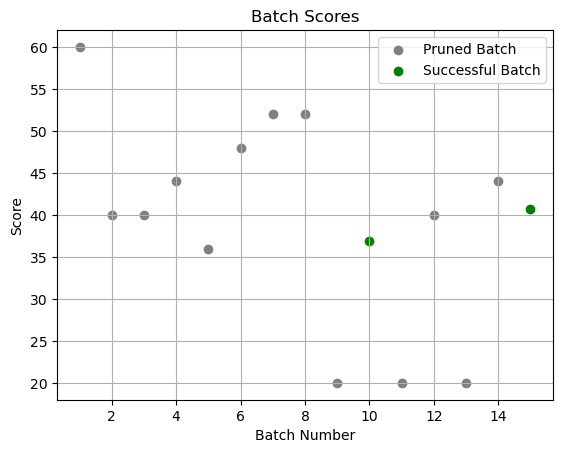

In [10]:
import matplotlib.pyplot as plt


trial_logs = optimized_program.trial_logs

trial_numbers = list(trial_logs.keys())
scores = [trial_logs[trial]["score"] for trial in trial_numbers]

full_eval = [trial_logs[trial]["full_eval"] for trial in trial_numbers]

for trial_number, score, pruned in zip(trial_numbers, scores, full_eval):
    if pruned is False:
        plt.scatter(
            trial_number,
            score,
            color="grey",
            label=(
                "Pruned Batch"
                if "Pruned Batch" not in plt.gca().get_legend_handles_labels()[1]
                else ""
            ),
        )
    else:
        plt.scatter(
            trial_number,
            score,
            color="green",
            label=(
                "Successful Batch"
                if "Successful Batch" not in plt.gca().get_legend_handles_labels()[1]
                else ""
            ),
        )

plt.xlabel("Batch Number")
plt.ylabel("Score")
plt.title("Batch Scores")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
best_score = 0
best_program_so_far = None


def get_signature(predictor):
    if hasattr(predictor, "extended_signature"):
        return predictor.extended_signature
    elif hasattr(predictor, "signature"):
        return predictor.signature


# print(f"Baseline program | Score: {best_score}:")
# for i, predictor in enumerate(WrapperEnglishSPT().predictors()):
#     print(f"Prompt {i+1} Instruction: {get_signature(predictor).instructions}")
# print()

print("----------------")

for trial_num in optimized_program.trial_logs:
    program_score = optimized_program.trial_logs[trial_num]["score"]
    program_pruned = optimized_program.trial_logs[trial_num]["full_eval"]
    # if (
    #     program_score > best_score
    #     and program_pruned is True
    #     # and optimized_program.trial_logs[trial_num]["full_eval"]
    # ):
    if program_pruned is True:
        best_score = program_score
        best_program_so_far = optimized_program.trial_logs[trial_num]["program"]
    # if trial_num % 5 == 0:
    #     print(f"Best program after {trial_num} batches | Score: {best_score}:")
    #     for i, predictor in enumerate(best_program_so_far.predictors()):
    #         print(f"Prompt {i+1} Instruction: {get_signature(predictor).instructions}")
    #     print()
    
        # print(f"Best program with best score: {best_score}")
        for i, predictor in enumerate(best_program_so_far.predictors()):
            print(f"Prompt {trial_num} Instruction: {get_signature(predictor).instructions}")
            print(best_score)
        print()

----------------
Prompt 10 Instruction: Para evaluar la similitud semántica entre los usos de la palabra "corona" en las oraciones proporcionadas, es crucial considerar el contexto y el significado literal de la palabra en cada caso. La primera oración menciona "190 millones de coronas suecas," refiriéndose a una unidad monetaria, mientras que la segunda oración utiliza la expresión "la verdadera joya de la corona" como metáfora para algo valioso. Dado que se debe ignorar cualquier similitud metafórica y considerar solo los objetos o conceptos a los que se refieren las palabras literalmente, la relación entre los usos de "corona" en estas oraciones es muy débil porque una se refiere a dinero y la otra a un objeto valioso en sentido figurado.
36.88

Prompt 15 Instruction: Para evaluar la similitud semántica entre los usos de la palabra "corona" en las oraciones proporcionadas, es crucial considerar el contexto y el significado literal de la palabra en cada caso. La primera oración menci

In [12]:
program_spt_prompt_es_assertions.load(
    "compile-models/sp/es_spt_mipro_optimized_prompt_es_llama3-3-q4"
)

In [13]:

custom_evaluate(
    random.choices(classes_1_test, k=225)
    + random.choices(classes_2_test, k=225)
    + random.choices(classes_3_test, k=225)
    + random.choices(classes_4_test, k=225),
    evaluate_answer,
    program_spt_prompt_es_assertions,
    debug=True,
)

Evaluating: 900 examples


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  3
Prediction:  4
Prediction:  1
Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  1
Prediction:  4


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  1
Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  3


Prediction:  1
Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  2
Prediction:  1
Prediction:  2


Prediction:  1


Prediction:  4
Prediction:  1
Prediction:  1
Prediction:  2


Prediction:  1
Prediction:  2


Prediction:  2


Prediction:  4
Prediction:  3


Prediction:  3


Prediction:  2


Prediction:  1
Prediction:  1


Prediction:  2
Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  4
Prediction:  1


Prediction:  1


Prediction:  3


Prediction:  1


Prediction:  2


Prediction:  1


Prediction:  4
Prediction:  4
Prediction:  2
Prediction:  2
Prediction:  1


Prediction:  1


Prediction:  4
Prediction:  2
Prediction:  1


Prediction:  3


Prediction:  2
Prediction:  3
Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  2


Prediction:  4
Prediction:  2


Prediction:  4
Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  1


Prediction:  1
Prediction:  2


Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  2


Prediction:  4
Prediction:  1


Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  1


Prediction:  1
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  1
Prediction:  4


Prediction:  1
Prediction:  1


Prediction:  3


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  1
Prediction:  3
Prediction:  3
Prediction:  2
Prediction:  2
Prediction:  1
Prediction:  2


Prediction:  4
Prediction:  2
Prediction:  2
Prediction:  1


Prediction:  2
Prediction:  1
Prediction:  2


Prediction:  3


Prediction:  2
Prediction:  1
Prediction:  2


Prediction:  1
Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  1
Prediction:  4


Prediction:  3
Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  2


Prediction:  1
Prediction:  2


Prediction:  2
Prediction:  4
Prediction:  2


Prediction:  2


Prediction:  3
Prediction:  4


Prediction:  1
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  4
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  1


Prediction:  3
Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  3
Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  4
Prediction:  3


Prediction:  2


Prediction:  2


Prediction:  4
Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  1


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  2
Prediction:  4


Prediction:  2
Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1


Prediction:  3


Prediction:  2
Prediction:  4
Prediction:  4
Prediction:  3


Prediction:  4


Prediction:  2
Prediction:  3


Prediction:  1


Prediction:  3


Prediction:  4


Prediction:  3
Prediction:  2


Prediction:  4
Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  2


Prediction:  4
Prediction:  2
Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  2
Prediction:  3
Prediction:  3


Prediction:  2


Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  2
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  1


Prediction:  4


Prediction:  2


Prediction:  3
Prediction:  2


Prediction:  3
Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  4
Prediction:  1
Prediction:  4


Prediction:  4


Prediction:  1
Prediction:  2
Prediction:  4


Prediction:  4
Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  1


Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  2


Prediction:  2
Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  1
Prediction:  3


Prediction:  2
Prediction:  2
Prediction:  2
Prediction:  1


Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  3
Prediction:  2
Prediction:  1
Prediction:  2


Prediction:  2


Prediction:  1


Prediction:  1


Prediction:  2
Prediction:  3
Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  1


Prediction:  4
Prediction:  2
Prediction:  2


Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  3


Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  4
Prediction:  2
Prediction:  3


Prediction:  3


Prediction:  2
Prediction:  4
Prediction:  1
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  2
Prediction:  3
Prediction:  2
Prediction:  3
Prediction:  1


Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  3
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  3


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  2


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  4
Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  2


Prediction:  4


Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  2
Prediction:  2


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  2
Prediction:  4


Prediction:  4
Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  3
Prediction:  4


Prediction:  2
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  3


Prediction:  3
Prediction:  2


Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  3


Prediction:  2


Prediction:  4


Prediction:  4
Prediction:  2
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  3
Prediction:  4
Prediction:  4
Prediction:  2


Prediction:  3
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  3


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  3
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3
Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4
Prediction:  2
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  1


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  2


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  3


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4
Prediction:  2


Prediction:  4


Prediction:  3


Prediction:  4
Prediction:  4
Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4


Prediction:  4
Accurate examples: 374
Bad-formatted examples: 0
Accuracy: 41.55555555555556
